In [1]:
import pandas as pd

In [2]:
#df1 = pd.read_csv("results/MLP1_MLP2_MLP3_result.csv", index_col=0)
#df2 = pd.read_csv("results/MLP4_MLP5_MLP6_result.csv", index_col=0)
#df3 = pd.read_csv("results/MLP7_MLP8_MLP9_result.csv", index_col=0)
#df4 = pd.read_csv("results/MLP10_result.csv", index_col=0)

df1 = pd.read_csv("results/Linear_result.csv", index_col=0)
#df1 = pd.read_csv("results/MLP7_MLP8_MLP9_result.csv")
#df1 = df1[df1["model"] == "MLP8"]

In [3]:
#df = pd.concat([df1, df2, df3, df4], axis=0)
df = df1

In [4]:
baseline = pd.read_csv("results/Linear_result.csv")
baseline = baseline[baseline["features_type"]=="only_one_hot"]
baseline["features_type"] = "baseline"
baseline["model"] = "baseline"
#baseline["target"] = baseline["device"].apply(lambda x: x+"_energy")
baseline

,Unnamed: 0,train_size,target,model,features_type,random_seed,repeat,r2_mean,r2_std,kendal_mean,kendal_std
2,2,11,edgegpu_latency,baseline,baseline,42,100,0.135014,0.216829,0.349570,0.100706
11,11,11,edgegpu_energy,baseline,baseline,42,100,0.134832,0.236754,0.350366,0.100491
20,20,11,raspi4_latency,baseline,baseline,42,100,0.161192,0.215716,0.343924,0.099460
29,29,11,edgetpu_latency,baseline,baseline,42,100,-0.252293,0.578399,0.222554,0.100200
38,38,11,pixel3_latency,baseline,baseline,42,100,0.161822,0.203850,0.347800,0.096196
...,...,...,...,...,...,...,...,...,...,...,...
857,857,15000,eyeriss_latency,baseline,baseline,42,100,1.000000,0.000000,0.955628,0.003255
866,866,15000,eyeriss_energy,baseline,baseline,42,100,1.000000,0.000000,0.985421,0.000920
875,875,15000,eyeriss_arithmetic_intensity,baseline,baseline,42,100,0.895667,0.006935,0.853300,0.007855
884,884,15000,fpga_latency,baseline,baseline,42,100,1.000000,0.000000,0.986951,0.000618


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

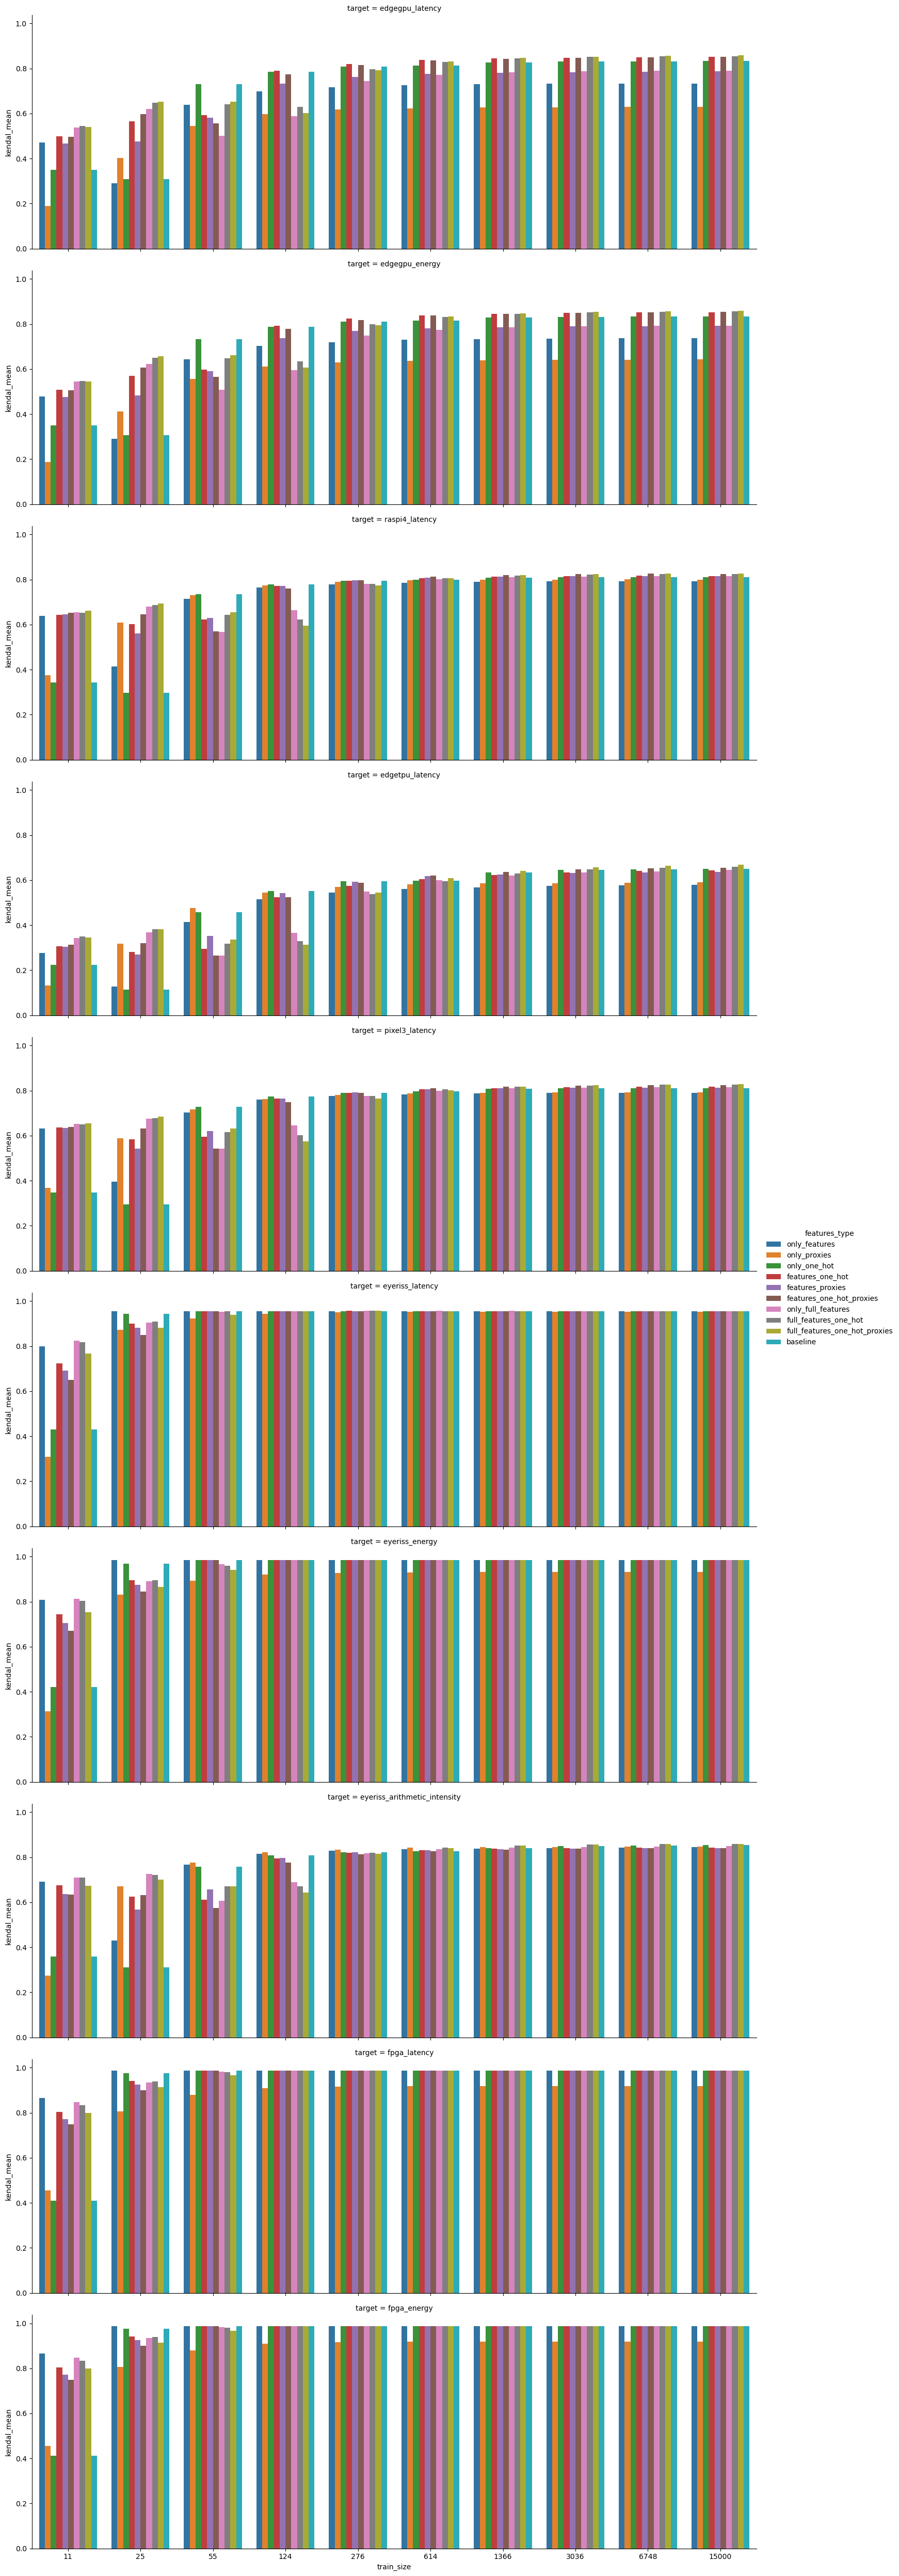

In [6]:
sel = df.drop(columns=["model", "random_seed", "repeat", "r2_mean", "r2_std", "kendal_std"])
sel = pd.concat([sel, baseline])
#sel = sel[sel["features_type"].isin(["baseline", "features_one_hot"])]
#sel = sel[sel["model"].isin(["MLP8", "MLP10", "baseline"])]
sns.catplot(
    data=sel, 
    x="train_size", 
    y="kendal_mean", 
    hue="features_type", 
    kind="bar", 
    row="target",
    aspect=3
)

In [7]:
device="edgegpu"
onedevice = sel[sel["device"]==device]data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABs4AABN+CAYAAADSVmKhAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzde5xWdYE/8M9wHS+AJYqiqCCaeMMCTUBkbQVWfFlqXirviitLeQE1RYxQQ/JGaIpopoiSSRqutJiyqWiYFxBsVxDNVYfcQUKNixeuz+8Pf846MerMOMMzDO/36/W8Xj7f8z3n+ZyZ0wDz6XtOSaFQKAQAAAAAAAA2cU2KHQAAAAAAAAAaAsUZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAACwUXj88cdTUlKSv//978WOUudGjhyZ/fbbr9gxAAAAQHEGAEBx/NM//VPOO++8YseopCFmomolJSV54IEHih0DAACARkZxBgDARm3VqlXFjgAAAAA0EoozAAA2uFNPPTUzZszI9ddfn5KSkpSUlOT111/P2rVrc8YZZ6Rjx47ZbLPN8pWvfCXXX3/9evseeeSRGT16dNq3b5/dd989SfLUU09lv/32S2lpabp3754HHnggJSUlmTt3bsW+8+bNy4ABA7LlllumXbt2Oemkk7JkyZLPzFQfCoVCrr766nTq1CmbbbZZunbtmvvuu6/SnGnTpmX33XfPZpttlkMOOaTKLL/4xS/SoUOHbL755jnqqKMyZsyYbLXVVpXmTJ06Nd26dUtpaWk6deqUyy67LGvWrKnY/tJLL+Wggw5KaWlp9txzz/znf/5npdVcr7/+ekpKSvLrX/86PXv2TGlpafbaa688/vjjFceYMGHCep/78de/Np577rn07ds3bdu2TZs2bdKnT588//zzFdt32WWXJMlRRx2VkpKSivfVOd+SkpLcdtttOeqoo7L55ptnt912y4MPPljp81988cUcfvjhad26dVq1apXevXvn1VdfzRNPPJHmzZtn0aJFleaff/75Ofjgg2t1rgAAADQsijMAADa466+/Pj169MiZZ56Z8vLylJeXp0OHDlm3bl123HHHTJ48OfPmzcuIESNyySWXZPLkyZX2/8Mf/pD58+dn+vTp+d3vfpfly5fniCOOyD777JPnn38+V1xxRS666KJK+5SXl6dPnz7Zb7/9MmvWrPz+97/PW2+9leOOO+4zM1Vl0KBB2XLLLT/zVVZW9qnnf+mll+aOO+7IzTffnBdffDFDhgzJiSeemBkzZiRJFi5cmKOPPjoDBgzI3LlzM3DgwFx88cWVjjFz5swMGjQo5557bubOnZu+fftm1KhRleY8/PDDOfHEE3POOedk3rx5ueWWWzJhwoSKeevWrcuRRx6ZzTffPM8880xuvfXWDB8+vMrMF154Yc4///zMmTMnPXv2zDe/+c28/fbbn3qOX8Ty5ctzyimn5Mknn8zTTz+d3XbbLQMGDMjy5cuTfFSsJckdd9yR8vLyivefd74fu+yyy3Lcccflz3/+cwYMGJATTjgh77zzTpLkzTffzMEHH5zS0tI8+uijmT17dk4//fSsWbMmBx98cDp16pS77rqr4lhr1qzJ3XffndNOO61evhYAAABsYAUAACiCPn36FM4999zPnTd48ODCt7/97Yr3p5xySqFdu3aFlStXVozdfPPNha233rrwwQcfVIz94he/KCQpzJkzp1AoFAo/+tGPCv369at07IULFxaSFBYsWFCjTG+99VbhlVde+czX6tWrq9x3xYoVhdLS0sJTTz1VafyMM84ofPe73y0UCoXCsGHDCl26dCmsW7euYvtFF11USFJ49913C4VCoXD88ccXDj/88ErHOOGEEwpt2rSpeN+7d+/ClVdeWWnOXXfdVdh+++0LhUKh8NBDDxWaNWtWKC8vr9g+ffr0QpLClClTCoVCofDaa68VkhR++tOfVsxZvXp1YccddyxcddVVhUKhULjjjjsqfW6hUChMmTKlUN1/bvz4xz8udO3a9VO3r1mzptCqVavC1KlTK8Y+mbG65/vxfpdeemnF+xUrVhRKSkoKDz30UKFQ+Ohr37Fjx8KqVauqzHLVVVcVunTpUvH+gQceKGy55ZaFFStWfO55AgAA0PA1K15lBwAA6xs/fnxuu+22vPHGG/nggw+yatWq7LfffpXm7LPPPmnRokXF+wULFmTfffdNaWlpxdgBBxxQaZ/Zs2fnsccey5ZbbrneZ7766qsVt3ysjm233Tbbbrttted/0rx58/Lhhx+mb9++lcZXrVqVr371q0mS+fPn58ADD6x0q8MePXpUmr9gwYIcddRRlcYOOOCA/O53v6t4P3v27Dz33HOVVlytXbs2H374Yd5///0sWLAgHTp0yHbbbVfpGFX55Oc3a9Ys3bt3z/z586t72jWyePHijBgxIo8++mjeeuutrF27Nu+///5nruJLPv98N9988yTJvvvuW7F9iy22SKtWrbJ48eIkydy5c9O7d+80b968ys849dRTc+mll+bpp5/OgQcemNtvvz3HHXdctthiiy962gAAADQAijMAABqMyZMnZ8iQIbnuuuvSo0ePtGrVKtdcc02eeeaZSvP+saQoFArrPU+rUChUer9u3bocccQRueqqq9b73O23375GOQcNGpS77777M+fMmzcvO+2003rj69atS5L8x3/8R3bYYYdK21q2bFll9qpU95wvu+yyHH300evtX1paWuUxauLjfZs0abLeZ69evbrWxz311FPzt7/9LWPHjs3OO++cli1bpkePHlm1atVn7vd55/uxfyzFSkpKKr4vm2222Wd+xrbbbpsjjjgid9xxRzp16pRp06ZVet4bAAAAGzfFGQAARdGiRYusXbu20tiTTz6Znj17ZvDgwRVjr7766ucea4899sikSZOycuXKivJp1qxZleZ87Wtfy/33359ddtklzZpV/dfgqjJV5fLLL88FF1zwmXPat29f5fiee+6Zli1bpqysLH369PnUOQ888EClsaeffrrS+z322CPPPvtspbGqznnBggXp3LlzlZ+zxx57pKysLG+99VbatWuX5P+eH/aPnn766Rx88MFJPnqu1+zZs/ODH/wgSbLNNttk+fLlee+99ypKzblz51Z5nOp48sknM27cuAwYMCDJR898W7JkSaU5zZs3X+979XnnWx377rtv7rzzzqxevfpTV50NHDgw3/nOd7Ljjjtm1113Ta9evWr9eQAAADQsTYodAACATdMuu+ySZ555Jq+//nqWLFmSdevWpXPnzpk1a1YefvjhvPzyy/nRj370qUXOJ33ve9/LunXr8q//+q+ZP39+Hn744Vx77bVJ/m9V1Pe///288847+e53v5tnn302//M//5NHHnkkp59+ekUBU1Wmqmy77bbp3LnzZ74+rZxr1apVLrjgggwZMiR33nlnXn311cyZMyc33XRT7rzzziQfrWh79dVXM3To0CxYsCC/+tWvMmHChErHOfvsszNt2rSMGTMmr7zySm655ZY89NBDlVaQjRgxIhMnTszIkSPz4osvZv78+bn33ntz6aWXJkn69u2bXXfdNaecckr+/Oc/Z+bMmRk+fHilr9vHbrrppkyZMiUvvfRSvv/97+fdd9/N6aefniT5+te/ns033zyXXHJJ/vKXv1SZtyY6d+6cu+66K/Pnz88zzzyTE044Yb2VYLvsskv+8Ic/ZNGiRXn33Xerdb7V8YMf/CDLli3Ld77zncyaNSuvvPJK7rrrrixYsKBiTv/+/dOmTZv85Cc/yWmnnVbr8wQAAKDhUZwBAFAUF1xwQZo2bZo999wz22yzTcrKyjJo0KAcffTROf744/P1r389b7/9dqXVZ5+mdevWmTp1aubOnZv99tsvw4cPz4gRI5L83y362rdvn5kzZ2bt2rXp379/9t5775x77rlp06ZNmjRp8qmZ6sMVV1yRESNGZPTo0enSpUv69++fqVOnpmPHjkmSnXbaKffff3+mTp2arl27Zvz48bnyyisrHaNXr14ZP358xowZk65du+b3v/99hgwZUumWhP3798/vfve7TJ8+Pfvvv38OPPDAjBkzJjvvvHOSpGnTpnnggQeyYsWK7L///hk4cGBFyfTJ4yTJT3/601x11VXp2rVrnnzyyfz7v/972rZtmyT58pe/nLvvvjvTpk3LPvvsk3vuuScjR46s9dfn9ttvz7vvvpuvfvWrOemkk3LOOees90y56667LtOnT0+HDh0qng33eedbHVtvvXUeffTRrFixIn369Em3bt3yi1/8otLqsyZNmuTUU0/N2rVrc/LJJ9f6PAEAAGh4SgrVeYACAABsZCZNmpTTTjstS5cu/dznVjUWZ555Zl566aU8+eSTtT7GzJkzc9BBB+Uvf/lLdt1117z++uvp2LFj5syZk/3226/uwm7kzjzzzLz11lt58MEHix0FAACAOuQZZwAANAoTJ05Mp06dssMOO+SFF17IRRddlOOOO65Rl2bXXntt+vbtmy222CIPPfRQ7rzzzowbN65Gx5gyZUq23HLL7LbbbvnLX/6Sc889N7169cquu+5aT6k3bkuXLs1zzz2XSZMm5d///d+LHQcAAIA6pjgDAKBRWLRoUUaMGJFFixZl++23z7HHHptRo0YVO1a9evbZZ3P11Vdn+fLl6dSpU2644YYMHDiwRsdYvnx5fvjDH2bhwoVp27ZtDj300Fx33XV1mnOvvfbKG2+8UeW2W265JSeccEKdfl59+ta3vpVnn302Z511Vvr27VvsOAAAANQxt2oEAADq1RtvvJHVq1dXua1du3Zp1arVBk4EAAAAVVOcAQAAAAAAQJImxQ4AAAAAAAAADYHiDAAAAAAAALKJFmeFQiHLli2Lu1QCAAAAAADwsU2yOFu+fHnatGmT5cuXFzsKAAAAAAAADcQmWZwBAAAAAADAP1KcAQAAAAAAQBRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJCkyMXZE088kSOOOCLt27dPSUlJHnjggc/dZ8aMGenWrVtKS0vTqVOnjB8/vv6DAgAAAAAA0OgVtTh777330rVr19x4443Vmv/aa69lwIAB6d27d+bMmZNLLrkk55xzTu6///56TgoAAAAAAEBjV1IoFArFDpEkJSUlmTJlSo488shPnXPRRRflwQcfzPz58yvGBg0alBdeeCF/+tOfqv1Zy5YtS5s2bbJ06dK0bt36i8QGAAAAAACgkdionnH2pz/9Kf369as01r9//8yaNSurV6/+1P1WrlyZZcuWVXoBAAAAAADAJ21UxdmiRYvSrl27SmPt2rXLmjVrsmTJkk/db/To0WnTpk3Fq0OHDvUdFQAAAAAAgI3MRlWcJR/d0vGTPr7T5D+Of9KwYcOydOnSitfChQvrNSMAAAAAAAAbn2bFDlAT2223XRYtWlRpbPHixWnWrFm23nrrT92vZcuWadmyZX3HAwAAAAAAYCO2Ua0469GjR6ZPn15p7JFHHkn37t3TvHnzIqUCAAAAAACgMShqcbZixYrMnTs3c+fOTZK89tprmTt3bsrKypJ8dIvFk08+uWL+oEGD8sYbb2To0KGZP39+br/99vzyl7/MBRdcUIz4AAAAAAAANCJFvVXjrFmzcsghh1S8Hzp0aJLklFNOyYQJE1JeXl5RoiVJx44dM23atAwZMiQ33XRT2rdvnxtuuCHf/va3N3h2AAAAAAAAGpeSQqFQKHaIDW3ZsmVp06ZNli5dmtatWxc7DgAAAAAAAA3ARvWMMwAAAAAAAKgvijMAAAAAAACI4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIkzYodAAAAAACAjcvk3xxQ7bnHHftsPSYBqFuKMwAAAADYxClBAOAjijMAAAAAaIRGjhxZ7bl77lV/Odg41OR6SVwzQOOlOAMAAADYCNT8l9rTqj3XCiKoWzMO7lOj+X2emFHtuaNOPKbac4fffV+NcgCgOAMAAACAz1WTIqS+SpBEEQIA9U1xBgAAABsBzx+qW1aDAABQFcUZAAAAjUJ9rQapT54/BAAADYviDAAAAD6HFUQAALBpaFLsAAAAAAAAANAQWHEGAAA0WBvjrfcAAADYeCnOAACATY7b7gEAAFAVxRkAAAAAwOfo9fNe1Z57pV+7VtL1voerPfeFY/rXYxKAz+cnOAAAQJFM/s0B1Z573LHP1mMSaBz8Urv2NtVfartmaqcm10vSuK4ZABo/f+IDAADUoZEjR1Z77p571V8OAAAAak5xBgAAQINlNUjtWA0CAAC106TYAQAAAAAAAKAhUJwBAAAAAABA3KoRAIANaMbBfao9t88TM+oxCQAAAMD6rDgDAAAAAACAWHEGAEAjMerEY6o9d/jd99VjEgAAAGBjpTgDAAA2mF4/71Wj+Vf6J0uFrvc9XO25LxzTvx6TAAAANF4N4laN48aNS8eOHVNaWppu3brlySef/Mz5kyZNSteuXbP55ptn++23z2mnnZa33357A6UFAAAAAACgMSr6/33z3nvvzXnnnZdx48alV69eueWWW3LYYYdl3rx52Wmnndab/8c//jEnn3xyfvazn+WII47Im2++mUGDBmXgwIGZMmVKEc4AAGDTVpMVRFYPVWYFEQAAADQsRV9xNmbMmJxxxhkZOHBgunTpkrFjx6ZDhw65+eabq5z/9NNPZ5dddsk555yTjh075qCDDspZZ52VWbNmbeDkAAAAAAAANCZFLc5WrVqV2bNnp1+/fpXG+/Xrl6eeeqrKfXr27Jm//vWvmTZtWgqFQt56663cd999OfzwwzdEZAAAAAAAABqpohZnS5Ysydq1a9OuXbtK4+3atcuiRYuq3Kdnz56ZNGlSjj/++LRo0SLbbbddttpqq/z85z//1M9ZuXJlli1bVukFAAAAAAAAn1T0WzUmSUlJSaX3hUJhvbGPzZs3L+ecc05GjBiR2bNn5/e//31ee+21DBo06FOPP3r06LRp06bi1aFDhzrNDwAAAAAAwMavqE9nb9u2bZo2bbre6rLFixevtwrtY6NHj06vXr1y4YUXJkn23XffbLHFFundu3d+8pOfZPvtt19vn2HDhmXo0KEV75ctW6Y8AwCgWkaOHFkvcwEAAICGp6grzlq0aJFu3bpl+vTplcanT5+enj17VrnP+++/nyZNKsdu2rRpko9WqlWlZcuWad26daUXAAAAAAAAfFJRV5wlydChQ3PSSSele/fu6dGjR2699daUlZVV3Hpx2LBhefPNNzNx4sQkyRFHHJEzzzwzN998c/r375/y8vKcd955OeCAA9K+fftingoAAJu4yb85oGY7lFxRP0EAAACAWil6cXb88cfn7bffzuWXX57y8vLsvffemTZtWnbeeeckSXl5ecrKyirmn3rqqVm+fHluvPHGnH/++dlqq63yjW98I1dddVWxTgEANmkzDu5T7bl9nphRj0kAAKDxmz/q0WJHYCPiegGouaIXZ0kyePDgDB48uMptEyZMWG/s7LPPztlnn13PqQAAAADql19qA0ly4/lTix0BgP+vQRRnAEDD0evnvWo0/0p/najQ9b6Hqz33hWP612MSAACKSQkCABsvv+kCAACAOmQFUeOkCAEA2DQozgAAANjkKEEAAICqNCl2AAAAAAAAAGgIrDgDAAAaBSuIAAAA+KIUZwBAgzTqxGOqPXf43ffVYxIAAAAANhWKMwAAgM8wf9SjxY4AAADABuIZZwAAAAAAABDFGQAAAAAAACRRnAEAAAAAAEASzzgDAKCBuvH8qcWOAAAAAGxirDgDAAAAAACAKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSJM2KHQAAADa0+aMeLXYEAAAAoAGy4gwAAAAAAACiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJEmzYgcAADYdN54/tdgRAIAGoNuFE6s9d/Y1J9djEjYGrhdqyjUDwBehOAPYBPT6ea9qz5159sx6TLLx6Xrfw9We+8Ix/esxCQA0XDX5BWXil5QAAEDD5VaNAAAAAAAAECvOAACAKrjFEQAAAJsiK84AAAAAAAAgijMAAAAAAABIojgDAAAAAACAJJ5xBgCwSajJ86oSz6wCAAAANk1WnAEAAAAAAEAUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEmSZsUOAADUTrcLJ1Z77uxrTq7HJAAAAADQOFhxBgAAAAAAAFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJEmaFTsAwBc1+TcHVHvuccc+W49J2BjU5HpJkpRcUT9BAAAAAIAGx4ozAAAAAAAAiBVnQAM1cuTIas/dc6/6ywEAAAAAwKbDijMAAAAAAACI4gwAAAAAAACSuFUjAI2AW3sCAAAAAHVBcQbQQHS7cGKN5s++5uR6SgIAAAAAsGlyq0YAAAAAAACI4gwAAAAAAACSKM4AAAAAAAAgiWecAQCboJEjR9bLXAAAiqvs8n1qtsOXWtdPEDYaNbpmXC8AmwTFGQAAABuUX1JSE64XAAA2JLdqBAAAAAAAgFhxBgAAfEFWgwAAANBYKM6ADWL+qEeLHQEAAAAAAD6T4gwAgPVYQQQAAABsimpdnL388st5/PHHs3jx4qxbt67SthEjRnzhYAAAAAAAALAh1ao4+8UvfpF/+7d/S9u2bbPddtulpKSkYltJSYniDAAAAAAAgI1Ok9rs9JOf/CSjRo3KokWLMnfu3MyZM6fi9fzzz9f4eOPGjUvHjh1TWlqabt265cknn/zM+StXrszw4cOz8847p2XLltl1111z++231+ZUAAAAAAAAIEktV5y9++67OfbYY+skwL333pvzzjsv48aNS69evXLLLbfksMMOy7x587LTTjtVuc9xxx2Xt956K7/85S/TuXPnLF68OGvWrKmTPAAAAAAAAGyaarXi7Nhjj80jjzxSJwHGjBmTM844IwMHDkyXLl0yduzYdOjQITfffHOV83//+99nxowZmTZtWg499NDssssuOeCAA9KzZ886yQMAAAAAAMCmqVYrzjp37pwf/ehHefrpp7PPPvukefPmlbafc8451TrOqlWrMnv27Fx88cWVxvv165ennnqqyn0efPDBdO/ePVdffXXuuuuubLHFFvnmN7+ZK664IptttlltTgcAAAAAAABqV5zdeuut2XLLLTNjxozMmDGj0raSkpJqF2dLlizJ2rVr065du0rj7dq1y6JFi6rc53/+53/yxz/+MaWlpZkyZUqWLFmSwYMH55133vnU55ytXLkyK1eurHi/bNmyauUDAJj8mwOqP7nkivoLAgAAAEC9q1Vx9tprr9VpiJKSkkrvC4XCemMfW7duXUpKSjJp0qS0adMmyUe3ezzmmGNy0003VbnqbPTo0bnsssvqNDMAAAAAAACNS62Ks7rStm3bNG3adL3VZYsXL15vFdrHtt9+++ywww4VpVmSdOnSJYVCIX/961+z2267rbfPsGHDMnTo0Ir3y5YtS4cOHeroLGDTNerEY6o99+gug+sxCfB5yi7fp/qTv9S6/oIAAAAAQANW6+Lsr3/9ax588MGUlZVl1apVlbaNGTOmWsdo0aJFunXrlunTp+eoo46qGJ8+fXq+9a1vVblPr1698pvf/CYrVqzIlltumSR5+eWX06RJk+y4445V7tOyZcu0bNmyWpkAAAAAAADYNNWqOPvDH/6Qb37zm+nYsWMWLFiQvffeO6+//noKhUK+9rWv1ehYQ4cOzUknnZTu3bunR48eufXWW1NWVpZBgwYl+Wi12JtvvpmJEycmSb73ve/liiuuyGmnnZbLLrssS5YsyYUXXpjTTz+9yts0AlAzMw7uU+25fZ6Y8fmTAAAAAAA2Ek1qs9OwYcNy/vnn57//+79TWlqa+++/PwsXLkyfPn1y7LHH1uhYxx9/fMaOHZvLL788++23X5544olMmzYtO++8c5KkvLw8ZWVlFfO33HLLTJ8+PX//+9/TvXv3nHDCCTniiCNyww031OZUAAAAAAAAIEktV5zNnz8/99xzz0cHaNYsH3zwQbbccstcfvnl+da3vpV/+7d/q9HxBg8enMGDq37+0YQJE9Yb22OPPTJ9+vQa5wYAGqf5ox4tdgQAAAAAGoFarTjbYostsnLlyiRJ+/bt8+qrr1ZsW7JkSd0kAwAAAAAAgA2oVivODjzwwMycOTN77rlnDj/88Jx//vn5r//6r/z2t7/NgQceWNcZAQAAAAAAoN7VqjgbM2ZMVqxYkSQZOXJkVqxYkXvvvTedO3fOz372szoNCEDDdeP5U2s0/wfXHVFPSQAAAAAAvrhaFWedOnWq+O/NN98848aNq7NAAAAAAAAAUAy1esZZkvz973/PbbfdlmHDhuWdd95Jkjz//PN588036ywcAAAAAAAAbCi1WnH25z//OYceemjatGmT119/PWeeeWa+/OUvZ8qUKXnjjTcyceLEus4JAAAAAAAA9apWK86GDh2aU089Na+88kpKS0srxg877LA88cQTdRYOAAAAAAAANpRaFWfPPfdczjrrrPXGd9hhhyxatOgLhwIAAAAAAIANrVbFWWlpaZYtW7be+IIFC7LNNtt84VAAAAAAAACwodXqGWff+ta3cvnll2fy5MlJkpKSkpSVleXiiy/Ot7/97ToNCHxxMw7uU+25fZ6YUY9JAAAAAACg4arVirNrr702f/vb37Ltttvmgw8+SJ8+fdK5c+e0atUqo0aNquuMAAAAAAAAUO9qteKsdevW+eMf/5hHH300zz//fNatW5evfe1rOfTQQ+s6HwAAAAAAAGwQtSrOPvaNb3wj3/jGN+oqCwAAAAAAABRNrYuzZ599No8//ngWL16cdevWVdo2ZsyYLxwMgMZn1InHVHvu8Lvvq8ckAAAAAADrq1VxduWVV+bSSy/NV77ylbRr1y4lJSUV2z753wAAAAAAALCxqFVxdv311+f222/PqaeeWsdxAAAAAAAAoDia1GqnJk3Sq1evus4CAAAAAAAARVOr4mzIkCG56aab6joLAAAAAAAAFE2tbtV4wQUX5PDDD8+uu+6aPffcM82bN6+0/be//W2dhKPxGDlyZL3MhU1Z2eX7VH/yl1rXXxAAAAAAgEaiVsXZ2WefncceeyyHHHJItt5665SUlNR1LgAAAAAAANigalWcTZw4Mffff38OP/zwus4DmfybA2o0/7hjn62nJAAAAAAAwKakVsXZl7/85ey66651nYWNzPxRjxY7AgAAAAAAQJ1pUpudRo4cmR//+Md5//336zoPAAAAAAAAFEWtVpzdcMMNefXVV9OuXbvssssuad68eaXtzz//fJ2EAwAAAAAAgA2lVsXZkUceWccxAAAAAAAAoLhqVZz9+Mc/rta8e+65J9/85jezxRZb1OZjAAAAAAAAYIOp1TPOquuss87KW2+9VZ8fAQAAAAAAAHWiXouzQqFQn4cHAAAAAACAOlOvxRkAAAAAAABsLBRnAAAAAAAAEMUZAAAAAAAAJFGcAQAAAAAAQJJ6Ls523nnnNG/evD4/AgAAAAAAAOpEs/o8+H//93/X5+EBAAAAAACgzlS7OPvSl76UkpKSas195513ah0IAAAAAAAAiqHaxdnYsWPrMQYAAAAAAAAUV7WLs1NOOaU+cwAAAAAAAEBRfeFnnH3wwQdZvXp1pbHWrVt/0cMCsImbP+rRYkcAAAAAADYxtSrO3nvvvVx00UWZPHly3n777fW2r1279gsH49PNOLhPjeb3eWJGPSUBAAAAAABoPGpVnP3whz/MY489lnHjxuXkk0/OTTfdlDfffDO33HJLfvrTn9Z1RjagUSceU+25R3cZXI9JAAAAAAAANqxaFWdTp07NxIkT80//9E85/fTT07t373Tu3Dk777xzJk2alBNOOKGucwIAAAAAAEC9alKbnd5555107NgxyUfPM3vnnXeSJAcddFCeeOKJuksHAAAAAAAAG0itirNOnTrl9ddfT5LsueeemTx5cpKPVqJttdVWdZUNAAAAAAAANphaFWennXZaXnjhhSTJsGHDMm7cuLRs2TJDhgzJhRdeWKcBAQAAAAAAYEOo1TPOhgwZUvHfhxxySF566aXMmjUru+66a7p27Vpn4QAAAAAAAGBDqVVx9o922mmn7LTTTnVxKAAAAAAAACiKahdnN9xwQ7UPes4559QqDAAAAAAAABRLtYuzn/3sZ5Xe/+1vf8v777+frbbaKkny97//PZtvvnm23XZbxRkAAAAAAAAbnWoXZ6+99lrFf//qV7/KuHHj8stf/jJf+cpXkiQLFizImWeembPOOqvuUwIbzI3nTy12BAAAAAAAKIomtdnpRz/6UX7+859XlGZJ8pWvfCU/+9nPcumll9ZZOAAAAAAAANhQqr3i7JPKy8uzevXq9cbXrl2bt9566wuHasi6XTix2nNnX3NyPSYBAAAAAACgLtVqxdk///M/58wzz8ysWbNSKBSSJLNmzcpZZ52VQw89tE4DAgAAAAAAwIZQqxVnt99+e0455ZQccMABad68eZJkzZo16d+/f2677bY6DcgX55lVAAAAAAAAn69Wxdk222yTadOm5eWXX85LL72UQqGQLl26ZPfdd6/rfAAAAAAAALBB1Ko4+9juu++uLAMAAAAAAKBRqFVxtnbt2kyYMCF/+MMfsnjx4qxbt67S9kcffbROwgEAAAAAAMCGUqvi7Nxzz82ECRNy+OGHZ++9905JSUld5wIAAAAAAIANqlbF2a9//etMnjw5AwYMqOs8AAAAAAAAUBRNarNTixYt0rlz57rOAgAAAAAAAEVTq+Ls/PPPz/XXX59CoVDXeQAAAAAAAKAoanWrxj/+8Y957LHH8tBDD2WvvfZK8+bNK23/7W9/WyfhAAAAAAAAYEOpVXG21VZb5aijjqrrLAAAAAAAAFA0tSrO7rjjjrrOAQAAAAAAAEVVq2ecJcmaNWvyn//5n7nllluyfPnyJMn//u//ZsWKFXUWDgAAAAAAADaUWq04e+ONN/Iv//IvKSsry8qVK9O3b9+0atUqV199dT788MOMHz++rnMCAAAAAABAvarVirNzzz033bt3z7vvvpvNNtusYvyoo47KH/7whzoLBwAAAAAAABtKrVac/fGPf8zMmTPTokWLSuM777xz3nzzzToJBgAAAAAAABtSrVacrVu3LmvXrl1v/K9//WtatWr1hUMBAAAAAADAhlar4qxv374ZO3ZsxfuSkpKsWLEiP/7xjzNgwIC6ygYAAAAAAAAbTK1u1fizn/0shxxySPbcc898+OGH+d73vpdXXnklW2+9de655566zggAAAAAAAD1rlYrzh599NHMnTs3F1xwQc4666x89atfzU9/+tPMnTs311xzTV1nBAAAAAAAgHpXqxVnP/jBD7LVVlvl9NNPz+mnn14xPnTo0Nxzzz3KMwAAAAAAADY6tVpx9utf/zonnnhinnjiiYqxc845J7/+9a/z2GOP1Vk4AAAAAAAA2FBqVZz9y7/8S8aPH58jjzwys2bNyuDBg3P//ffn8ccfzx577FHXGQEAAAAAAKDe1epWjUnyne98J++++24OOuigbLPNNpkxY0Y6d+5cl9kAAAAAAABgg6l2cTZ06NAqx7fddtt89atfzbhx4yrGxowZ88WTAQAAAAAAwAZU7eJszpw5VY7vuuuuWbZsWcX2kpKSukkGAAAAAAAAG1C1i7PHHnus3kKMGzcu11xzTcrLy7PXXntl7Nix6d279+fuN3PmzPTp0yd777135s6dW2/5AAAAAAAAaPyaFDvAvffem/POOy/Dhw/PnDlz0rt37xx22GEpKyv7zP2WLl2ak08+Of/8z/+8gZICAAAAAADQmBW9OBszZkzOOOOMDBw4MF26dMnYsWPToUOH3HzzzZ+531lnnZXvfe976dGjxwZKCgAAAAAAQGNW7Vs11odVq1Zl9uzZufjiiyuN9+vXL0899dSn7nfHHXfk1Vdfzd13352f/OQnn/s5K1euzMqVKyveL1u2rPahoZ6UXb5PjebvNOK/6ikJAAAAAABsmoq64mzJkiVZu3Zt2rVrV2m8Xbt2WbRoUZX7vPLKK7n44oszadKkNGtWvd5v9OjRadOmTcWrQ4cOXzg7AAAAAAAAjUvRb9WYJCUlJZXeFwqF9caSZO3atfne976Xyy67LLvvvnu1jz9s2LAsXbq04rVw4cIvnBkAAAAAAIDGpai3amzbtm2aNm263uqyxYsXr7cKLUmWL1+eWbNmZc6cOfnBD36QJFm3bl0KhUKaNWuWRx55JN/4xjfW269ly5Zp2bJl/ZwEAAAAAAAAjUJRV5y1aNEi3bp1y/Tp0yuNT58+PT179lxvfuvWrfNf//VfmTt3bsVr0KBB+cpXvpK5c+fm61//+oaKDgAAAAAAQCNT1BVnSTJ06NCcdNJJ6d69e3r06JFbb701ZWVlGTRoUJKPbrP45ptvZuLEiWnSpEn23nvvSvtvu+22KS0tXW8cAAAAAAAAaqLoxdnxxx+ft99+O5dffnnKy8uz9957Z9q0adl5552TJOXl5SkrKytySgAAAAAAABq7ohdnSTJ48OAMHjy4ym0TJkz4zH1HjhyZkSNH1n0oAAAAAAAANilFfcYZAAAAAAAANBSKMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIkzYodgI/0+nmvas+90retkq73PVztuS8c078ekwAAAAAAABszK84AAAAAAAAgijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCRJs2IHAGqn1897VXvulf6nXqHrfQ9Xe+4Lx/SvxyQAAAAAADQ0VpwBAAAAAABAFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJkmbFDgCNWbcLJ1Z77pRW9RgEAAAAAAD4XFacAQAAAAAAQBRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJCkgRRn48aNS8eOHVNaWppu3brlySef/NS5v/3tb9O3b99ss802ad26dXr06JGHH354A6YFAAAAAACgMSp6cXbvvffmvPPOy/DhwzNnzpz07t07hx12WMrKyqqc/8QTT6Rv376ZNm1aZs+enUMOOSRHHHFE5syZs4GTAwAAAAAA0JgUvTgbM2ZMzjjjjAwcODBdunTJ2LFj06FDh9x8881Vzh87dmx++MMfZv/9989uu+2WK6+8MrvttlumTp26gZMDAAAAAADQmBS1OFu1alVmz56dfv36VRrv169fnnrqqWodY926dVm+fHm+/OUvf+qclStXZtmyZZVeAAAAAAAA8ElFLc6WLFmStWvXpl27dpXG27Vrl0WLFlXrGNddd13ee++9HHfccZ86Z/To0WnTpk3Fq0OHDl8oNwAAAAAAAI1P0W/VmCQlJSWV3hcKhfXGqnLPPfdk5MiRuffee7Ptttt+6rxhw4Zl6dKlFa+FCxd+4cwAAAAAAAA0Ls2K+eFt27ZN06ZN11tdtnjx4vVWof2je++9N2eccUZ+85vf5NBDD/3MuS1btkzLli2/cF4AAAAAAAAar6KuOGvRokW6deuW6dOnVxqfPn16evbs+an73XPPPTn11FPzq1/9Kocffnh9xwQAAAAAAGATUNQVZ0kydOjQnHTSSenevXt69OiRW2+9NWVlZRk0aFCSj26z+Oabb2bixIlJPirNTj755Fx//fU58MADK1arbbbZZmnTpk3RzgMAAAAAAICNW9GLs+OPPz5vv/12Lr/88pSXl2fvvffOtGnTsvPOOydJysvLU1ZWVjH/lltuyZo1a/L9738/3//+9yvGTznllEyYMGFDx/9MZZfvU/3JX2pdf0EAAAAAAAD4XEUvzpJk8ODBGTx4cJXb/rEMe/zxx+s/EAAAAAAAAJucoj7jDAAAAAAAABoKxRkAAAAAAABEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQpIEUZ+PGjUvHjh1TWlqabt265cknn/zM+TNmzEi3bt1SWlqaTp06Zfz48RsoKQAAAAAAAI1V0Yuze++9N+edd16GDx+eOXPmpHfv3jnssMNSVlZW5fzXXnstAwYMSO/evTNnzpxccsklOeecc3L//fdv4OQAAAAAAAA0JkUvzsaMGZMzzjgjAwcOTJcuXTJ27Nh06NAhN998c5Xzx48fn5122iljx45Nly5dMnDgwJx++um59tprN3ByAAAAAAAAGpOiFmerVq3K7Nmz069fv0rj/fr1y1NPPVXlPn/605/Wm9+/f//MmjUrq1evrresAAAAAAAANG7NivnhS5Ysydq1a9OuXbtK4+3atcuiRYuq3GfRokVVzl+zZk2WLFmS7bfffr19Vq5cmZUrV1a8X7p0aZJk2bJlNc68duUH1Z67vPnaas9d88Gaas99r/pTkyQfrHy/2nM/rEH5uOLD96o9d+WalZ8/6f97//3qf92SZG1J9XPU5nv+RdTX9ZLU3zXTEK6XpP6umcZyvSQN42dMTa6XxM+YutYQ/kxK/Iz5pMZyvSR+xnySnzGfz8+YyvyM+Xx+xvyfhnC9JA37mmkI10vSMH7G1OR6STbNnzGN/d/WiZ8x1eFnzP/Z1H7GtGrVKiUlJbXeHyBJSgqFQqFYH/6///u/2WGHHfLUU0+lR48eFeOjRo3KXXfdlZdeemm9fXbfffecdtppGTZsWMXYzJkzc9BBB6W8vDzbbbfdevuMHDkyl112Wf2cBAAAAAAARbd06dK0bt262DGAjVxRV5y1bds2TZs2XW912eLFi9dbVfax7bbbrsr5zZo1y9Zbb13lPsOGDcvQoUMr3q9bty7vvPNOtt56a/8PhE9YtmxZOnTokIULF/oDhs/leqGmXDPUhOuFmnLNUBOuF2rKNUNNuF6oCdcLNeWa+WytWrUqdgSgEShqcdaiRYt069Yt06dPz1FHHVUxPn369HzrW9+qcp8ePXpk6tSplcYeeeSRdO/ePc2bN69yn5YtW6Zly5aVxrbaaqsvFr4Ra926tT94qTbXCzXlmqEmXC/UlGuGmnC9UFOuGWrC9UJNuF6oKdcMQP1pUuwAQ4cOzW233Zbbb7898+fPz5AhQ1JWVpZBgwYl+Wi12Mknn1wxf9CgQXnjjTcydOjQzJ8/P7fffnt++ctf5oILLijWKQAAAAAAANAIFHXFWZIcf/zxefvtt3P55ZenvLw8e++9d6ZNm5add945SVJeXp6ysrKK+R07dsy0adMyZMiQ3HTTTWnfvn1uuOGGfPvb3y7WKQAAAAAAANAIFL04S5LBgwdn8ODBVW6bMGHCemN9+vTJ888/X8+pNj0tW7bMj3/84/VuawlVcb1QU64ZasL1Qk25ZqgJ1ws15ZqhJlwv1ITrhZpyzQDUv5JCoVAodggAAAAAAAAotqI/4wwAAAAAAAAaAsUZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAG43HH388JSUl+fvf/17sKAAAANAoKc4AACiaf/qnf8p5551X7BiVNMRMAAAAwIahOAMAYKO3atWqYkdgI+XaAQAA4JMUZwAAFMWpp56aGTNm5Prrr09JSUlKSkry+uuvZ+3atTnjjDPSsWPHbLbZZvnKV76S66+/fr19jzzyyIwePTrt27fP7rvvniR56qmnst9++6W0tDTdu3fPAw88kJKSksydO7di33nz5mXAgAHZcsst065du5x00klZsmTJZ2aqD4VCIVdffXU6deqUzTbbLF27ds19991Xac60adOy++67Z7PNNsshhxxSZZZf/OIX6dChQzbffPMcddRRGTNmTLbaaqtKc6ZOnZpu3bqltLQ0nTp1ymWXXZY1a9ZUbH/ppZdy0EEHpbS0NHvuuWf+8z//MyUlJXnggQeSJK+//npKSkry61//Oj179kxpaWn22muvPP744xXHmDBhwnqf+/HXv7o+L2dJSUluu+22HHXUUdl8882z22675cEHH6x0jM/6/iYfrSj8wQ9+kKFDh6Zt27bp27dvkuTBBx/MbrvtVvG1vvPOOytui/nee++ldevW631/pk6dmi222CLLly+v9jkCAADQsCnOAAAoiuuvvz49evTImWeemfLy8pSXl6dDhw5Zt25ddtxxx0yePDnz5s3LiBEjcskll2Ty5MmV9v/DH/6Q+fPnZ/r06fnd736X5cuX54gjjsg+++yT559/PldccUUuuuiiSvuUl5enT58+2W+//TJr1qz8/ve/z1tvvZXjjjvuMzNVZdCgQdlyyy0/81VWVvap53/ppZfmjjvuyM0335wXX3wxQ4YMyYknnpgZM2YkSRYuXJijjz46AwYMyNy5czNw4MBcfPHFlY4xc+bMDBo0KOeee27mzp2bvn37ZtSoUZXmPPzwwznxxBNzzjnnZN68ebnlllsyYcKEinnr1q3LkUcemc033zzPPPNMbr311gwfPrzKzBdeeGHOP//8zJkzJz179sw3v/nNvP322596jjXxeTk/dtlll+W4447Ln//85wwYMCAnnHBC3nnnnSSf//392J133plmzZpl5syZueWWW/L666/nmGOOyZFHHpm5c+fmrLPOqvQ12GKLLfKd73wnd9xxR6Xj3HHHHTnmmGPSqlWrOvkaAAAA0AAUAACgSPr06VM499xzP3fe4MGDC9/+9rcr3p9yyimFdu3aFVauXFkxdvPNNxe23nrrwgcffFAx9otf/KKQpDBnzpxCoVAo/OhHPyr069ev0rEXLlxYSFJYsGBBjTK99dZbhVdeeeUzX6tXr65y3xUrVhRKS0sLTz31VKXxM844o/Dd7363UCgUCsOGDSt06dKlsG7duortF110USFJ4d133y0UCoXC8ccfXzj88MMrHeOEE04otGnTpuJ97969C1deeWWlOXfddVdh++23LxQKhcJDDz1UaNasWaG8vLxi+/Tp0wtJClOmTCkUCoXCa6+9VkhS+OlPf1oxZ/Xq1YUdd9yxcNVVVxUKhULhjjvuqPS5hUKhMGXKlEJ1/8nxeTkLhUIhSeHSSy+teL9ixYpCSUlJ4aGHHioUCtX//u63336V5lx00UWFvffeu9LY8OHDK32tn3nmmULTpk0Lb775ZqFQKBT+9re/FZo3b154/PHHq3V+AAAAbByaFa2xAwCATzF+/PjcdttteeONN/LBBx9k1apV2W+//SrN2WeffdKiRYuK9wsWLMi+++6b0tLSirEDDjig0j6zZ8/OY489li233HK9z3z11VcrbvlYHdtuu2223Xbbas//pHnz5uXDDz+suE3gx1atWpWvfvWrSZL58+fnwAMPrHSrwx49elSav2DBghx11FGVxg444ID87ne/q3g/e/bsPPfcc5VWbq1duzYffvhh3n///SxYsCAdOnTIdtttV+kYVfnk5zdr1izdu3fP/Pnzq3van+nzcm6++eZJkn333bdi+xZbbJFWrVpl8eLFFceozve3e/fulbYtWLAg+++/f6Wxf/waHHDAAdlrr70yceLEXHzxxbnrrruy00475eCDD/4CZw0AAEBDozgDAKBBmTx5coYMGZLrrrsuPXr0SKtWrXLNNdfkmWeeqTRviy22qPS+UCis9zytQqFQ6f26detyxBFH5Kqrrlrvc7fffvsa5Rw0aFDuvvvuz5wzb9687LTTTuuNr1u3LknyH//xH9lhhx0qbWvZsmWV2atS3XO+7LLLcvTRR6+3f2lpaZXHqImP923SpMl6n7169epqH+fzcn6sefPm633+x1/P6n5/a3PtJMnAgQNz44035uKLL84dd9yR00477Qt97QAAAGh4FGcAABRNixYtsnbt2kpjTz75ZHr27JnBgwdXjL366qufe6w99tgjkyZNysqVKyvKp1mzZlWa87WvfS33339/dtlllzRrVvVfhavKVJXLL788F1xwwWfOad++fZXje+65Z1q2bJmysrL06dPnU+c88MADlcaefvrpSu/32GOPPPvss5XGqjrnBQsWpHPnzlV+zh577JGysrK89dZbadeuXZLkueeeq3Lu008/XbHCas2aNZk9e3Z+8IMfJEm22WabLF++PO+9915FMTV37twqj1OVz8tZ3WN83ve3KnvssUemTZtWaewfv45JcuKJJ+aHP/xhbrjhhrz44os55ZRTap0VAACAhqlJsQMAALDp2mWXXfLMM8/k9ddfz5IlS7Ju3bp07tw5s2bNysMPP5yXX345P/rRjz61yPmk733ve1m3bl3+9V//NfPnz8/DDz+ca6+9Nsn/rYr6/ve/n3feeSff/e538+yzz+Z//ud/8sgjj+T000+vKMuqylSVbbfdNp07d/7M16eVN61atcoFF1yQIUOG5M4778yrr76aOXPm5Kabbsqdd96Z5KMVba+++mqGDh2aBQsW5Fe/+lUmTJhQ6Thnn312pk2bljFjxuSVV17JLbfckoceeqjSKqgRI0Zk4sSJGTlyZF588cXMnz8/9957by699NIkSd++fbPrrrvmlFNOyZ///OfMnDkzw4cPr/R1+9hNN92UKVOm5KWXXsr3v//9vPvuuzn99NOTJF//+tez+eab55JLLslf/vKXKvN+ls/LWR3V+f5W5ayzzspLL72Uiy66KC+//HImT55ckf2TX4MvfelLOfroo3PhhRemX79+2XHHHaudDQAAgI2D4gwAgKK54IIL0rRp0+y5557ZZpttUlZWlkGDBuXoo4/O8ccfn69//et5++23K60++zStW7fO1KlTM3fu3Oy3334ZPnx4RowYkeT/bvXXvn37zJw5M2vXrk3//v2z995759xzz02bNm3SpEmTT81UH6644oqMGDEio0ePTpcuXdK/f/9MnTo1HTt2TJLstNNOuf/++zN16tR07do148ePz5VXXlnpGL169cr48eMzZsyYdO3aNb///e8zZMiQSrc27N+/f373u99l+vTp2X///XPggQdmzJgx2XnnnZMkTZs2zQMPPJAVK1Zk//33z8CBAyvKqk8eJ0l++tOf5qqrrkrXrl3z5JNP5t///d/Ttm3bJMmXv/zl3H333Zk2bVr22Wef3HPPPRk5cmS1vx6fl7M6qvP9rUrHjh1z33335be//W323Xff3HzzzRXl4cerFz92xhlnZNWqVRWFIQAAAI1LSaE6D08AAICN0KRJk3Laaadl6dKl2WyzzYodZ4M488wz89JLL+XJJ5+s9TFmzpyZgw46KH/5y1+y66675vXXX0/Hjh0zZ86c7LfffnUXtgEbNWpUxo8fn4ULF1YanzRpUs4999z87//+b1q0aFGkdAAAANQXzzgDAKDRmDhxYjp16pQddtghL7zwQi666KIcd9xxjbo0u/baa9O3b99sscUWeeihh3LnnXdm3LhxNTrGlClTsuWWW2a33XbLX/7yl5x77rnp1atXdt1113pK3fCMGzcu+++/f7beeuvMnDkz11xzTcXz25Lk/fffz2uvvZbRo0fnrLPOUpoBAAA0UoozAAAajUWLFmXEiBFZtGhRtt9++xx77LEZNWpUsWPVq2effTZXX311li9fnk6dOuWGG27IwIEDa3SM5cuX54c//GEWLlyYtm3b5tBDD811111Xpzn32muvvPHGG1Vuu+WWW3LCCSfU6efV1CuvvJKf/OQneeedd7LTTjvl/PPPz7Bhwyq2X3311Rk1alQOPvjgSuMAAAA0Lm7VCAAA1Ls33ngjq1evrnJbu3bt0qpVqw2cCAAAANanOAMAAAAAAIAkTYodAAAAAAAAABoCxRkAAAAAAABkEy3OCoVCli1bFnepBAAAAAAA4GObZHG2fPnytGnTJsuXLy92FAAAAAAAABqITbI4AwAAAAAAgH+kOAMAAAAAAIAozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgSZGLsyeeeCJHHHFE2rdvn5KSkjzwwAOfu8+MGTPSrVu3lJaWplOnThk/fnz9BwUAAAAAAKDRK2px9t5776Vr16658cYbqzX/tddey4ABA9K7d+/MmTMnl1xySc4555zcf//99ZwUAAAAAACAxq6kUCgUih0iSUpKSjJlypQceeSRnzrnoosuyoMPPpj58+dXjA0aNCgvvPBC/vSnP1X7s5YtW5Y2bdpk6dKlad269ReJDQAAAAAAQCOxUT3j7E9/+lP69etXaax///6ZNWtWVq9e/an7rVy5MsuWLav0AgAAAAAAgE/aqIqzRYsWpV27dpXG2rVrlzVr1mTJkiWfut/o0aPTpk2bileHDh3qOyoAAAAAAAAbmY2qOEs+uqXjJ318p8l/HP+kYcOGZenSpRWvhQsX1mtGAAAAAAAANj7Nih2gJrbbbrssWrSo0tjixYvTrFmzbL311p+6X8uWLdOyZcv6jgcAAAAAAMBGbKNacdajR49Mnz690tgjjzyS7t27p3nz5kVKBQAAAAAAQGNQ1OJsxYoVmTt3bubOnZskee211zJ37tyUlZUl+egWiyeffHLF/EGDBuWNN97I0KFDM3/+/Nx+++355S9/mQsuuKAY8QEAAAAAAGhEinqrxlmzZuWQQw6peD906NAkySmnnJIJEyakvLy8okRLko4dO2batGkZMmRIbrrpprRv3z433HBDvv3tb2/w7AAAAAAAADQuJYVCoVDsEBvasmXL0qZNmyxdujStW7cudhwAAAAAAAAagI3qGWcAAAAAAABQXxRnAAAAAAAAEMUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkSZoVOwAAAAAAABuXyb85oNpzjzv22XpMAlC3FGcAAAAAsIlTgjBy5Mgazd9zr/rJAVBsijMAAACARkgRQk2KECXIxmPUicdUe+7wu++rxyQAjZPiDAAAAGAjYDVIcc04uE+15/Z5Yka159akBEkUIRuLmlwvSc2uGQDql+IMAAAA2OTU5y+1rQYBANh4Kc4AAABgI+C2ewAAUP8UZwAAADQK9XUbtaT+VhB5/hAAADQsTYodAAAAAAAAABoCxRkAAAAAAADErRoBAIAGrL5uvVdft90DAABg42bFGQAAAAAAAMSKMwAAgKKZ/JsDqj33uGOfrcckAJumXj/vVe25V/o1WoWu9z1co/kvHNO/npJsWK6X2qvJNdNYrhdg4+UnOAAAQB0aOXJktefuuVf95YBNkV9q155fagMAfMTfEgEAAGiwFCG1s6muBgEAgC/KM84AAAAAAAAgVpwBALABzTi4T7Xn9nliRj0mAQAAAFifFWcAAAAAAAAQxRkAAAAAAAAkcatGAAAaiVEnHlPtucPvvq8ekwAAAAAbK8UZAACwwfT6ea8azb/SP1kqdL3v4WrPfeGY/vWYBAAAoPFyq0YAAAAAAABIA1lxNm7cuFxzzTUpLy/PXnvtlbFjx6Z3796fOn/SpEm5+uqr88orr6RNmzb5l3/5l1x77bXZeuutN2BqAACSmq0gsnqoMiuIAAAAoGEp+oqze++9N+edd16GDx+eOXPmpHfv3jnssMNSVlZW5fw//vGPOfnkk3PGGWfkxRdfzG9+85s899xzGThw4AZODgAAAAAAQGNS9OJszJgxOeOMMzJw4MB06dIlY8eOTYcOHXLzzTdXOf/pp5/OLrvsknPOOScdO3bMQQcdlLPOOiuzZs3awMkBAAAAAABoTIpanK1atSqzZ89Ov379Ko3369cvTz31VJX79OzZM3/9618zbdq0FAqFvPXWW7nvvvty+OGHb4jIAAAAAAAANFJFLc6WLFmStWvXpl27dpXG27Vrl0WLFlW5T8+ePTNp0qQcf/zxadGiRbbbbrtstdVW+fnPf/6pn7Ny5cosW7as0gsAAAAAAAA+qUE8nb2kpKTS+0KhsN7Yx+bNm5dzzjknI0aMSP/+/VNeXp4LL7wwgwYNyi9/+csq9xk9enQuu+yyOs8NAEDjN3LkyHqZCwAAADQ8RV1x1rZt2zRt2nS91WWLFy9ebxXax0aPHp1evXrlwgsvzL777pv+/ftn3Lhxuf3221NeXl7lPsOGDcvSpUsrXgsXLqzzcwEAAAAAAGDjVtQVZy1atEi3bt0yffr0HHXUURXj06dPz7e+9a0q93n//ffTrFnl2E2bNk3y0Uq1qrRs2TItW7aso9QAAFC1yb85oGY7lFxRP0EAAACAWin6rRqHDh2ak046Kd27d0+PHj1y6623pqysLIMGDUry0WqxN998MxMnTkySHHHEETnzzDNz8803V9yq8bzzzssBBxyQ9u3bF/NUAGCTNOPgPtWe2+eJGfWYBAAAGr/5ox4tdgTqwY3nT62X47peAGqu6MXZ8ccfn7fffjuXX355ysvLs/fee2fatGnZeeedkyTl5eUpKyurmH/qqadm+fLlufHGG3P++ednq622yje+8Y1cddVVxToFAAAAoJHzS21qor6uFwCg/hW9OEuSwYMHZ/DgwVVumzBhwnpjZ599ds4+++x6TgUAm6ZeP+9Vo/lXNoy/TjQIXe97uNpzXzimfz0mAQAAAKA2/KYLAACATU59rgaxgggAADZeTYodAAAAAAAAABoCK84AAIBGwfNkAAAA+KIUZwBAgzTqxGOqPXf43ffVYxIAAAAANhVu1QgAAAAAAACx4gwAAOAzzR/1aLEjAAAAsIFYcQYAAAAAAACx4gwAgAbqxvOnFjsCAAAAsImx4gwAAAAAAACiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkSbNiBwAAgA1t/qhHix0BAAAAaICsOAMAAAAAAIAozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgSdKs2AEAgE3HjedPLXYEAAA2Mt0unFjtubOvObkek7CxcM0A8EUozgAAAIANyi+1AQBoqBRnAJuAXj/vVe25M8+eWY9JNj5d73u42nNfOKZ/PSYBgIarJiVIoggBAAAaLsUZAACwHqtBAAAA2BQ1KXYAAAAAAAAAaAgUZwAAAAAAABDFGQAAAAAAACRRnAEAAAAAAECSpFmxAwAAUP+6XTixRvNnX3NyPSUBAAAAaLisOAMAAAAAAIAozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIEnSrNgBAIDa6XbhxGrPnX3NyfWYBAAAAAAaByvOAAAAAAAAIIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkSbNiBwCADWnybw6o2Q4lV9RPEAAAAACgwbHiDAAAAAAAAGLFGdAI1GQF0XHHPluPSQAAAAAA2JhZcQYAAAAAAABRnAEAAAAAAEASt2oEGqiRI0dWe+6ee9VfDgAAAAAANh2KMwA2eopWAAAAAKAuuFUjAAAAAAAAxIozgAaj24UTazR/9jUn11MSAAAA2DSUXb5P9Sd/qXX9BQGgwVCcAQAAAA2WX2pTEzW6XhLXDACwHsUZAAAAG5QiBAAAaKgUZwAAwBeiBAEAAKCxUJwBAJuckSNH1stcAAAAADZuTYodAAAAAAAAABoCK84AAFiPW+8BAAAAmyIrzgAAAAAAACCKMwAAAAAAAEjiVo3ABjJ/1KPFjgAAAAAAAJ/JijMAAAAAAACI4gwAAAAAAACSfIFbNb788st5/PHHs3jx4qxbt67SthEjRnzhYAAA/D/27j3MyrLQG/93EBhUBBRk8oCIkopimpCFRKQpnl485GlvTfP4SnhIEUs2lYAhpYWoieKRaJvicb+6X0pJFBI7geC2S0ozdZQGCTEQ00Fgfn/4c14nUGcWa82C4fO5rnVdrPu5n2d9Fz5NOd/u+wEAAACgORVUnN1yyy35xje+kS5duuRTn/pUKioq6o9VVFQozgAAAAAAANjoFFScff/738/YsWPz7W9/uyghJk6cmKuvvjo1NTXZa6+9MmHChAwYMOAj59fW1mbMmDH5z//8zyxatCg77rhjRo4cmTPPPLMoeQCgpakes3fjJ2/doXRBAAAAAGADVlBx9uabb+aEE04oSoCpU6fmoosuysSJE9O/f/9MmjQphx9+eJ577rnstNNO6zznxBNPzOuvv57bbrstPXv2zOLFi7Nq1aqi5AEAAAAAAGDTVFBxdsIJJ+TRRx/NkCFD1jvA+PHjc9ZZZ+Xss89OkkyYMCGPPPJIbrzxxowbN26t+b/85S8zc+bM/PWvf80222yTJNl5553XOwfQdGO/dnyj536119ASJgEonXvu3b/xkyuuKF0QAAAAAEquoOKsZ8+e+e53v5vf/va32XvvvdOmTZsGxy+88MJGXWflypWZO3duLrvssgbjgwYNylNPPbXOcx566KH07ds3V111VX72s59lyy23zFFHHZUrrrgim2++eSFfBwAAAAAAAAorzm6++ea0b98+M2fOzMyZMxscq6ioaHRxtmTJkqxevTpVVVUNxquqqrJo0aJ1nvPXv/41Tz75ZNq1a5cHH3wwS5YsydChQ7N06dLcfvvt6zyntrY2tbW19e+XL1/eqHwAAAAAAABsOgoqzl566aWihqioqGjwvq6ubq2xD6xZsyYVFRW5884707FjxyTvb/d4/PHH54YbbljnqrNx48Zl9OjRRc0MAAAAAABAy1JQcVYsXbp0yWabbbbW6rLFixevtQrtA9ttt1122GGH+tIsSXr16pW6urq89tpr+fSnP73WOSNGjMiwYcPq3y9fvjzdunUr0rcAaFlmfmlgo+cOnDXzkycBAAAAAGwkCi7OXnvttTz00EOprq7OypUrGxwbP358o67Rtm3b9OnTJ9OnT8+xxx5bPz59+vQcffTR6zynf//+uffee7NixYq0b98+SfL888+nVatW2XHHHdd5TmVlZSorKxuVCQDY+CwYO6PcEQAAAABoAQoqzh577LEcddRR6dGjR/785z+nd+/eefnll1NXV5f99tuvSdcaNmxYTj311PTt2zf9+vXLzTffnOrq6gwZMiTJ+6vFFi5cmClTpiRJTj755FxxxRU544wzMnr06CxZsiSXXnppzjzzzHVu0wgAAAAAAACNUVBxNmLEiFxyySUZM2ZMttpqq9x///3p2rVrTjnllBx22GFNutZJJ52UN954I2PGjElNTU169+6dadOmpXv37kmSmpqaVFdX189v3759pk+fngsuuCB9+/ZN586dc+KJJ+b73/9+IV8FgPXwk0sebtL88388uERJAAAAAADWX0HF2YIFC3LXXXe9f4HWrfPOO++kffv2GTNmTI4++uh84xvfaNL1hg4dmqFDh67z2OTJk9ca22OPPTJ9+vQm5wYAAAAAAICP0qqQk7bccsvU1tYmSbbffvu8+OKL9ceWLFlSnGQAAAAAAADQjApacfaFL3whs2fPzp577pkjjzwyl1xySZ599tk88MAD+cIXvlDsjAAAAAAAAFByBRVn48ePz4oVK5Iko0aNyooVKzJ16tT07Nkz11xzTVEDAgAAAAAAQHMoqDjbZZdd6v+8xRZbZOLEiUULBAAAAAAAAOVQ0DPOkuQf//hHbr311owYMSJLly5Nkjz99NNZuHBh0cIBAAAAAABAcyloxdn//M//5OCDD07Hjh3z8ssv55xzzsk222yTBx98MK+88kqmTJlS7JwAAAAAAABQUgWtOBs2bFhOP/30vPDCC2nXrl39+OGHH55Zs2YVLRwAAAAAAAA0l4JWnP3hD3/IpEmT1hrfYYcdsmjRovUOBRTXzC8NbPTcgbNmljAJAAAAAABsuApacdauXbssX758rfE///nP2Xbbbdc7FAAAAAAAADS3glacHX300RkzZkzuueeeJElFRUWqq6tz2WWX5bjjjitqQABajrFfO77Rc0f+530lTAIAAAAAsLaCVpz96Ec/yt///vd07do177zzTgYOHJiePXtmq622ytixY4udEQAAAAAAAEquoBVnHTp0yJNPPpkZM2bk6aefzpo1a7Lffvvl4IMPLnY+AAAAAAAAaBYFFWcfOOigg3LQQQcVKwsAAAAAAACUTcHF2e9///s88cQTWbx4cdasWdPg2Pjx49c7GAAfr3rM3o2fvHWH0gUBAAAAAGghCirOrrzyynznO9/J7rvvnqqqqlRUVNQf+/CfAQAAAAAAYGNRUHF27bXX5vbbb8/pp59e5DgAAAAAAABQHq0KOqlVq/Tv37/YWQAAAAAAAKBsClpxdvHFF+eGG27IhAkTihyHlmrUqFElmQsAAAAAAFAsBRVnw4cPz5FHHpldd901e+65Z9q0adPg+AMPPFCUcGzYFoydUZLr3nPv/k2af+IJvy9JDgAAAAAAYNNSUHF2wQUX5PHHH8+BBx6Yzp07p6Kioti5AAAAAAAAoFkVVJxNmTIl999/f4488shi5wEAAAAAAICyaFXISdtss0123XXXYmcBAAAAAACAsimoOBs1alQuv/zy/POf/yx2HgAAAAAAACiLgrZqvO666/Liiy+mqqoqO++8c9q0adPg+NNPP12UcAAAAAAAANBcCirOjjnmmCLHAAAAAAAAgPIqqDi7/PLLGzXvrrvuylFHHZUtt9yykI8BAAAAAACAZlPQM84a69xzz83rr79eyo8AAAAAAACAoihpcVZXV1fKywMAAAAAAEDRlLQ4AwAAAAAAgI2F4gwAAAAAAACiOAMAAAAAAIAkijMAAAAAAABIUuLirHv37mnTpk0pPwIAAAAAAACKonUpL/7HP/6xlJcHAAAAAACAoml0cbb11lunoqKiUXOXLl1acCA+2cwvDWzS/IGzZpYoCUDpLBg7o9wRAAAAAIBNTKOLswkTJpQwBhuKsV87vtFzv9praAmTAAAAAAAANK9GF2df//rXS5kDAAAAAAAAymq9n3H2zjvv5L333msw1qFDh/W9LAAAAAAAADSrVoWc9Pbbb+f8889P165d0759+2y99dYNXgAAAAAAALCxKag4+9a3vpUZM2Zk4sSJqayszK233prRo0dn++23z5QpU4qdEQAAAAAAAEquoK0aH3744UyZMiVf/vKXc+aZZ2bAgAHp2bNnunfvnjvvvDOnnHJKsXMCAAAAAABASRW04mzp0qXp0aNHkvefZ7Z06dIkyRe/+MXMmjWreOkAAAAAAACgmRRUnO2yyy55+eWXkyR77rln7rnnniTvr0Tr1KlTsbIBAAAAAABAsymoODvjjDPyzDPPJElGjBhR/6yziy++OJdeemlRAwIAAAAAAEBzKOgZZxdffHH9nw888MD86U9/ypw5c7Lrrrtmn332KVo4AAAAAAAAaC4FFWf/aqeddspOO+1UjEsBZfaTSx4udwQAAAAAACiLRhdn1113XaMveuGFFxYUBgAAAAAAAMql0cXZNddc0+D93//+9/zzn/9Mp06dkiT/+Mc/ssUWW6Rr164tujjrc+mURs+de/VpJUwCAAAAAABAMTW6OHvppZfq//zzn/88EydOzG233Zbdd989SfLnP/8555xzTs4999zip2S92HoPAAAAAADgk7Uq5KTvfve7uf766+tLsyTZfffdc8011+Q73/lO0cIBAAAAAABAcymoOKupqcl777231vjq1avz+uuvr3coAAAAAAAAaG4FFWdf+cpXcs4552TOnDmpq6tLksyZMyfnnntuDj744KIGBAAAAAAAgOZQUHF2++23Z4cddsj++++fdu3apbKyMp///Oez3Xbb5dZbby12RgAAAAAAACi51oWctO2222batGl5/vnn86c//Sl1dXXp1atXdtttt2LnAwAAAAAAgGZRUHH2gd12201ZBgAAAAAAQItQUHG2evXqTJ48OY899lgWL16cNWvWNDg+Y8aMooQDAAAAAACA5lJQcfbNb34zkydPzpFHHpnevXunoqKi2LkAAAAAAACgWRVUnN1999255557csQRRxQ7DwAAAAAAAJRFq0JOatu2bXr27FnsLAAAAAAAAFA2BRVnl1xySa699trU1dUVOw8AAAAAAACURUFbNT755JN5/PHH84tf/CJ77bVX2rRp0+D4Aw88UJRwAAAAAAAA0FwKKs46deqUY489tthZAAAAAAAAoGwKKs7uuOOOYucAAAAAAACAsiroGWdJsmrVqvzqV7/KpEmT8tZbbyVJ/va3v2XFihVFCwcAAAAAAADNpaAVZ6+88koOO+ywVFdXp7a2Nocccki22mqrXHXVVXn33Xdz0003FTsnAAAAAAAAlFRBK86++c1vpm/fvnnzzTez+eab148fe+yxeeyxx4oWDgAAAAAAAJpLQSvOnnzyycyePTtt27ZtMN69e/csXLiwKMEAAAAAAACgORW04mzNmjVZvXr1WuOvvfZattpqq/UOBQAAAAAAAM2toOLskEMOyYQJE+rfV1RUZMWKFbn88stzxBFHFCsbAAAAAAAANJuCtmq85pprcuCBB2bPPffMu+++m5NPPjkvvPBCOnfunLvuuqvYGQEAAAAAAKDkClpxNmPGjMyfPz/Dhw/Pueeem89+9rP5wQ9+kPnz5+fqq68udkYAAAAAAAAouYJWnJ1//vnp1KlTzjzzzJx55pn148OGDctdd92lPAMAAAAAAGCjU9CKs7vvvjtf+9rXMmvWrPqxCy+8MHfffXcef/zxooUDAAAAAACA5lJQcXbYYYflpptuyjHHHJM5c+Zk6NChuf/++/PEE09kjz32KHZGAAAAAAAAKLmCtmpMkn/7t3/Lm2++mS9+8YvZdtttM3PmzPTs2bOY2QAAAAAAAKDZNLo4GzZs2DrHu3btms9+9rOZOHFi/dj48ePXPxkAAAAAAAA0o0YXZ/PmzVvn+K677prly5fXH6+oqChOMtjEVI/Zu0nzd/resyVKAgAAAAAAm6ZGF2ePP/54yUJMnDgxV199dWpqarLXXntlwoQJGTBgwCeeN3v27AwcODC9e/fO/PnzS5YPAAAAAACAlq9VuQNMnTo1F110UUaOHJl58+ZlwIABOfzww1NdXf2x5y1btiynnXZavvKVrzRTUgAAAAAAAFqyshdn48ePz1lnnZWzzz47vXr1yoQJE9KtW7fceOONH3veueeem5NPPjn9+vVrpqQAAAAAAAC0ZGUtzlauXJm5c+dm0KBBDcYHDRqUp5566iPPu+OOO/Liiy/m8ssvb9Tn1NbWZvny5Q1eAAAAAAAA8GFlLc6WLFmS1atXp6qqqsF4VVVVFi1atM5zXnjhhVx22WW5884707p14x7RNm7cuHTs2LH+1a1bt/XODgAAAAAAQMtS9q0ak6SioqLB+7q6urXGkmT16tU5+eSTM3r06Oy2226Nvv6IESOybNmy+terr7663pkBAAAAAABoWRq3ZKtEunTpks0222yt1WWLFy9eaxVakrz11luZM2dO5s2bl/PPPz9JsmbNmtTV1aV169Z59NFHc9BBB611XmVlZSorK0vzJQAAAAAAAGgRyrrirG3btunTp0+mT5/eYHz69Ok54IAD1prfoUOHPPvss5k/f379a8iQIdl9990zf/78fP7zn2+u6AAAAAAAALQwZV1xliTDhg3Lqaeemr59+6Zfv365+eabU11dnSFDhiR5f5vFhQsXZsqUKWnVqlV69+7d4PyuXbumXbt2a40DAAAAAABAU5S9ODvppJPyxhtvZMyYMampqUnv3r0zbdq0dO/ePUlSU1OT6urqMqcEAAAAAACgpSt7cZYkQ4cOzdChQ9d5bPLkyR977qhRozJq1KjihwIAAAAAAGCTUtZnnAEAAAAAAMCGQnEGAAAAAAAAUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAkqR1uQPwvv7X92/03Cv9Y2tgn/seafTcZ44/tIRJAAAAAACAjZkVZwAAAAAAABDFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJElalzsAUJj+1/dv9Nwr/Ue93j73PdLouc8cf2gJkwAAAAAAsKGx4gwAAAAAAACiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCRJ63IHgJasz6VTGj33wa1KGAQAAAAAAPhEVpwBAAAAAABAFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkGQDKc4mTpyYHj16pF27dunTp09+/etff+TcBx54IIcccki23XbbdOjQIf369csjjzzSjGkBAAAAAABoicpenE2dOjUXXXRRRo4cmXnz5mXAgAE5/PDDU11dvc75s2bNyiGHHJJp06Zl7ty5OfDAAzN48ODMmzevmZMDAAAAAADQkpS9OBs/fnzOOuusnH322enVq1cmTJiQbt265cYbb1zn/AkTJuRb3/pWPve5z+XTn/50rrzyynz605/Oww8/3MzJAQAAAAAAaEnKWpytXLkyc+fOzaBBgxqMDxo0KE899VSjrrFmzZq89dZb2WabbT5yTm1tbZYvX97gBQAAAAAAAB9W1uJsyZIlWb16daqqqhqMV1VVZdGiRY26xo9//OO8/fbbOfHEEz9yzrhx49KxY8f6V7du3dYrNwAAAAAAAC1P2bdqTJKKiooG7+vq6tYaW5e77roro0aNytSpU9O1a9ePnDdixIgsW7as/vXqq6+ud2YAAAAAAABaltbl/PAuXbpks802W2t12eLFi9dahfavpk6dmrPOOiv33ntvDj744I+dW1lZmcrKyvXOCwAAAAAAQMtV1hVnbdu2TZ8+fTJ9+vQG49OnT88BBxzwkefdddddOf300/Pzn/88Rx55ZKljAgAAAAAAsAko64qzJBk2bFhOPfXU9O3bN/369cvNN9+c6urqDBkyJMn72ywuXLgwU6ZMSfJ+aXbaaafl2muvzRe+8IX61Wqbb755OnbsWLbvAQAAAAAAwMat7MXZSSedlDfeeCNjxoxJTU1NevfunWnTpqV79+5JkpqamlRXV9fPnzRpUlatWpXzzjsv5513Xv3417/+9UyePLm54wMAAAAAANBClL04S5KhQ4dm6NCh6zz2r2XYE088UfpARVI9Zu/GT966Q+mCAAAAAAAA8InK+owzAAAAAAAA2FAozgAAAAAAACCKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkG0hxNnHixPTo0SPt2rVLnz598utf//pj58+cOTN9+vRJu3btsssuu+Smm25qpqQAAAAAAAC0VGUvzqZOnZqLLrooI0eOzLx58zJgwIAcfvjhqa6uXuf8l156KUcccUQGDBiQefPm5T/+4z9y4YUX5v7772/m5AAAAAAAALQkZS/Oxo8fn7POOitnn312evXqlQkTJqRbt2658cYb1zn/pptuyk477ZQJEyakV69eOfvss3PmmWfmRz/6UTMnBwAAAAAAoCUpa3G2cuXKzJ07N4MGDWowPmjQoDz11FPrPOc3v/nNWvMPPfTQzJkzJ++9917JsgIAAAAAANCytS7nhy9ZsiSrV69OVVVVg/GqqqosWrRonecsWrRonfNXrVqVJUuWZLvttlvrnNra2tTW1ta/X7ZsWZJk+fLlTc68uvadRs99q83qRs9d9c6qRs99u/FTkyTv1P6z0XPfbUL5uOLdtxs9t3ZV7SdP+v/985+N/3tLktUVjc9RyD/z9VGq+yUp3T2zIdwvSenumZZyvyQbxs+YptwviZ8xxbYh/HdS4mfMh7WU+yXxM+bD/Iz5ZH7GNORnzCfzM+b/2RDul2TDvmc2hPsl2TB+xjTlfkk2zZ8xLf3frRM/YxrDz5j/Z1P7GbPVVluloqKi4PMBkqSirq6urlwf/re//S077LBDnnrqqfTr169+fOzYsfnZz36WP/3pT2uds9tuu+WMM87IiBEj6sdmz56dL37xi6mpqcmnPvWptc4ZNWpURo8eXZovAQAAAABA2S1btiwdOnQodwxgI1fWFWddunTJZpttttbqssWLF6+1quwDn/rUp9Y5v3Xr1uncufM6zxkxYkSGDRtW/37NmjVZunRpOnfu7P+B8CHLly9Pt27d8uqrr/ovGD6R+4Wmcs/QFO4Xmso9Q1O4X2gq9wxN4X6hKdwvNJV75uNttdVW5Y4AtABlLc7atm2bPn36ZPr06Tn22GPrx6dPn56jjz56nef069cvDz/8cIOxRx99NH379k2bNm3WeU5lZWUqKysbjHXq1Gn9wrdgHTp08F+8NJr7haZyz9AU7heayj1DU7hfaCr3DE3hfqEp3C80lXsGoHRalTvAsGHDcuutt+b222/PggULcvHFF6e6ujpDhgxJ8v5qsdNOO61+/pAhQ/LKK69k2LBhWbBgQW6//fbcdtttGT58eLm+AgAAAAAAAC1AWVecJclJJ52UN954I2PGjElNTU169+6dadOmpXv37kmSmpqaVFdX18/v0aNHpk2blosvvjg33HBDtt9++1x33XU57rjjyvUVAAAAAAAAaAHKXpwlydChQzN06NB1Hps8efJaYwMHDszTTz9d4lSbnsrKylx++eVrbWsJ6+J+oancMzSF+4Wmcs/QFO4Xmso9Q1O4X2gK9wtN5Z4BKL2Kurq6unKHAAAAAAAAgHIr+zPOAAAAAAAAYEOgOAMAAAAAAIAozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAIAPmTx5cjp16lS0651++uk55phjinY9AAAAKCXFGQAAG6wvf/nLueiii8odo4ENMVMxnXTSSXn++efXeWz27Nlp3bp19t1335J9/ssvv5yKiorMnz+/ZJ8BAAAAH0VxBgBAi7dy5cpyR1hvzfUdNt9883Tt2nWt8WXLluW0007LV77ylWbJAQAAAOWgOAMAYIN0+umnZ+bMmbn22mtTUVGRioqKvPzyy1m9enXOOuus9OjRI5tvvnl23333XHvttWude8wxx2TcuHHZfvvts9tuuyVJnnrqqey7775p165d+vbtm//6r/9aa3XTc889lyOOOCLt27dPVVVVTj311CxZsuRjM5XCl7/85Zx//vkZNmxYunTpkkMOOSRJMn78+Oy9997Zcsst061btwwdOjQrVqyoP++VV17J4MGDs/XWW2fLLbfMXnvtlWnTpiVJnnjiiVRUVOT//t//m3322Sft2rXL5z//+Tz77LP153/UVo3nnntuTj755PTr12+9vtcvf/nLfPGLX0ynTp3SuXPn/K//9b/y4osv1h/v0aNHkuSzn/1sKioq8uUvf7n+2B133JFevXqlXbt22WOPPTJx4sT6Yx+sVHvggQdy4IEHZosttsg+++yT3/zmNw0+f/bs2Rk4cGC22GKLbL311jn00EPz5ptvZsqUKencuXNqa2sbzD/uuONy2mmnrdd3BgAAYOOhOAMAYIN07bXXpl+/fjnnnHNSU1OTmpqadOvWLWvWrMmOO+6Ye+65J88991y+973v5T/+4z9yzz33NDj/sccey4IFCzJ9+vT893//d956660MHjw4e++9d55++ulcccUV+fa3v93gnJqamgwcODD77rtv5syZk1/+8pd5/fXXc+KJJ35spnUZMmRI2rdv/7Gv6urqj/07+OlPf5rWrVtn9uzZmTRpUpKkVatWue666/LHP/4xP/3pTzNjxox861vfqj/nvPPOS21tbWbNmpVnn302P/zhD9O+ffsG17300kvzox/9KH/4wx/StWvXHHXUUXnvvfc+Mscdd9yRF198MZdffvnH5m2Mt99+O8OGDcsf/vCHPPbYY2nVqlWOPfbYrFmzJkny+9//Pknyq1/9KjU1NXnggQeSJLfccktGjhyZsWPHZsGCBbnyyivz3e9+Nz/96U8bXH/kyJEZPnx45s+fn9122y3//u//nlWrViVJ5s+fn6985SvZa6+98pvf/CZPPvlkBg8enNWrV+eEE07I6tWr89BDD9Vfa8mSJfnv//7vnHHGGev9vQEAANg4tC53AAAAWJeOHTumbdu22WKLLfKpT32qfnyzzTbL6NGj69/36NEjTz31VO655576gitJttxyy9x6661p27ZtkuSmm25KRUVFbrnllrRr1y577rlnFi5cmHPOOaf+nBtvvDH77bdfrrzyyvqx22+/Pd26dcvzzz+f3XbbbZ2Z1mXMmDEZPnz4x87ZfvvtP/Z4z549c9VVVzUY+/Dz1Xr06JErrrgi3/jGN+pXX1VXV+e4447L3nvvnSTZZZdd1rru5ZdfXr+C7ac//Wl23HHHPPjggw3+/j7wwgsv5LLLLsuvf/3rtG69/v/6cNxxxzV4f9ttt6Vr16557rnn0rt372y77bZJks6dOzf4O77iiivy4x//OF/96lfrv/tzzz2XSZMm5etf/3r9vOHDh+fII49MkowePTp77bVX/vKXv2SPPfbIVVddlb59+zZYqbbXXnvV//nkk0/OHXfckRNOOCFJcuedd2bHHXdssOoNAACAlk1xBgDARuemm27KrbfemldeeSXvvPNOVq5cmX333bfBnL333ru+NEuSP//5z/nMZz6Tdu3a1Y/tv//+Dc6ZO3duHn/88bVWaCXJiy++WL/lY2N07dp1nc8Ka4q+ffuuNfb444/nyiuvzHPPPZfly5dn1apVeffdd/P2229nyy23zIUXXphvfOMbefTRR3PwwQfnuOOOy2c+85kG1/jwdovbbLNNdt999yxYsGCtz1q9enVOPvnkjB49uknf/eO8+OKL+e53v5vf/va3WbJkSf1Ks+rq6vTu3Xud5/z973/Pq6++mrPOOqtB0blq1ap07NixwdwPf9ftttsuSbJ48eLssccemT9/fn0pti7nnHNOPve5z2XhwoXZYYcdcscdd+T0009PRUVFwd8XAACAjYutGgEA2Kjcc889ufjii3PmmWfm0Ucfzfz583PGGWdk5cqVDeZtueWWDd7X1dWtVYDU1dU1eL9mzZoMHjw48+fPb/B64YUX8qUvfalJOYuxVeO/fodXXnklRxxxRHr37p37778/c+fOzQ033JAk9Vstnn322fnrX/+aU089Nc8++2z69u2b66+//hPzrqsceuuttzJnzpycf/75ad26dVq3bp0xY8bkmWeeSevWrTNjxozG/nXUGzx4cN54443ccsst+d3vfpff/e53SbLWP78P+6Bcu+WWWxr8c/njH/+Y3/72tw3mtmnTZq3v9MH5m2+++cdm++xnP5t99tknU6ZMydNPP51nn302p59+epO/IwAAABsvK84AANhgtW3bNqtXr24w9utf/zoHHHBAhg4dWj/24osvfuK19thjj9x5552pra1NZWVlkmTOnDkN5uy33365//77s/POO3/ktoTryrQuxdiq8V/NmTMnq1atyo9//OO0avX+/wfuX5/tliTdunXLkCFDMmTIkIwYMSK33HJLLrjggvrjv/3tb7PTTjslSd588808//zz2WOPPda6TocOHfLss882GJs4cWJmzJiR++67Lz169GhS/jfeeCMLFizIpEmTMmDAgCTJk08+2WDOB6sEP/x3XFVVlR122CF//etfc8oppzTpMz/sM5/5TB577LEGW33+q7PPPjvXXHNNFi5cmIMPPvgjn2EHAABAy6Q4AwBgg7Xzzjvnd7/7XV5++eW0b98+22yzTXr27JkpU6bkkUceSY8ePfKzn/0sf/jDHz6xxDn55JMzcuTI/O///b9z2WWXpbq6Oj/60Y+S/L+VSeedd15uueWW/Pu//3suvfTSdOnSJX/5y19y991355Zbbslmm222zkwflFgfVoytGv/VrrvumlWrVuX666/P4MGDM3v27Nx0000N5lx00UU5/PDDs9tuu+XNN9/MjBkz0qtXrwZzxowZk86dO6eqqiojR45Mly5dcswxx6z1ea1atVpr+8SuXbumXbt2H7mt4sfZeuut07lz59x8883ZbrvtUl1dncsuu2yt62+++eb55S9/mR133DHt2rVLx44dM2rUqFx44YXp0KFDDj/88NTW1mbOnDl58803M2zYsEZ9/ogRI7L33ntn6NChGTJkSNq2bZvHH388J5xwQrp06ZIkOeWUUzJ8+PDccsstmTJlSpO/IwAAABs3WzUCALDBGj58eDbbbLPsueee2XbbbVNdXZ0hQ4bkq1/9ak466aR8/vOfzxtvvNFg9dlH6dChQx5++OHMnz8/++67b0aOHJnvfe97SVL/3LPtt98+s2fPzurVq3PooYemd+/e+eY3v5mOHTvWl2PrytRc9t1334wfPz4//OEP07t379x5550ZN25cgzmrV6/Oeeedl169euWwww7L7rvvnokTJzaY84Mf/CDf/OY306dPn9TU1OShhx5q8Dy4UmnVqlXuvvvuzJ07N717987FF1+cq6++usGc1q1b57rrrsukSZOy/fbb5+ijj07y/kqwW2+9NZMnT87ee++dgQMHZvLkyU1a9bbbbrvl0UcfzTPPPJP9998//fr1y//5P/+nwerCDh065Ljjjkv79u3XWSYCAADQslXU/euDHQAAYBNx55135owzzsiyZcs+8flXLcETTzyRAw88MG+++WY6depU7jgbrEMOOSS9evXKddddV+4oAAAANDNbNQIAsMmYMmVKdtlll+ywww555pln8u1vfzsnnnjiJlGa8cmWLl2aRx99NDNmzMhPfvKTcscBAACgDBRnAABsMhYtWpTvfe97WbRoUbbbbruccMIJGTt2bLljbdTat2//kcd+8YtfZMCAAc2YZv3st99+efPNN/PDH/4wu+++e7njAAAAUAa2agQAAAr2l7/85SOP7bDDDlbzAQAAsFFRnAEAAAAAAECSVuUOAAAAAAAAABsCxRkAAAAAAABkEy3O6urqsnz58tilEgAAAAAAgA9sksXZW2+9lY4dO+att94qdxQAAAAAAAA2EJtkcQYAAAAAAAD/SnEGAAAAAAAAUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQJIyF2ezZs3K4MGDs/3226eioiL/9V//9YnnzJw5M3369Em7du2yyy675Kabbip9UAAAAAAAAFq8shZnb7/9dvbZZ5/85Cc/adT8l156KUcccUQGDBiQefPm5T/+4z9y4YUX5v777y9xUgAAAAAAAFq6irq6urpyh0iSioqKPPjggznmmGM+cs63v/3tPPTQQ1mwYEH92JAhQ/LMM8/kN7/5TaM/a/ny5enYsWOWLVuWDh06rE9sAAAAAAAAWoiN6hlnv/nNbzJo0KAGY4ceemjmzJmT99577yPPq62tzfLlyxu8AAAAAAAA4MM2quJs0aJFqaqqajBWVVWVVatWZcmSJR953rhx49KxY8f6V7du3UodFQAAAAAAgI3MRlWcJe9v6fhhH+w0+a/jHzZixIgsW7as/vXqq6+WNCMAAAAAAAAbn9blDtAUn/rUp7Jo0aIGY4sXL07r1q3TuXPnjzyvsrIylZWVpY4HAAAAAADARmyjWnHWr1+/TJ8+vcHYo48+mr59+6ZNmzZlSgUAAAAAAEBLUNbibMWKFZk/f37mz5+fJHnppZcyf/78VFdXJ3l/i8XTTjutfv6QIUPyyiuvZNiwYVmwYEFuv/323HbbbRk+fHg54gMAAAAAANCClHWrxjlz5uTAAw+sfz9s2LAkyde//vVMnjw5NTU19SVakvTo0SPTpk3LxRdfnBtuuCHbb799rrvuuhx33HHNnh0AAAAAAICWpaKurq6u3CGa2/Lly9OxY8csW7YsHTp0KHccAAAAAAAANgAb1TPOAAAAAAAAoFQUZwAAAAAAABDFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRJWpc7AAAAAABsqsZ+7fgmzR/5n/eVJMc99+7f6LknnvD7kmRg4+KeAVoqxRkAAABAETWlCClVCZL4pTbJqFGjGj13z71Kl4PiKtXPmKbcL4l7Bmi5FGcAAAAAGwG/1AYAKD3FGQAAAHyCDWEFkdVDAABQeoozAAAAKBPbqMHGY+aXBjZ67sBZM0uYBAAoJcUZAAAAsMlpSgmSJM9+bniJktAS/eSSh0t27QVjZ5Ts2hTPhvIzxv0C0HSKMwAAYJOzIWy7R/E15ZeUShA2FH6pDQCwYdkgirOJEyfm6quvTk1NTfbaa69MmDAhAwYM+Mj5d955Z6666qq88MIL6dixYw477LD86Ec/SufOnZsxNQAAAKxNEVI+/a/v3+i5V24YvxLZYOxz3yONnvvM8YeWMEnzcs8Upin3S9Jy7hn3S+E21Z8xwMap7D/Bp06dmosuuigTJ05M//79M2nSpBx++OF57rnnstNOO601/8knn8xpp52Wa665JoMHD87ChQszZMiQnH322XnwwQfL8A0AAIANQSm3xaJ8/JKyMJvqL7UBAGB9lf3fKsaPH5+zzjorZ599dpJkwoQJeeSRR3LjjTdm3Lhxa83/7W9/m5133jkXXnhhkqRHjx4599xzc9VVVzVrbgAAoPSa9HyQDWTrvVGjRjV67p57TWv03BNP+H0BaQAAAGiKVuX88JUrV2bu3LkZNGhQg/FBgwblqaeeWuc5BxxwQF577bVMmzYtdXV1ef3113PfffflyCOPbI7IAAAAAAAAtFBlXXG2ZMmSrF69OlVVVQ3Gq6qqsmjRonWec8ABB+TOO+/MSSedlHfffTerVq3KUUcdleuvv/4jP6e2tja1tbX175cvX16cLwAAALR4nlcFsPGoHrN3007YukNpggAAG62yb9WYJBUVFQ3e19XVrTX2geeeey4XXnhhvve97+XQQw9NTU1NLr300gwZMiS33XbbOs8ZN25cRo8eXfTcAABA0zTleVWJZ1Z9WFOeWbWhP6+qSb/Y9kvtTZ77BSglP2MA+Fdl/bfQLl26ZLPNNltrddnixYvXWoX2gXHjxqV///659NJLkySf+cxnsuWWW2bAgAH5/ve/n+22226tc0aMGJFhw4bVv1++fHm6detWxG8CAECx/eSSh5s0f9nrP2303JH/eV9T4/Ax/MIJAACAlqKsxVnbtm3Tp0+fTJ8+Pccee2z9+PTp03P00Uev85x//vOfad26YezNNtssyfsr1dalsrIylZWVRUoNAMCHNWUF0ZX3NuF/fn5ueAFpNi4taQURAAAAtARl3/dk2LBhOfXUU9O3b9/069cvN998c6qrqzNkyJAk768WW7hwYaZMmZIkGTx4cM4555zceOON9Vs1XnTRRdl///2z/fbbl/OrAAAAAI3Q59IpjZ774FYlDMJGwf1CU7lnAFgfZS/OTjrppLzxxhsZM2ZMampq0rt370ybNi3du3dPktTU1KS6urp+/umnn5633norP/nJT3LJJZekU6dOOeigg/LDH/6wXF8BAKDFsfUe0BRN+QVl4peUAADAhqvsxVmSDB06NEOHDl3nscmTJ681dsEFF+SCCy4ocSoAAAAAAAA2JRtEcQYAAGxYbHEEAADApqhVuQMAAAAAAADAhsCKMwAANjkLxs5o9Nyp781q9NxRo0YVkAYAAADYUCjOAIAG+l/fv0nzZ18wu0RJNj773PdIo+c+c/yhJUyytqZsu5fYeg8AAADYNNmqEQAAAAAAAGLFGQBsEqrH7N34yVt3KF0QaOHuuXf/pp1QcUVpggAAAAAFUZwBAOtl5pcGNnrus58b3ui55/94cCFxAAAAAKBgtmoEAAAAAACAKM4AAAAAAAAgia0aAWCj1efSKY2e++BWJQwCAAAAAC2EFWcAAAAAAAAQK84AgA3U2K8d3+i5I//zvhImAQAAAGBTYcUZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEmS1uUOAEDp9b++f6Pnzr5gdgmTbHz2ue+RRs995vhDS5gEAAAAACg1K84AAAAAAAAgVpwBbLSqx+zd+MlbdyhdEAAAAACAFsKKMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkiStyx0AgPf1uXRKk+Y/uFWJggAAAAAAbKKsOAMAAAAAAIAozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACBJ0rrcAQDW1z337t/ouSee8PsSJgEAAAAAYGNmxRkAAAAAAABEcQYAAAAAAABJbNUIbKBGjRrV6Ll77lW6HAAAAAAAbDqsOAMAAAAAAIAozgAAAAAAACCJrRqBZrJg7IxyRwAAAAAAgI9lxRkAAAAAAABEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEmS1uUOAACwvhaMndGk+b1GHlSiJAAAAABszBRnbHDuuXf/Js0/8YTflygJAAAAAACwKbFVIwAAAAAAAERxBgAAAAAAAEls1ch6aMrzZDxLBthQNHU72FRcUZogAAAAAMAGR3FGA2O/dnyj536119BGzx01alSj5+65V6OnAgAAAAAAFI2tGgEAAAAAACCKMwAAAAAAAEhiq8ZNwk8uebjcEWihSrW1JwAAAAAAlIPibCM080sDm3bC54aXJgjABsJzFAEAAACAYrBVIwAAAAAAAMSKsybrc+mURs+de/VpJUwCAAAAAABAMVlxBgAAAAAAAFGcAQAAAAAAQBLFGQAAAAAAACTxjDMA1sNPLnm4SfPP//HgEiUBAAAAAFh/VpwBAAAAAABAFGcAAAAAAACQxFaNAPyLmV8a2PjJnxteuiBQQqNGjSrJXAAAAAA2blacAQAAAAAAQBRnAAAAAAAAkGQ9tmp8/vnn88QTT2Tx4sVZs2ZNg2Pf+9731jsYAAAAAAAANKeCirNbbrkl3/jGN9KlS5d86lOfSkVFRf2xiooKxRkAAAAAAAAbnYK2avz+97+fsWPHZtGiRZk/f37mzZtX/3r66aebfL2JEyemR48eadeuXfr06ZNf//rXHzu/trY2I0eOTPfu3VNZWZldd901t99+eyFfBQAAAAAAAJIUuOLszTffzAknnFCUAFOnTs1FF12UiRMnpn///pk0aVIOP/zwPPfcc9lpp53Wec6JJ56Y119/Pbfddlt69uyZxYsXZ9WqVUXJA+VSPWbvJs3f6XvPligJAAAAAABsmgpacXbCCSfk0UcfLUqA8ePH56yzzsrZZ5+dXr16ZcKECenWrVtuvPHGdc7/5S9/mZkzZ2batGk5+OCDs/POO2f//ffPAQccUJQ8AAAAAAAAbJoKWnHWs2fPfPe7381vf/vb7L333mnTpk2D4xdeeGGjrrNy5crMnTs3l112WYPxQYMG5amnnlrnOQ899FD69u2bq666Kj/72c+y5ZZb5qijjsoVV1yRzTffvJCvAwAAAAAAAIUVZzfffHPat2+fmTNnZubMmQ2OVVRUNLo4W7JkSVavXp2qqqoG41VVVVm0aNE6z/nrX/+aJ598Mu3atcuDDz6YJUuWZOjQoVm6dOlHPuestrY2tbW19e+XL1/eqHzQUsz80sBGzx04a+YnTwIAAAAAgBaooOLspZdeKmqIioqKBu/r6urWGvvAmjVrUlFRkTvvvDMdO3ZM8v52j8cff3xuuOGGda46GzduXEaPHl3UzAAAAAAAALQsBT3jrFi6dOmSzTbbbK3VZYsXL15rFdoHtttuu+ywww71pVmS9OrVK3V1dXnttdfWec6IESOybNmy+terr75avC8BAAAAAABAi1DQirMkee211/LQQw+luro6K1eubHBs/PjxjbpG27Zt06dPn0yfPj3HHnts/fj06dNz9NFHr/Oc/v375957782KFSvSvn37JMnzzz+fVq1aZccdd1znOZWVlamsrGxUJgCAD7vn3v0bP7niitIFAQAAAKDkCirOHnvssRx11FHp0aNH/vznP6d37955+eWXU1dXl/32269J1xo2bFhOPfXU9O3bN/369cvNN9+c6urqDBkyJMn7q8UWLlyYKVOmJElOPvnkXHHFFTnjjDMyevToLFmyJJdeemnOPPPMdW7TCAAAAAAAAI1R0FaNI0aMyCWXXJI//vGPadeuXe6///68+uqrGThwYE444YQmXeukk07KhAkTMmbMmOy7776ZNWtWpk2blu7duydJampqUl1dXT+/ffv2mT59ev7xj3+kb9++OeWUUzJ48OBcd911hXwVAAAAAAAASFLgirMFCxbkrrvuev8CrVvnnXfeSfv27TNmzJgcffTR+cY3vtGk6w0dOjRDhw5d57HJkyevNbbHHntk+vTpTc4NAAAAAAAAH6WgFWdbbrllamtrkyTbb799XnzxxfpjS5YsKU4yAAAAAAAAaEYFrTj7whe+kNmzZ2fPPffMkUcemUsuuSTPPvtsHnjggXzhC18odkYAAAAAAAAouYKKs/Hjx2fFihVJklGjRmXFihWZOnVqevbsmWuuuaaoAQEAAAAAAKA5FFSc7bLLLvV/3mKLLTJx4sSiBQIAAAAAAIByKOgZZ0nyj3/8I7feemtGjBiRpUuXJkmefvrpLFy4sGjhAAAAAAAAoLkUtOLsf/7nf3LwwQenY8eOefnll3POOedkm222yYMPPphXXnklU6ZMKXZOAAAAAAAAKKmCVpwNGzYsp59+el544YW0a9eufvzwww/PrFmzihYOAAAAAAAAmktBK87+8Ic/ZNKkSWuN77DDDlm0aNF6hwKgZRr7teMbPXfkf95XwiQAAAAAAGsrqDhr165dli9fvtb4n//852y77bbrHQoAFoydUe4IAAAAAMAmpqCtGo8++uiMGTMm7733XpKkoqIi1dXVueyyy3LccccVNSAAAAAAAAA0h4KKsx/96Ef5+9//nq5du+add97JwIED07Nnz2y11VYZO3ZssTMCAAAAAABAyRW0VWOHDh3y5JNPZsaMGXn66aezZs2a7Lfffjn44IOLnQ9oZj+55OFyRwAAAAAAgLIoqDj7wEEHHZSDDjqoWFkAAAAAAACgbAouzn7/+9/niSeeyOLFi7NmzZoGx8aPH7/ewQAAAAAAAKA5FVScXXnllfnOd76T3XffPVVVVamoqKg/9uE/AwAAAAAAwMaioOLs2muvze23357TTz+9yHEAAAAAAACgPFoVdFKrVunfv3+xswAAAAAAAEDZFFScXXzxxbnhhhuKnQUAAAAAAADKpqCtGocPH54jjzwyu+66a/bcc8+0adOmwfEHHnigKOEAAAAAAACguRRUnF1wwQV5/PHHc+CBB6Zz586pqKgodi4AAAAAAABoVgUVZ1OmTMn999+fI488sth5AAAAAAAAoCwKesbZNttsk1133bXYWQAAAAAAAKBsCirORo0alcsvvzz//Oc/i50HAAAAAAAAyqKgrRqvu+66vPjii6mqqsrOO++cNm3aNDj+9NNPFyUcAAAAAAAANJeCirNjjjmmyDEAAAAAAACgvAoqzi6//PJGzbvrrrty1FFHZcsttyzkYwAAAAAAAKDZFPSMs8Y699xz8/rrr5fyIwAAAAAAAKAoSlqc1dXVlfLyAAAAAAAAUDQlLc4AAAAAAABgY6E4AwAAAAAAgCjOAAAAAAAAIIniDAAAAAAAAJKUuDjr3r172rRpU8qPAAAAAAAAgKJoXcqL//GPfyzl5QEAAAAAAKBoGl2cbb311qmoqGjU3KVLlxYcCAAAAAAAAMqh0cXZhAkTShgDAAAAAAAAyqvRxdnXv/71UuYAAAAAAACAslrvZ5y98847ee+99xqMdejQYX0vCwAAAAAAAM2qVSEnvf322zn//PPTtWvXtG/fPltvvXWDFwAAAAAAAGxsCirOvvWtb2XGjBmZOHFiKisrc+utt2b06NHZfvvtM2XKlGJnBAAAAAAAgJIraKvGhx9+OFOmTMmXv/zlnHnmmRkwYEB69uyZ7t27584778wpp5xS7JwAAAAAAABQUgWtOFu6dGl69OiR5P3nmS1dujRJ8sUvfjGzZs0qXjoAAAAAAABoJgUVZ7vssktefvnlJMmee+6Ze+65J8n7K9E6depUrGwAAAAAAADQbAoqzs4444w888wzSZIRI0bUP+vs4osvzqWXXlrUgAAAAAAAANAcCnrG2cUXX1z/5wMPPDB/+tOfMmfOnOy6667ZZ599ihYOAAAAAAAAmktBxdm/2mmnnbLTTjsV41IAAAAAAABQFo0uzq677rpGX/TCCy8sKAwAAAAAAACUS6OLs2uuuabB+7///e/55z//mU6dOiVJ/vGPf2SLLbZI165dFWcAAAAAAABsdFo1duJLL71U/xo7dmz23XffLFiwIEuXLs3SpUuzYMGC7LfffrniiitKmRcAAAAAAABKotHF2Yd997vfzfXXX5/dd9+9fmz33XfPNddck+985ztFCwcAAAAAAADNpaDirKamJu+9995a46tXr87rr7++3qEAAAAAAACguRVUnH3lK1/JOeeckzlz5qSuri5JMmfOnJx77rk5+OCDixoQAAAAAAAAmkNBxdntt9+eHXbYIfvvv3/atWuXysrKfP7zn892222XW2+9tdgZAQAAAAAAoORaF3LStttum2nTpuX555/Pn/70p9TV1aVXr17Zbbfdip0PAAAAAAAAmkVBxdkHdtttN2UZAAAAAAAALUJBxdnq1aszefLkPPbYY1m8eHHWrFnT4PiMGTOKEg4AAAAAAACaS0HF2Te/+c1Mnjw5Rx55ZHr37p2Kiopi5wIAAAAAAIBmVVBxdvfdd+eee+7JEUccUew8AAAAAAAAUBatCjmpbdu26dmzZ7GzAAAAAAAAQNkUVJxdcsklufbaa1NXV1fsPAAAAAAAAFAWBW3V+OSTT+bxxx/PL37xi+y1115p06ZNg+MPPPBAUcIBAAAAAABAcymoOOvUqVOOPfbYYmcBAAAAAACAsimoOLvjjjuKnQMAAAAAAADKqqBnnCXJqlWr8qtf/SqTJk3KW2+9lST529/+lhUrVhQtHAAAAAAAADSXglacvfLKKznssMNSXV2d2traHHLIIdlqq61y1VVX5d13381NN91U7JwAAAAAAABQUgWtOPvmN7+Zvn375s0338zmm29eP37sscfmscceK1o4AAAAAAAAaC4FrTh78sknM3v27LRt27bBePfu3bNw4cKiBAMAAAAAAIDmVNCKszVr1mT16tVrjb/22mvZaqut1jsUAAAAAAAANLeCirNDDjkkEyZMqH9fUVGRFStW5PLLL88RRxxRrGwAAAAAAADQbAraqvGaa67JgQcemD333DPvvvtuTj755Lzwwgvp3Llz7rrrrmJnBAAAAAAAgJIraMXZjBkzMn/+/AwfPjznnntuPvvZz+YHP/hB5s+fn6uvvrrYGQEAAAAAAKDkClpxdv7556dTp04588wzc+aZZ9aPDxs2LHfddZfyDAAAAAAAgI1OQSvO7r777nzta1/LrFmz6scuvPDC3H333Xn88ceLFg4AAAAAAACaS0HF2WGHHZabbropxxxzTObMmZOhQ4fm/vvvzxNPPJE99tij2BkBAAAAAACg5AraqjFJ/u3f/i1vvvlmvvjFL2bbbbfNzJkz07Nnz2JmAwAAAAAAgGbT6OJs2LBh6xzv2rVrPvvZz2bixIn1Y+PHj1//ZNAC9Ll0SqPnPrhVCYMAAAAAAACfqNHF2bx589Y5vuuuu2b58uX1xysqKoqTDAAAAAAAAJpRo4uzxx9/vGQhJk6cmKuvvjo1NTXZa6+9MmHChAwYMOATz5s9e3YGDhyY3r17Z/78+SXLBwAAAAAAQMvXqtwBpk6dmosuuigjR47MvHnzMmDAgBx++OGprq7+2POWLVuW0047LV/5yleaKSkAAAAAAAAtWdmLs/Hjx+ess87K2WefnV69emXChAnp1q1bbrzxxo8979xzz83JJ5+cfv36NVNSAAAAAAAAWrKyFmcrV67M3LlzM2jQoAbjgwYNylNPPfWR591xxx158cUXc/nllzfqc2pra7N8+fIGLwAAAAAAAPiwshZnS5YsyerVq1NVVdVgvKqqKosWLVrnOS+88EIuu+yy3HnnnWndunGPaBs3blw6duxY/+rWrdt6ZwcAAAAAAKBlKftWjUlSUVHR4H1dXd1aY0myevXqnHzyyRk9enR22223Rl9/xIgRWbZsWf3r1VdfXe/MAAAAAAAAtCyNW7JVIl26dMlmm2221uqyxYsXr7UKLUneeuutzJkzJ/Pmzcv555+fJFmzZk3q6urSunXrPProoznooIPWOq+ysjKVlZWl+RIAAAAAAAC0CGVdcda2bdv06dMn06dPbzA+ffr0HHDAAWvN79ChQ5599tnMnz+//jVkyJDsvvvumT9/fj7/+c83V3QAAAAAAABamLKuOEuSYcOG5dRTT03fvn3Tr1+/3Hzzzamurs6QIUOSvL/N4sKFCzNlypS0atUqvXv3bnB+165d065du7XGAQAAAAAAoCnKXpyddNJJeeONNzJmzJjU1NSkd+/emTZtWrp3754kqampSXV1dZlTAgAAAAAA0NKVvThLkqFDh2bo0KHrPDZ58uSPPXfUqFEZNWpU8UMBAAAAAACwSSnrM84AAAAAAABgQ6E4AwAAAAAAgCjOAAAAAAAAIIniDAAAAAAAAJIkrcsdoCWrHrN3o+fu9L1nS5gEAAAAAACAT2LFGQAAAAAAAERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkCRpXe4AvK//9f0bPfdK/9ga2Oe+Rxo995njDy1hEgAAAAAAYGNmxRkAAAAAAABEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJAkaV3uAEBh+l/fv9Fzr/Qf9Xr73PdIo+c+c/yhJUwCAAAAAMCGxoozAAAAAAAAiOIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgyQZSnE2cODE9evRIu3bt0qdPn/z617/+yLkPPPBADjnkkGy77bbp0KFD+vXrl0ceeaQZ0wIAAAAAANASlb04mzp1ai666KKMHDky8+bNy4ABA3L44Yenurp6nfNnzZqVQw45JNOmTcvcuXNz4IEHZvDgwZk3b14zJwcAAAAAAKAlKXtxNn78+Jx11lk5++yz06tXr0yYMCHdunXLjTfeuM75EyZMyLe+9a187nOfy6c//elceeWV+fSnP52HH364mZMDAAAAAADQkpS1OFu5cmXmzp2bQYMGNRgfNGhQnnrqqUZdY82aNXnrrbeyzTbbfOSc2traLF++vMELAAAAAAAAPqysxdmSJUuyevXqVFVVNRivqqrKokWLGnWNH//4x3n77bdz4oknfuSccePGpWPHjvWvbt26rVduAAAAAAAAWp6yb9WYJBUVFQ3e19XVrTW2LnfddVdGjRqVqVOnpmvXrh85b8SIEVm2bFn969VXX13vzAAAAAAAALQsrcv54V26dMlmm2221uqyxYsXr7UK7V9NnTo1Z511Vu69994cfPDBHzu3srIylZWV650XAAAAAACAlqusK87atm2bPn36ZPr06Q3Gp0+fngMOOOAjz7vrrrty+umn5+c//3mOPPLIUscEAAAAAABgE1DWFWdJMmzYsJx66qnp27dv+vXrl5tvvjnV1dUZMmRIkve3WVy4cGGmTJmS5P3S7LTTTsu1116bL3zhC/Wr1TbffPN07NixbN8DAAAAAACAjVvZi7OTTjopb7zxRsaMGZOampr07t0706ZNS/fu3ZMkNTU1qa6urp8/adKkrFq1Kuedd17OO++8+vGvf/3rmTx5cnPHBwAAAAAAoIUoe3GWJEOHDs3QoUPXeexfy7Annnii9IEAAAAAAADY5JT1GWcAAAAAAACwoVCcAQAAAAAAQBRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBvD/sXf/8V7P9//4b6dSoV9blCKKVouMqbGy3sYoP+bn0Pe9TUSs5WeJoY1k6c2U/KoYFdYb+XmZraG3H0kZSnnbangbjh8nvWMriVKd7x8+zttZJ845zulVp+v1cnld5vV43R/P1/35Oo+94tx6PJ8AAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBkIwnOxo0blw4dOqRx48bp1q1bZs6c+YX1M2bMSLdu3dK4cePsvPPOmTBhwgbqFAAAAAAAgLqq4MHZXXfdlXPOOSfDhg3LvHnz0qtXrxxyyCEpLi6usP61117LoYceml69emXevHm56KKLctZZZ+Xee+/dwJ0DAAAAAABQlxQ8OBszZkxOOeWUDBgwIF26dMnYsWPTrl27jB8/vsL6CRMmZMcdd8zYsWPTpUuXDBgwICeffHKuuuqqDdw5AAAAAAAAdUlBg7NVq1Zl7ty56d27d7nx3r17Z/bs2RXOefrpp9ep79OnT+bMmZNPPvmk1noFAAAAAACgbmtQyDdfsmRJ1qxZk9atW5cbb926dRYtWlThnEWLFlVYv3r16ixZsiRt2rRZZ87KlSuzcuXKsudLly5NkixbtqzKPa9Z+VGlaz/YYk2la1d/tLrStR9WvjRJ8tHKFZWu/bgK4ePyjz+sdO3K1Su/vOj/WbGi8p9bkqwpqnwf1fmZfxW1tV6S2lszG8N6SWpvzdSV9ZJsHN8xVVkvie+YmrYx/JmU+I75vLqyXhLfMZ/nO+bL+Y4pz3fMl/Md8382hvWSbNxrZmNYL8nG8R1TlfWSbJ7fMXX9v60T3zGV4Tvm/2xu3zFNmzZNUVFRtecDJElRaWlpaaHe/J133sn222+f2bNnp0ePHmXjI0eOzO23356//e1v68zp1KlT+vfvnwsvvLBsbNasWfne976XkpKSbLfdduvMGT58eC699NLaOQkAAAAAAApu6dKladasWaHbADZxBd1xts0226R+/frr7C5bvHjxOrvKPrPddttVWN+gQYO0bNmywjkXXnhhhgwZUvZ87dq1ef/999OyZUt/A+Fzli1blnbt2uXNN9/0BwxfynqhqqwZqsJ6oaqsGarCeqGqrBmqwnqhKqwXqsqa+WJNmzYtdAtAHVDQ4Kxhw4bp1q1bpk+fnqOPPrpsfPr06TnyyCMrnNOjR488+OCD5cYeeeSRdO/ePVtssUWFcxo1apRGjRqVG2vRosVXa74Oa9asmT94qTTrhaqyZqgK64WqsmaoCuuFqrJmqArrhaqwXqgqawag9tQrdANDhgzJzTffnIkTJ2bhwoUZPHhwiouLM3DgwCSf7hbr169fWf3AgQPzxhtvZMiQIVm4cGEmTpyYW265JUOHDi3UKQAAAAAAAFAHFHTHWZL07ds37733XkaMGJGSkpJ07do106ZNy0477ZQkKSkpSXFxcVl9hw4dMm3atAwePDg33HBD2rZtm2uvvTY/+tGPCnUKAAAAAAAA1AEFD86SZNCgQRk0aFCFr02ePHmdsf322y/PP/98LXe1+WnUqFEuueSSdS5rCRWxXqgqa4aqsF6oKmuGqrBeqCprhqqwXqgK64WqsmYAal9RaWlpaaGbAAAAAAAAgEIr+D3OAAAAAAAAYGMgOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAGCT8cQTT6SoqCj//Oc/C91KjWjfvn3Gjh1b6DYAAACgjOAMAICC+f73v59zzjmn0G2UszH2VNuKiorywAMPFLqNLzV58uS0aNGi0G0AAABQhwnOAADY5K1atarQLQAAAAB1gOAMAICCOOmkkzJjxoxcc801KSoqSlFRUV5//fWsWbMmp5xySjp06JAtt9wynTt3zjXXXLPO3KOOOiqjRo1K27Zt06lTpyTJ7Nmzs+eee6Zx48bp3r17HnjggRQVFWX+/PllcxcsWJBDDz00TZo0SevWrXPCCSdkyZIlX9hTbSgtLc2VV16ZnXfeOVtuuWX22GOP3HPPPeVqpk2blk6dOmXLLbfM/vvvX2Evv/3tb9OuXbtstdVWOfroozNmzJh1dmU9+OCD6datWxo3bpydd945l156aVavXp3k08slJsnRRx+doqKisufDhw/PnnvumRtvvLHs+Mcdd1y5y0RWtDvvqKOOykknnVStz2TMmDHZfffds/XWW6ddu3YZNGhQli9fnuTTy1T2798/S5cuLfvZDB8+PMmnwen555+f7bffPltvvXX22WefPPHEE2XH/Wyn2sMPP5wuXbqkSZMmOfjgg1NSUlLu/SdOnJjddtstjRo1Sps2bXLGGWckSU4++eT88Ic/LFe7evXqbLfddpk4cWK1zhUAAICNk+AMAICCuOaaa9KjR4+ceuqpKSkpSUlJSdq1a5e1a9dmhx12yNSpU7NgwYJcfPHFueiiizJ16tRy8x999NEsXLgw06dPzx/+8Id88MEHOfzww7P77rvn+eefz2WXXZZf/OIX5eaUlJRkv/32y5577pk5c+bkoYceyrvvvpvjjz/+C3uqyMCBA9OkSZMvfBQXF6/3/H/5y19m0qRJGT9+fP76179m8ODB+elPf5oZM2YkSd58880cc8wxOfTQQzN//vwMGDAgF1xwQbljzJo1KwMHDszZZ5+d+fPn56CDDsrIkSPL1Tz88MP56U9/mrPOOisLFizIjTfemMmTJ5fVPffcc0mSSZMmpaSkpOx5kvzP//xPpk6dmgcffDAPPfRQ5s+fn9NPP3295/RV1atXL9dee23+8pe/5NZbb81jjz2W888/P0nSs2fPjB07Ns2aNSv72QwdOjRJ0r9//8yaNSt33nln/vu//zvHHXdcDj744Lzyyitlx16xYkWuuuqq3H777XnyySdTXFxcNj9Jxo8fn9NPPz2nnXZaXnzxxfz+979Px44dkyQDBgzIQw89VC5omzZtWpYvX162dgAAAKgbGhS6AQAANk/NmzdPw4YNs9VWW2W77bYrG69fv34uvfTSsucdOnTI7NmzM3Xq1HIhxdZbb52bb745DRs2TJJMmDAhRUVF+e1vf5vGjRtn1113zdtvv51TTz21bM748eOz11575fLLLy8bmzhxYtq1a5eXX345nTp1qrCniowYMaJc8FKRtm3bVjj+4YcfZsyYMXnsscfSo0ePJMnOO++cp556KjfeeGP222+/jB8/PjvvvHOuvvrqFBUVpXPnznnxxRdzxRVXlB3nuuuuyyGHHFLWR6dOnTJ79uz84Q9/KKsZOXJkLrjggpx44oll73PZZZfl/PPPzyWXXJJtt902SdKiRYt1zvnjjz/Orbfemh122KHs/Q477LCMHj36Sz+f6vj87rUOHTrksssuy89//vOMGzcuDRs2TPPmzVNUVFTuvV999dXccccdeeutt8o+76FDh+ahhx7KpEmTyn7Wn3zySSZMmJBddtklSXLGGWdkxIgRZcf59a9/nXPPPTdnn3122dh3vvOdJJ+Gdp07d87tt99eFuRNmjQpxx13XJo0aVLjnwMAAACFIzgDAGCjM2HChNx8881544038tFHH2XVqlXZc889y9XsvvvuZaFZkrz00kv51re+lcaNG5eN7b333uXmzJ07N48//niFYcerr75adsnHymjVqlVatWpV6frPW7BgQT7++OMcdNBB5cZXrVqVb3/720mShQsX5rvf/W6KiorKXv8sZPvMSy+9lKOPPrrc2N57710uOJs7d26ee+65cjvR1qxZk48//jgrVqzIVltttd4+d9xxx7LQ7LP3X7t2bV566aVaCc4ef/zxXH755VmwYEGWLVuW1atX5+OPP86HH36YrbfeusI5zz//fEpLS9f52a1cuTItW7Yse77VVluVhWZJ0qZNmyxevDhJsnjx4rzzzjv5wQ9+sN7eBgwYkJtuuinnn39+Fi9enD/+8Y959NFHv8rpAgAAsBESnAEAsFGZOnVqBg8enNGjR6dHjx5p2rRpfvOb3+SZZ54pV/evQUppaWm5kOmzsc9bu3ZtDj/88HK7tj7Tpk2bKvU5cODA/O53v/vCmgULFmTHHXdcZ3zt2rVJkj/+8Y/Zfvvty73WqFGjCnuvSGXP+dJLL80xxxyzzvzPh4yV8dl7ffa/9erVW+f9Pvnkkyod8zNvvPFGDj300AwcODCXXXZZvv71r+epp57KKaec8oXHXLt2berXr5+5c+emfv365V77fEC6xRZbrHMun/W+5ZZbfml//fr1ywUXXJCnn346Tz/9dNq3b59evXpV5RQBAADYBAjOAAAomIYNG2bNmjXlxmbOnJmePXtm0KBBZWOvvvrqlx7rm9/8ZqZMmZKVK1eWhU9z5swpV7PXXnvl3nvvTfv27dOgQcX/KlxRTxX5Kpdq3HXXXdOoUaMUFxdnv/32W2/NAw88UG7sz3/+c7nn3/zmN/Pss8+WG6vonF966aWy+3VVZIsttqjwnIuLi/POO++UncfTTz+devXqle3u2nbbbcvd92vNmjX5y1/+kv3333+977U+c+bMyerVqzN69OjUq/fprZj/9b52Ff1svv3tb2fNmjVZvHhxtYOspk2bpn379nn00UfX23vLli1z1FFHZdKkSXn66afTv3//ar0XAAAAG7d6hW4AAIDNV/v27fPMM8/k9ddfz5IlS7J27dp07Ngxc+bMycMPP5yXX345v/rVr/Lcc8996bF+/OMfZ+3atTnttNOycOHCPPzww7nqqquS/N8OqdNPPz3vv/9+/v3f/z3PPvts/v73v+eRRx7JySefXBbIVNRTRVq1apWOHTt+4WN94VzTpk0zdOjQDB48OLfeemteffXVzJs3LzfccENuvfXWJJ/uaHv11VczZMiQvPTSS/nP//zPTJ48udxxzjzzzEybNi1jxozJK6+8khtvvDF/+tOfyu1Cu/jii3Pbbbdl+PDh+etf/5qFCxfmrrvuyi9/+ctyP4dHH300ixYtyj/+8Y+y8caNG+fEE0/MCy+8kJkzZ+ass87K8ccfX3aZxgMOOCB//OMf88c//jF/+9vfMmjQoPzzn//80p9VRXbZZZesXr061113Xf7+97/n9ttvz4QJE8rVtG/fPsuXL8+jjz6aJUuWZMWKFenUqVN+8pOfpF+/frnvvvvy2muv5bnnnssVV1yRadOmVfr9hw8fntGjR+faa6/NK6+8kueffz7XXXdduZoBAwbk1ltvzcKFC8vuGQcAAEDdIjgDAKBghg4dmvr162fXXXfNtttum+Li4gwcODDHHHNM+vbtm3322Sfvvfdeud1n69OsWbM8+OCDmT9/fvbcc88MGzYsF198cZL/uyRh27ZtM2vWrKxZsyZ9+vRJ165dc/bZZ6d58+Zlu5wq6qk2XHbZZbn44oszatSodOnSJX369MmDDz6YDh06JPn0/mL33ntvHnzwweyxxx6ZMGFCLr/88nLH2HfffTNhwoSMGTMme+yxRx566KEMHjy43CUY+/Tpkz/84Q+ZPn16vvOd7+S73/1uxowZk5122qmsZvTo0Zk+fXratWtXdo+1JOnYsWOOOeaYHHrooendu3e6du2acePGlb1+8skn58QTT0y/fv2y3377pUOHDtXabZYke+65Z8aMGZMrrrgiXbt2zZQpUzJq1KhyNT179szAgQPTt2/fbLvttrnyyiuTJJMmTUq/fv1y7rnnpnPnzjniiCPyzDPPpF27dpV+/xNPPDFjx47NuHHjsttuu+WHP/xhXnnllXI1Bx54YNq0aZM+ffqsdzchAAAAm7ai0srcPAEAADZBU6ZMSf/+/bN06dJK3ceqLjj11FPzt7/9LTNnzvxKxxk+fHgeeOCBzJ8/v2YaqwNWrFiRtm3bZuLEiRXeMw4AAIBNn3ucAQBQZ9x2223Zeeeds/322+eFF17IL37xixx//PF1OjS76qqrctBBB2XrrbfOn/70p9x6663ldoXx1a1duzaLFi3K6NGj07x58xxxxBGFbgkAAIBaIjgDAKDOWLRoUS6++OIsWrQobdq0yXHHHZeRI0cWuq1a9eyzz+bKK6/MBx98kJ133jnXXnttBgwYUOi2MnPmzBxyyCHrfX358uUbsJuvpri4OB06dMgOO+yQyZMnr/fedQAAAGz6XKoRAACocR999FHefvvt9b7esWPHDdgNAAAAVI7gDAAAAAAAAJLUK3QDAAAAAAAAsDEQnAEAAAAAAEA20+CstLQ0y5Yti6tUAgAAAAAA8JnNMjj74IMP0rx583zwwQeFbgUAAAAAAICNxGYZnAEAAAAAAMC/EpwBAAAAAABABGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkKTAwdmTTz6Zww8/PG3btk1RUVEeeOCBL50zY8aMdOvWLY0bN87OO++cCRMm1H6jAAAAAAAA1HkFDc4+/PDD7LHHHrn++usrVf/aa6/l0EMPTa9evTJv3rxcdNFFOeuss3LvvffWcqcAAAAAAADUdUWlpaWlhW4iSYqKinL//ffnqKOOWm/NL37xi/z+97/PwoULy8YGDhyYF154IU8//XSl32vZsmVp3rx5li5dmmbNmn2VtgEAAAAAAKgjNql7nD399NPp3bt3ubE+ffpkzpw5+eSTT9Y7b+XKlVm2bFm5BwAAAAAAAHzeJhWcLVq0KK1bty431rp166xevTpLlixZ77xRo0alefPmZY927drVdqsAAAAAAABsYjap4Cz59JKOn/fZlSb/dfzzLrzwwixdurTs8eabb9ZqjwAAAAAAAGx6GhS6garYbrvtsmjRonJjixcvToMGDdKyZcv1zmvUqFEaNWpU2+0BAAAAAACwCdukdpz16NEj06dPLzf2yCOPpHv37tliiy0K1BUAAAAAAAB1QUGDs+XLl2f+/PmZP39+kuS1117L/PnzU1xcnOTTSyz269evrH7gwIF54403MmTIkCxcuDATJ07MLbfckqFDhxaifQAAAAAAAOqQgl6qcc6cOdl///3Lng8ZMiRJcuKJJ2by5MkpKSkpC9GSpEOHDpk2bVoGDx6cG264IW3bts21116bH/3oRxu8dwAAAAAAAOqWotLS0tJCN7GhLVu2LM2bN8/SpUvTrFmzQrcDAAAAAADARmCTuscZAAAAAAAA1BbBGQAAAAAAAERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBkIwnOxo0blw4dOqRx48bp1q1bZs6c+YX1U6ZMyR577JGtttoqbdq0Sf/+/fPee+9toG4BAAAAAACoiwoenN11110555xzMmzYsMybNy+9evXKIYcckuLi4grrn3rqqfTr1y+nnHJK/vrXv+buu+/Oc889lwEDBmzgzgEAAAAAAKhLikpLS0sL2cA+++yTvfbaK+PHjy8b69KlS4466qiMGjVqnfqrrroq48ePz6uvvlo2dt111+XKK6/Mm2++Wan3XLZsWZo3b56lS5emWbNmX/0kAAAAAAAA2OQVdMfZqlWrMnfu3PTu3bvceO/evTN79uwK5/Ts2TNvvfVWpk2bltLS0rz77ru55557cthhh22IlgEAAAAAAKijChqcLVmyJGvWrEnr1q3Ljbdu3TqLFi2qcE7Pnj0zZcqU9O3bNw0bNsx2222XFi1a5Lrrrlvv+6xcuTLLli0r9wAAAAAAAIDPK/g9zpKkqKio3PPS0tJ1xj6zYMGCnHXWWbn44oszd+7cPPTQQ3nttdcycODA9R5/1KhRad68edmjXbt2Ndo/AAAAAAAAm76C3uNs1apV2WqrrXL33Xfn6KOPLhs/++yzM3/+/MyYMWOdOSeccEI+/vjj3H333WVjTz31VHr16pV33nknbdq0WWfOypUrs3LlyrLny5YtS7t27dzjDAAAAAAAgDIF3XHWsGHDdOvWLdOnTy83Pn369PTs2bPCOStWrEi9euXbrl+/fpJPd6pVpFGjRmnWrFm5BwAAAAAAAHxewS/VOGTIkNx8882ZOHFiFi5cmMGDB6e4uLjs0osXXnhh+vXrV1Z/+OGH57777sv48ePz97//PbNmzcpZZ52VvffeO23bti3UaQAAAAAAALCJa1DoBvr27Zv33nsvI0aMSElJSbp27Zpp06Zlp512SpKUlJSkuLi4rP6kk07KBx98kOuvvz7nnntuWrRokQMOOCBXXHFFoU4BAAAAAACAOqCg9zgrlGXLlqV58+bucQYAAAAAAECZgl+qEQAAAAAAADYGgjMAAAAAAACI4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSJA0K3QAAAAAAAJuWqXfvXena4497thY7AahZdpwBAAAAAABA7DgDAAAAgM2e3UMA8Ck7zgAAAAAAACB2nAEAAAAAbPaGDx9epfpdd6udPgAKTXAGAAAAUAe59B4AQNUJzgAAAACgDqrKDiK7hzYdI396bKVrh/3unlrsBKBuEpwBAAAAQIFUJQRJBCEAUNsEZwAAAAAAX2Lf6/atdO2sM2fVYiebnj3uebjStS8c26cWOwH4coIzAAAAgBpUW5dRq8pl9xKX3qsMQUj1VCUESQQhAGxaBGcAAABAnSAEqT67QaBuWjjysUK3ALDJEZwBAAAAANSgGf+2X5Xq93tyRi11AkBVCc4AAABgEzD17r0rXXv8cc/WYieweapKECIEAYBNl+AMAAAAADYRLr0HALVLcAYAAABfYuRPj6107bDf3VOLnQBQF11/7oOFbgGA/0dwBgAAwEZr3+v2rXTtrDNn1WInm5Y97nm4SvUvHNunljrZeG0s9x+ye6huEoIAwKZLcAYAAADwJQQhAACbB8EZAAAAFMjw4cMrXbvrbrXXBwAA8Kl6hW4AAAAAAAAANgZ2nAEAALDZcdk9AACgIoIzAAAA6oQZ/7Zf5Yu/M7T2GgEAADZZgjMAAGCzM/Knx1a6dtjv7qnFTqiLFo58rNAtAAAA1SQ4AwAA6gSX3gMAAOCrqnZw9vLLL+eJJ57I4sWLs3bt2nKvXXzxxV+5MQAAAAAAANiQqhWc/fa3v83Pf/7zbLPNNtluu+1SVFRU9lpRUZHgDAAAAAAAgE1OvepM+vWvf52RI0dm0aJFmT9/fubNm1f2eP7556t8vHHjxqVDhw5p3LhxunXrlpkzZ35h/cqVKzNs2LDstNNOadSoUXbZZZdMnDixOqcCAAAAAAAASaq54+wf//hHjjvuuBpp4K677so555yTcePGZd99982NN96YQw45JAsWLMiOO+5Y4Zzjjz8+7777bm655ZZ07NgxixcvzurVq2ukHwAAgA1l6t17V7r2+OOercVOAAAASKq54+y4447LI488UiMNjBkzJqecckoGDBiQLl26ZOzYsWnXrl3Gjx9fYf1DDz2UGTNmZNq0aTnwwAPTvn377L333unZs2eN9AMAAAAAAMDmqVo7zjp27Jhf/epX+fOf/5zdd989W2yxRbnXzzrrrEodZ9WqVZk7d24uuOCCcuO9e/fO7NmzK5zz+9//Pt27d8+VV16Z22+/PVtvvXWOOOKIXHbZZdlyyy2rczoAAMBGasa/7Vf54u8Mrb1GAAAA2CxUKzi76aab0qRJk8yYMSMzZswo91pRUVGlg7MlS5ZkzZo1ad26dbnx1q1bZ9GiRRXO+fvf/56nnnoqjRs3zv33358lS5Zk0KBBef/999d7n7OVK1dm5cqVZc+XLVtWqf4AAAAAAADYfFQrOHvttddqtImioqJyz0tLS9cZ+8zatWtTVFSUKVOmpHnz5kk+vdzjsccemxtuuKHCXWejRo3KpZdeWqM9AwAAm4eFIx+rUn2XYQfUUicAAADUtmoFZzVlm222Sf369dfZXbZ48eJ1dqF9pk2bNtl+++3LQrMk6dKlS0pLS/PWW2/lG9/4xjpzLrzwwgwZMqTs+bJly9KuXbsaOgsAAKCy9r1u3yrVX17Y/2TZqOxxz8OVrn3h2D612AkAAEDdVe3/Cn3rrbfy+9//PsXFxVm1alW518aMGVOpYzRs2DDdunXL9OnTc/TRR5eNT58+PUceeWSFc/bdd9/cfffdWb58eZo0aZIkefnll1OvXr3ssMMOFc5p1KhRGjVqVKmeAAComqoEIbPOnFWLnWx6BCF10/Dhwytdu+tutdcHAAAAVVet4OzRRx/NEUcckQ4dOuSll15K165d8/rrr6e0tDR77bVXlY41ZMiQnHDCCenevXt69OiRm266KcXFxRk4cGCST3eLvf3227ntttuSJD/+8Y9z2WWXpX///rn00kuzZMmSnHfeeTn55JMrvEwjAACbpuvPfbBK9WeMPryWOgEAAAA2F9UKzi688MKce+65GTFiRJo2bZp77703rVq1yk9+8pMcfPDBVTpW3759895772XEiBEpKSlJ165dM23atOy0005JkpKSkhQXF5fVN2nSJNOnT8+ZZ56Z7t27p2XLljn++OPz61//ujqnAgAAAABspopH7F754q81q71GANhoVCs4W7hwYe64445PD9CgQT766KM0adIkI0aMyJFHHpmf//znVTreoEGDMmjQoApfmzx58jpj3/zmNzN9+vQq9w0AQN018qfHVrp22O/uqcVOAIBCqVIIkghCAIB1VCs423rrrbNy5cokSdu2bfPqq69mt90+vTj/kiVLaq47AAAA6hx/u5+qsF4AANiQqhWcffe7382sWbOy66675rDDDsu5556bF198Mffdd1+++93v1nSPAAAAAAAAUOuqFZyNGTMmy5cvT5IMHz48y5cvz1133ZWOHTvm6quvrtEGAQCAjZvdIAAAANQV1QrOdt5557J/3mqrrTJu3LgaawgAAAAAoLq6nXdbpWvvb1qLjQCwSapWcJYk//znP3PPPffk1VdfzXnnnZevf/3ref7559O6detsv/32NdkjAAAAAJspIQgAsCFVKzj77//+7xx44IFp3rx5Xn/99Zx66qn5+te/nvvvvz9vvPFGbrut8v9CAwDA5mPGv+1X+eLvDK29RgAoKEEIAAAbq3rVmTRkyJCcdNJJeeWVV9K4ceOy8UMOOSRPPvlkjTUHAAAAAAAAG0q1dpw999xzufHGG9cZ33777bNo0aKv3BQAAIVVPGL3yhd/rVntNQIAAACwAVUrOGvcuHGWLVu2zvhLL72Ubbfd9is3BQAAwKajKpfdS1x6DwAA2HhV61KNRx55ZEaMGJFPPvkkSVJUVJTi4uJccMEF+dGPflSjDQIAAAAAAMCGUK3g7Kqrrsr//u//plWrVvnoo4+y3377pWPHjmnatGlGjhxZ0z0CAAAAAABAravWpRqbNWuWp556Ko899lief/75rF27NnvttVcOPPDAmu4PAAAogKpces9l9wAAAKgrqhWcfeaAAw7IAQccUFO9AAAAAAAAQMFUOzh79tln88QTT2Tx4sVZu3ZtudfGjBnzlRsDAAAAAACADalawdnll1+eX/7yl+ncuXNat26doqKistc+/88AAAAAAACwqahWcHbNNddk4sSJOemkk2q4HQCg0Pa9bt8q1c86c1YtdbLp2eOehytd+8KxfWqxEwAAAACqo1rBWb169bLvvlX7pRoAAGwsFo58rNK1XYa5py8AAABsLupVZ9LgwYNzww031HQvAAAAAAAAUDDV2nE2dOjQHHbYYdlll12y6667Zosttij3+n333VcjzQEANaN4xO6VL/5as9prhILpdt5tVaq/v2ktNVLHTb1776pNKLqsdhoBAAAAqqVawdmZZ56Zxx9/PPvvv39atmyZoqKimu4LAKiDrj/3wUrXnjH68FrsBAAAAADWVa3g7Lbbbsu9996bww47rKb7AQAAAAAAgIKoVnD29a9/PbvssktN9wIAABud4cOHV7p2191qrw8AAACg9tWrzqThw4fnkksuyYoVK2q6HwAAAAAAACiIau04u/baa/Pqq6+mdevWad++fbbYYotyrz///PM10hwAAAAAAABsKNUKzo466qgabgMAAAAAAAAKq1rB2SWXXFKpujvuuCNHHHFEtt566+q8DQAAAAAAAGww1brHWWX97Gc/y7vvvlubbwEAAAAAAAA1olo7ziqrtLS0Ng8PAGwEZvzbfpUv/s7QSpeO/Omxla4d9rt7Kt8DAAAAAKxHre44AwAAAAAAgE2F4AwAAAAAAAAiOAMAAAAAAIAktXyPMwCg9nQ777ZK197ftBYbAQAAAIA6olZ3nO20007ZYostavMtAAAAAAAAoEbU6o6zv/zlL7V5eAAAAAAAAKgxlQ7Ovva1r6WoqKhSte+//361GwIAAAAAAIBCqHRwNnbs2FpsAwAAAAAAAAqr0sHZiSeeWJt9AAAAAAAAQEF95XucffTRR/nkk0/KjTVr1uyrHhYAAAAAAAA2qHrVmfThhx/mjDPOSKtWrdKkSZN87WtfK/cAAAAAAACATU21grPzzz8/jz32WMaNG5dGjRrl5ptvzqWXXpq2bdvmtttuq+keAQAAAAAAoNZV61KNDz74YG677bZ8//vfz8knn5xevXqlY8eO2WmnnTJlypT85Cc/qek+AQAAAAAAoFZVa8fZ+++/nw4dOiT59H5m77//fpLke9/7Xp588sma6w4AAAAAAAA2kGoFZzvvvHNef/31JMmuu+6aqVOnJvl0J1qLFi1qqjcAAAAAAADYYKoVnPXv3z8vvPBCkuTCCy8su9fZ4MGDc95559VogwAAAAAAALAhVOseZ4MHDy775/333z9/+9vfMmfOnOyyyy7ZY489aqw5AAAAAAAA2FCqFZz9qx133DE77rhjTRwKAAAAAAAACqLSwdm1115b6YOeddZZ1WoGAAAAAAAACqXSwdnVV19d7vn//u//ZsWKFWnRokWS5J///Ge22mqrtGrVSnAGAAAAAADAJqfSwdlrr71W9s//+Z//mXHjxuWWW25J586dkyQvvfRSTj311PzsZz+r+S4BWEfxiN0rXbvjxS/WYicAAAAAAHVDvepM+tWvfpXrrruuLDRLks6dO+fqq6/OL3/5yxprDgAAAAAAADaUagVnJSUl+eSTT9YZX7NmTd59992v3BQAAAAAAABsaNUKzn7wgx/k1FNPzZw5c1JaWpokmTNnTn72s5/lwAMPrNEGAQAAAAAAYEOoVnA2ceLEbL/99tl7773TuHHjNGrUKPvss0/atGmTm2++uaZ7BAAAAAAAgFrXoDqTtt1220ybNi0vv/xy/va3v6W0tDRdunRJp06daro/AAAAAAAA2CCqFZx9plOnTsIyAAAAAAAA6oRqBWdr1qzJ5MmT8+ijj2bx4sVZu3Ztudcfe+yxGmkOAAAAAAAANpRqBWdnn312Jk+enMMOOyxdu3ZNUVFRTfcFQA3a97p9K10768xZtdjJpmePex6udO0Lx/apxU4AAAAAgNpWreDszjvvzNSpU3PooYfWdD8AAAAAAABQEPWqM6lhw4bp2LFjTfcCAAAAAAAABVOt4Ozcc8/NNddck9LS0pruBwAAAAAAAAqiWpdqfOqpp/L444/nT3/6U3bbbbdsscUW5V6/7777aqQ5AAAAAAAA2FCqFZy1aNEiRx99dE33AgAAAAAAAAVTreBs0qRJNd0HAAAAAAAAFFS17nGWJKtXr85//dd/5cYbb8wHH3yQJHnnnXeyfPnyGmsOAAAAAAAANpRq7Th74403cvDBB6e4uDgrV67MQQcdlKZNm+bKK6/Mxx9/nAkTJtR0nwAAAAAAAFCrqrXj7Oyzz0737t3zj3/8I1tuuWXZ+NFHH51HH320xpoDAAAAAACADaVaO86eeuqpzJo1Kw0bNiw3vtNOO+Xtt9+ukcYAAAAAAABgQ6rWjrO1a9dmzZo164y/9dZbadq06VduCgAAAAAAADa0agVnBx10UMaOHVv2vKioKMuXL88ll1ySQw89tKZ6AwAAAAAAgA2mWpdqvPrqq7P//vtn1113zccff5wf//jHeeWVV9KyZcvccccdNd0jAAAAAAAA1Lpq7Th77LHHMn/+/AwdOjQ/+9nP8u1vfzv/8R//kfnz5+c3v/lNTfcIAAAAAAAAta5aO87OOOOMtGjRIieffHJOPvnksvEhQ4bkjjvuEJ4BAAAAAACwyanWjrM777wzP/3pT/Pkk0+WjZ111lm588478/jjj9dYcwAAAAAAALChVCs4O/jggzNhwoQcddRRmTNnTgYNGpR77703TzzxRL75zW/WdI8AAAAAAABQ66p1qcYk+f/+v/8v//jHP/K9730v2267bWbMmJGOHTvWZG8AAAAAAACwwVQ6OBsyZEiF461atcq3v/3tjBs3rmxszJgxX70zgM1Mt/Nuq1L9/U1rqREAAAAAgM1UpYOzefPmVTi+yy67ZNmyZWWvFxUV1UxnAAAAAAAAsAFVOjh7/PHHa62JcePG5Te/+U1KSkqy2267ZezYsenVq9eXzps1a1b222+/dO3aNfPnz6+1/gAAAAAAAKj76hW6gbvuuivnnHNOhg0blnnz5qVXr1455JBDUlxc/IXzli5dmn79+uUHP/jBBuoUAAAAAACAuqzgwdmYMWNyyimnZMCAAenSpUvGjh2bdu3aZfz48V8472c/+1l+/OMfp0ePHhuoUwAAAAAAAOqyggZnq1atyty5c9O7d+9y4717987s2bPXO2/SpEl59dVXc8kll1TqfVauXJlly5aVewAAAAAAAMDnFTQ4W7JkSdasWZPWrVuXG2/dunUWLVpU4ZxXXnklF1xwQaZMmZIGDSp3i7ZRo0alefPmZY927dp95d4BAAAAAACoWwp+qcYkKSoqKve8tLR0nbEkWbNmTX784x/n0ksvTadOnSp9/AsvvDBLly4te7z55ptfuWcAAAAAAADqlspt2aol22yzTerXr7/O7rLFixevswstST744IPMmTMn8+bNyxlnnJEkWbt2bUpLS9OgQYM88sgjOeCAA9aZ16hRozRq1Kh2TgIAAAAAAIA6oaA7zho2bJhu3bpl+vTp5canT5+enj17rlPfrFmzvPjii5k/f37ZY+DAgencuXPmz5+fffbZZ0O1DgAAAAAAQB1T0B1nSTJkyJCccMIJ6d69e3r06JGbbropxcXFGThwYJJPL7P49ttv57bbbku9evXStWvXcvNbtWqVxo0brzMOAAAAAAAAVVHw4Kxv37557733MmLEiJSUlKRr166ZNm1adtpppyRJSUlJiouLC9wlAAAAAAAAdV3Bg7MkGTRoUAYNGlTha5MnT/7CucOHD8/w4cNrvikAAAAAAAA2KwW9xxkAAAAAAABsLDaKHWcA/6oqO0l33W1apWuPP+7ZanQDAAAAAMDmwI4zAAAAAAAAiOAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACBJ0qDQDQCbh4UjHyt0CwAAAAAA8IUEZwDAJq+q4XyXYQfUUicAAAAAbMpcqhEAAAAAAAAiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASJI0KHQDAGy6rj/3wSrVnzH68FrqBAAAAADgqxOcsUEMHz68VmoBAAAAAABqiks1AgAAAAAAQOw4YyM09e69q1R//HHP1lInAAAAAADA5kRwRrUtHPlYoVsAAAAAAACoMS7VCAAAAAAAABGcAQAAAAAAQBKXagRgM1PV+yim6LLaaQQAAAAA2OjYcQYAAAAAAAARnAEAAAAAAEASl2oEADZDw4cPr5VaAAAAADZtdpwBAAAAAABABGcAAAAAAACQRHAGAAAAAAAASdzjDPgKRv702ErXHtNlUC12AgAAAAAAX53gDDYSxSN2r1L9jhe/WEudwKZn+PDhla7ddbfa6wMAAAAA2LS5VCMAAAAAAADEjjP+hUvvAUB5U+/eu/LFRZfVXiMAAAAA1Do7zgAAAAAAACCCMwAAAAAAAEjiUo2bpBn/tl+V6vd7ckYtdQIAAAAAAFB3CM42A9ef+2ChWwAAAAAAANjouVQjAAAAAAAARHAGAAAAAAAASQRnAAAAAAAAkMQ9zgD4FzP+bb/KF39naO01AgAAAACwgdlxBgAAAAAAABGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkSRoUugGg9s34t/0qXbvfkzNqsRMAAAAAANh42XEGAAAAAAAAseOsyrqdd1ula+f+pl8tdgIAAAAAAEBNsuMMAAAAAAAAIjgDAAAAAACAJC7VCPyL6899sNAtAAAAAABAQdhxBgAAAAAAALHjDIANaORPj6107TFdBtViJwAAAAAA67LjDAAAAAAAACI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIkjQodAN8at/r9q107eV+bOXscc/Dla594dg+tdgJAAAAAACwKbPjDAAAAAAAACI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIspEEZ+PGjUuHDh3SuHHjdOvWLTNnzlxv7X333ZeDDjoo2267bZo1a5YePXrk4Ycf3oDdAgAAAAAAUBcVPDi76667cs4552TYsGGZN29eevXqlUMOOSTFxcUV1j/55JM56KCDMm3atMydOzf7779/Dj/88MybN28Ddw4AAAAAAEBdUvDgbMyYMTnllFMyYMCAdOnSJWPHjk27du0yfvz4CuvHjh2b888/P9/5znfyjW98I5dffnm+8Y1v5MEHH9zAnQMAAAAAAFCXFDQ4W7VqVebOnZvevXuXG+/du3dmz55dqWOsXbs2H3zwQb7+9a+vt2blypVZtmxZuQcAAAAAAAB8XkGDsyVLlmTNmjVp3bp1ufHWrVtn0aJFlTrG6NGj8+GHH+b4449fb82oUaPSvHnzske7du2+Ut8AAAAAAADUPQW/VGOSFBUVlXteWlq6zlhF7rjjjgwfPjx33XVXWrVqtd66Cy+8MEuXLi17vPnmm1+5ZwAAAAAAAOqWBoV882222Sb169dfZ3fZ4sWL19mF9q/uuuuunHLKKbn77rtz4IEHfmFto0aN0qhRo6/cLwAAAAAAAHVXQXecNWzYMN26dcv06dPLjU+fPj09e/Zc77w77rgjJ510Uv7zP/8zhx12WG23CQAAAAAAwGagoDvOkmTIkCE54YQT0r179/To0SM33XRTiouLM3DgwCSfXmbx7bffzm233Zbk09CsX79+ueaaa/Ld7363bLfalltumebNmxfsPAAAAAAAANi0FTw469u3b957772MGDEiJSUl6dq1a6ZNm5addtopSVJSUpLi4uKy+htvvDGrV6/O6aefntNPP71s/MQTT8zkyZM3dPsAAAAAAADUEQUPzpJk0KBBGTRoUIWv/WsY9sQTT9R+QwAAAAAAAGx2CnqPMwAAAAAAANhYCM4AAAAAAAAggjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASJI0KHQDdVnxiN0rX/y1ZrXXCAAAAAAAAF/KjjMAAAAAAACIHWdQq7qdd1ula+9vWouNAAAAAAAAX8qOMwAAAAAAAIjgDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgSdKg0A0A1bPvdftWuvZy/1cvs8c9D1e69oVj+9RiJwAAAAAAbGzsOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACDJRhKcjRs3Lh06dEjjxo3TrVu3zJw58wvrZ8yYkW7duqVx48bZeeedM2HChA3UKQAAAAAAAHVVwYOzu+66K+ecc06GDRuWefPmpVevXjnkkENSXFxcYf1rr72WQw89NL169cq8efNy0UUX5ayzzsq99967gTsHAAAAAACgLil4cDZmzJiccsopGTBgQLp06ZKxY8emXbt2GT9+fIX1EyZMyI477pixY8emS5cuGTBgQE4++eRcddVVG7hzAAAAAAAA6pKCBmerVq3K3Llz07t373LjvXv3zuzZsyuc8/TTT69T36dPn8yZMyeffPJJrfUKAAAAAABA3dagkG++ZMmSrFmzJq1bty433rp16yxatKjCOYsWLaqwfvXq1VmyZEnatGmzzpyVK1dm5cqVZc+XLl2aJFm2bFmVe16z8qNK136wxZpK167+aHWlaz+sfGmS5KOVKypd+3EVwsflH39Y6dqVq1d+edH/s2JF5T+3JFlTVPk+qvMz/ypqa70ktbdmNob1ktTemqkr6yXZOL5jqrJeEt8xNW1j+DMp8R3zeXVlvSS+Yz7Pd8yX8x1Tnu+YL+c75v9sDOsl2bjXzMawXpKN4zumKusl2Ty/Y+r6f1snvmMqw3fM/9ncvmOaNm2aoqKias8HSJKi0tLS0kK9+TvvvJPtt98+s2fPTo8ePcrGR44cmdtvvz1/+9vf1pnTqVOn9O/fPxdeeGHZ2KxZs/K9730vJSUl2W677daZM3z48Fx66aW1cxIAAAAAABTc0qVL06xZs0K3AWziCrrjbJtttkn9+vXX2V22ePHidXaVfWa77barsL5BgwZp2bJlhXMuvPDCDBkypOz52rVr8/7776dly5b+BsLnLFu2LO3atcubb77pDxi+lPVCVVkzVIX1QlVZM1SF9UJVWTNUhfVCVVgvVJU188WaNm1a6BaAOqCgwVnDhg3TrVu3TJ8+PUcffXTZ+PTp03PkkUdWOKdHjx558MEHy4098sgj6d69e7bYYosK5zRq1CiNGjUqN9aiRYuv1nwd1qxZM3/wUmnWC1VlzVAV1gtVZc1QFdYLVWXNUBXWC1VhvVBV1gxA7alX6AaGDBmSm2++ORMnTszChQszePDgFBcXZ+DAgUk+3S3Wr1+/svqBAwfmjTfeyJAhQ7Jw4cJMnDgxt9xyS4YOHVqoUwAAAAAAAKAOKOiOsyTp27dv3nvvvYwYMSIlJSXp2rVrpk2blp122ilJUlJSkuLi4rL6Dh06ZNq0aRk8eHBuuOGGtG3bNtdee21+9KMfFeoUAAAAAAAAqAMKHpwlyaBBgzJo0KAKX5s8efI6Y/vtt1+ef/75Wu5q89OoUaNccskl61zWEipivVBV1gxVYb1QVdYMVWG9UFXWDFVhvVAV1gtVZc0A1L6i0tLS0kI3AQAAAAAAAIVW8HucAQAAAAAAwMZAcAYAAAAAAAARnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAMAmq3379hk7dmyNHe+kk07KUUcdVWPHq+n+AAAAoLYJzgAA2Gh9//vfzznnnFPoNsrZmHp67rnnctppp9Xa8cePH59vfetbadasWZo1a5YePXrkT3/6U6293+TJk9OiRYtaOz4AAAB8GcEZAAB13qpVqwrdQq3Ydttts9VWW9Xa8XfYYYf8x3/8R+bMmZM5c+bkgAMOyJFHHpm//vWvtfaeAAAAUEiCMwAANkonnXRSZsyYkWuuuSZFRUUpKirK66+/njVr1uSUU05Jhw4dsuWWW6Zz58655ppr1pl71FFHZdSoUWnbtm06deqUJJk9e3b23HPPNG7cON27d88DDzyQoqKizJ8/v2zuggULcuihh6ZJkyZp3bp1TjjhhCxZsuQLe6oN3//+93PGGWfkjDPOSIsWLdKyZcv88pe/TGlpaVnN5y+F+MQTT6Rhw4aZOXNm2eujR4/ONttsk5KSkiTJ22+/nb59++ZrX/taWrZsmSOPPPIL+z/88MNz6KGHplOnTunUqVNGjhyZJk2a5M9//nO1zmnMmDHZfffds/XWW6ddu3YZNGhQli9fXtZ///79s3Tp0rLPdvjw4Uk+DT7PP//8bL/99tl6662zzz775Iknnig77mc71R5++OF06dIlTZo0ycEHH1x23p+ZOHFidttttzRq1Cht2rTJGWeckSQ5+eST88Mf/rBc7erVq7Pddttl4sSJ1TpXAAAANk2CMwAANkrXXHNNevTokVNPPTUlJSUpKSlJu3btsnbt2uywww6ZOnVqFixYkIsvvjgXXXRRpk6dWm7+o48+moULF2b69On5wx/+kA8++CCHH354dt999zz//PO57LLL8otf/KLcnJKSkuy3337Zc889M2fOnDz00EN59913c/zxx39hTxUZOHBgmjRp8oWP4uLiL/wMbr311jRo0CDPPPNMrr322lx99dW5+eabK6z97BKSJ5xwQpYuXZoXXnghw4YNy29/+9u0adMmK1asyP77758mTZrkySefzFNPPVUWMFVmR96aNWty55135sMPP0yPHj2+tL4i9erVy7XXXpu//OUvufXWW/PYY4/l/PPPT5L07NkzY8eOTbNmzco+26FDhyZJ+vfvn1mzZuXOO+/Mf//3f+e4447LwQcfnFdeeaXs2CtWrMhVV12V22+/PU8++WSKi4vL5iefXnby9NNPz2mnnZYXX3wxv//979OxY8ckyYABA/LQQw+VC9qmTZuW5cuXl/3sAQAA2Dw0KHQDAABQkebNm6dhw4bZaqutst1225WN169fP5deemnZ8w4dOmT27NmZOnVquZBj6623zs0335yGDRsmSSZMmJCioqL89re/TePGjbPrrrvm7bffzqmnnlo2Z/z48dlrr71y+eWXl41NnDgx7dq1y8svv5xOnTpV2FNFRowYUS64qUjbtm2/8PV27drl6quvTlFRUTp37pwXX3wxV199dbmeP+/Xv/51/uu//iunnXZa/vrXv+aEE07I0UcfnSS58847U69evdx8880pKipKkkyaNCktWrTIE088kd69e1d4zBdffDE9evTIxx9/nCZNmuT+++/Prrvu+oV9r8/n7w3XoUOHXHbZZfn5z3+ecePGpWHDhmnevHmKiorKfbavvvpq7rjjjrz11ltln9fQoUPz0EMPZdKkSWU/q08++SQTJkzILrvskiQ544wzMmLEiHKfzbnnnpuzzz67bOw73/lOkk9Du86dO+f2228vC/ImTZqU4447Lk2aNKnWuQIAALBpEpwBALDJmTBhQm6++ea88cYb+eijj7Jq1arsueee5Wp23333stAsSV566aV861vfSuPGjcvG9t5773Jz5s6dm8cff7zCsOTVV18tu+RjZbRq1SqtWrWqdH1Fvvvd75aFXEnSo0ePjB49OmvWrEn9+vXXqW/YsGF+97vf5Vvf+lZ22mmnsss4Jp+e2//8z/+kadOm5eZ8/PHHefXVV9fbQ+fOnTN//vz885//zL333psTTzwxM2bMqFZ49vjjj+fyyy/PggULsmzZsqxevToff/xxPvzww2y99dYVznn++edTWlq6zme/cuXKtGzZsuz5VlttVRaaJUmbNm2yePHiJMnixYvzzjvv5Ac/+MF6exswYEBuuummnH/++Vm8eHH++Mc/5tFHH63yOQIAALBpE5wBALBJmTp1agYPHpzRo0enR48eadq0aX7zm9/kmWeeKVf3r0FMaWlpuRDqs7HPW7t2bQ4//PBcccUV67xvmzZtqtTnwIED87vf/e4LaxYsWJAdd9yxSsf9MrNnz06SvP/++3n//ffLPoe1a9emW7dumTJlyjpztt122/Uer2HDhmWXNOzevXuee+65XHPNNbnxxhur1Ncbb7yRQw89NAMHDsxll12Wr3/963nqqadyyimn5JNPPlnvvLVr16Z+/fqZO3fuOmHh5wPOLbbYotxrRUVFZT/fLbfc8kv769evXy644II8/fTTefrpp9O+ffv06tWrKqcIAABAHSA4AwBgo9WwYcOsWbOm3NjMmTPTs2fPDBo0qGzsi3ZMfeab3/xmpkyZkpUrV6ZRo0ZJkjlz5pSr2WuvvXLvvfemffv2adCg4n9VrqinitTEpRr//Oc/r/P8G9/4RoW7zZJPP4fBgwfnt7/9baZOnZp+/frl0UcfTb169bLXXnvlrrvuSqtWrdKsWbMv7X99SktLs3LlyirPmzNnTlavXp3Ro0enXr1Pb7X8r/elq+iz/fa3v501a9Zk8eLF1Q6ymjZtmvbt2+fRRx/N/vvvX2FNy5Ytc9RRR2XSpEl5+umn079//2q9FwAAAJu2eoVuAAAA1qd9+/Z55pln8vrrr2fJkiVZu3ZtOnbsmDlz5uThhx/Oyy+/nF/96ld57rnnvvRYP/7xj7N27dqcdtppWbhwYR5++OFcddVVSVK2E+3000/P+++/n3//93/Ps88+m7///e955JFHcvLJJ5cFOhX1VJFWrVqlY8eOX/hYXzj3mTfffDNDhgzJSy+9lDvuuCPXXXdduXt0fd6aNWtywgknpHfv3unfv38mTZqUv/zlLxk9enSS5Cc/+Um22WabHHnkkZk5c2Zee+21zJgxI2effXbeeuutCo950UUXZebMmXn99dfz4osvZtiwYXniiSfyk5/85Es/73+1yy67ZPXq1bnuuuvy97//PbfffnsmTJhQrqZ9+/ZZvnx5Hn300SxZsiQrVqxIp06d8pOf/CT9+vXLfffdl9deey3PPfdcrrjiikybNq3S7z98+PCMHj061157bV555ZU8//zzue6668rVDBgwILfeemsWLlyYE088scrnCAAAwKZPcAYAwEZr6NChqV+/fnbddddsu+22KS4uzsCBA3PMMcekb9++2WefffLee++V2322Ps2aNcuDDz6Y+fPnZ88998ywYcNy8cUXJ0nZfc/atm2bWbNmZc2aNenTp0+6du2as88+O82bNy/bJVVRT7WlX79++eijj7L33nvn9NNPz5lnnpnTTjutwtqRI0fm9ddfz0033ZQk2W677XLzzTfnl7/8ZebPn5+tttoqTz75ZHbcccccc8wx6dKlS04++eR89NFH692B9u677+aEE05I586d84Mf/CDPPPNMHnrooRx00EFVPpc999wzY8aMyRVXXJGuXbtmypQpGTVqVLmanj17ZuDAgenbt2+23XbbXHnllUmSSZMmpV+/fjn33HPTuXPnHHHEEXnmmWfSrl27Sr//iSeemLFjx2bcuHHZbbfd8sMf/jCvvPJKuZoDDzwwbdq0SZ8+fb50NyAAAAB1U1Hpv97YAQAANhNTpkxJ//79s3Tp0krdB2tD+v73v58999wzY8eOLXQrm40VK1akbdu2mThxYo455phCtwMAAEABuMcZAACbjdtuuy0777xztt9++7zwwgv5xS9+keOPP36jC83YsNauXZtFixZl9OjRad68eY444ohCtwQAAECBCM4AANhsLFq0KBdffHEWLVqUNm3a5LjjjsvIkSML3dYmaebMmTnkkEPW+/ry5cs3YDdfTXFxcTp06JAddtghkydP/tJ7zwEAAFB3uVQjAABQZR999FHefvvt9b7esWPHDdgNAAAA1AzBGQAAAAAAACSpV+gGAAAAAAAAYGMgOAMAAAAAAIBspsFZaWlpli1bFlepBAAAAAAA4DObZXD2wQcfpHnz5vnggw8K3QoAAAAAAAAbic0yOAMAAAAAAIB/JTgDAAAAAACACM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIEmBg7Mnn3wyhx9+eNq2bZuioqI88MADXzpnxowZ6datWxo3bpydd945EyZMqP1GAQAAAAAAqPMKGpx9+OGH2WOPPXL99ddXqv61117LoYceml69emXevHm56KKLctZZZ+Xee++t5U4BAAAAAACo64pKS0tLC91EkhQVFeX+++/PUUcdtd6aX/ziF/n973+fhQsXlo0NHDgwL7zwQp5++ulKv9eyZcvSvHnzLF26NM2aNfsqbQMAAAAAAFBHbFL3OHv66afTu3fvcmN9+vTJnDlz8sknn6x33sqVK7Ns2bJyDwAAAAAAAPi8TSo4W7RoUVq3bl1urHXr1lm9enWWLFmy3nmjRo1K8+bNyx7t2rWr7VYBAAAAAADYxGxSwVny6SUdP++zK03+6/jnXXjhhVm6dGnZ480336zVHgEAAAAAANj0NCh0A1Wx3XbbZdGiReXGFi9enAYNGqRly5brndeoUaM0atSottsDAAAAAABgE7ZJ7Tjr0aNHpk+fXm7skUceSffu3bPFFlsUqCsAAAAAAADqgoIGZ8uXL8/8+fMzf/78JMlrr72W+fPnp7i4OMmnl1js169fWf3AgQPzxhtvZMiQIVm4cGEmTpyYW265JUOHDi1E+wAAAAAAANQhBb1U45w5c7L//vuXPR8yZEiS5MQTT8zkyZNTUlJSFqIlSYcOHTJt2rQMHjw4N9xwQ9q2bZtrr702P/rRjzZ47wAAAAAAANQtRaWlpaWFbmJDW7ZsWZo3b56lS5emWbNmhW4HAAAAAACAjcAmdY8zAAAAAAAAqC2CMwAAAAAAAIjgDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIEnSoNANAAAAAACwaZl6996Vrj3+uGdrsROAmiU4AwAAAIA6aPjw4ZWu3XW3aZWuFYLUTVVZL0my62610wdAoQnOAAAAAOogu0E2DSN/emyV6of97p5a6oRNRVXWjPUCUHWCMwAAAIAaVFu/1LYbBACg9tUrdAMAAAAAAACwMbDjDAAAAL7ExrCDyP2HoLBm/Nt+la7d78kZtdgJm4KqrJfEmgHYmAjOAAAAgM2OX2qzqVo48rFCt8AmxHoBqDrBGQAAAMCXuP7cB2vluH6pXTfV1nqh7rJmADYeG0VwNm7cuPzmN79JSUlJdtttt4wdOza9evVab/2UKVNy5ZVX5pVXXknz5s1z8MEH56qrrkrLli03YNcAAMCmqrYuu0dhVWUH0YvfGVprfQhCCmff6/atdO3lG8evRDYae9zzcKVrXzi2Ty12smFZM9VTlfWS1J01Y71U3+b6HQNsmgr+DX7XXXflnHPOybhx47LvvvvmxhtvzCGHHJIFCxZkxx13XKf+qaeeSr9+/XL11Vfn8MMPz9tvv52BAwdmwIABuf/++wtwBgAAANQWv6Ssns31l9oAAPBVFfy/KsaMGZNTTjklAwYMSJKMHTs2Dz/8cMaPH59Ro0atU//nP/857du3z1lnnZUk6dChQ372s5/lyiuv3KB9AwAAtW9j2UFUFcOHD6+VWgAAAGpfvUK++apVqzJ37tz07t273Hjv3r0ze/bsCuf07Nkzb731VqZNm5bS0tK8++67ueeee3LYYYdtiJYBAAAAAACoowq642zJkiVZs2ZNWrduXW68devWWbRoUYVzevbsmSlTpqRv3775+OOPs3r16hxxxBG57rrr1vs+K1euzMqVK8ueL1u2rGZOAAAA4CuYevfela49/rhna7ETAAAAko3gUo1JUlRUVO55aWnpOmOfWbBgQc4666xcfPHF6dOnT0pKSnLeeedl4MCBueWWWyqcM2rUqFx66aU13jcAAFD3LRz5WKFbAAAAYAMpaHC2zTbbpH79+uvsLlu8ePE6u9A+M2rUqOy7774577zzkiTf+ta3svXWW6dXr1759a9/nTZt2qwz58ILL8yQIUPKni9btizt2rWrwTMBAAAqY9/r9q1S/eUbx9/12yjscc/Dla594dg+tdgJAABA3VXQe5w1bNgw3bp1y/Tp08uNT58+PT179qxwzooVK1KvXvm269evn+TTnWoVadSoUZo1a1buAQAAAAAAAJ9X8L++OWTIkJxwwgnp3r17evTokZtuuinFxcUZOHBgkk93i7399tu57bbbkiSHH354Tj311IwfP77sUo3nnHNO9t5777Rt27aQpwIAQA26/twHq1R/xujDa6kTAAqpeMTulS/+mr8ou7mr0npJrBl8xwCwjoIHZ3379s17772XESNGpKSkJF27ds20adOy0047JUlKSkpSXFxcVn/SSSflgw8+yPXXX59zzz03LVq0yAEHHJArrriiUKcAALBZq8ql9y6/uwr/+vmdoVXqY+RPj6107bDf3VOlY9cWl95jc+WXlHQ777ZK197ftBYbYZNgvVBV1gwAX0XBg7MkGTRoUAYNGlTha5MnT15n7Mwzz8yZZ55Zy10BAACVIQShKr+gTPySEgAA2HgV9B5nAAAAAAAAsLHYKHacAQAAGxeXOAIAAGBzJDgDAGAdLr0HAAAAbI5cqhEAAAAAAABixxkAwGahKpfdS+r+pfcWjnys0rV3ffJkpWuHDx9ejW4AAACAjYXgDAAoZ9/r9q1S/awzZ9VSJ5uePe55uNK1LxzbpxY7AQAAAKA6XKoRAAAAAAAAIjgDAAAAAACAJIIzAP5/9u48POcr///465ZdNkkkRISISMS+pDS2VItYqgwVHUpjjy21hDK22KpFFDVUqQQ11JRqkbEMDSUdtbamUtuIqMYYpdSWRJLfH37ur7sJkkhyW56P67qvK/f5nHM+r8/HZzJXrnfP+QAAAAAAAAAAodcvlwABAABJREFUJPGOMwAA8Jh2NQvJc9+jL0Tlue+QmPYFiQOY1dq/N8jfAMPUogkCAAAAAAAKhMIZAADPgZQpNfPe2cWp6IIAAAAAAAAATzAKZwAAPKXqj1qR575fOBZhEAAAAAAAAOAZwTvOAAAAAAAAAAAAAFE4AwAAAAAAAAAAACRROAMAAAAAAAAAAAAkUTgDAAAAAAAAAAAAJEmW5g4AAACQm+lvvp7nvuM+/bwIkwAAAAAAAOB5wYozAAAAAAAAAAAAQBTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEmSpbkDAACKXuMPG+e5796he4swydOn9udb89z3+9dDizAJAAAAAAAAgKLGijMAAAAAAAAAAABAFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJkqW5AwAACiZlSs28d3ZxKrogAAAAAAAAAPCMYMUZAAAAAAAAAAAAIApnAAAAAAAAAAAAgCQKZwAAAAAAAAAAAIAkCmcAAAAAAAAAAACAJApnAAAAAAAAAAAAgCTJ0twBAAB31R+1Il/9v3AsoiAAAAAAAAAA8JxixRkAAAAAAAAAAAAgCmcAAAAAAAAAAACAJApnAAAAAAAAAAAAgCQKZwAAAAAAAAAAAIAkCmcAAAAAAAAAAACAJApnAAAAAAAAAAAAgCQKZwAAAAAAAAAAAIAkydLcAQDgca39e4M89w3r8l0RJgEAAAAAAAAAPM1YcQYAAAAAAAAAAACIwhkAAAAAAAAAAAAgia0aATyhoqOj89y3WvWiywEAAAAAAAAAeH5QOANQLJKm7zR3BAAAAAAAAAAAHoqtGgEAAAAAAAAAAABROAMAAAAAAAAAAAAkUTgDAAAAAAAAAAAAJFE4AwAAAAAAAAAAACRROAMAAAAAAAAAAAAkUTgDAAAAAAAAAAAAJFE4AwAAAAAAAAAAACRROAMAAAAAAAAAAAAkSZbmDgD80dq/N8hX/7Au3xVREgAAAAAAAAAA8DyhcIYCS5q+M899A8e9XIRJAAAAAAAAAAAAHh+FMxSL6OjoPPetVr3ocgAAAAAAAAAAADwI7zgDAAAAAAAAAAAAxIozAADwDMjP9sESWwgDAAAAAAAgd6w4AwAAAAAAAAAAAEThDAAAAAAAAAAAAJDEVo34g+lvvp7nvp0CBxVhEgAAAAAAAAAAgOJF4ewptKtZSL76h+zeVURJAAAAAAAAAAAAnh0Uzp4DC0ZuNHcEAAAAAAAAAACAJx6Fs3yqP2pFnvsenNWzCJMA5sfWnngarf17g/wNMEwtmiAAAAAAAAAAnjglzB0AAAAAAAAAAAAAeBJQOAMAAAAAAAAAAABE4QwAAAAAAAAAAACQROEMAAAAAAAAAAAAkCRZmjsAAODptWDkxnz1HxLTvoiSAAAAAAAAAMDjY8UZAAAAAAAAAAAAoMdYcXbixAklJCTo4sWLysrKMjk2ceLExw4GAEBeRUdH57lvtepFlwMAAAAAAADA061AhbMlS5Zo4MCBKl26tMqWLSuDwWA8ZjAYKJwBAAAAAAAAAADgqVOgrRqnTZum6dOn68KFCzpy5IgOHz5s/Bw6dCjf8y1cuFCVKlWSra2t6tevr2+++eah/dPS0jRu3DhVrFhRNjY2qly5spYtW1aQSwEAAAAAAAAAAAAkFXDF2ZUrV9SlS5dCCfDZZ59p2LBhWrhwoRo3bqzFixerTZs2OnbsmCpUqJDrmLCwMP33v//VJ598Ij8/P128eFF37twplDwAAAAAAAAAAAB4PhVoxVmXLl20bdu2QgkwZ84c9enTR3379lVgYKDmzp0rb29vLVq0KNf+W7Zs0a5duxQfH68WLVrIx8dHDRo0UKNGjQolDwAAAAAAAAAAAJ5PBVpx5ufnpwkTJuhf//qXatasKSsrK5PjkZGReZonPT1dBw8e1JgxY0zaW7VqpcTExFzHfPXVVwoKCtLMmTO1cuVK2dvb67XXXtPUqVNlZ2dXkMsBAAAAAAAAAAAAClY4+/jjj+Xg4KBdu3Zp165dJscMBkOeC2eXLl1SZmamypQpY9JepkwZXbhwIdcx//nPf7Rnzx7Z2trqiy++0KVLlzRo0CBdvnz5ge85S0tLU1pamvH7tWvX8pQPAAA8m6Kjo4ukLwAAAAAAAJ5uBSqcnTlzplBDGAwGk+/Z2dk52u7JysqSwWDQqlWr5OzsLOnudo+vv/66/vrXv+a66mzGjBmaPHlyoWYGAAAAAAAAAADAs6VA7zgrLKVLl5aFhUWO1WUXL17MsQrtHk9PT3l5eRmLZpIUGBio7Oxs/fzzz7mOGTt2rK5evWr8nDt3rvAuAgAAAAAAAAAAAM+EAq04k6Sff/5ZX331lVJSUpSenm5ybM6cOXmaw9raWvXr19f27dv1pz/9ydi+fft2dejQIdcxjRs31t///nddv35dDg4OkqQTJ06oRIkSKl++fK5jbGxsZGNjk6dMAPC829UsJO+dX4gquiAAAAAAAAAAUMwKVDjbsWOHXnvtNVWqVEnHjx9XjRo1lJycrOzsbNWrVy9fc40YMUI9evRQUFCQgoOD9fHHHyslJUURERGS7q4WO3/+vFasWCFJ6tatm6ZOnapevXpp8uTJunTpkkaNGqXevXvnuk0jAAAAAAAAAAAAkBcF2qpx7NixGjlypP7973/L1tZW69at07lz5xQSEqIuXbrka66uXbtq7ty5mjJliurUqaPdu3crPj5eFStWlCSlpqYqJSXF2N/BwUHbt2/Xb7/9pqCgIHXv3l3t27fX/PnzC3IpAAAAAAAAAAAAgKQCrjhLSkrS6tWr705gaalbt27JwcFBU6ZMUYcOHTRw4MB8zTdo0CANGjQo12NxcXE52qpWrart27fnOzfwJEuZUjNf/StMPFpESQAAAAAAAAAAeD4VaMWZvb290tLSJEnlypXT6dOnjccuXbpUOMkAAAAAAAAAAACAYlSgFWcvvvii9u7dq2rVqqldu3YaOXKkjh49qvXr1+vFF18s7IwAHtOuZiF57huye1cRJgEAAAAAAAAA4MlVoMLZnDlzdP36dUlSdHS0rl+/rs8++0x+fn764IMPCjUgAAAAAAAAAAAAUBwKVDjz9fU1/lyyZEktXLiw0AIBAAAAAAAAAAAA5lCgd5xJ0m+//aalS5dq7Nixunz5siTp0KFDOn/+fKGFAwAAAAAAAAAAAIpLgVac/fDDD2rRooWcnZ2VnJysfv36ydXVVV988YXOnj2rFStWFHZOAAAAs1j79wZ572yYWnRBAAAAAAAAUOQKtOJsxIgRCg8P18mTJ2Vra2tsb9OmjXbv3l1o4QAAAAAAAAAAAIDiUqDC2f79+zVgwIAc7V5eXrpw4cJjhwIAAAAAAAAAAACKW4EKZ7a2trp27VqO9uPHj8vd3f2xQwEAAAAAAAAAAADFrUCFsw4dOmjKlCnKyMiQJBkMBqWkpGjMmDHq3LlzoQYEAAAAAAAAAAAAikOBCmezZ8/W//73P3l4eOjWrVsKCQmRn5+fHB0dNX369MLOCAAAAAAAAAAAABQ5y4IMcnJy0p49e7Rz504dOnRIWVlZqlevnlq0aFHY+QAAAAAAAAAAAIBiUaDC2T0vv/yyXn755cLKAgAAAAAAAAAAAJhNgQtn3333nRISEnTx4kVlZWWZHJszZ85jBwMAAAAAAAAAAACKU4EKZ++++67Gjx+vgIAAlSlTRgaDwXjs/p8BAAAAAAAAAACAp0WBCmfz5s3TsmXLFB4eXshxAAAAAAAAAAAAAPMoUaBBJUqocePGhZ0FAAAAAAAAAAAAMJsCFc6GDx+uv/71r4WdBQAAAAAAAAAAADCbAm3VGBUVpXbt2qly5cqqVq2arKysTI6vX7++UMIBAAAAAAAAAAAAxaVAhbOhQ4fq66+/VvPmzeXm5iaDwVDYuQCYyYKRG80dAc+w6W++nue+nQIHFWESAAAAAAAAAMipQIWzFStWaN26dWrXrl1h5wEAAAAAAAAAAADMokDvOHN1dVXlypULOwsAAAAAAAAAAABgNgUqnEVHR2vSpEm6efNmYecBAAAAAAAAAAAAzKJAWzXOnz9fp0+fVpkyZeTj4yMrKyuT44cOHSqUcAAAAAAAAAAAAEBxKVDhrGPHjoUcAwAAAAAAAAAAADCvAhXOJk2alKd+q1ev1muvvSZ7e/uCnAYAAAAAAAAAAAAoNgV6x1leDRgwQP/973+L8hQAAAAAAAAAAABAoSjSwll2dnZRTg8AAAAAAAAAAAAUmiItnAEAAAAAAAAAAABPCwpnAAAAAAAAAAAAgCicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSirhwVrFiRVlZWRXlKQAAAAAAAAAAAIBCYVmUk//73/8uyukBAAAAAAAAAACAQpPnwpmLi4sMBkOe+l6+fLnAgQAAAAAAAAAAAABzyHPhbO7cuUUYAwAAAAAAAAAAADCvPBfO3nrrraLMAQAAAAAAAAAAAJjVY7/j7NatW8rIyDBpc3JyetxpAQAAAAAAAAAAgGJVoiCDbty4oSFDhsjDw0MODg5ycXEx+QAAAAAAAAAAAABPmwIVzkaPHq2dO3dq4cKFsrGx0dKlSzV58mSVK1dOK1asKOyMAAAAAAAAAAAAQJEr0FaNGzdu1IoVK/TSSy+pd+/eatq0qfz8/FSxYkWtWrVK3bt3L+ycAAAAAAAAAAAAQJEq0Iqzy5cvq1KlSpLuvs/s8uXLkqQmTZpo9+7dhZcOAAAAAAAAAAAAKCYFKpz5+voqOTlZklStWjWtXbtW0t2VaKVKlSqsbAAAAAAAAAAAAECxKVDhrFevXvr+++8lSWPHjjW+62z48OEaNWpUoQYEAAAAAAAAAAAAikOB3nE2fPhw48/NmzfXTz/9pAMHDqhy5cqqXbt2oYUDAAAAAAAAAAAAikuBCmd/VKFCBVWoUKEwpgIAAAAAAAAAAADMIs+Fs/nz5+d50sjIyAKFAQAAAAAAAAAAAMwlz4WzDz74wOT7//73P928eVOlSpWSJP32228qWbKkPDw8KJwBAAAAAAAAAADgqVMirx3PnDlj/EyfPl116tRRUlKSLl++rMuXLyspKUn16tXT1KlTizIvAAAAAAAAAAAAUCTyXDi734QJE/Thhx8qICDA2BYQEKAPPvhA48ePL7RwAAAAAAAAAAAAQHEpUOEsNTVVGRkZOdozMzP13//+97FDAQAAAAAAAAAAAMWtQIWzV155Rf369dOBAweUnZ0tSTpw4IAGDBigFi1aFGpAAAAAAAAAAAAAoDgUqHC2bNkyeXl5qUGDBrK1tZWNjY0aNmwoT09PLV26tLAzAgAAAAAAAAAAAEXOsiCD3N3dFR8frxMnTuinn35Sdna2AgMD5e/vX9j5AAAAAAAAAAAAgGJRoMLZPf7+/hTLAAAAAAAAAAAA8EwoUOEsMzNTcXFx2rFjhy5evKisrCyT4zt37iyUcAAAAAAAAAAAAEBxKVDh7O2331ZcXJzatWunGjVqyGAwFHYuAAAAAAAAAAAAoFgVqHC2Zs0arV27Vm3bti3sPAAAAAAAAAAAAIBZlCjIIGtra/n5+RV2FgAAAAAAAAAAAMBsClQ4GzlypObNm6fs7OzCzgMAAAAAAAAAAACYRYG2atyzZ4++/vpr/eMf/1D16tVlZWVlcnz9+vWFEg4AAAAAAAAAAAAoLgUqnJUqVUp/+tOfCjsLAAAAAAAAAAAAYDYFKpzFxsYWdg4AAAAAAAAAAADArAr0jjNJunPnjv75z39q8eLF+v333yVJv/zyi65fv15o4QAAAAAAAAAAAIDiUqAVZ2fPnlXr1q2VkpKitLQ0tWzZUo6Ojpo5c6Zu376tjz76qLBzAgAAAAAAAAAAAEWqQCvO3n77bQUFBenKlSuys7Mztv/pT3/Sjh07Ci0cAAAAAAAAAAAAUFwKtOJsz5492rt3r6ytrU3aK1asqPPnzxdKMAAAAAAAAAAAAKA4FWjFWVZWljIzM3O0//zzz3J0dHzsUAAAAAAAAAAAAEBxK1DhrGXLlpo7d67xu8Fg0PXr1zVp0iS1bdu2sLIBAAAAAAAAAAAAxaZAWzV+8MEHat68uapVq6bbt2+rW7duOnnypNzc3LR69erCzggAAAAAAAAAAAAUuQKtONu5c6eOHDmiqKgoDRgwQHXr1tV7772nI0eOaNasWYWdEQAAAAAAAAAAAChyBVpxNmTIEJUqVUq9e/dW7969je0jRozQ6tWrKZ4BAAAAAAAAAADgqVOgFWdr1qzRm2++qd27dxvbIiMjtWbNGn399deFFg4AAAAAAAAAAAAoLgUqnLVu3VofffSROnbsqAMHDmjQoEFat26dEhISVLVq1cLOCAAAAAAAAAAAABS5Am3VKElvvPGGrly5oiZNmsjd3V27du2Sn59fYWYDAAAAAAAAAAAAik2eC2cjRozItd3Dw0N169bVwoULjW1z5sx5/GQAAAAAAAAAAABAMcpz4ezw4cO5tleuXFnXrl0zHjcYDIWTDAAAAAAAAAAAAChGeS6cff3110UWYuHChZo1a5ZSU1NVvXp1zZ07V02bNn3kuL179yokJEQ1atTQkSNHiiwfAAAAAAAAAAAAnn0lzB3gs88+07BhwzRu3DgdPnxYTZs2VZs2bZSSkvLQcVevXlXPnj31yiuvFFNSAAAAAAAAAAAAPMvMXjibM2eO+vTpo759+yowMFBz586Vt7e3Fi1a9NBxAwYMULdu3RQcHFxMSQEAAAAAAAAAAPAsM2vhLD09XQcPHlSrVq1M2lu1aqXExMQHjouNjdXp06c1adKkPJ0nLS1N165dM/kAAAAAAAAAAAAA9zNr4ezSpUvKzMxUmTJlTNrLlCmjCxcu5Drm5MmTGjNmjFatWiVLy7y9om3GjBlydnY2fry9vR87OwAAAAAAAAAAAJ4tZt+qUZIMBoPJ9+zs7BxtkpSZmalu3bpp8uTJ8vf3z/P8Y8eO1dWrV42fc+fOPXZmAAAAAAAAAAAAPFvytmSriJQuXVoWFhY5VpddvHgxxyo0Sfr999914MABHT58WEOGDJEkZWVlKTs7W5aWltq2bZtefvnlHONsbGxkY2NTNBcBPET9USvy3PcLxyIMAgAAAAAAAAAAHsmsK86sra1Vv359bd++3aR9+/btatSoUY7+Tk5OOnr0qI4cOWL8REREKCAgQEeOHFHDhg2LKzoAAAAAAAAAAACeMWZdcSZJI0aMUI8ePRQUFKTg4GB9/PHHSklJUUREhKS72yyeP39eK1asUIkSJVSjRg2T8R4eHrK1tc3RDgAAAAAAAAAAAOSH2QtnXbt21a+//qopU6YoNTVVNWrUUHx8vCpWrChJSk1NVUpKiplTAgAAAAAAAAAA4Fln9sKZJA0aNEiDBg3K9VhcXNxDx0ZHRys6OrrwQwEAAAAAAAAAAOC5YtZ3nAEAAAAAAAAAAABPCgpnAAAAAAAAAAAAgCicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSJEtzB3iWpUypmee+FSYeLcIkAAAAAAAAAAAAeBRWnAEAAAAAAAAAAACicAYAAAAAAAAAAABIonAGAAAAAAAAAAAASKJwBgAAAAAAAAAAAEiicAYAAAAAAAAAAABIonAGAAAAAAAAAAAASKJwBgAAAAAAAAAAAEiicAYAAAAAAAAAAABIkizNHQB3Nf6wcZ77vss/m4nan2/Nc9/vXw8twiQAAAAAAAAAAOBpxoozAAAAAAAAAAAAQBTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASRTOAAAAAAAAAAAAAEkUzgAAAAAAAAAAAABJFM4AAAAAAAAAAAAASZKluQMAKJjGHzbOc993+Z+6Ue3Pt+a57/evhxZhEgAAAAAAAADAk4YVZwAAAAAAAAAAAIAonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkp6QwtnChQtVqVIl2draqn79+vrmm28e2Hf9+vVq2bKl3N3d5eTkpODgYG3durUY0wIAAAAAAAAAAOBZZPbC2WeffaZhw4Zp3LhxOnz4sJo2bao2bdooJSUl1/67d+9Wy5YtFR8fr4MHD6p58+Zq3769Dh8+XMzJAQAAAAAAAAAA8Cwxe+Fszpw56tOnj/r27avAwEDNnTtX3t7eWrRoUa79586dq9GjR+uFF15QlSpV9O6776pKlSrauHFjMScHAAAAAAAAAADAs8SshbP09HQdPHhQrVq1Mmlv1aqVEhMT8zRHVlaWfv/9d7m6uj6wT1pamq5du2byAQAAAAAAAAAAAO5n1sLZpUuXlJmZqTJlypi0lylTRhcuXMjTHDExMbpx44bCwsIe2GfGjBlydnY2fry9vR8rNwAAAAAAAAAAAJ49Zt+qUZIMBoPJ9+zs7BxtuVm9erWio6P12WefycPD44H9xo4dq6tXrxo/586de+zMAAAAAAAAAAAAeLZYmvPkpUuXloWFRY7VZRcvXsyxCu2PPvvsM/Xp00d///vf1aJFi4f2tbGxkY2NzWPnBQAAAAAAAAAAwLPLrCvOrK2tVb9+fW3fvt2kffv27WrUqNEDx61evVrh4eH629/+pnbt2hV1TAAAAAAAAAAAADwHzLriTJJGjBihHj16KCgoSMHBwfr444+VkpKiiIgISXe3WTx//rxWrFgh6W7RrGfPnpo3b55efPFF42o1Ozs7OTs7m+06AAAAAAAAAAAA8HQze+Gsa9eu+vXXXzVlyhSlpqaqRo0aio+PV8WKFSVJqampSklJMfZfvHix7ty5o8GDB2vw4MHG9rfeektxcXHFHR8AAAAAAAAAAADPCLMXziRp0KBBGjRoUK7H/lgMS0hIKPpAAAAAAAAAAAAAeO6Y9R1nAAAAAAAAAAAAwJOCwhkAAAAAAAAAAAAgCmcAAAAAAAAAAKCAsrOz1b9/f7m6uspgMOjIkSPmjgQ8FgpnAAAAAAAAAACgQLZs2aK4uDht2rRJqampqlGjxmPPGR4ero4dOz5+uCKWkJAgg8Gg3377zdxRUIgszR0AAAAAAAAAAAA8nU6fPi1PT081atTI3FFyyMzMlMFgUIkSrCFC3vG0AAAAAAAAAACAfAsPD9fQoUOVkpIig8EgHx8fZWdna+bMmfL19ZWdnZ1q166tzz//3DgmMzNTffr0UaVKlWRnZ6eAgADNmzfPeDw6OlrLly/Xl19+KYPBIIPBoISEhFxXdx05ckQGg0HJycmSpLi4OJUqVUqbNm1StWrVZGNjo7Nnzyo9PV2jR4+Wl5eX7O3t1bBhQyUkJBjnOXv2rNq3by8XFxfZ29urevXqio+Pf+i1Jycnq3nz5pIkFxcXGQwGhYeHa8WKFXJzc1NaWppJ/86dO6tnz57Ga6xTp44WL14sb29vlSxZUl26dMmxci02NlaBgYGytbVV1apVtXDhwrz+0+AxsOIMAAAAAAAAAADk27x581S5cmV9/PHH2r9/vywsLDR+/HitX79eixYtUpUqVbR79269+eabcnd3V0hIiLKyslS+fHmtXbtWpUuXVmJiovr37y9PT0+FhYUpKipKSUlJunbtmmJjYyVJrq6uSkxMzFOmmzdvasaMGVq6dKnc3Nzk4eGhXr16KTk5WWvWrFG5cuX0xRdfqHXr1jp69KiqVKmiwYMHKz09Xbt375a9vb2OHTsmBweHh57H29tb69atU+fOnXX8+HE5OTnJzs5O1tbWioyM1FdffaUuXbpIki5duqRNmzZpy5YtxvGnTp3S2rVrtXHjRl27dk19+vTR4MGDtWrVKknSkiVLNGnSJC1YsEB169bV4cOH1a9fP9nb2+utt94qyD8X8ojCGQAAAAAAAAAAyDdnZ2c5OjrKwsJCZcuW1Y0bNzRnzhzt3LlTwcHBkiRfX1/t2bNHixcvVkhIiKysrDR58mTjHJUqVVJiYqLWrl2rsLAwOTg4yM7OTmlpaSpbtmy+M2VkZGjhwoWqXbu2pLtbSa5evVo///yzypUrJ0mKiorSli1bFBsbq3fffVcpKSnq3Lmzatasacz8KBYWFnJ1dZUkeXh4qFSpUsZj3bp1U2xsrLFwtmrVKpUvX14vvfSSsc/t27e1fPlylS9fXpL04Ycfql27doqJiVHZsmU1depUxcTEqFOnTsb7dOzYMS1evJjCWRGjcAYAAAAAAAAAAB7bsWPHdPv2bbVs2dKkPT09XXXr1jV+/+ijj7R06VKdPXtWt27dUnp6uurUqVMoGaytrVWrVi3j90OHDik7O1v+/v4m/dLS0uTm5iZJioyM1MCBA7Vt2za1aNFCnTt3Npkjv/r166cXXnhB58+fl5eXl2JjYxUeHi6DwWDsU6FCBWPRTJKCg4OVlZWl48ePy8LCQufOnVOfPn3Ur18/Y587d+7I2dm5wLmQNxTOAAAAAAAAAADAY8vKypIkbd68WV5eXibHbGxsJElr167V8OHDFRMTo+DgYDk6OmrWrFnat2/fQ+cuUaKEJCk7O9vYlpGRkaOfnZ2dSYEqKytLFhYWOnjwoCwsLEz63tuOsW/fvgoNDdXmzZu1bds2zZgxQzExMRo6dGheL91E3bp1Vbt2ba1YsUKhoaE6evSoNm7c+NAx9zIbDAbjfVyyZIkaNmxo0u+P14DCR+EMAAAAAAAAAAA8tmrVqsnGxkYpKSkKCQnJtc8333yjRo0aadCgQca206dPm/SxtrZWZmamSZu7u7skKTU1VS4uLpKkI0eOPDJT3bp1lZmZqYsXL6pp06YP7Oft7a2IiAhFRERo7NixWrJkySMLZ9bW1pKUI6t0txj3wQcf6Pz582rRooW8vb1NjqekpOiXX34xbh/57bffqkSJEvL391eZMmXk5eWl//znP+revfsjrxGFi8IZAAAAAAAAAAB4bI6OjoqKitLw4cOVlZWlJk2a6Nq1a0pMTJSDg4Peeust+fn5acWKFdq6dasqVaqklStXav/+/apUqZJxHh8fH23dulXHjx+Xm5ubnJ2d5efnJ29vb0VHR2vatGk6efKkYmJiHpnJ399f3bt3V8+ePRUTE6O6devq0qVL2rlzp2rWrKm2bdtq2LBhatOmjfz9/XXlyhXt3LlTgYGBj5y7YsWKMhgM2rRpk9q2bSs7OzvjKrbu3bsrKipKS5Ys0YoVK3KMtbW11VtvvaXZs2fr2rVrioyMVFhYmPG9btHR0YqMjJSTk5PatGmjtLQ0HThwQFeuXNGIESPy+k+CAihh7gAAAAAAAAAAAODZMHXqVE2cOFEzZsxQYGCgQkNDtXHjRmNhLCIiQp06dVLXrl3VsGFD/frrryarz6S77wgLCAhQUFCQ3N3dtXfvXllZWWn16tX66aefVLt2bb3//vuaNm1anjLFxsaqZ8+eGjlypAICAvTaa69p3759xlVgmZmZGjx4sAIDA9W6dWsFBARo4cKFj5zXy8tLkydP1pgxY1SmTBkNGTLEeMzJyUmdO3eWg4ODOnbsmGOsn5+fOnXqpLZt26pVq1aqUaOGyTn79u2rpUuXKi4uTjVr1lRISIji4uJMCowoGqw4AwAAAAAAAAAABTJs2DANGzbM+N1gMCgyMlKRkZG59rexsVFsbKxiY2NN2mfMmGH82d3dXdu2bcsxtnHjxvrhhx9M2u5/51l4eLjCw8NzjLOystLkyZM1efLkXDN9+OGHubbnxYQJEzRhwoRcj6Wmpqp79+7G97v90cCBAzVw4MAHzt2tWzd169atwNlQMBTOAAAAAAAAAAAACsnly5e1bds27dy5UwsWLDB3HOQTWzUCAAAAAAAAAAD8QUREhBwcHHL9REREPHBcvXr1NGDAAL3//vsKCAgoxsQoDKw4AwAAAAAAAAAA+IMpU6YoKioq12NOTk4PHJecnPzQeaOjoxUdHf0YyVCUKJwBAAAAAAAAAAD8gYeHhzw8PMwdA8WMrRoBAAAAAAAAAAAAUTgDAAAAAAAAAAAAJFE4AwAAAAAAAAAAACRROAMAAAAAAAAAAAAkUTgDAAAAAAAAAAAAJFE4AwAAAAAAAADguRIdHa06deoU2nwbNmyQn5+fLCwsNGzYsEKbFzAHS3MHAAAAAAAAAADgSVF/1IpiPd/BWT2L9XxFYcCAAerVq5ciIyPl6OhYKHMmJCSoefPmunLlikqVKlUocwJ5QeEMAAAAAAAAAAAUyPXr13Xx4kWFhoaqXLly5o6Tq4yMDFlZWZk7Bp4SbNUIAAAAAAAAAMBTJC0tTZGRkfLw8JCtra2aNGmi/fv3S7q7UstgMGjHjh0KCgpSyZIl1ahRIx0/fjzXuXbv3i0rKytduHDBpH3kyJFq1qzZQ3MkJCQYV5i9/PLLMhgMSkhIkCQlJiaqWbNmsrOzk7e3tyIjI3Xjxg3j2E8//VRBQUFydHRU2bJl1a1bN128eFGSlJycrObNm0uSXFxcZDAYFB4eLkny8fHR3LlzTXLUqVNH0dHRxu8Gg0EfffSROnToIHt7e02bNk2StHHjRtWvX1+2trby9fXV5MmTdefOHeO46OhoVahQQTY2NipXrpwiIyMfev14NlE4AwAAAAAAAADgKTJ69GitW7dOy5cv16FDh+Tn56fQ0FBdvnzZ2GfcuHGKiYnRgQMHZGlpqd69e+c6V7NmzeTr66uVK1ca2+7cuaNPP/1UvXr1emiO+wty69atU2pqqho1aqSjR48qNDRUnTp10g8//KDPPvtMe/bs0ZAhQ4xj09PTNXXqVH3//ffasGGDzpw5YyyOeXt7a926dZKk48ePKzU1VfPmzcvXPZo0aZI6dOigo0ePqnfv3tq6davefPNNRUZG6tixY1q8eLHi4uI0ffp0SdLnn3+uDz74QIsXL9bJkye1YcMG1axZM1/nxLOBrRoBAAAAAAAAAHhK3LhxQ4sWLVJcXJzatGkjSVqyZIm2b9+uTz75RC+88IIkafr06QoJCZEkjRkzRu3atdPt27dla2ubY84+ffooNjZWo0aNkiRt3rxZN2/eVFhY2EOzWFtby8PDQ5Lk6uqqsmXLSpJmzZqlbt26adiwYZKkKlWqaP78+QoJCdGiRYtka2trUsjz9fXV/Pnz1aBBA12/fl0ODg5ydXWVJHl4eBToHWfdunUzOUePHj00ZswYvfXWW8ZzTp06VaNHj9akSZOUkpKismXLqkWLFrKyslKFChXUoEGDfJ8XTz9WnAEAAAAAAAAA8JQ4ffq0MjIy1LhxY2OblZWVGjRooKSkJGNbrVq1jD97enpKknErxD8KDw/XqVOn9K9//UuStGzZMoWFhcne3r5AGQ8ePKi4uDg5ODgYP6GhocrKytKZM2ckSYcPH1aHDh1UsWJFOTo66qWXXpIkpaSkFOicfxQUFJQj05QpU0wy9evXT6mpqbp586a6dOmiW7duydfXV/369dMXX3xhso0jnh+sOAMAAAAAAAAA4CmRnZ0t6e57vP7Yfn+blZWV8ed77VlZWbnO6eHhofbt2ys2Nla+vr6Kj483vqusILKysjRgwIBc3xFWoUIF3bhxQ61atVKrVq306aefyt3dXSkpKQoNDVV6evpD5y5RooTxHtyTkZGRo98fi35ZWVmaPHmyOnXqlKOvra2tvL29dfz4cW3fvl3//Oc/NWjQIM2aNUu7du0yuZd49lE4AwAAAAAAAADgKeHn5ydra2vt2bNH3bp1k3S3cHTgwAHj1ogF0bdvX73xxhsqX768KleubLKiLb/q1aunH3/8UX5+frkeP3r0qC5duqT33ntP3t7ekqQDBw6Y9LG2tpYkZWZmmrS7u7srNTXV+P3atWvGVWyPynT8+PEHZpIkOzs7vfbaa3rttdc0ePBgVa1aVUePHlW9evUeOT+eHRTOAAAAAAAAAAB4Stjb22vgwIEaNWqUXF1dVaFCBc2cOVM3b95Unz599P333xdo3tDQUDk7O2vatGmaMmXKY2V855139OKLL2rw4MHq16+f7O3tlZSUpO3bt+vDDz9UhQoVZG1trQ8//FARERH697//ralTp5rMUbFiRRkMBm3atElt27aVnZ2dHBwc9PLLLysuLk7t27eXi4uLJkyYIAsLi0dmmjhxol599VV5e3urS5cuKlGihH744QcdPXpU06ZNU1xcnDIzM9WwYUOVLFlSK1eulJ2dnSpWrPhY9wJPH95xBgAAAAAAAADAU+S9995T586d1aNHD9WrV0+nTp3S1q1b5eLiUuA5S5QoofDwcGVmZqpnz56Pla9WrVratWuXTp48qaZNm6pu3bqaMGGC8V1r7u7uiouL09///ndVq1ZN7733nmbPnm0yh5eXlyZPnqwxY8aoTJkyGjJkiCRp7NixatasmV599VW1bdtWHTt2VOXKlR+ZKTQ0VJs2bdL27dv1wgsv6MUXX9ScOXOMhbFSpUppyZIlaty4sWrVqqUdO3Zo48aNcnNze6x7gacPK84AAAAAAAAAAPj/Ds56vKJRcbC1tdX8+fM1f/78HMdeeumlHO8Aq1OnjklbdHS0oqOjc4xNTU1V27ZtjQWuvChVqlSO80nSCy+8oG3btj1w3J///Gf9+c9/Nmn74zwTJkzQhAkTTNqcnJz02WefmbS99dZbD53nntDQUIWGhuZ6rGPHjurYseMD8+L5QeEMAAAAAAAAAIDn2NWrV7V//36tWrVKX375pbnjAGbFVo0AAAAAAAAAADzHOnTooNdee00DBgxQy5YtTY61adNGDg4OuX7effddMyUGig4rzgAAAAAAAAAAeI4lJCQ88NjSpUt169atXI+5uroWUSLAfCicAQAAAAAAAACAXHl5eZk7AlCs2KoRAAAAAAAAAAAAEIUzAAAAAAAAAAAAQBKFMwAAAAAAAAAAAEAShTMAAAAAAAAAAABAEoUzAAAAAAAAAAAAQBKFMwAAAAAAAAAAnivR0dGqU6eOuWM8tvDwcHXs2NHcMfCMsTR3AAAAAAAAAAAAnhQpU2oW6/kqTDxarOd7lsybN0/Z2dnmjoFnDIUzAAAAAAAAAABQbDIyMmRlZfXY8zg7OxdCGsAUWzUCAAAAAAAAAPAUSUtLU2RkpDw8PGRra6smTZpo//79kqSEhAQZDAbt2LFDQUFBKlmypBo1aqTjx4/nOtfu3btlZWWlCxcumLSPHDlSzZo1e2SWuLg4lSpVShs2bJC/v79sbW3VsmVLnTt3ztjn3taQy5Ytk6+vr2xsbJSdna2UlBR16NBBDg4OcnJyUlhYmP773/9Kkn766SeVLFlSf/vb34zzrF+/Xra2tjp69O4qvT9u1Zidna2ZM2fK19dXdnZ2ql27tj7//HPj8StXrqh79+5yd3eXnZ2dqlSpotjY2EdeI54vFM4AAAAAAAAAAHiKjB49WuvWrdPy5ct16NAh+fn5KTQ0VJcvXzb2GTdunGJiYnTgwAFZWlqqd+/euc7VrFkz+fr6auXKlca2O3fu6NNPP1WvXr3ylOfmzZuaPn26li9frr179+ratWt64403TPqcOnVKa9eu1bp163TkyBFJUseOHXX58mXt2rVL27dv1+nTp9W1a1dJUtWqVTV79mwNGjRIZ8+e1S+//KJ+/frpvffeU82auW+nOX78eMXGxmrRokX68ccfNXz4cL355pvatWuXJGnChAk6duyY/vGPfygpKUmLFi1S6dKl83SNeH6wVSMAAAAAAAAAAE+JGzduaNGiRYqLi1ObNm0kSUuWLNH27dv1ySef6IUXXpAkTZ8+XSEhIZKkMWPGqF27drp9+7ZsbW1zzNmnTx/FxsZq1KhRkqTNmzfr5s2bCgsLy1OmjIwMLViwQA0bNpQkLV++XIGBgfruu+/UoEEDSVJ6erpWrlwpd3d3SdL27dv1ww8/6MyZM/L29pYkrVy5UtWrV9f+/fv1wgsvaNCgQYqPj1ePHj1kbW2t+vXr6+23337gfZkzZ4527typ4OBgSZKvr6/27NmjxYsXKyQkRCkpKapbt66CgoIkST4+Pnm6PjxfWHEGAAAAAAAAAMBT4vTp08rIyFDjxo2NbVZWVmrQoIGSkpKMbbVq1TL+7OnpKUm6ePFirnOGh4fr1KlT+te//iVJWrZsmcLCwmRvb5+nTJaWlsZilHR3tVipUqVM8lSsWNFYNJOkpKQkeXt7G4tmklStWrUc45YtW6YffvhBhw4dUlxcnAwGQ64Zjh07ptu3b6tly5ZycHAwflasWKHTp09LkgYOHKg1a9aoTp06Gj16tBITE/N0fXi+sOIMAAAAAAAAAICnRHZ2tiTlKCBlZ2ebtFlZWRl/vteelZWV65weHh5q3769YmNj5evrq/j4eCUkJOQrV24Frfvb/liE+2PeB7V///33unHjhkqUKKELFy6oXLlyuZ7/3rVt3rxZXl5eJsdsbGwkSW3atNHZs2e1efNm/fOf/9Qrr7yiwYMHa/bs2Xm8SjwPWHEGAAAAAAAAAMBTws/PT9bW1tqzZ4+xLSMjQwcOHFBgYGCB5+3bt6/WrFmjxYsXq3LlyiYr2h7lzp07OnDggPH78ePH9dtvv6lq1aoPHFOtWjWlpKTo3LlzxrZjx47p6tWrxuu4fPmywsPDNW7cOPXq1Uvdu3fXrVu3HjifjY2NUlJS5OfnZ/K5f1Wbu7u7wsPD9emnn2ru3Ln6+OOP83ydeD6w4gwAAAAAAAAAgKeEvb29Bg4cqFGjRsnV1VUVKlTQzJkzdfPmTfXp00fff/99geYNDQ2Vs7Ozpk2bpilTpuRrrJWVlYYOHar58+fLyspKQ4YM0Ysvvmh8v1luWrRooVq1aql79+6aO3eu7ty5o0GDBikkJMS47WNERIS8vb01fvx4paenq169eoqKitJf//rXHPM5OjoqKipKw4cPV1ZWlpo0aaJr164pMTFRDg4OeuuttzRx4kTVr19f1atXV1pamjZt2vRYxUY8m1hxBgAAAAAAAADAU+S9995T586d1aNHD9WrV0+nTp3S1q1b5eLiUuA5S5QoofDwcGVmZqpnz575GluyZEm988476tatm4KDg2VnZ6c1a9Y8dIzBYNCGDRvk4uKiZs2aqUWLFvL19dVnn30mSVqxYoXi4+O1cuVKWVpaqmTJklq1apWWLl2q+Pj4XOecOnWqJk6cqBkzZigwMFChoaHauHGjKlWqJEmytrbW2LFjVatWLTVr1kwWFhaPzInnDyvOAAAAAAAAAAD4/ypMPGruCI9ka2ur+fPna/78+TmOvfTSS8b3oN1Tp04dk7bo6GhFR0fnGJuamqq2bdvK09Mz35k6deqkTp065XrsQeerUKGCvvzyy1zH9OzZM0cBr379+kpLSzN+j4uLMzluMBgUGRmpyMjIXOccP368xo8f/5CrACicAQAAAAAAAADwXLt69ar279+vVatWPbCQBTwvKJwBAAAAAAAAAPAc69Chg7777jsNGDBALVu2NDnWpk0bffPNN7mO+8tf/qJy5coVR0Sg2FA4AwAAAAAAAADgOZaQkPDAY0uXLtWtW7dyPebq6ipXV1eFh4cXTTDADCicAQAAAAAAAACAXHl5eZk7AlCsSpg7AAAAAAAAAAAAAPAkoHAGAAAAAAAAAAAAiMIZAAAAAAAAAAAAIInCGQAAAAAAAAAAACCJwhkAAAAAAAAAAAAgicIZAAAAAAAAAADPlejoaNWpU8fcMQpNeHi4OnbsaO4YeEZYmjsAAAAAAAAAAABPisYfNi7W8+0durdYz4fcxcXFadiwYfrtt9/MHQVmxoozAAAAAAAAAAAAQBTOAAAAAAAAAAB4qqSlpSkyMlIeHh6ytbVVkyZNtH//fklSQkKCDAaDduzYoaCgIJUsWVKNGjXS8ePHc51r9+7dsrKy0oULF0zaR44cqWbNmuUpz7p161S9enXZ2NjIx8dHMTExJsd9fHz07rvvqnfv3nJ0dFSFChX08ccfm/Q5f/68unbtKhcXF7m5ualDhw5KTk7O4x25a/bs2fL09JSbm5sGDx6sjIwM47ErV66oZ8+ecnFxUcmSJdWmTRudPHlS0t171qtXL129elUGg0EGg0HR0dH5OjeeHRTOAAAAAAAAAAB4iowePVrr1q3T8uXLdejQIfn5+Sk0NFSXL1829hk3bpxiYmJ04MABWVpaqnfv3rnO1axZM/n6+mrlypXGtjt37ujTTz9Vr169Hpnl4MGDCgsL0xtvvKGjR48qOjpaEyZMUFxcnEm/mJgYBQUF6fDhwxo0aJAGDhyon376SZJ08+ZNNW/eXA4ODtq9e7f27NkjBwcHtW7dWunp6Xm6J19//bVOnz6tr7/+WsuXL1dcXJxJhvDwcB04cEBfffWVvv32W2VnZ6tt27bKyMhQo0aNNHfuXDk5OSk1NVWpqamKiorK03nx7KFwBgAAAAAAAADAU+LGjRtatGiRZs2apTZt2qhatWpasmSJ7Ozs9Mknnxj7TZ8+XSEhIapWrZrGjBmjxMRE3b59O9c5+/Tpo9jYWOP3zZs36+bNmwoLC3tknjlz5uiVV17RhAkT5O/vr/DwcA0ZMkSzZs0y6de2bVsNGjRIfn5+euedd1S6dGklJCRIktasWaMSJUpo6dKlqlmzpgIDAxUbG6uUlBRjn0dxcXHRggULVLVqVb366qtq166dduzYIUk6efKkvvrqKy1dulRNmzZV7dq1tWrVKp0/f14bNmyQtbW1nJ2dZTAYVLZsWZUtW1YODg55Oi+ePRTOAAAAAAAAAAB4Spw+fVoZGRlq3Lixsc3KykoNGjRQUlKSsa1WrVrGnz09PSVJFy9ezHXO8PBwnTp1Sv/6178kScuWLVNYWJjs7e0fmScpKckkiyQ1btxYJ0+eVGZmZq557hWo7uU5ePCgTp06JUdHRzk4OMjBwUGurq66ffu2Tp8+/cgMklS9enVZWFiYXPO9+ZOSkmRpaamGDRsaj7u5uSkgIMDkngGSZGnuAAAAAAAAAAAAIG+ys7Ml3S0+/bH9/jYrKyvjz/fas7Kycp3Tw8ND7du3V2xsrHx9fRUfH5/nlV5/PO/9Ge93f557me7lycrKUv369bVq1aoc49zd3fOU42Hz55bnQdkBVpwBAAAAAAAAAPCU8PPzk7W1tfbs2WNsy8jI0IEDBxQYGFjgefv27as1a9Zo8eLFqly5co5VZA9SrVo1kyySlJiYKH9/f5MVYA9Tr149nTx5Uh4eHvLz8zP5ODs75/tacst4584d7du3z9j266+/6sSJE8Z7Zm1tbbJCDs8vCmcAAAAAAAAAADwl7O3tNXDgQI0aNUpbtmzRsWPH1K9fP928eVN9+vQp8LyhoaFydnbWtGnT1KtXrzyPGzlypHbs2KGpU6fqxIkTWr58uRYsWKCoqKg8z9G9e3eVLl1aHTp00DfffKMzZ85o165devvtt/Xzzz8X5HJMVKlSRR06dFC/fv20Z88eff/993rzzTfl5eWlDh06SJJ8fHx0/fp17dixQ5cuXdLNmzcf+7x4OlE4AwAAAAAAAADgKfLee++pc+fO6tGjh+rVq6dTp05p69atcnFxKfCcJUqUUHh4uDIzM9WzZ888j6tXr57Wrl2rNWvWqEaNGpo4caKmTJmi8PDwPM9RsmRJ7d69WxUqVFCnTp0UGBio3r1769atW3JycirA1eQUGxur+vXr69VXX1VwcLCys7MVHx9v3OKxUaNGioiIUNeuXeXu7q6ZM2cWynnx9Hki3nG2cOFCzZo1S6mpqapevbrmzp2rpk2bPrD/rl27NGLECP34448qV66cRo8erYiIiGJMDAAAAAAAAAB4Fu0dutfcER7J1tZW8+fP1/z583Mce+mll3K806tOnTombdHR0YqOjs4xNjU1VW3btpWnp2e+8nTu3FmdO3d+4PHk5OQcbUeOHDH5XrZsWS1fvjxf570nLi4uR9vcuXNNvru4uGjFihUPnWfRokVatGhRgTLg2WH2FWefffaZhg0bpnHjxunw4cNq2rSp2rRpo5SUlFz7nzlzRm3btlXTpk11+PBh/eUvf1FkZKTWrVtXzMkBAAAAAAAAAHj6Xb16Vf/85z+1atUqDR061NxxALMye+Fszpw56tOnj/r27avAwEDNnTtX3t7eD6zqfvTRR6pQoYLmzp2rwMBA9e3bV71799bs2bOLOTkAAAAAAAAAAE+/Dh066LXXXtOAAQPUsmVLk2Nt2rSRg4NDrp933323WPI96PwODg765ptviiUDnh9m3aoxPT1dBw8e1JgxY0zaW7VqpcTExFzHfPvtt2rVqpVJW2hoqD755BNlZGQY9yMFAAAAAAAAAACPlpCQ8MBjS5cu1a1bt3I95urqWkSJTP1xW8f7eXl5FUsGPD/MWji7dOmSMjMzVaZMGZP2MmXK6MKFC7mOuXDhQq7979y5o0uXLuW692paWprS0tKM369evSpJunbtWr4zZ6bl/gsiN79bZea5751bd/Lc90beu0qSbqXdzHPf2xkZee57/faNPPdNu5P26E7/382beb9vkpRpyHuOgvybP46iel6kontmnoTnRSq6Z+ZZeV6kJ+N3TH6eF4nfMYXtSfj/JInfMfd7Vp4Xid8x9+N3zKPxO8YUv2Mejd8x/+dJeF6kJ/uZeRKeF+nJ+B2Tn+dFej5/xzzrf1tL/I7JC37H/J/n7XeMo6OjDAZDgccjd09CYcrPz8/cEfAcMWT/8S2BxeiXX36Rl5eXEhMTFRwcbGyfPn26Vq5cqZ9++inHGH9/f/Xq1Utjx441tu3du1dNmjRRamqqypYtm2NMdHS0Jk+eXDQXAQAAAAAAAAAwu6tXr8rJycncMQA85cy64qx06dKysLDIsbrs4sWLOVaV3VO2bNlc+1taWsrNzS3XMWPHjtWIESOM37OysnT58mW5ubnxXyDc59q1a/L29ta5c+f4Pxg8Es8L8otnBvnB84L84plBfvC8IL94ZpAfPC/ID54X5BfPzMM5OjqaOwKAZ4BZC2fW1taqX7++tm/frj/96U/G9u3bt6tDhw65jgkODtbGjRtN2rZt26agoKAHvt/MxsZGNjY2Jm2lSpV6vPDPMCcnJ/6PF3nG84L84plBfvC8IL94ZpAfPC/IL54Z5AfPC/KD5wX5xTMDAEWnhLkDjBgxQkuXLtWyZcuUlJSk4cOHKyUlRREREZLurhbr2bOnsX9ERITOnj2rESNGKCkpScuWLdMnn3yiqKgoc10CAAAAAAAAAAAAngFmXXEmSV27dtWvv/6qKVOmKDU1VTVq1FB8fLwqVqwoSUpNTVVKSoqxf6VKlRQfH6/hw4frr3/9q8qVK6f58+erc+fO5roEAAAAAAAAAAAAPAPMXjiTpEGDBmnQoEG5HouLi8vRFhISokOHDhVxquePjY2NJk2alGNbSyA3PC/IL54Z5AfPC/KLZwb5wfOC/OKZQX7wvCA/eF6QXzwzuCc7O1sDBgzQ559/ritXrujw4cOqU6eOuWM9N6Kjo7VhwwYdOXLE3FFQBAzZ2dnZ5g4BAAAAAAAAAMCTYFezkGI9X8juXfke849//EMdOnRQQkKCfH19Vbp0aVlaPt46mfDwcP3222/asGHDY83zPCiMwllCQoKaN2+uK1euqFSpUoWWDY/viVhxBgAAAAAAAAAA8ub06dPy9PRUo0aNzB0lh8zMTBkMBpUoUcLcUYAC4ckFAAAAAAAAAOApER4erqFDhyolJUUGg0E+Pj7Kzs7WzJkz5evrKzs7O9WuXVuff/65cUxmZqb69OmjSpUqyc7OTgEBAZo3b57xeHR0tJYvX64vv/xSBoNBBoNBCQkJSkhIkMFg0G+//Wbse+TIERkMBiUnJ0u6+7qlUqVKadOmTapWrZpsbGx09uxZpaena/To0fLy8pK9vb0aNmyohIQE4zxnz55V+/bt5eLiInt7e1WvXl3x8fF5uge7du1SgwYNZGNjI09PT40ZM0Z37twxHn/ppZcUGRmp0aNHy9XVVWXLllV0dLTJHFevXlX//v3l4eEhJycnvfzyy/r+++/z/g8haeXKlfLx8ZGzs7PeeOMN/f7778ZjaWlpioyMlIeHh2xtbdWkSRPt379fkpScnKzmzZtLklxcXGQwGBQeHp6vc6PosOIMAAAAAAAAAICnxLx581S5cmV9/PHH2r9/vywsLDR+/HitX79eixYtUpUqVbR79269+eabcnd3V0hIiLKyslS+fHmtXbtWpUuXVmJiovr37y9PT0+FhYUpKipKSUlJunbtmmJjYyVJrq6uSkxMzFOmmzdvasaMGVq6dKnc3Nzk4eGhXr16KTk5WWvWrFG5cuX0xRdfqHXr1jp69KiqVKmiwYMHKz09Xbt375a9vb2OHTsmBweHR57r/Pnzatu2rcLDw7VixQr99NNP6tevn2xtbU2KY8uXL9eIESO0b98+ffvttwoPD1fjxo3VsmVLZWdnq127dnJ1dVV8fLycnZ21ePFivfLKKzpx4oRcXV0fmeP06dPasGGDNm3apCtXrigsLEzvvfeepk+fLkkaPXq01q1bp+XLl6tixYqaOXOmQkNDderUKXl7e2vdunXq3Lmzjh8/LicnJ9nZ2eXpXqPoUTgDAAAAAAAAAOAp4ezsLEdHR1lYWKhs2bK6ceOG5syZo507dyo4OFiS5Ovrqz179mjx4sUKCQmRlZWVJk+ebJyjUqVKSkxM1Nq1axUWFiYHBwfZ2dkpLS1NZcuWzXemjIwMLVy4ULVr15Z0t6i0evVq/fzzzypXrpwkKSoqSlu2bFFsbKzeffddpaSkqHPnzqpZs6Yxc14sXLhQ3t7eWrBggQwGg6pWrapffvlF77zzjiZOnGjcIrJWrVqaNGmSJKlKlSpasGCBduzYoZYtW+rrr7/W0aNHdfHiRdnY2EiSZs+erQ0bNujzzz9X//79H5kjKytLcXFxcnR0lCT16NFDO3bs0PTp03Xjxg0tWrRIcXFxatOmjSRpyZIl2r59uz755BONGjXKWJzz8PDgHWdPGApnAAAAAAAAAAA8pY4dO6bbt2+rZcuWJu3p6emqW7eu8ftHH32kpUuX6uzZs7p165bS09NVp06dQslgbW2tWrVqGb8fOnRI2dnZ8vf3N+mXlpYmNzc3SVJkZKQGDhyobdu2qUWLFurcubPJHA+SlJSk4OBgGQwGY1vjxo11/fp1/fzzz6pQoYIk5ZjL09NTFy9elCQdPHhQ169fN2a559atWzp9+nSertnHx8dYNPvj/KdPn1ZGRoYaN25sPG5lZaUGDRooKSkpT/PDfCicAQAAAAAAAADwlMrKypIkbd68WV5eXibH7q2mWrt2rYYPH66YmBgFBwfL0dFRs2bN0r59+x46973VW9nZ2ca2jIyMHP3s7OxMCllZWVmysLDQwYMHZWFhYdL33naMffv2VWhoqDZv3qxt27ZpxowZiomJ0dChQx+aKTs72+Rc9+e7v93Kysqkj8FgMN6rrKwseXp6mrxz7Z68rv562Py55XlQdjx5KJwBAAAAAAAAAPCUqlatmmxsbJSSkqKQkJBc+3zzzTdq1KiRBg0aZGz748oqa2trZWZmmrS5u7tLklJTU+Xi4iJJOnLkyCMz1a1bV5mZmbp48aKaNm36wH7e3t6KiIhQRESExo4dqyVLljyycFatWjWtW7fOpAiVmJgoR0fHHIXDB6lXr54uXLggS0tL+fj45GlMfvj5+cna2lp79uxRt27dJN0tOB44cEDDhg2TdPd+S8pxz2F+JcwdAAAAAAAAAAAAFIyjo6OioqI0fPhwLV++XKdPn9bhw4f117/+VcuXL5d0t5Bz4MABbd26VSdOnNCECRO0f/9+k3l8fHz0ww8/6Pjx47p06ZIyMjLk5+cnb29vRUdH68SJE9q8ebNiYmIemcnf31/du3dXz549tX79ep05c0b79+/X+++/r/j4eEnSsGHDtHXrVp05c0aHDh3Szp07FRgY+Mi5Bw0apHPnzmno0KH66aef9OWXX2rSpEkaMWKEcYXco7Ro0ULBwcHq2LGjtm7dquTkZCUmJmr8+PE6cOBAnuZ4GHt7ew0cOFCjRo3Sli1bdOzYMfXr1083b95Unz59JEkVK1aUwWDQpk2b9L///U/Xr19/7POicFA4AwAAAAAAAADgKTZ16lRNnDhRM2bMUGBgoEJDQ7Vx40ZVqlRJkhQREaFOnTqpa9euatiwoX799VeT1WeS1K9fPwUEBCgoKEju7u7au3evrKystHr1av3000+qXbu23n//fU2bNi1PmWJjY9WzZ0+NHDlSAQEBeu2117Rv3z55e3tLurvSavDgwQoMDFTr1q0VEBCghQsXPnJeLy8vxcfH67vvvlPt2rUVERGhPn36aPz48Xm+XwaDQfHx8WrWrJl69+4tf39/vfHGG0pOTlaZMmXyPM/DvPfee+rcubN69OihevXq6dSpU9q6datx5Z6Xl5cmT56sMWPGqEyZMhoyZEihnBePz5B9/+akAAAAAAAAAAAAwHOKFWcAAAAAAAAAAACAKJwBAAAAAAAAAIAnREREhBwcHHL9REREFEuG6tWrPzDDqlWriiUDzIetGgEAAAAAAAAAwBPh4sWLunbtWq7HnJyc5OHhUeQZzp49q4yMjFyPlSlTRo6OjkWeAeZD4QwAAAAAAAAAAAAQWzUCAAAAAAAAAAAAkiicAQAAAAAAAAAAAJIonAEAAACQ9NJLL2nYsGFFeo7w8HB17NixSM8BAAAAAMDjoHAGAACAJ0pxFHDy60nMVNjWr1+vqVOnmjuGieTkZBkMBh05csTcUQAAAAAAzwlLcwcAAAAAikJ6erqsra3NHeOJl5GRISsrK7m6upo7CgAAAAAAZseKMwAAADwxwsPDtWvXLs2bN08Gg0EGg0HJycnKzMxUnz59VKlSJdnZ2SkgIEDz5s3LMbZjx46aMWOGypUrJ39/f0lSYmKi6tSpI1tbWwUFBWnDhg05VjEdO3ZMbdu2lYODg8qUKaMePXro0qVLD81UFLKzszVz5kz5+vrKzs5OtWvX1ueff2485ufnp9mzZ5uM+fe//60SJUro9OnTkqSrV6+qf//+8vDwkJOTk15++WV9//33xv7R0dGqU6eOli1bJl9fX9nY2Cg7OzvHqrqFCxeqSpUqsrW1VZkyZfT6668bj33++eeqWbOm7Ozs5ObmphYtWujGjRv5vt4tW7aoSZMmKlWqlNzc3PTqq68ar0OSKlWqJEmqW7euDAaDXnrpJeOx2NhYBQYGytbWVlWrVtXChQuNx+6tVFu/fr2aN2+ukiVLqnbt2vr2229Nzr93716FhISoZMmScnFxUWhoqK5cuaIVK1bIzc1NaWlpJv07d+6snj175vs6AQAAgMKWnZ2t/v37y9XVlV0aitG9v6fwbGPFGQAAAJ4Y8+bN04kTJ1SjRg1NmTJFkuTu7q6srCyVL19ea9euVenSpZWYmKj+/fvL09NTYWFhxvE7duyQk5OTtm/fruzsbP3+++9q37692rZtq7/97W86e/Zsji0XU1NTFRISon79+mnOnDm6deuW3nnnHYWFhWnnzp0PzJSbiIgIffrppw+9xmPHjqlChQq5Hhs/frzWr1+vRYsWqUqVKtq9e7fefPNNubu7KyQkRL1791ZsbKyioqKMY5YtW6amTZuqcuXKys7OVrt27eTq6qr4+Hg5Oztr8eLFeuWVV3TixAnjqrJTp05p7dq1WrdunSwsLHLkOHDggCIjI7Vy5Uo1atRIly9f1jfffGO8X3/+8581c+ZM/elPf9Lvv/+ub775RtnZ2Q+97tzcuHFDI0aMUM2aNXXjxg1NnDhRf/rTn3TkyBGVKFFC3333nRo0aKB//vOfql69unEF4ZIlSzRp0iQtWLBAdevW1eHDh9WvXz/Z29vrrbfeMs4/btw4zZ49W1WqVNG4ceP05z//WadOnZKlpaWOHDmiV155Rb1799b8+fNlaWmpr7/+WpmZmerSpYsiIyP11VdfqUuXLpKkS5cuadOmTdqyZUu+rxMAAABPlwUjNxbr+YbEtM/3mC1btiguLk4JCQny9fVV6dKlHztHeHi4fvvtN23YsOGx53pWRUVFaejQoeaOgSJG4QwAAABPDGdnZ1lbW6tkyZIqW7assd3CwkKTJ082fq9UqZISExO1du1ak8KZvb29li5daiywfPTRRzIYDFqyZIlsbW1VrVo1nT9/Xv369TOOWbRokerVq6d3333X2LZs2TJ5e3vrxIkT8vf3zzVTbqZMmWJS1MpNuXLlcm2/ceOG5syZo507dyo4OFiS5Ovrqz179mjx4sUKCQlRr169NHHiRGNBKSMjQ59++qlmzZolSfr666919OhRXbx4UTY2NpKk2bNna8OGDfr888/Vv39/SXe3sVy5cuUDC4ApKSmyt7fXq6++KkdHR1WsWFF169aVdLdwdufOHXXq1EkVK1aUJNWsWfOh1/wgnTt3Nvn+ySefyMPDQ8eOHVONGjWM+dzc3Ezu/dSpUxUTE6NOnTpJuvs8HDt2TIsXLzYpnEVFRaldu3aSpMmTJ6t69eo6deqUqlatqpkzZyooKMhkpVr16tWNP3fr1k2xsbHGwtmqVatUvnx5k1VvAAAAgLmcPn1anp6eatSokbmj5JCZmSmDwaASJZ6cDe8KK5ODg4McHBwKKRWeVE/OkwsAAAA8xEcffaSgoCC5u7vLwcFBS5YsUUpKikmfmjVrmrzX7Pjx46pVq5ZsbW2NbQ0aNDAZc/DgQX399dfGP4AcHBxUtWpVSTLZNjAvPDw85Ofn99CPpWXu/+3asWPHdPv2bbVs2dIky4oVK4w5PD091a5dOy1btkyStGnTJt2+fdtY3Dl48KCuX78uNzc3kznOnDljci0VK1Z8YNFMklq2bKmKFSvK19dXPXr00KpVq3Tz5k1JUu3atfXKK6+oZs2a6tKli5YsWaIrV67k6z7dc/r0aXXr1k2+vr5ycnIybs34x3/X+/3vf//TuXPn1KdPH5NrnDZtWo5/r1q1ahl/9vT0lCRdvHhRkowrzh6kX79+2rZtm86fPy/p7taQ4eHhMhgMBbpWAAAAoLCEh4dr6NChSklJkcFgkI+Pz0O3fZf0yO3vo6OjtXz5cn355ZfGLeoTEhKUkJAgg8Gg3377zdj3yJEjJlvYx8XFqVSpUtq0aZOqVasmGxsbnT17Vunp6Ro9erS8vLxkb2+vhg0bKiEhwTjP2bNn1b59e7m4uMje3l7Vq1dXfHz8I6//XqbNmzerdu3asrW1VcOGDXX06FFjnwdlunLlinr27CkXFxeVLFlSbdq00cmTJyXd/VujbNmyJv9R5b59+2Rtba1t27YZ79Mft2p82Dby6enpGjJkiDw9PWVraysfHx/NmDHjkdcI82LFGQAAAJ54a9eu1fDhwxUTE6Pg4GA5Ojpq1qxZ2rdvn0k/e3t7k+/Z2dk5Ch1/3FIwKytL7du31/vvv5/jvPeKLXn1OFs1ZmVlSZI2b94sLy8vk2P3Vo9JUt++fdWjRw998MEHio2NVdeuXVWyZEnjHJ6eniZ/jN5TqlQp489/vE9/5OjoqEOHDikhIUHbtm3TxIkTFR0drf3796tUqVLavn27EhMTtW3bNn344YcaN26c9u3bZyx85VX79u3l7e2tJUuWqFy5csrKylKNGjWUnp7+wDH37tOSJUvUsGFDk2N/3HbSysrK+PO95+DeeDs7u4dmq1u3rmrXrq0VK1YoNDRUR48e1caNxbtlDwAAAJCbefPmqXLlyvr444+1f/9+WVhYPHLb90dtfx8VFaWkpCRdu3ZNsbGxkiRXV1clJibmKdPNmzc1Y8YMLV26VG5ubvLw8FCvXr2UnJysNWvWqFy5cvriiy/UunVrHT16VFWqVNHgwYOVnp6u3bt3y97eXseOHcvXaq5Ro0Zp3rx5Klu2rP7yl7/otdde04kTJ4x/B+SWqVu3bjp58qS++uorOTk56Z133lHbtm117Ngxubu7a9myZerYsaNatWqlqlWr6s0339SgQYPUqlWrXDM8ahv5+fPn66uvvtLatWtVoUIFnTt3TufOncvzNcI8KJwBAADgiWJtba3MzEyTtm+++UaNGjXSoEGDjG15WQ1WtWpVrVq1Smlpacbi04EDB0z61KtXT+vWrZOPj88DV4Pllik3j7NV473/CjIlJUUhISEPHN+2bVvZ29tr0aJF+sc//qHdu3ebXMuFCxdkaWkpHx+fR+Z9GEtLS7Vo0UItWrTQpEmTVKpUKe3cuVOdOnWSwWBQ48aN1bhxY02cOFEVK1bUF198oREjRuR5/l9//VVJSUlavHixmjZtKknas2ePSZ97qwfvv/dlypSRl5eX/vOf/6h79+4Fvr5atWppx44dJluA/lHfvn31wQcf6Pz582rRooW8vb0LfD4AAACgsDg7O8vR0VEWFhYqW7ZsnrZ9t7Kyeuj29w4ODrKzs1NaWtojt6jPTUZGhhYuXKjatWtLuvv32urVq/Xzzz8b/waKiorSli1bFBsbq3fffVcpKSnq3Lmzcet3X1/ffJ1z0qRJatmypSRp+fLlKl++vL744gvjdv5/zHSvYLZ3717jFperVq2St7e3NmzYoC5duqht27bq16+funfvrhdeeEG2trZ67733HpjhUdvIp6SkqEqVKmrSpIkMBoNxu3s82SicAQAA4Ini4+Ojffv2KTk5WQ4ODnJ1dZWfn59WrFihrVu3qlKlSlq5cqX279//yBVO3bp107hx49S/f3+NGTNGKSkpmj17tqT/W4E0ePBgLVmyRH/+8581atQolS5dWqdOndKaNWu0ZMkSWVhY5Jopt73xPTw85OHhUaDrdnR0VFRUlIYPH66srCw1adJE165dU2JiohwcHIzv7rKwsFB4eLjGjh0rPz8/4x/GktSiRQsFBwerY8eOev/99xUQEKBffvlF8fHx6tixo4KCgvKUZdOmTfrPf/6jZs2aycXFRfHx8crKylJAQID27dunHTt2qFWrVvLw8NC+ffv0v//9T4GBgfm6XhcXF7m5uenjjz+Wp6enUlJSNGbMGJM+Hh4esrOz05YtW1S+fHnZ2trK2dlZ0dHRioyMlJOTk9q0aaO0tDQdOHBAV65cyXPxbuzYsapZs6YGDRqkiIgIWVtb6+uvv1aXLl2ML1bv3r27oqKitGTJEq1YsSJf1wcAAAAUl/u3fb9fenq68V3F0t3t75cuXaqzZ8/q1q1bSk9Pz7HtYEFZW1ubbJV+6NAhZWdny9/f36RfWlqa3NzcJEmRkZEaOHCgtm3bphYtWqhz584mczzK/X8Lubq6KiAgQElJSQ/MlJSUJEtLS5OdK9zc3HKMmz17tmrUqKG1a9fqwIEDJlv/3+/+beTvf4/2nTt35OzsLOnutpotW7ZUQECAWrdurVdfffWBq9fw5OAdZwAAAHiiREVFycLCQtWqVZO7u7tSUlIUERGhTp06qWvXrmrYsKF+/fVXk9VnD+Lk5KSNGzfqyJEjqlOnjsaNG6eJEydKkvGPn3Llymnv3r3KzMxUaGioatSoobffflvOzs7G4lhumYrC1KlTNXHiRM2YMUOBgYEKDQ3Vxo0bcxQI+/Tpo/T0dPXu3duk3WAwKD4+Xs2aNVPv3r3l7++vN954Q8nJySpTpkyec5QqVUrr16/Xyy+/rMDAQH300UdavXq1qlevLicnJ+3evVtt27aVv7+/xo8fr5iYGLVp0yZf11qiRAmtWbNGBw8eVI0aNTR8+HDNmjXLpI+lpaXmz5+vxYsXq1y5curQoYOkuyvBli5dqri4ONWsWVMhISGKi4vL11aR/v7+2rZtm77//ns1aNBAwcHB+vLLL01WHTo5Oalz585ycHBQx44d83V9AAAAQHG5f9v3I0eOGD/Hjh0zvufs3vb3vXv31rZt23TkyBH16tXrodukSzL+TXT/lvcZGRk5+tnZ2Zlsk5+VlSULCwsdPHjQJFNSUpLx3Wp9+/bVf/7zH/Xo0UNHjx5VUFCQPvzww8e6F/dn+GOmP27bf3/7/f3+85//6JdfflFWVpbOnj37wHPdv438/df473//W//6178k3d0V5MyZM5o6dapu3bqlsLAwvf766491jSh6huwHPS0AAADAM2jVqlXq1auXrl69+sj3XD2p9u7dq5deekk///xzvgpiyL+WLVsqMDBQ8+fPN3cUAAAAFJMFI4v33bZDYtrne8zcuXM1d+5cJScn6/fff5e7u7uWLFmiHj165Np/6NChOnbsmHbs2GFsa9GihS5duqQjR45Ikvr376/U1FSTd/smJSWpWrVq+vHHH1WtWjVJdwtF/fv315kzZ+Tj46O4uDgNGzZMv/32m3HciRMnFBAQoN27dxu3Zn+UsWPHavPmzfrhhx8e2i8hIUHNmzfXZ599ZtyW8cqVKypfvrxiY2MVFhaWa6aTJ0/K39/fZKvGX3/9Vd7e3lqxYoVef/11paenq0GDBqpTp46qVq2qOXPm6OjRo8a/u6Kjo7VhwwbjPStfvrwGDBigCRMm5Okat27dqtatW+vXX3+Vq6trnsag+LFVIwAAAJ5pK1askK+vr7y8vPT999/rnXfeUVhY2FNZNEtLS9O5c+c0YcIEhYWFUTQrQpcvX9a2bdu0c+dOLViwwNxxAAAAgAfKy7bvedn+3sfHR1u3btXx48fl5uYmZ2dn+fn5ydvbW9HR0Zo2bZpOnjypmJiYR2by9/dX9+7d1bNnT8XExKhu3bq6dOmSdu7cqZo1a6pt27YaNmyY2rRpI39/f125ckU7d+7M1xbwU6ZMkZubm8qUKaNx48apdOnSD90pokqVKurQoYP69eunxYsXy9HRUWPGjJGXl5dxd4tx48bp6tWrmj9/vhwcHPSPf/xDffr00aZNm3Kd81HbyH/wwQfy9PRUnTp1VKJECf39739X2bJlVapUqTxfJ4ofWzUCAADgmXbhwgW9+eabCgwM1PDhw9WlSxd9/PHH5o5VIKtXr1ZAQICuXr2qmTNnmjtODg4ODg/8fPPNN+aOly/16tXTgAEDjO+KAwAAAJ5kj9r2PS/b3/fr108BAQEKCgqSu7u79u7dKysrK61evVo//fSTateurffff1/Tpk3LU6bY2Fj17NlTI0eOVEBAgF577TXt27dP3t7ekqTMzEwNHjxYgYGBat26tQICArRw4cI8X/N7772nt99+W/Xr11dqaqq++uorWVtbPzJT/fr19eqrryo4OFjZ2dmKj4+XlZWVEhISNHfuXK1cuVJOTk4qUaKEVq5cqT179mjRokW5zveobeQdHBz0/vvvKygoSC+88IKSk5MVHx+f6zuz8eRgq0YAAAAAheLUqVMPPObl5fVUrvIDAAAA8GS5t1XjlStXWLmFIsFWjQAAAAAKhZ+fn7kjAAAAAADwWFgPCAAAAAAAAAAAnggREREP3AI+IiLC3PHwHGCrRgAAAAAAAAAA8ES4ePGirl27lusxJycneXh4FHMiPG+ey8JZdna2fv/9dzk6OspgMJg7DgAAAAAAAAAAAJ4Az+VWjb///rucnZ31+++/mzsKAAAAAAAAAAAAnhDPZeEMAAAAAAAAAAAA+CMKZwAAAAAAAAAAAIAonAEAAAAAAAAAAACSKJwBAAAAAAAAAAAAkiicAQAAAAAAAADwVMnOzlb//v3l6uoqg8GgI0eOmDvScyU6Olp16tQxd4xiZTAYtGHDBnPHKBaW5g4AAAAAAAAAAMCTYvqbrxfr+cZ9+nm+x2zZskVxcXFKSEiQr6+vSpcu/dg5wsPD9dtvvz03xRFzS0hIUPPmzXXlyhWVKlXK3HEeKTU1VS4uLuaOUSwonAEAAAAAAAAA8BQ5ffq0PD091ahRI3NHySEzM1MGg0ElSrDh3ZMgPT1d1tbWjz1P2bJlCyHN04EnFwAAAAAAAACAp0R4eLiGDh2qlJQUGQwG+fj4KDs7WzNnzpSvr6/s7OxUu3Ztff75/61ky8zMVJ8+fVSpUiXZ2dkpICBA8+bNMx6Pjo7W8uXL9eWXX8pgMMhgMCghIUEJCQkyGAz67bffjH2PHDkig8Gg5ORkSVJcXJxKlSqlTZs2qVq1arKxsdHZs2eVnp6u0aNHy8vLS/b29mrYsKESEhKM85w9e1bt27eXi4uL7O3tVb16dcXHx+fpHuzatUsNGjSQjY2NPD09NWbMGN25c8d4/KWXXlJkZKRGjx4tV1dXlS1bVtHR0SZzXL16Vf3795eHh4ecnJz08ssv6/vvv8/7P4SklStXysfHR87OznrjjTf0+++/G4+lpaUpMjJSHh4esrW1VZMmTbR//35JUnJyspo3by5JcnFxkcFgUHh4+CPP99JLL2nIkCEaMmSISpUqJTc3N40fP17Z2dnGPj4+Ppo2bZrCw8Pl7Oysfv36SZLWrVun6tWry8bGRj4+PoqJiTGOmTJlisqVK6dff/3V2Pbaa6+pWbNmysrKkpRzq8bz58+ra9eucnFxkZubmzp06GB8JqS7K+oaNGgge3t7lSpVSo0bN9bZs2fzfnPNiMIZAAAAAAAAAABPiXnz5mnKlCkqX768UlNTtX//fo0fP16xsbFatGiRfvzxRw0fPlxvvvmmdu3aJUnKyspS+fLltXbtWh07dkwTJ07UX/7yF61du1aSFBUVpbCwMLVu3VqpqalKTU3N12q2mzdvasaMGVq6dKl+/PFHeXh4qFevXtq7d6/WrFmjH374QV26dFHr1q118uRJSdLgwYOVlpam3bt36+jRo3r//ffl4ODwyHOdP39ebdu21QsvvKDvv/9eixYt0ieffKJp06aZ9Fu+fLns7e21b98+zZw5U1OmTNH27dsl3X1HXLt27XThwgXFx8fr4MGDqlevnl555RVdvnw5T9d8+vRpbdiwQZs2bdKmTZu0a9cuvffee8bjo0eP1rp167R8+XIdOnRIfn5+Cg0N1eXLl+Xt7a1169ZJko4fP67U1FSTQubDLF++XJaWltq3b5/mz5+vDz74QEuXLjXpM2vWLNWoUUMHDx7UhAkTdPDgQYWFhemNN97Q0aNHFR0drQkTJiguLk6SNG7cOPn4+Khv376SpI8++ki7d+/WypUrc105ePPmTTVv3lwODg7avXu39uzZIwcHB7Vu3Vrp6em6c+eOOnbsqJCQEP3www/69ttv1b9/fxkMhjxdo7mxVSMAAAAAAAAAAE8JZ2dnOTo6ysLCQmXLltWNGzc0Z84c7dy5U8HBwZIkX19f7dmzR4sXL1ZISIisrKw0efJk4xyVKlVSYmKi1q5dq7CwMDk4OMjOzk5paWkF2pIvIyNDCxcuVO3atSXdLSqtXr1aP//8s8qVKyfpbnFuy5Ytio2N1bvvvquUlBR17txZNWvWNGbOi4ULF8rb21sLFiyQwWBQ1apV9csvv+idd97RxIkTjYWeWrVqadKkSZKkKlWqaMGCBdqxY4datmypr7/+WkePHtXFixdlY2MjSZo9e7Y2bNigzz//XP37939kjqysLMXFxcnR0VGS1KNHD+3YsUPTp0/XjRs3tGjRIsXFxalNmzaSpCVLlmj79u365JNPNGrUKLm6ukqSPDw88vWOM29vb33wwQcyGAwKCAjQ0aNH9cEHHxhXlknSyy+/rKioKOP37t2765VXXtGECRMkSf7+/jp27JhmzZql8PBwWVhY6NNPP1WdOnU0ZswYffjhh/r4449VsWLFXDOsWbNGJUqU0NKlS43FsNjYWJUqVUoJCQkKCgrS1atX9eqrr6py5cqSpMDAwDxfo7lROAMAAAAAAAAA4Cl17Ngx3b59Wy1btjRpT09PV926dY3fP/roIy1dulRnz57VrVu3lJ6erjp16hRKBmtra9WqVcv4/dChQ8rOzpa/v79Jv7S0NLm5uUmSIiMjNXDgQG3btk0tWrRQ586dTeZ4kKSkJAUHB5usXmrcuLGuX7+un3/+WRUqVJCkHHN5enrq4sWLkqSDBw/q+vXrxiz33Lp1S6dPn87TNfv4+BiLZn+c//Tp08rIyFDjxo2Nx62srNSgQQMlJSXlaf4HefHFF02uPTg4WDExMcrMzJSFhYUkKSgoyGRMUlKSOnToYNLWuHFjzZ071zjO19dXs2fP1oABA9S1a1d17979gRkOHjyoU6dOmVy/JN2+fVunT59Wq1atFB4ertDQULVs2VItWrRQWFiYPD09H+vai4tZC2e7d+/WrFmzdPDgQaWmpuqLL75Qx44dHzpm165dGjFihH788UeVK1dOo0ePVkRERPEEBgAAAAAAAADgCXLvHVSbN2+Wl5eXybF7q6nWrl2r4cOHKyYmRsHBwXJ0dNSsWbO0b9++h859b/XW/e/QysjIyNHPzs7OpJiTlZUlCwsLHTx40FjMuefedox9+/ZVaGioNm/erG3btmnGjBmKiYnR0KFDH5opOzs7x5Z/9/Ld325lZWXSx2AwGO9VVlaWPD09Td65dk9eV389bP7c8jwoe1Gwt7d/5Hnv/ze9Z/fu3bKwsFBycrLu3LkjS8vcS0hZWVmqX7++Vq1aleOYu7u7pLsr0CIjI7VlyxZ99tlnGj9+vLZv364XX3yxoJdVbMz6jrMbN26odu3aWrBgQZ76nzlzRm3btlXTpk11+PBh/eUvf1FkZKRxL1AAAAAAAAAAAJ4n1apVk42NjVJSUuTn52fy8fb2liR98803atSokQYNGqS6devKz88vx8oqa2trZWZmmrTdK4KkpqYa244cOfLITHXr1lVmZqYuXryYI9P9W0F6e3srIiJC69ev18iRI7VkyZI8XW9iYqJJ4ScxMVGOjo45CocPUq9ePV24cEGWlpY58pUuXTpPczyMn5+frK2ttWfPHmNbRkaGDhw4YNyy0NraWpJy3PNH+de//pXje5UqVXIUKO9XrVo1kyzS3Xvm7+9vHPfZZ59p/fr1SkhI0Llz5zR16tQHzlevXj2dPHlSHh4eOe6fs7OzsV/dunU1duxYJSYmqkaNGvrb3/6Wr2s1F7MWztq0aaNp06apU6dOeer/0UcfqUKFCpo7d64CAwPVt29f9e7dW7Nnzy7ipAAAAAAAAAAAPHkcHR0VFRWl4cOHa/ny5Tp9+rQOHz6sv/71r1q+fLmku4WcAwcOaOvWrTpx4oQmTJig/fv3m8zj4+OjH374QcePH9elS5eUkZFhLL5FR0frxIkT2rx5s2JiYh6Zyd/fX927d1fPnj21fv16nTlzRvv379f777+v+Ph4SdKwYcO0detWnTlzRocOHdLOnTvz9B6sQYMG6dy5cxo6dKh++uknffnll5o0aZJGjBhhXCH3KC1atFBwcLA6duyorVu3Kjk5WYmJiRo/frwOHDiQpzkext7eXgMHDtSoUaO0ZcsWHTt2TP369dPNmzfVp08fSVLFihVlMBi0adMm/e9//9P169fzNPe5c+c0YsQIHT9+XKtXr9aHH36ot99++6FjRo4cqR07dmjq1Kk6ceKEli9frgULFhjfg/bzzz9r4MCBev/999WkSRPFxcVpxowZOYp093Tv3l2lS5dWhw4d9M033+jMmTPatWuX3n77bf388886c+aMxo4dq2+//VZnz57Vtm3bdOLEiafmPWdmLZzl17fffqtWrVqZtIWGhurAgQO5Lg+9Jy0tTdeuXTP5AAAAAAAAAADwLJg6daomTpyoGTNmKDAwUKGhodq4caMqVaokSYqIiFCnTp3UtWtXNWzYUL/++qsGDRpkMke/fv0UEBCgoKAgubu7a+/evbKystLq1av1008/qXbt2nr//fc1bdq0PGWKjY1Vz549NXLkSAUEBOi1117Tvn37jKvgMjMzNXjwYAUGBqp169YKCAjQwoULHzmvl5eX4uPj9d1336l27dqKiIhQnz59NH78+DzfL4PBoPj4eDVr1ky9e/eWv7+/3njjDSUnJ6tMmTJ5nudh3nvvPXXu3Fk9evRQvXr1dOrUKW3dulUuLi7G65g8ebLGjBmjMmXKaMiQIXmat2fPnrp165YaNGigwYMHa+jQoerfv/9Dx9SrV09r167VmjVrVKNGDU2cOFFTpkxReHi4srOzFR4ergYNGhgztGzZUkOGDNGbb76Za0GvZMmS2r17typUqKBOnTopMDBQvXv31q1bt+Tk5KSSJUvqp59+UufOneXv76/+/ftryJAhGjBgQD7vonkYsnPbyNIMDAbDI99x5u/vr/DwcP3lL38xtiUmJqpx48b65ZdfHvhiuejoaE2ePDlH+9WrV+Xk5PTY2QEAAAAAAAAAAIrSSy+9pDp16mju3LnmjvJMe6pWnEm5v0wvt/b7jR07VlevXjV+zp07V6QZAQAAAAAAAAAA8PR5qgpnZcuW1YULF0zaLl68KEtLS7m5uT1wnI2NjZycnEw+AAAAAAAAAADgyRIRESEHB4dcPxEREcWSoXr16g/MsGrVqiI5Z0pKygPP6eDgoJSUlCI5L3KyNHeA/AgODtbGjRtN2rZt26agoCBZWVmZKRUAAAAAAAAAACgMU6ZMUVRUVK7HimtRTHx8vDIyMnI9VljvQPujcuXK6ciRI/+PvTuP93LM/wf+Oq1H+6JStEpkQipLloqJCCP72FOiCaEpy2RJhBlbMpOdmPG1jO1rTKJhypJBEWY0hmgO5qSJmexFnd8ffs7XUXFKp1N5Ph+Pz+NxPtd93df1vj/nnk+aV9d1f+vxKVOmVMjclFWpwdlHH32U119/vfT9m2++mZkzZ6ZRo0Zp1apVzjzzzLzzzju59dZbk3yZNP/617/OsGHDMmjQoDz99NO58cYbc/vtt1fWJQAAAAAAAKtI06ZN07Rp00qtoXXr1qt9zmrVqqV9+/arfV6WVqnB2fTp07PLLruUvh82bFiS5Oijj86ECRNSXFxcZvlh27ZtM3HixJx66qn5zW9+kxYtWmTcuHE54IADVnvtAAAAAAAArFsKSkpKSiq7iNXtgw8+SP369bNgwQLPOwMAAAAAACBJUqWyCwAAAAAAAIA1geAMAAAAAAAAIjgDAAAAAACAJIIzAAAAAAD4QRk1alQ6d+68ysa7//770759+1StWjWnnHJKuc7p379/+vXrV/q+V69e5T73k08+yQEHHJB69eqloKAg//3vf1e4ZlieapVdAAAAAAAArClmjXlstc7XceSuq3W+inD88cfnmGOOydChQ1O3bt0Kn++WW27JE088kWnTpmX99ddP/fr1V8m4vXr1SufOnTN27NhVMh5rJ8EZAAAAAACwUj766KPMmzcvffr0SYsWLVbLnLNnz07Hjh3TqVOn1TLfivr8889TvXr1yi6DlWSrRgAAAAAAWIssXLgwQ4cOTdOmTVNYWJiddtopzz33XJJkypQpKSgoyKOPPppu3bqlVq1a2WGHHfLqq68uc6zHH3881atXz9y5c8u0//znP0+PHj2+tY4pU6aUrjDbddddU1BQkClTpixzK8ixY8emTZs2K3fBX9OrV69cdtllefzxx1NQUJBevXolSRYtWpTTTjstG264YWrXrp3tttsuU6ZMKT3vvffey6GHHpqNNtootWrVyhZbbJHbb7+99Hj//v0zderUXHnllSkoKEhBQUHmzJmTCRMmpEGDBmVquP/++1NQUFD6/qvrvemmm9KuXbvUrFkzJSUlWbBgQY477rg0bdo09erVy6677poXX3yx9LwXX3wxu+yyS+rWrZt69eqla9eumT59+vf+jPh+BGcAAAAAALAWOe2003LPPffklltuyfPPP5/27dunT58+ef/990v7jBw5MpdddlmmT5+eatWqZcCAAcscq0ePHmnXrl1++9vflrZ98cUX+d3vfpdjjjnmW+v4eiB3zz33pLi4ODvssMMquMLlu/feezNo0KB07949xcXFuffee5MkxxxzTJ566qnccccdeemll3LQQQdljz32yGuvvZYk+eyzz9K1a9c8+OCD+etf/5rjjjsuRx55ZJ555pkkyZVXXpnu3btn0KBBKS4uTnFxcVq2bFnuul5//fXcddddueeeezJz5swkyV577ZW5c+dm4sSJmTFjRrp06ZIf//jHpb+nww8/PBtttFGee+65zJgxI2eccYaVamsAWzUCAAAAAMBa4uOPP87VV1+dCRMmZM8990ySXH/99Zk8eXJuvPHGbLPNNkmSMWPGpGfPnkmSM844I3vttVc+++yzFBYWLjXmwIEDc/PNN2fEiBFJkj/+8Y/55JNPcvDBB39rLTVq1EjTpk2TJI0aNcoGG2ywyq5zeRo1apRatWqlRo0apfPNnj07t99+e95+++3S7SKHDx+eSZMm5eabb86FF16YDTfcMMOHDy8d56STTsqkSZPy+9//Ptttt13q16+fGjVqpFatWit1HYsWLcpvf/vbNGnSJEny2GOP5eWXX868efNSs2bNJMmll16a+++/P3fffXeOO+64FBUVZcSIEdlss82SJJtsssn3+mxYNaw4AwAAAACAtcTs2bPz+eefZ8cddyxtq169erbddtvMmjWrtG3LLbcs/bl58+ZJknnz5i1zzP79++f111/PX/7ylyTJTTfdlIMPPji1a9euiEtY5Z5//vmUlJSkQ4cOqVOnTulr6tSpmT17dpJk8eLFGTNmTLbccss0btw4derUySOPPJKioqJVUkPr1q1LQ7MkmTFjRj766KPSub56vfnmm6U1DRs2LMcee2x69+6diy++uLSdymXFGQAAAAAArCVKSkqSpMwztr5q/3rb17f8+6p9yZIlyxyzadOm2WeffXLzzTenXbt2mThxYpnng62oKlWqlNb5lc8//3ylx/suS5YsSdWqVTNjxoxUrVq1zLE6deokSS677LJcccUVGTt2bLbYYovUrl07p5xyShYtWvStY5f3Wr4ZMi5ZsiTNmzdf5uf41TPTRo0alcMOOyx//OMf89BDD+Xcc8/NHXfckf322++7LpkKJDgDAAAAAIC1RPv27VOjRo08+eSTOeyww5J8GeRMnz49p5xyykqPe+yxx+anP/1pNtpoo2y88cZlVrStqCZNmmTu3LllwryvnvtVEbbeeussXrw48+bNy84777zMPk888UT23XffHHHEEUm+DLZee+21dOzYsbRPjRo1snjx4jLnNWnSJB9++GE+/vjj0nCsPNfSpUuXzJ07N9WqVUubNm2W269Dhw7p0KFDTj311Bx66KG5+eabBWeVTHAGAMBqM7VHz3L37fn41AqrY9aYx8rd987PHy93381/NHGF6jj4oGdXqD+VY0XulyTpOHLXCqqEtcWK3DPuFwBgRdWuXTs/+9nPMmLEiDRq1CitWrXKr371q3zyyScZOHBgXnzxxZUat0+fPqlfv34uuOCCjB49+nvV2KtXr/z73//Or371qxx44IGZNGlSHnroodSrV+97jbs8HTp0yOGHH56jjjoql112WbbeeuvMnz8/jz32WLbYYov07ds37du3zz333JNp06alYcOGufzyyzN37twywVmbNm3yzDPPZM6cOalTp04aNWqU7bbbLrVq1covfvGLnHTSSXn22WczYcKE76ypd+/e6d69e/r165df/vKX2XTTTfOvf/0rEydOTL9+/fKjH/0oI0aMyIEHHpi2bdvm7bffznPPPZcDDjigQj4jyk9wBhWo64hby913xiVHVWAlrA1W5H5JVuye2fGq8v8LoQt/X/4/Gl7eZvh3d/qaBe/eUu6+I393d7n7jho1qkL6JslWdz9c7r4vHthnhcb+virqO2ZF7pek4u6ZFblf9u84pNx9k4oLQsYUnF/uvmvy/ZJU4HfMCvzn569//ody900q9p6pKL5jvtva+B2zIn/W+I75bmvjf8esyD2zJtwvyZp9z6wJ90uyZnzHrMh/wyQ/zO+YFf279ZrwHbMi90tScfeM75jv5jumrHXlO2ZtdfHFF2fJkiU58sgj8+GHH6Zbt255+OGH07Bhw5Ues0qVKunfv38uvPDCHHXU9/v/Kjt27Jjx48fnwgsvzPnnn58DDjggw4cPz3XXXfe9xv02N998cy644IL8/Oc/zzvvvJPGjRune/fu6du3b5Lk7LPPzptvvpk+ffqkVq1aOe6449KvX78sWLCgdIzhw4fn6KOPzuabb55PP/00b775Ztq0aZPf/e53GTFiRK677rr07t07o0aNynHHHfet9RQUFGTixIkZOXJkBgwYkH//+9/ZYIMN0qNHjzRr1ixVq1bNe++9l6OOOirvvvtu1l9//ey///4577zzKuwzonwEZwCskVb0X/cDUHmKRm9R/s4NK+ZfmLJ2cc+wItwvrIgVul8S9wy+Y1imtWFFeGFhYcaNG5dx48YtdaxXr15LPZOrc+fOZdpGjRq1zH/AU1xcnL59+6Z58+blrqVBgwZLzZckgwcPzuDBg8u0/eIXvyj9+ZurtlbkmWpjx45dqq169eo577zzlhs8NWrUKPfff/+3jtuhQ4c8/fTTS7X369cv/fr1K9M2aNCg0p+X93nWrVt3ub+nJLn99tu/tR4qh+AMAICl+D8QAAAAfjgWLFiQ5557Lrfddlv+93//t7LLgUpVpbILAAAAAAAAKs++++6bn/zkJzn++OOz2267lTm25557pk6dOst8XXjhhau8lieeeGK589WpU2eVzwffZMUZAAAAAAD8gH3bNok33HBDPv3002Uea9So0SqvpVu3bpk5c+YqHxfKS3AGa6kVeSDtUyc9VYGVrF22uvvhcvf1MFrWJbbdAwAAAFbGhhtuuFrnW2+99dK+ffvVOid8na0aAQAAAAAAIFacAfADc9fvt12xEwrOr5hCAAAAAIA1jhVnAAAAAAAAEMEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAArFVKSkpy3HHHpVGjRikoKMjMmTO/85yCgoLcf//9SZI5c+aU+7wkeeqpp7LFFlukevXq6dev30rXzcr7+u+PiiU4AwAAAACAtcikSZMyYcKEPPjggykuLk6nTp0qdL5hw4alc+fOefPNNzNhwoRVMuaKhnd8f7169copp5xS2WWs8apVdgEAAAAAALCmGDVq1Bo/3+zZs9O8efPssMMOq76g5cw3ePDgbLTRRqtlvhW1aNGi1KhRo7LLYB1hxRnAWqpo9BblfgEAAACwbujfv39OOumkFBUVpaCgIG3atEmbNm0yduzYMv06d+78vUPAr1aFvffeexkwYEAKCgpKV5y98sor6du3b+rUqZNmzZrlyCOPzPz580vPnTRpUnbaaac0aNAgjRs3zt57753Zs2eXHm/btm2SZOutt05BQUF69eqVZNmrovr165f+/fuXvm/Tpk0uuOCC9O/fP/Xr18+gQYOSJNOmTUuPHj2y3nrrpWXLlhk6dGg+/vjj0vPGjx+fTTbZJIWFhWnWrFkOPPDAcn0OCxcuzNChQ9O0adMUFhZmp512ynPPPVd6fMqUKSkoKMijjz6abt26pVatWtlhhx3y6quvlhnnD3/4Q7p27ZrCwsK0a9cu5513Xr744oty1ZAk8+fPz3777ZdatWplk002yQMPPFDm+NSpU7PtttumZs2aad68ec4444zS8fv375+pU6fmyiuvTEFBQQoKCjJnzpxyz/1DIjgDAAAAAIC1xJVXXpnRo0dno402SnFxcZkAZ1Vr2bJliouLU69evYwdOzbFxcU55JBDUlxcnJ49e6Zz586ZPn16Jk2alHfffTcHH3xw6bkff/xxhg0blueeey6PPvpoqlSpkv322y9LlixJkjz77LNJkj/96U8pLi7Ovffeu0K1XXLJJenUqVNmzJiRs88+Oy+//HL69OmT/fffPy+99FLuvPPOPPnkkznxxBOTJNOnT8/QoUMzevTovPrqq5k0aVJ69OhRrrlOO+203HPPPbnlllvy/PPPp3379unTp0/ef//9Mv1GjhyZyy67LNOnT0+1atUyYMCA0mMPP/xwjjjiiAwdOjSvvPJKrr322kyYMCFjxowp9zWfd955Ofjgg/PSSy+lb9++Ofzww0treOedd9K3b99ss802efHFF3P11VfnxhtvzAUXXJDky/ume/fuGTRoUIqLi1NcXJyWLVuWe+4fEls1AgAAAADAWqJ+/fqpW7duqlatmg022KBC5/pqjoKCgtSvX790vosuuihdunTJhRdeWNr3pptuSsuWLfOPf/wjHTp0yAEHHFBmrBtvvDFNmzbNK6+8kk6dOqVJkyZJksaNG6/Udey6664ZPnx46fujjjoqhx12WOlqtU022STjxo1Lz549c/XVV6eoqCi1a9fO3nvvnbp166Z169bZeuutv3Oejz/+OFdffXUmTJiQPffcM0ly/fXXZ/LkybnxxhszYsSI0r5jxoxJz549kyRnnHFG9tprr3z22WcpLCzMmDFjcsYZZ+Too49OkrRr1y7nn39+TjvttJx77rnluub+/fvn0EMPTZJceOGFueqqq/Lss89mjz32yPjx49OyZcv8+te/TkFBQTbbbLP861//yumnn55zzjkn9evXT40aNVKrVq0Kv2/WdoIzAAAAAACg3GbMmJE///nPqVOnzlLHZs+enQ4dOmT27Nk5++yz85e//CXz588vXWlWVFSUTp06fe8aunXrtlRNr7/+em677bbStpKSkixZsiRvvvlmdtttt7Ru3Trt2rXLHnvskT322KN028NvM3v27Hz++efZcccdS9uqV6+ebbfdNrNmzSrTd8sttyz9uXnz5kmSefPmpVWrVpkxY0aee+65MivMFi9enM8++yyffPLJd9bxzfFr166dunXrZt68eUmSWbNmpXv37ikoKCjts+OOO+ajjz7K22+/nVatWn3n+HxJcAYAAAAAAGuxKlWqpKSkpEzb559/XmHzLVmyJPvss09++ctfLnXsq8Bon332ScuWLXP99denRYsWWbJkSTp16pRFixZ969jlvZbatWsvVdPxxx+foUOHLtW3VatWqVGjRp5//vlMmTIljzzySM4555yMGjUqzz33XBo0aLDcer6q5euB1Fft32yrXr166c9fHfsqMFyyZEnOO++87L///kvNUVhYuNz5lzf+V3N8Nf6y6lle7Xw7wRkAAAAAAKzFmjRpkuLi4tL3H3zwQd58880Km69Lly6555570qZNm1SrtnTM8N5772XWrFm59tprs/POOydJnnzyyTJ9atSokeTLVVdf981rWbx4cf76179ml112+c6a/va3v6V9+/bL7VOtWrX07t07vXv3zrnnnpsGDRrkscceW2aY9ZX27dunRo0aefLJJ3PYYYcl+TLImz59eum2kOXRpUuXvPrqq99a3/ex+eab55577ikToE2bNi1169bNhhtumOTLz/ybnzdLE5wBa6RRo0ZVSF8AAAAAWNfsuuuumTBhQvbZZ580bNgwZ599dqpWrVph851wwgm5/vrrc+ihh2bEiBFZf/318/rrr+eOO+7I9ddfn4YNG6Zx48a57rrr0rx58xQVFeWMM84oM0bTpk2z3nrrZdKkSdloo41SWFiY+vXrZ9ddd82wYcPyxz/+MRtvvHGuuOKK/Pe///3Omk4//fRsv/32OeGEEzJo0KDUrl07s2bNyuTJk3PVVVflwQcfzBtvvJEePXqkYcOGmThxYpYsWZJNN930W8etXbt2fvazn2XEiBFp1KhRWrVqlV/96lf55JNPMnDgwHJ/Zuecc0723nvvtGzZMgcddFCqVKmSl156KS+//HIuuOCCco+zPEOGDMnYsWNz0kkn5cQTT8yrr76ac889N8OGDUuVKlWSJG3atMkzzzyTOXPmpE6dOmnUqFHpMf6PTwQAAAAAANZiZ555Znr06JG99947ffv2Tb9+/bLxxhtX2HwtWrTIU089lcWLF6dPnz7p1KlTTj755NSvXz9VqlRJlSpVcscdd2TGjBnp1KlTTj311FxyySVlxqhWrVrGjRuXa6+9Ni1atMi+++6bJBkwYECOPvroHHXUUenZs2fatm37navNki+f/zV16tS89tpr2XnnnbP11lvn7LPPLt06skGDBrn33nuz6667pmPHjrnmmmty++2350c/+tF3jn3xxRfngAMOyJFHHpkuXbrk9ddfz8MPP5yGDRuW+zPr06dPHnzwwUyePDnbbLNNtt9++1x++eVp3bp1ucf4NhtuuGEmTpyYZ599NltttVUGDx6cgQMH5qyzzirtM3z48FStWjWbb755mjRpkqKiolUy97rGijNgtZg15rHKLgEAAAAAvtPasLvRKaecUmabwHr16uXOO+8s0+foo48u8/7rzw1r06bNUs8R+zbLWvG1ySab5N57713uOb17984rr7yy3BqS5Nhjj82xxx5bpq169eoZP358xo8fv9yx58yZs8z2bbbZJo888sgyj+20006ZMmXKcsf8NoWFhRk3blzGjRu3zOO9evVa6to6d+68VFufPn3Sp0+flaphWb+vb/5eevbsmWeffXa5Y3To0CFPP/30Ss3/Q2LFGQAAAAAAAMSKM/hBmNqjZ7n79nx8agVWAgAAAACsSQYPHpzf/e53yzx2xBFH5JprrlnNFa1eRUVF2XzzzZd7/JVXXkmrVq0qtIbbbrstxx9//DKPtW7dOn/7298qdH7KEpwBAAAAAMAP1OjRozN8+PBlHqtXr95qrmb1a9GiRWbOnPmtxyvaT37yk2y33XbLPFa9evUKn5+yBGcAAAAAAPAD1bRp0zRt2rSyy6g01apVS/v27Su1hrp166Zu3bqVWgP/xzPOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkSbXKLgBYs/z6538od98TL9unAispv7t+v235OxecX3GFAAAAAMBqUFJSkuOPPz533313/vOf/+SFF15I586dv/WcgoKC3HfffenXr1/mzJmTtm3bluu8JHnqqacyePDg/P3vf89ee+2V+++/f5VcB+X39d/fD8GoUaNy//33Z+bMmat9bivOAAAAAABgLTJp0qRMmDAhDz74YIqLi9OpU6cKnW/YsGHp3Llz3nzzzUyYMGGVjDlnzpwUFBRUSjDyQ9WrV6+ccsoplV1GuQwfPjyPPvpopcxtxRkAAAAAAPx/K7S70Spw8EHPrvA5s2fPTvPmzbPDDjtUQEXLnm/w4MHZaKONVst8K2rRokWpUaNGZZdBksWLF6egoCBVqny/dVt16tRJnTp1VlFVK8aKMwAAAAAAWEv0798/J510UoqKilJQUJA2bdqkTZs2GTt2bJl+nTt3zqhRo77XXF+tCnvvvfcyYMCAFBQUlK44e+WVV9K3b9/UqVMnzZo1y5FHHpn58+eXnjtp0qTstNNOadCgQRo3bpy99947s2fPLj3etm3bJMnWW2+dgoKC9OrVK8myV0X169cv/fv3L33fpk2bXHDBBenfv3/q16+fQYMGJUmmTZuWHj16ZL311kvLli0zdOjQfPzxx6XnjR8/PptsskkKCwvTrFmzHHjggeX6HBYuXJihQ4emadOmKSwszE477ZTnnnuu9PiUKVNSUFCQRx99NN26dUutWrWyww475NVXXy0zzh/+8Id07do1hYWFadeuXc4777x88cUX5aohSebPn5/99tsvtWrVyiabbJIHHnigzPGpU6dm2223Tc2aNdO8efOcccYZpeP3798/U6dOzZVXXpmCgoIUFBRkzpw53zrfV9f1xz/+MVtttVUKCwuz3Xbb5eWXXy7tM2HChDRo0CAPPvhgNt9889SsWTP//Oc/85///CdHHXVUGjZsmFq1amXPPffMa6+9liT597//nQ022CAXXnhh6TjPPPNMatSokUceeSTJl1s1fnMb0ZtvvjkdO3ZMYWFhNttss4wfP7702KJFi3LiiSemefPmKSwsTJs2bXLRRReV+7P9OsEZrCGKRm+xQi8AAAAA4IfnyiuvzOjRo7PRRhuluLi4TICzqrVs2TLFxcWpV69exo4dm+Li4hxyyCEpLi5Oz54907lz50yfPj2TJk3Ku+++m4MPPrj03I8//jjDhg3Lc889l0cffTRVqlTJfvvtlyVLliRJnn32y5V2f/rTn1JcXJx77713hWq75JJL0qlTp8yYMSNnn312Xn755fTp0yf7779/Xnrppdx555158sknc+KJJyZJpk+fnqFDh2b06NF59dVXM2nSpPTo0aNcc5122mm55557csstt+T5559P+/bt06dPn7z//vtl+o0cOTKXXXZZpk+fnmrVqmXAgAGlxx5++OEcccQRGTp0aF555ZVce+21mTBhQsaMGVPuaz7vvPNy8MEH56WXXkrfvn1z+OGHl9bwzjvvpG/fvtlmm23y4osv5uqrr86NN96YCy64IMmX90337t0zaNCgFBcXp7i4OC1btizXvCNGjMill16a5557Lk2bNs1PfvKTfP7556XHP/nkk1x00UW54YYb8re//S1NmzZN//79M3369DzwwAN5+umnU1JSkr59++bzzz9PkyZNctNNN2XUqFGZPn16PvrooxxxxBEZMmRIdt9992XWcP3112fkyJEZM2ZMZs2alQsvvDBnn312brnlliTJuHHj8sADD+Suu+7Kq6++mt/97ndp06ZNuT/br7NVIwAAAAAArCXq16+funXrpmrVqtlggw0qdK6v5igoKEj9+vVL57vooovSpUuXMiuGbrrpprRs2TL/+Mc/0qFDhxxwwAFlxrrxxhvTtGnTvPLKK+nUqVOaNGmSJGncuPFKXceuu+6a4cOHl74/6qijcthhh5WuVttkk00ybty49OzZM1dffXWKiopSu3bt7L333qlbt25at26drbfe+jvn+fjjj3P11VdnwoQJ2XPPPZN8GeJMnjw5N954Y0aMGFHad8yYMenZs2eS5Iwzzshee+2Vzz77LIWFhRkzZkzOOOOMHH300UmSdu3a5fzzz89pp52Wc889t1zX3L9//xx66KFJkgsvvDBXXXVVnn322eyxxx4ZP358WrZsmV//+tcpKCjIZpttln/96185/fTTc84556R+/fqpUaNGatWqtcKf97nnnpvddtstSXLLLbdko402yn333VcalH7++ecZP358ttpqqyTJa6+9lgceeCBPPfVU6Xait912W1q2bJn7778/Bx10UPr27ZtBgwbl8MMPzzbbbJPCwsJcfPHFy63h/PPPz2WXXZb9998/yZcrFr8KII8++ugUFRVlk002yU477ZSCgoK0bt16ha7x6wRnAAAAAABAuc2YMSN//vOfl/kMqtmzZ6dDhw6ZPXt2zj777PzlL3/J/PnzS1eaFRUVpVOnTt+7hm7dui1V0+uvv57bbruttK2kpCRLlizJm2++md122y2tW7dOu3btsscee2SPPfYo3fbw28yePTuff/55dtxxx9K26tWrZ9ttt82sWbPK9N1yyy1Lf27evHmSZN68eWnVqlVmzJiR5557rswKs8WLF+ezzz7LJ5988p11fHP82rVrp27dupk3b16SZNasWenevXsKCgpK++y444756KOP8vbbb6dVq1bfOf7ydO/evfTnRo0aZdNNNy1z7TVq1ChT26xZs1KtWrVst912pW2NGzde6rxLL700nTp1yl133ZXp06ensLBwmfP/+9//zltvvZWBAweWbsuZJF988UXq16+f5MtQcbfddsumm26aPfbYI3vvvfdyV699F8EZAAAAAACsxapUqZKSkpIybV/fSm9VW7JkSfbZZ5/88pe/XOrYV4HRPvvsk5YtW+b6669PixYtsmTJknTq1CmLFi361rHLey21a9deqqbjjz8+Q4cOXapvq1atUqNGjTz//POZMmVKHnnkkZxzzjkZNWpUnnvuuTRo0GC59XxVy9cDqa/av9lWvXr10p+/OvZVYLhkyZKcd955pSumvm55gdE3fX38r+b4avxl1bO82leFr4+53nrrlXn/zd/f19u/3u+NN97Iv/71ryxZsiT//Oc/y4RvX/fVNV5//fVlwrjky1WRSdKlS5e8+eabeeihh/KnP/0pBx98cHr37p277757ha9NcAYAAAAAAGuxJk2apLi4uPT9Bx98kDfffLPC5uvSpUvuueeetGnTJtWqLR0zvPfee5k1a1auvfba7LzzzkmSJ598skyfGjVqJPly1dXXffNaFi9enL/+9a/ZZZddvrOmv/3tb2nfvv1y+1SrVi29e/dO7969c+6556ZBgwZ57LHHlhlmfaV9+/apUaNGnnzyyRx22GFJvgzypk+fXrotZHl06dIlr7766rfW931svvnmueeee8qEU9OmTUvdunWz4YYbJvnyM//m510ef/nLX0pXrP3nP//JP/7xj2y22WbfWssXX3yRZ555pnSrxvfeey//+Mc/0rFjxyTJokWLcvjhh+eQQw7JZpttloEDB+bll19Os2bNlhqvWbNm2XDDDfPGG2/k8MMPX+689erVyyGHHJJDDjkkBx54YPbYY4+8//77adSo0Qpdr+AMAAAAAADWYrvuumsmTJiQffbZJw0bNszZZ59duhKnIpxwwgm5/vrrc+ihh2bEiBFZf/318/rrr+eOO+7I9ddfn4YNG6Zx48a57rrr0rx58xQVFeWMM84oM0bTpk2z3nrrZdKkSdloo41SWFiY+vXrZ9ddd82wYcPyxz/+MRtvvHGuuOKK/Pe///3Omk4//fRsv/32OeGEEzJo0KDUrl07s2bNyuTJk3PVVVflwQcfzBtvvJEePXqkYcOGmThxYpYsWZJNN930W8etXbt2fvazn2XEiBFp1KhRWrVqlV/96lf55JNPMnDgwHJ/Zuecc0723nvvtGzZMgcddFCqVKmSl156KS+//HIuuOCCco+zPEOGDMnYsWNz0kkn5cQTT8yrr76ac889N8OGDUuVKlWSJG3atMkzzzyTOXPmpE6dOmnUqFHpsW8zevToNG7cOM2aNcvIkSOz/vrrp1+/fsvtv8kmm2TffffNoEGDcu2116Zu3bo544wzsuGGG2bfffdNkowcOTILFizIuHHjUqdOnTz00EMZOHBgHnzwwWWOOWrUqAwdOjT16tXLnnvumYULF2b69On5z3/+k2HDhuWKK65I8+bN07lz51SpUiW///3vs8EGG3zrasLl+e5PBAAAAAAAWGOdeeaZ6dGjR/bee+/07ds3/fr1y8Ybb1xh87Vo0SJPPfVUFi9enD59+qRTp045+eSTU79+/VSpUiVVqlTJHXfckRkzZqRTp0459dRTc8kll5QZo1q1ahk3blyuvfbatGjRojRQGTBgQI4++ugcddRR6dmzZ9q2bfudq82SL5//NXXq1Lz22mvZeeeds/XWW+fss88u3TqyQYMGuffee7PrrrumY8eOueaaa3L77bfnRz/60XeOffHFF+eAAw7IkUcemS5duuT111/Pww8/nIYNG5b7M+vTp08efPDBTJ48Odtss0223377XH755WndunW5x/g2G264YSZOnJhnn302W221VQYPHpyBAwfmrLPOKu0zfPjwVK1aNZtvvnmaNGmSoqKico198cUX5+STT07Xrl1TXFycBx54oHTF4PLcfPPN6dq1a/bee+907949JSUlmThxYqpXr54pU6Zk7Nix+e1vf5t69eqlSpUq+e1vf5snn3wyV1999TLHO/bYY3PDDTdkwoQJ2WKLLdKzZ89MmDAhbdu2TZLUqVMnv/zlL9OtW7dss802mTNnTiZOnFiuYPCbrDgDAAAAAID/7+CDnq3sEr7TKaecUmabwHr16uXOO+8s0+foo48u8/7rz51q06bNcp9DtSzLWvG1ySab5N57713uOb17984rr7yy3BqSL8OQY489tkxb9erVM378+IwfP365Y8+ZM2eZ7dtss00eeeSRZR7baaedMmXKlOWO+W0KCwszbty4jBs3bpnHe/XqtdS1de7ceam2Pn36pE+fPitVw7J+X9/8vfTs2TPPPrv8+7dDhw55+umnV3junXbaKX/961+Xeax///7p37//Uu0NGzbMrbfeusxzevXqtdRz61q1alXmekaNGpVRo0aV6XPYYYeVbpf5TYMGDcqgQYOWfxErwIozAAAAAAAAiOAMAAAAAAB+sAYPHpw6deos8zV48ODKLq/CFRUVLff669SpU+7tDL+P2267bbnzl2cryZX1Q//dL4+tGoGVNuaIA8vdd/+OQyqwEgAAAABgZYwePTrDhw9f5rF69eqt5mpWvxYtWmTmzJnferyi/eQnP8l22223zGPVq1evsHm/63fftGnTFdrSc10hOAMAAAAAgB+opk2bpmnTppVdRqWpVq1a2rdvX6k11K1bN3Xr1l3t8/7Qf/fLY6tGAAAAAAAAiOAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAANYavXr1yimnnFJp8/fv3z/9+vVbY+qBVa1aZRcAAAAAAACsne69995Ur169ssuAVUZwBgAAAAAA/99Wdz+8Wud78cA+q3W+Va1Ro0aVXQKsUrZqBAAAAACAtcgXX3yRE088MQ0aNEjjxo1z1llnpaSkJEnyu9/9Lt26dUvdunWzwQYb5LDDDsu8efNKz/3Pf/6Tww8/PE2aNMl6662XTTbZJDfffHPp8XfeeSeHHHJIGjZsmMaNG2fffffNnDlzllvLN7dqbNOmTS688MIMGDAgdevWTatWrXLdddeVOWdF54DVyYozVtqsMY+Vu2/HkbtWYCUAAAAAAD8ct9xySwYOHJhnnnkm06dPz3HHHZfWrVtn0KBBWbRoUc4///xsuummmTdvXk499dT0798/EydOTJKcffbZeeWVV/LQQw9l/fXXz+uvv55PP/00SfLJJ59kl112yc4775zHH3881apVywUXXJA99tgjL730UmrUqFGu+i677LKcf/75+cUvfpG77747P/vZz9KjR49sttlmq2wOqCiCMwAAAAAAWIu0bNkyV1xxRQoKCrLpppvm5ZdfzhVXXJFBgwZlwIABpf3atWuXcePGZdttt81HH32UOnXqpKioKFtvvXW6deuW5MsVYl+54447UqVKldxwww0pKChIktx8881p0KBBpkyZkt13371c9fXt2zdDhgxJkpx++um54oorMmXKlGy22WarbA6oKLZqBAAAAACAtcj2229fGjolSffu3fPaa69l8eLFeeGFF7LvvvumdevWqVu3bnr16pUkKSoqSpL87Gc/yx133JHOnTvntNNOy7Rp00rHmTFjRl5//fXUrVs3derUSZ06ddKoUaN89tlnmT17drnr23LLLUt/LigoyAYbbFC6XeSqmgMqihVnrBajRo2qkL4AAAAAAHzps88+y+67757dd989v/vd79KkSZMUFRWlT58+WbRoUZJkzz33zD//+c/88Y9/zJ/+9Kf8+Mc/zgknnJBLL700S5YsSdeuXXPbbbctNXaTJk3KXUf16tXLvC8oKMiSJUuSZJXNARVFcAYAAAAAAGuRv/zlL0u932STTfL3v/898+fPz8UXX5yWLVsmSaZPn77U+U2aNEn//v3Tv3//7LzzzhkxYkQuvfTSdOnSJXfeeWeaNm2aevXqVUjtq2MO+D5s1QgAAAAAAGuRt956K8OGDcurr76a22+/PVdddVVOPvnktGrVKjVq1MhVV12VN954Iw888EDOP//8Mueec845+d///d+8/vrr+dvf/pYHH3wwHTt2TJIcfvjhWX/99bPvvvvmiSeeyJtvvpmpU6fm5JNPzttvv71Kal8dc8D3sUYEZ+PHj0/btm1TWFiYrl275oknnvjW/rfddlu22mqr1KpVK82bN88xxxyT9957bzVVCwAAAAAAleeoo47Kp59+mm233TYnnHBCTjrppBx33HFp0qRJJkyYkN///vfZfPPNc/HFF+fSSy8tc26NGjVy5plnZsstt0yPHj1StWrV3HHHHUmSWrVq5fHHH0+rVq2y//77p2PHjhkwYEA+/fTTVbY6bHXMAd9HpW/VeOedd+aUU07J+PHjs+OOO+baa6/NnnvumVdeeSWtWrVaqv+TTz6Zo446KldccUX22WefvPPOOxk8eHCOPfbY3HfffZVwBQAAAAAArCtePLBPZZfwraZMmVL689VXX73U8UMPPTSHHnpombaSkpLSn88666ycddZZyx1/gw02yC233LLc4xMmTFhuPUkyZ86cpc6ZOXPmCs0BlanSV5xdfvnlGThwYI499th07NgxY8eOTcuWLZf5P/jky71a27Rpk6FDh6Zt27bZaaedcvzxxy9zn1YAAAAAAAAor0oNzhYtWpQZM2Zk9913L9O+++67Z9q0acs8Z4cddsjbb7+diRMnpqSkJO+++27uvvvu7LXXXqujZAAAAAAAANZRlRqczZ8/P4sXL06zZs3KtDdr1ixz585d5jk77LBDbrvtthxyyCGpUaNGNthggzRo0CBXXXXVcudZuHBhPvjggzIvAAAAAAAA+LpKf8ZZkhQUFJR5X1JSslTbV1555ZUMHTo055xzTvr06ZPi4uKMGDEigwcPzo033rjMcy666KKcd955q6TWriNuLXffGZcctUrmBAAAAAAAoOJV6oqz9ddfP1WrVl1qddm8efOWWoX2lYsuuig77rhjRowYkS233DJ9+vTJ+PHjc9NNN6W4uHiZ55x55plZsGBB6eutt95a5dcCAAAAAADA2q1Sg7MaNWqka9eumTx5cpn2yZMnZ4cddljmOZ988kmqVClbdtWqVZN8uVJtWWrWrJl69eqVeQEAAAAAAMDXVWpwliTDhg3LDTfckJtuuimzZs3KqaeemqKiogwePDjJl6vFjjrq/7Y83GeffXLvvffm6quvzhtvvJGnnnoqQ4cOzbbbbpsWLVpU1mUAAAAAAACwlqv0Z5wdcsghee+99zJ69OgUFxenU6dOmThxYlq3bp0kKS4uTlFRUWn//v3758MPP8yvf/3r/PznP0+DBg2y66675pe//GVlXQIAAAAAAADrgEoPzpJkyJAhGTJkyDKPTZgwYam2k046KSeddFIFVwUAAAAAAMAPSaVv1QgAAAAAAABrAsEZAAAAAAAARHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQJKlW2QXAN931+21XqP/BBz1bQZUAAAAAAAA/JFacAQAAAAAAQARnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQJKlW2QWw4qb26LlC/Xs+PrWCKgEAAAAAAFh3WHEGAAAAAAAAEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkSapVdgFUvF///A/l7nviZftUYCUAAAAAAABrLivOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkSbXKLoA1y5gjDix33/07DqnASgAAAAAAAFYvK84AAAAAAAAggjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIklRb2RP/8Y9/ZMqUKZk3b16WLFlS5tg555zzvQsDAAAAAACA1WmlgrPrr78+P/vZz7L++utngw02SEFBQemxgoICwRkAAAAAAABrnZXaqvGCCy7ImDFjMnfu3MycOTMvvPBC6ev5559f4fHGjx+ftm3bprCwMF27ds0TTzzxrf0XLlyYkSNHpnXr1qlZs2Y23njj3HTTTStzKQAAAAAAAJBkJVec/ec//8lBBx20Sgq48847c8opp2T8+PHZcccdc+2112bPPffMK6+8klatWi3znIMPPjjvvvtubrzxxrRv3z7z5s3LF198sUrqAQAAAAAA4IdppVacHXTQQXnkkUdWSQGXX355Bg4cmGOPPTYdO3bM2LFj07Jly1x99dXL7D9p0qRMnTo1EydOTO/evdOmTZtsu+222WGHHVZJPQAAAAAAAPwwrdSKs/bt2+fss8/OX/7yl2yxxRapXr16meNDhw4t1ziLFi3KjBkzcsYZZ5Rp33333TNt2rRlnvPAAw+kW7du+dWvfpXf/va3qV27dn7yk5/k/PPPz3rrrbcylwMAAAAAAAArF5xdd911qVOnTqZOnZqpU6eWOVZQUFDu4Gz+/PlZvHhxmjVrVqa9WbNmmTt37jLPeeONN/Lkk0+msLAw9913X+bPn58hQ4bk/fffX+5zzhYuXJiFCxeWvv/ggw/KVR8AAAAAAAA/HCsVnL355purtIiCgoIy70tKSpZq+8qSJUtSUFCQ2267LfXr10/y5XaPBx54YH7zm98sc9XZRRddlPPOO2+V1gwAAAAAAMC6ZaWecbaqrL/++qlatepSq8vmzZu31Cq0rzRv3jwbbrhhaWiWJB07dkxJSUnefvvtZZ5z5plnZsGCBaWvt956a9VdBAAAAAAAAOuElVpxliRvv/12HnjggRQVFWXRokVljl1++eXlGqNGjRrp2rVrJk+enP3226+0ffLkydl3332Xec6OO+6Y3//+9/noo49Sp06dJMk//vGPVKlSJRtttNEyz6lZs2Zq1qxZrpoAAAAAAAD4YVqp4OzRRx/NT37yk7Rt2zavvvpqOnXqlDlz5qSkpCRdunRZobGGDRuWI488Mt26dUv37t1z3XXXpaioKIMHD07y5Wqxd955J7feemuS5LDDDsv555+fY445Juedd17mz5+fESNGZMCAAcvcphEAAAAAAADKY6W2ajzzzDPz85//PH/9619TWFiYe+65J2+99VZ69uyZgw46aIXGOuSQQzJ27NiMHj06nTt3zuOPP56JEyemdevWSZLi4uIUFRWV9q9Tp04mT56c//73v+nWrVsOP/zw7LPPPhk3btzKXAoAAAAAAAAkWckVZ7Nmzcrtt9/+5QDVquXTTz9NnTp1Mnr06Oy777752c9+tkLjDRkyJEOGDFnmsQkTJizVttlmm2Xy5MkrXDcAAAAAAAAsz0qtOKtdu3YWLlyYJGnRokVmz55demz+/PmrpjIAAAAAAABYjVZqxdn222+fp556Kptvvnn22muv/PznP8/LL7+ce++9N9tvv/2qrhEAAAAAAAAq3EoFZ5dffnk++uijJMmoUaPy0Ucf5c4770z79u1zxRVXrNICAQAAAAAAYHVYqeCsXbt2pT/XqlUr48ePX2UFAQAAAAAAQGVYqWecJcl///vf3HDDDTnzzDPz/vvvJ0mef/75vPPOO6usOAAAAAAAAFhdVmrF2UsvvZTevXunfv36mTNnTgYNGpRGjRrlvvvuyz//+c/ceuutq7pOAAAAAAAAqFArteJs2LBh6d+/f1577bUUFhaWtu+55555/PHHV1lxAAAAAAAAsLqsVHD23HPP5fjjj1+qfcMNN8zcuXO/d1EAAAAAAACwuq1UcFZYWJgPPvhgqfZXX301TZo0+d5FAQAAAAAAwOq2UsHZvvvum9GjR+fzzz9PkhQUFKSoqChnnHFGDjjggFVaIAAAAAAAAKwOKxWcXXrppfn3v/+dpk2b5tNPP03Pnj3Tvn371K1bN2PGjFnVNQIAAAAAAECFq7YyJ9WrVy9PPvlkHnvssTz//PNZsmRJunTpkt69e6/q+gAAAAAAAGC1WKng7Cu77rprdt1111VVCwAAAAAAAFSalQ7Onn322UyZMiXz5s3LkiVLyhy7/PLLv3dhAAAAAAAAsDqtVHB24YUX5qyzzsqmm26aZs2apaCgoPTY138GAAAAAACAtcVKBWdXXnllbrrppvTv338VlwMAAAAAAACVo8pKnVSlSnbcccdVXQsAAAAAAABUmpUKzk499dT85je/WdW1AAAAAAAAQKVZqa0ahw8fnr322isbb7xxNt9881SvXr3M8XvvvXeVFAcAAAAAAACry0oFZyeddFL+/Oc/Z5dddknjxo1TUFCwqusCAAAAAACA1WqlgrNbb70199xzT/baa69VXQ8AAAAAAABUipV6xlmjRo2y8cYbr+paAAAAAAAAoNKsVHA2atSonHvuufnkk09WdT0AAAAAAABQKVZqq8Zx48Zl9uzZadasWdq0aZPq1auXOf7888+vkuIAAAAAAABgdVmp4Kxfv36ruAwAAAAAAACoXCsVnJ177rnl6nf77bfnJz/5SWrXrr0y0wAAAAAAAMBqs1LPOCuv448/Pu+++25FTgEAAAAAAACrRIUGZyUlJRU5PAAAAAAAAKwyFRqcAQAAAAAAwNpCcAYAAAAAAAARnAEAAAAAAEASwRkAAAAAAAAkqeDgrHXr1qlevXpFTgEAAAAAAACrRLWKHPyvf/1rRQ4PAAAAAAAAq0y5g7OGDRumoKCgXH3ff//9lS4IAAAAAAAAKkO5g7OxY8dWYBkAAAAAAABQucodnB199NEVWQcAAAAAAABUqu/9jLNPP/00n3/+eZm2evXqfd9hAQAAAAAAYLWqsjInffzxxznxxBPTtGnT1KlTJw0bNizzAgAAAAAAgLXNSgVnp512Wh577LGMHz8+NWvWzA033JDzzjsvLVq0yK233rqqawQAAAAAAIAKt1JbNf7hD3/Irbfeml69emXAgAHZeeed0759+7Ru3Tq33XZbDj/88FVdJwAAAAAAAFSolVpx9v7776dt27ZJvnye2fvvv58k2WmnnfL444+vuuoAAAAAAABgNVmp4Kxdu3aZM2dOkmTzzTfPXXfdleTLlWgNGjRYVbUBAAAAAADAarNSwdkxxxyTF198MUly5plnlj7r7NRTT82IESNWaYEAAAAAAACwOqzUM85OPfXU0p932WWX/P3vf8/06dOz8cYbZ6uttlplxQEAAAAAAMDqslLB2Te1atUqrVq1WhVDAQAAAAAAQKUod3A2bty4cg86dOjQlSoGAAAAAAAAKku5g7MrrriizPt///vf+eSTT9KgQYMkyX//+9/UqlUrTZs2FZwBAAAAAACw1qlS3o5vvvlm6WvMmDHp3LlzZs2alffffz/vv/9+Zs2alS5duuT888+vyHoBAAAAAACgQpQ7OPu6s88+O1dddVU23XTT0rZNN900V1xxRc4666xVVhwAAAAAAACsLisVnBUXF+fzzz9fqn3x4sV59913v3dRAAAAAAAAsLqtVHD24x//OIMGDcr06dNTUlKSJJk+fXqOP/749O7de5UWCAAAAAAAAKvDSgVnN910UzbccMNsu+22KSwsTM2aNbPddtulefPmueGGG1Z1jQAAAAAAAFDhqq3MSU2aNMnEiRPzj3/8I3//+99TUlKSjh07pkOHDqu6PgAAAAAAAFgtVio4+0qHDh2EZQAAAAAAAKwTVio4W7x4cSZMmJBHH3008+bNy5IlS8ocf+yxx1ZJcQAAAAAAALC6rFRwdvLJJ2fChAnZa6+90qlTpxQUFKzqugAAAAAAAGC1Wqng7I477shdd92Vvn37rup6AAAAAAAAoFJUWZmTatSokfbt26/qWgAAAAAAAKDSrFRw9vOf/zxXXnllSkpKVnU9AAAAAAAAUClWaqvGJ598Mn/+85/z0EMP5Uc/+lGqV69e5vi99967SooDAAAAAACA1WWlgrMGDRpkv/32W9W1AAAAAAAAQKVZqeDs5ptvXtV1AAAAAAAAQKVaqWecJckXX3yRP/3pT7n22mvz4YcfJkn+9a9/5aOPPlplxQEAAAAAAMDqslIrzv75z39mjz32SFFRURYuXJjddtstdevWza9+9at89tlnueaaa1Z1nQAAAAAAAFChVmrF2cknn5xu3brlP//5T9Zbb73S9v322y+PPvroKisOAAAAAAAAVpeVWnH25JNP5qmnnkqNGjXKtLdu3TrvvPPOKikMAAAAAAAAVqeVWnG2ZMmSLF68eKn2t99+O3Xr1v3eRQEAAAAAAMDqtlIrznbbbbeMHTs21113XZKkoKAgH330Uc4999z07dt3lRb4Q7HjVTuWu++FK/drW2dtdffD5e774oF9KrASAAAAAABgbbZSCcwVV1yRXXbZJZtvvnk+++yzHHbYYXnttdfSuHHj3H777au6RgAAAAAAAKhwK7VV42OPPZaZM2dm+PDhOf7447P11lvn4osvzsyZM3PJJZes6hoBAAAAAACgwq3UirMTTzwxDRo0yIABAzJgwIDS9mHDhuX2228XngEAAAAAALDWWakVZ3fccUeOOOKIPP7446VtQ4cOzR133JE///nPq6w4AAAAAAAAWF1WKjjbY489cs0116Rfv36ZPn16hgwZknvuuSdTpkzJZptttqprBAAAAAAAgAq3Uls1JslPf/rT/Oc//8lOO+2UJk2aZOrUqWnfvv2qrA0AAAAAAABWm3IHZ8OGDVtme9OmTbP11ltn/PjxpW2XX375968MAAAAAAAAVqNyB2cvvPDCMts33njjfPDBB6XHCwoKVk1lAAAAAAAAsBqVOzj785//XGFFjB8/PpdcckmKi4vzox/9KGPHjs3OO+/8nec99dRT6dmzZzp16pSZM2dWWH0AAAAAAACs+6pUdgF33nlnTjnllIwcOTIvvPBCdt555+y5554pKir61vMWLFiQo446Kj/+8Y9XU6UAAAAAAACsyyo9OLv88sszcODAHHvssenYsWPGjh2bli1b5uqrr/7W844//vgcdthh6d69+2qqFAAAAAAAgHVZpQZnixYtyowZM7L77ruXad99990zbdq05Z538803Z/bs2Tn33HPLNc/ChQvzwQcflHkBAAAAAADA11VqcDZ//vwsXrw4zZo1K9PerFmzzJ07d5nnvPbaaznjjDNy2223pVq18j2i7aKLLkr9+vVLXy1btvzetQMAAAAAALBuqfStGpOkoKCgzPuSkpKl2pJk8eLFOeyww3LeeeelQ4cO5R7/zDPPzIIFC0pfb7311veuGQAAAAAAgHVL+ZZsVZD1118/VatWXWp12bx585ZahZYkH374YaZPn54XXnghJ554YpJkyZIlKSkpSbVq1fLII49k1113Xeq8mjVrpmbNmhVzEQAAAAAAAKwTKnXFWY0aNdK1a9dMnjy5TPvkyZOzww47LNW/Xr16efnllzNz5szS1+DBg7Pppptm5syZ2W677VZX6QAAAAAAAKxjKnXFWZIMGzYsRx55ZLp165bu3bvnuuuuS1FRUQYPHpzky20W33nnndx6662pUqVKOnXqVOb8pk2bprCwcKl2AAAAAAAAWBGVHpwdcsghee+99zJ69OgUFxenU6dOmThxYlq3bp0kKS4uTlFRUSVXCQAAAAAAwLqu0oOzJBkyZEiGDBmyzGMTJkz41nNHjRqVUaNGrfqiAAAAAAAA+EGp1GecAQAAAAAAwJpCcAYAAAAAAAARnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAECSpFplF7AuKxq9Rfk7N6xXcYUAAAAAAADwnaw4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgyRoSnI0fPz5t27ZNYWFhunbtmieeeGK5fe+9997stttuadKkSerVq5fu3bvn4YcfXo3VAgAAAAAAsC6q9ODszjvvzCmnnJKRI0fmhRdeyM4775w999wzRUVFy+z/+OOPZ7fddsvEiRMzY8aM7LLLLtlnn33ywgsvrObKAQAAAAAAWJdUenB2+eWXZ+DAgTn22GPTsWPHjB07Ni1btszVV1+9zP5jx47Naaedlm222SabbLJJLrzwwmyyySb5wx/+sJorBwAAAAAAYF1SqcHZokWLMmPGjOy+++5l2nffffdMmzatXGMsWbIkH374YRo1arTcPgsXLswHH3xQ5gUAAAAAAABfV6nB2fz587N48eI0a9asTHuzZs0yd+7cco1x2WWX5eOPP87BBx+83D4XXXRR6tevX/pq2bLl96obAAAAAACAdU+lb9WYJAUFBWXel5SULNW2LLfffntGjRqVO++8M02bNl1uvzPPPDMLFiwofb311lvfu2YAAAAAAADWLdUqc/L1118/VatWXWp12bx585ZahfZNd955ZwYOHJjf//736d2797f2rVmzZmrWrPm96wUAAAAAAGDdVakrzmrUqJGuXbtm8uTJZdonT56cHXbYYbnn3X777enfv3/+53/+J3vttVdFlwkAAAAAAMAPQKWuOEuSYcOG5cgjj0y3bt3SvXv3XHfddSkqKsrgwYOTfLnN4jvvvJNbb701yZeh2VFHHZUrr7wy22+/felqtfXWWy/169evtOsAAAAAAABg7VbpwdkhhxyS9957L6NHj05xcXE6deqUiRMnpnXr1kmS4uLiFBUVlfa/9tpr88UXX+SEE07ICSecUNp+9NFHZ8KECau7fAAAAAAAANYRlR6cJcmQIUMyZMiQZR77Zhg2ZcqUii8IAAAAAACAH5xKfcYZAAAAAAAArCkEZwAAAAAAABDBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAECSNSQ4Gz9+fNq2bZvCwsJ07do1TzzxxLf2nzp1arp27ZrCwsK0a9cu11xzzWqqFAAAAAAAgHVVpQdnd955Z0455ZSMHDkyL7zwQnbeeefsueeeKSoqWmb/N998M3379s3OO++cF154Ib/4xS8ydOjQ3HPPPau5cgAAAAAAANYllR6cXX755Rk4cGCOPfbYdOzYMWPHjk3Lli1z9dVXL7P/Nddck1atWmXs2LHp2LFjjj322AwYMCCXXnrpaq4cAAAAAACAdUmlBmeLFi3KjBkzsvvuu5dp33333TNt2rRlnvP0008v1b9Pnz6ZPn16Pv/88wqrFQAAAAAAgHVbtcqcfP78+Vm8eHGaNWtWpr1Zs2aZO3fuMs+ZO3fuMvt/8cUXmT9/fpo3b77UOQsXLszChQtL3y9YsCBJ8sEHH6xwzYsXflruvh9WX1zuvl98+kW5+35c/q5Jkk8XflLuvp+tQPj40Wcfl7vvwi8Wfnen/++TT8r/uSXJ4oLy17Eyv/Pvo6Lul6Ti7pk14X5JKu6eWVful2TN+I5Zkfsl8R2zqq0JfyYlvmO+bl25XxLfMV/nO+a7+Y4py3fMd/Md83/WhPslWbPvmTXhfknWjO+YFblfkh/md8y6/nfrxHdMefiO+T8/tO+YunXrpqCgYKXPB0iSgpKSkpLKmvxf//pXNtxww0ybNi3du3cvbR8zZkx++9vf5u9///tS53To0CHHHHNMzjzzzNK2p556KjvttFOKi4uzwQYbLHXOqFGjct5551XMRQAAAAAAUOkWLFiQevXqVXYZwFquUlecrb/++qlatepSq8vmzZu31Kqyr2ywwQbL7F+tWrU0btx4meeceeaZGTZsWOn7JUuW5P3330/jxo39C4Sv+eCDD9KyZcu89dZb/oDhO7lfWFHuGVaE+4UV5Z5hRbhfWFHuGVaE+4UV4X5hRblnvl3dunUruwRgHVCpwVmNGjXStWvXTJ48Ofvtt19p++TJk7Pvvvsu85zu3bvnD3/4Q5m2Rx55JN26dUv16tWXeU7NmjVTs2bNMm0NGjT4fsWvw+rVq+cPXsrN/cKKcs+wItwvrCj3DCvC/cKKcs+wItwvrAj3CyvKPQNQcapUdgHDhg3LDTfckJtuuimzZs3KqaeemqKiogwePDjJl6vFjjrqqNL+gwcPzj//+c8MGzYss2bNyk033ZQbb7wxw4cPr6xLAAAAAAAAYB1QqSvOkuSQQw7Je++9l9GjR6e4uDidOnXKxIkT07p16yRJcXFxioqKSvu3bds2EydOzKmnnprf/OY3adGiRcaNG5cDDjigsi4BAAAAAACAdUClB2dJMmTIkAwZMmSZxyZMmLBUW8+ePfP8889XcFU/PDVr1sy555671LaWsCzuF1aUe4YV4X5hRblnWBHuF1aUe4YV4X5hRbhfWFHuGYCKV1BSUlJS2UUAAAAAAABAZav0Z5wBAAAAAADAmkBwBgAAAAAAABGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAP9fr169csopp1R2GQAAAFBpCkpKSkoquwgAAPi6Xr16pXPnzhk7dmxll1JqTaxpVXv//fdTvXr11K1bt7JLAQAAgEphxRkAAOusRYsWVXYJa4XPP/88SdKoUaN1NjRzLwAAAFAegjMAANYo/fv3z9SpU3PllVemoKAgBQUFmTNnThYvXpyBAwembdu2WW+99bLpppvmyiuvXOrcfv365aKLLkqLFi3SoUOHJMm0adPSuXPnFBYWplu3brn//vtTUFCQmTNnlp77yiuvpG/fvqlTp06aNWuWI488MvPnz//WmipCSUlJfvWrX6Vdu3ZZb731stVWW+Xuu+8uPda+fftceumlZc7561//mipVqmT27NlJkgULFuS4445L06ZNU69evey666558cUXS/uPGjUqnTt3zk033ZR27dqlZs2aKSkpWWqrxvHjx2eTTTZJYWFhmjVrlgMPPLD02N13350tttgi6623Xho3bpzevXvn448/Ltc13nzzzenYsWMKCwuz2WabZfz48aXH5syZk4KCgtx7773ZZZddUqtWrWy11VZ5+umny4wxbdq09OjRI+utt15atmyZoUOHlpm/TZs2ueCCC9K/f//Ur18/gwYNSpJcf/31admyZWrVqpX99tsvl19+eRo0aFA6d5UqVTJ9+vQyc1111VVp3bp1bNYBAACw7hOcAQCwRrnyyivTvXv3DBo0KMXFxSkuLk7Lli2zZMmSbLTRRrnrrrvyyiuv5JxzzskvfvGL3HXXXWXOf/TRRzNr1qxMnjw5Dz74YD788MPss88+2WKLLfL888/n/PPPz+mnn17mnOLi4vTs2TOdO3fO9OnTM2nSpLz77rs5+OCDv7WmZRk8eHDq1Knzra+ioqLlXv9ZZ52Vm2++OVdffXX+9re/5dRTT80RRxyRqVOnpqCgIAMGDMjNN99c5pybbropO++8czbeeOOUlJRkr732yty5czNx4sTMmDEjXbp0yY9//OO8//77pee8/vrrueuuu3LPPfeUCRC/Mn369AwdOjSjR4/Oq6++mkmTJqVHjx6ln9ehhx6aAQMGZNasWZkyZUr233//cgVL119/fUaOHJkxY8Zk1qxZufDCC3P22WfnlltuKdNv5MiRGT58eGbOnJkOHTrk0EMPzRdffJEkefnll9OnT5/sv//+eemll3LnnXfmySefzIknnlhmjEsuuSSdOnXKjBkzcvbZZ+epp57K4MGDc/LJJ2fmzJnZbbfdMmbMmNL+bdq0Se/evZf6fG+++eb0798/BQUF33l9AAAArN084wwAgDVOeZ8ndsIJJ+Tdd98tXZHVv3//TJo0KUVFRalRo0aS5JprrslZZ52Vt99+O4WFhUmSG264IYMGDcoLL7yQzp0755xzzskzzzyThx9+uHTst99+Oy1btsyrr76aDh06lLumefPm5YMPPvjWPm3atEm1atWWav/444+z/vrr57HHHkv37t1L24899th88skn+Z//+Z/S0G7atGnZdttt8/nnn2fDDTfMJZdckqOPPjqPPfZY9ttvv8ybNy81a9YsHaN9+/Y57bTTctxxx2XUqFG58MIL884776RJkyalfb5+jffee2+OOeaYvP3220tt3/j888+na9eumTNnTlq3bv2t1/pNrVq1yi9/+csceuihpW0XXHBBJk6cmGnTpmXOnDlp27ZtbrjhhgwcODDJl6sBf/SjH2XWrFnZbLPNctRRR2W99dbLtddeWzrGk08+mZ49e+bjjz9OYWFh2rRpk6233jr33XdfaZ+f/vSn+eijj/Lggw+Wth1xxBF58MEH89///jdJctddd2Xw4MEpLi5OzZo18+KLL2brrbfOG2+8kTZt2qzQtQIAALD2Wfpv6wAAsIa65pprcsMNN+Sf//xnPv300yxatCidO3cu02eLLbYoDc2S5NVXX82WW25ZGpolybbbblvmnBkzZuTPf/5z6tSps9Scs2fPLt3ysTyaNm2apk2blrv/173yyiv57LPPsttuu5VpX7RoUbbeeuskSfPmzbPXXnvlpptuyrbbbpsHH3wwn332WQ466KDSa/noo4/SuHHjMmN8+umnpVs5Jknr1q3LhGbftNtuu6V169Zp165d9thjj+yxxx7Zb7/9SrdO/PGPf5wtttgiffr0ye67754DDzwwDRs2/Nbr+/e//5233norAwcOLN06MUm++OKL1K9fv0zfLbfcsvTn5s2bJ/kylNxss80yY8aMvP7667nttttK+5SUlGTJkiV5880307FjxyRJt27dyoz56quvZr/99ivT9tVn+JV+/frlxBNPzH333Zef/vSnuemmm7LLLrsIzQAAAH4gBGcAAKwV7rrrrpx66qm57LLL0r1799StWzeXXHJJnnnmmTL9ateuXeZ9SUnJUlvsfXPThSVLlmSfffbJL3/5y6Xm/Sq0Ka/Bgwfnd7/73bf2eeWVV9KqVaul2pcsWZIk+eMf/5gNN9ywzLGvrx479thjc+SRR+aKK67IzTffnEMOOSS1atUqHaN58+aZMmXKUuN/9SyvZOnP6Zvq1q2b559/PlOmTMkjjzySc845J6NGjcpzzz2XBg0aZPLkyZk2bVoeeeSRXHXVVRk5cmSeeeaZtG3bdrljfnV9119/fbbbbrsyx6pWrVrmffXq1Ut//ur399X5S5YsyfHHH5+hQ4cuNcfXP9eVuRdq1KiRI488MjfffHP233///M///M93rjIEAABg3SE4AwBgjVOjRo0sXry4TNsTTzyRHXbYIUOGDClt+/oKquXZbLPNctttt2XhwoWl4dP06dPL9OnSpUvuueee5W6huLyalmX06NEZPnz4t/Zp0aLFMts333zz1KxZM0VFRenZs+dyz+/bt29q166dq6++Og899FAef/zxMtcyd+7cVKtW7XuvkqpWrVp69+6d3r1759xzz02DBg3y2GOPZf/9909BQUF23HHH7LjjjjnnnHPSunXr3HfffRk2bNhyx2vWrFk23HDDvPHGGzn88MNXuq4uXbrkb3/7W9q3b79C52222WZ59tlny7R9815IvgwmO3XqlPHjx+fzzz/P/vvvv9K1AgAAsHYRnAEAsMZp06ZNnnnmmcyZMyd16tRJo0aN0r59+9x66615+OGH07Zt2/z2t7/Nc889960rnJLksMMOy8iRI3PcccfljDPOSFFRUS699NIk/7eS6YQTTsj111+fQw89NCNGjMj666+f119/PXfccUeuv/76VK1adZk1ValSZan5vs9WjXXr1s3w4cNz6qmnZsmSJdlpp53ywQcfZNq0aalTp06OPvroJF+uzurfv3/OPPPMtG/fvszz0Hr37p3u3bunX79++eUvf5lNN900//rXvzJx4sT069dvqe0Ll+fBBx/MG2+8kR49eqRhw4aZOHFilixZkk033TTPPPNMHn300ey+++5p2rRpnnnmmfz73/8u3SLx24waNSpDhw5NvXr1sueee2bhwoWZPn16/vOf/3xr6PZ1p59+erbffvuccMIJGTRoUGrXrp1Zs2Zl8uTJueqqq5Z73kknnZQePXrk8ssvzz777JPHHnssDz300FKr0Dp27Jjtt98+p59+egYMGJD11luvXHUBAACw9lv6b/oAAFDJhg8fnqpVq2bzzTdPkyZNUlRUlMGDB2f//ffPIYccku222y7vvfdemdVny1OvXr384Q9/yMyZM9O5c+eMHDky55xzTpKUPvesRYsWeeqpp7J48eL06dMnnTp1ysknn5z69euXhmPLqqkinH/++TnnnHNy0UUXpWPHjunTp0/+8Ic/LBUQDhw4MIsWLcqAAQPKtBcUFGTixInp0aNHBgwYkA4dOuSnP/1p5syZk2bNmpW7jgYNGuTee+/Nrrvumo4dO+aaa67J7bffnh/96EepV69eHn/88fTt2zcdOnTIWWedlcsuuyx77rnnd4577LHH5oYbbsiECROyxRZbpGfPnpkwYcJ3BqBft+WWW2bq1Kl57bXXsvPOO2frrbfO2Wef/Z3bau6444655pprcvnll2errbbKpEmTcuqpp5Z5/t1Xlvf5AgAAsG4rKPnmpv4AALCOu+2223LMMcdkwYIFa+1qoqeeeiq9evXK22+/vUKBGGUNGjQof//73/PEE0+UaR8zZkzuuOOOvPzyy5VUGQAAAJXBVo0AAKzzbr311rRr1y4bbrhhXnzxxZx++uk5+OCD18rQbOHChXnrrbdy9tln5+CDDxaaraBLL700u+22W2rXrp2HHnoot9xyS8aPH196/KOPPsqsWbNy1VVX5fzzz6/ESgEAAKgMtmoEAGCdN3fu3BxxxBHp2LFjTj311Bx00EG57rrrKruslXL77bdn0003zYIFC/KrX/2qsstZSp06dZb7+uaqrsrw7LPPZrfddssWW2yRa665JuPGjcuxxx5bevzEE0/MTjvtlJ49e9qmEQAA4AfIVo0AAMAq8/rrry/32IYbbrhWrvIDAADgh0NwBgAAAAAAALFVIwAAAAAAACQRnAEAAAAAAECSH2hwVlJSkg8++CB2qQQAAAAAAOArP8jg7MMPP0z9+vXz4YcfVnYpAAAAAAAArCF+kMEZAAAAAAAAfJPgDAAAAAAAACI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAklRycPf7449lnn33SokWLFBQU5P777//Oc6ZOnZquXbumsLAw7dq1yzXXXFPxhQIAAAAAALDOq9Tg7OOPP85WW22VX//61+Xq/+abb6Zv377Zeeed88ILL+QXv/hFhg4dmnvuuaeCKwUAAAAAAGBdV1BSUlJS2UUkSUFBQe67777069dvuX1OP/30PPDAA5k1a1Zp2+DBg/Piiy/m6aefLvdcH3zwQerXr58FCxakXr1636dsAAAAAAAA1hFr1TPOnn766ey+++5l2vr06ZPp06fn888/X+55CxcuzAcffFDmBQAAAAAAAF+3VgVnc+fOTbNmzcq0NWvWLF988UXmz5+/3PMuuuii1K9fv/TVsmXLii4VAAAAAACAtcxaFZwlX27p+HVf7TT5zfavO/PMM7NgwYLS11tvvVWhNQIAAAAAALD2qVbZBayIDTbYIHPnzi3TNm/evFSrVi2NGzde7nk1a9ZMzZo1K7o8AAAAAAAA1mJr1Yqz7t27Z/LkyWXaHnnkkXTr1i3Vq1evpKoAAAAAAABYF1RqcPbRRx9l5syZmTlzZpLkzTffzMyZM1NUVJTkyy0WjzrqqNL+gwcPzj//+c8MGzYss2bNyk033ZQbb7wxw4cPr4zyAQAAAAAAWIdU6laN06dPzy677FL6ftiwYUmSo48+OhMmTEhxcXFpiJYkbdu2zcSJE3PqqafmN7/5TVq0aJFx48blgAMOWO21AwAAAAAAsG4pKCkpKansIla3Dz74IPXr18+CBQtSr169yi4HAAAAAACANUClrjiDdV3XEbeWu++MS4767k6s01bkfklW7J7Z8aody933wt+X/4+Gl7dZsa1yF7x7S7n7jvzd3Ss0dkXZ6u6Hy933xQP7VGAlS6uo75gVuV+SirtnVuR+2b/jkHL3TZI7P3+83H03/9HEcvcdU3B+ufuuyfdLsu5/x6zIPVNR90uy7twzvmPK8h3z3XzH/J814X5J1ux7Zk24X5I14ztmRe6X5If5HbOif7deE75jVuR+SXzHlIfvmP/jOwZgxVXqM84AAAAAAABgTSE4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSJNUquwBg5ex41Y7l7vvUSU9VYCVrl63ufrjcfV88sE8FVgIAAAAAwJpGcAbAGmnWmMfK3bfjyF0rsBIAAAAA4IfCVo0AAAAAAAAQwRkAAAAAAAAksVUjAOuAUaNGVUhfAAAAAOCHxYozAAAAAAAAiOAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgSVKtsgsAgNXprt9vu2InFJxfMYUAAAAAAGscK84AAAAAAAAggjMAAAAAAABIIjgDAAAAAACAJJ5xBgAAwGpWNHqL8nduWK/iCmGt4H5hRazQ/ZK4Z/AdA8BSBGcAAMD34v9wAgAAYF0hOAMAYCmCEAAAAOCHyDPOAAAAAAAAIIIzAAAAAAAASGKrRgD4QbDtHgAAAAB8NyvOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAADg/7F372Fa1gX++N8jh0Hl5IlRjJOShmIeYC1AJE8oeplaKmV5AlqJVRLUkkURMWLLRNQCTyFL65LmYa9sWZNQQXE7gOLWSup6GrRBRBQkFRSe3x/+nK8Tg848zMwD+Hpd13Mtz+f+fO55PzM3U/Hez30DAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEmS5qUOADS+eYcPqPPcAfPnNWKSuhs/fnyjzAUAAAAAgE1RnAFspSonHFD3yTu1bbwgAAAAAADbCMUZ0CSWTHyw1BEAAAAAAOBjecYZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJkualDgBsWX5y0X11nnv+NSc2YhIAAAAAAGhadpwBAAAAAABAFGcAAAAAAACQRHEGAAAAAAAASTzjDNgG3PnLQ+s+ueyqxgsCAAAAAMBWzY4zAAAAAAAAiOIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkiTNSx0A2HpN/OapdZ77lR4jGjEJAAAAAABsPjvOAAAAAAAAIIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkSfNSBwA+UDnhgPot2Klt4wQBAAAAAIBPKTvOAAAAAAAAIIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJEnzUgdg67Vk4oN1nttj7JGNmAQAAAAAAGDzbRE7zqZOnZpu3bqlVatW6dWrVx555JGPnX/77bfnwAMPzA477JA99tgj5557bl5//fUmSgsAAAAAAMC2qOQ7zu64445ceOGFmTp1avr165ebbropgwYNylNPPZXOnTtvNP/RRx/NWWedlWuvvTYnnnhiXnnllQwfPjzDhg3Lvffe2+h5e10ys85zF119ViMmAQAAAAAAoCGVfMfZ5MmTM3To0AwbNiw9evTIlClT0qlTp0ybNq3W+b/73e/StWvXjBw5Mt26dcthhx2W8847LwsXLmzi5AAAAAAAAGxLSrrjbN26dVm0aFEuvfTSGuMDBw7MY489Vuuavn37ZuzYsZk9e3YGDRqU5cuX56677soJJ5zQFJEp0vjx4xtlLgAAAAAAQEMp6Y6zFStWZP369amoqKgxXlFRkWXLltW6pm/fvrn99tszePDgtGzZMrvvvnvat2+fG264YZNfZ+3atVm9enWNFwAAAAAAAHxUyW/VmCRlZWU13hcKhY3GPvTUU09l5MiRGTduXBYtWpT7778/L7zwQoYPH77J80+aNCnt2rWrfnXq1KlB8wMAAAAAALD1K2lxtuuuu6ZZs2Yb7S5bvnz5RrvQPjRp0qT069cvl1xyST7/+c/n2GOPzdSpUzN9+vRUVVXVumbMmDFZtWpV9Wvp0qUN/lkAAAAAAADYupW0OGvZsmV69eqVOXPm1BifM2dO+vbtW+uat99+O9ttVzN2s2bNknywU6025eXladu2bY0XAAAAAAAAfFTJb9U4evTo3HrrrZk+fXqWLFmSUaNGpbKysvrWi2PGjMlZZ51VPf/EE0/MPffck2nTpuX555/PggULMnLkyBx66KHp2LFjqT4GAAAAAAAAW7nmpQ4wePDgvP7665kwYUKqqqrSs2fPzJ49O126dEmSVFVVpbKysnr+Oeeck7feeis/+clPctFFF6V9+/Y58sgj88Mf/rBUHwEAAAAAAIBtQMmLsyQZMWJERowYUeuxGTNmbDR2wQUX5IILLmjkVAAAAAAAAHyalPxWjQAAAAAAALAlUJwBAAAAAABAFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJkualDgB/785fHlqv+aef9odGSgIAAAAAAHya2HEGAAAAAAAAUZwBAAAAAABAEsUZAAAAAAAAJPGMs63SvMMH1Gv+gPnzGikJAAAAAADAtsOOMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSJM1LHYDG95OL7qvz3POvObERkwAAAAAAAGy57DgDAAAAAACAKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgSdK81AHYskz85ql1nvuVHiMaMQkAAAAAAEDTsuMMAAAAAAAAojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiSNC924TPPPJOHH344y5cvz4YNG2ocGzdu3GYHAwAAAAAAgKZUVHF2yy235Nvf/nZ23XXX7L777ikrK6s+VlZWpjgDAAAAAABgq1PUrRq///3vZ+LEiVm2bFkWL16cJ554ovr1+OOP1/t8U6dOTbdu3dKqVav06tUrjzzyyMfOX7t2bcaOHZsuXbqkvLw8e++9d6ZPn17MRwEAAAAAAIAkRe44e+ONN3Laaac1SIA77rgjF154YaZOnZp+/frlpptuyqBBg/LUU0+lc+fOta45/fTT8+qrr+ZnP/tZunfvnuXLl+f9999vkDwAAAAAAAB8OhW14+y0007LAw880CABJk+enKFDh2bYsGHp0aNHpkyZkk6dOmXatGm1zr///vszb968zJ49O0cffXS6du2aQw89NH379m2QPAAAAAAAAHw6FbXjrHv37rn88svzu9/9LgcccEBatGhR4/jIkSPrdJ5169Zl0aJFufTSS2uMDxw4MI899lita371q1+ld+/e+dGPfpSf//zn2XHHHfPlL385V111VbbffvtiPg4AAAAAAAAUV5zdfPPNad26debNm5d58+bVOFZWVlbn4mzFihVZv359KioqaoxXVFRk2bJlta55/vnn8+ijj6ZVq1a59957s2LFiowYMSIrV67c5HPO1q5dm7Vr11a/X716dZ3yAQAAAAAA8OlRVHH2wgsvNGiIsrKyGu8LhcJGYx/asGFDysrKcvvtt6ddu3ZJPrjd46mnnpqf/vSnte46mzRpUq688soGzQwAAAAAAMC2pahnnDWUXXfdNc2aNdtod9ny5cs32oX2oT322CN77rlndWmWJD169EihUMjLL79c65oxY8Zk1apV1a+lS5c23IcAAAAAAABgm1DUjrMkefnll/OrX/0qlZWVWbduXY1jkydPrtM5WrZsmV69emXOnDk55ZRTqsfnzJmTk046qdY1/fr1yy9/+cusWbMmrVu3TpI888wz2W677fKZz3ym1jXl5eUpLy+vUyYAAAAAAAA+nYoqzubOnZsvf/nL6datW55++un07NkzL774YgqFQg455JB6nWv06NE588wz07t37/Tp0yc333xzKisrM3z48CQf7BZ75ZVXMnPmzCTJGWeckauuuirnnnturrzyyqxYsSKXXHJJhgwZUuttGgEAAAAAAKAuirpV45gxY3LRRRflz3/+c1q1apW77747S5cuzYABA3LaaafV61yDBw/OlClTMmHChBx00EGZP39+Zs+enS5duiRJqqqqUllZWT2/devWmTNnTt5888307t073/jGN3LiiSfm+uuvL+ajAAAAAAAAQJIid5wtWbIks2bN+uAEzZvnnXfeSevWrTNhwoScdNJJ+fa3v12v840YMSIjRoyo9diMGTM2Gvvc5z6XOXPm1Ds3AAAAAAAAbEpRO8523HHHrF27NknSsWPHPPfcc9XHVqxY0TDJAAAAAAAAoAkVtePsi1/8YhYsWJD99tsvJ5xwQi666KL86U9/yj333JMvfvGLDZ0RAAAAAAAAGl1RxdnkyZOzZs2aJMn48eOzZs2a3HHHHenevXuuvfbaBg0IAAAAAAAATaGo4myvvfaq/vMOO+yQqVOnNlggAAAAAAAAKIWinnGWJG+++WZuvfXWjBkzJitXrkySPP7443nllVcaLBwAAAAAAAA0laJ2nP3P//xPjj766LRr1y4vvvhivvWtb2XnnXfOvffem5deeikzZ85s6JwAAAAAAADQqIracTZ69Oicc845efbZZ9OqVavq8UGDBmX+/PkNFg4AAAAAAACaSlHF2R//+Mecd955G43vueeeWbZs2WaHAgAAAAAAgKZWVHHWqlWrrF69eqPxp59+OrvttttmhwIAAAAAAICmVlRxdtJJJ2XChAl57733kiRlZWWprKzMpZdemq9+9asNGhAAAAAAAACaQlHF2Y9//OO89tpr6dChQ955550MGDAg3bt3T5s2bTJx4sSGzggAAAAAAACNrnkxi9q2bZtHH300Dz74YB5//PFs2LAhhxxySI4++uiGzgcAAAAAAABNoqji7ENHHnlkjjzyyIbKAgAAAAAAACVTdHH2hz/8IQ8//HCWL1+eDRs21Dg2efLkzQ4GAAAAAAAATamo4uwHP/hBLrvssuy7776pqKhIWVlZ9bGP/hkAAAAAAAC2FkUVZ9ddd12mT5+ec845p4HjAAAAAAAAQGlsV9Si7bZLv379GjoLAAAAAAAAlExRxdmoUaPy05/+tKGzAAAAAAAAQMkUdavGiy++OCeccEL23nvv7LfffmnRokWN4/fcc0+DhAMAAAAAAICmUlRxdsEFF+Shhx7KEUcckV122SVlZWUNnQsAAAAAAACaVFHF2cyZM3P33XfnhBNOaOg8AAAAAAAAUBJFPeNs5513zt57793QWQAAAAAAAKBkiirOxo8fnyuuuCJvv/12Q+cBAAAAAACAkijqVo3XX399nnvuuVRUVKRr165p0aJFjeOPP/54g4QDAAAAAACAplJUcXbyySc3cAwAAAAAAAAoraKKsyuuuKJO82bNmpUvf/nL2XHHHYv5MgAAAAAAANBkinrGWV2dd955efXVVxvzSwAAAAAAAECDaNTirFAoNObpAQAAAAAAoME0anEGAAAAAAAAWwvFGQAAAAAAAERxBgAAAAAAAEkUZwAAAAAAAJCkkYuzLl26pEWLFo35JQAAAAAAAKBBNG/Mk//5z39uzNMDAAAAAABAg6lzcbbTTjulrKysTnNXrlxZdCAAAAAAAAAohToXZ1OmTGnEGAAAAAAAAFBadS7Ozj777MbMAQAAAAAAACW12c84e+edd/Lee+/VGGvbtu3mnhYAAAAAAACa1HbFLPrb3/6W888/Px06dEjr1q2z00471XgBAAAAAADA1qao4uy73/1uHnzwwUydOjXl5eW59dZbc+WVV6Zjx46ZOXNmQ2cEAAAAAACARlfUrRrvu+++zJw5M1/60pcyZMiQ9O/fP927d0+XLl1y++235xvf+EZD5wQAAAAAAIBGVdSOs5UrV6Zbt25JPnie2cqVK5Mkhx12WObPn99w6QAAAAAAAKCJFFWc7bXXXnnxxReTJPvtt1/uvPPOJB/sRGvfvn1DZQMAAAAAAIAmU1Rxdu655+bJJ59MkowZM6b6WWejRo3KJZdc0qABAQAAAAAAoCkU9YyzUaNGVf/5iCOOyF/+8pcsXLgwe++9dw488MAGCwcAAAAAAABNpaji7O917tw5nTt3bohTAQAAAAAAQEnUuTi7/vrr63zSkSNHFhUGAAAAAAAASqXOxdm1115b4/1rr72Wt99+O+3bt0+SvPnmm9lhhx3SoUMHxRkAAAAAAABbne3qOvGFF16ofk2cODEHHXRQlixZkpUrV2blypVZsmRJDjnkkFx11VWNmRcAAAAAAAAaRZ2Ls4+6/PLLc8MNN2TfffetHtt3331z7bXX5rLLLmuwcAAAAAAAANBUiirOqqqq8t577200vn79+rz66qubHQoAAAAAAACaWlHF2VFHHZVvfetbWbhwYQqFQpJk4cKFOe+883L00Uc3aEAAAAAAAABoCkUVZ9OnT8+ee+6ZQw89NK1atUp5eXm+8IUvZI899sitt97a0BkBAAAAAACg0TUvZtFuu+2W2bNn55lnnslf/vKXFAqF9OjRI/vss09D5wMAAAAAAIAmUVRx9qF99tlHWQYAAAAAAMA2oajibP369ZkxY0bmzp2b5cuXZ8OGDTWOP/jggw0SDgAAAAAAAJpKUcXZd77zncyYMSMnnHBCevbsmbKysobOBQAAAAAAAE2qqOLsF7/4Re68884cf/zxDZ0HAAAAAAAASmK7Yha1bNky3bt3b+gsAAAAAAAAUDJFFWcXXXRRrrvuuhQKhYbOAwAAAAAAACVR1K0aH3300Tz00EP5r//6r+y///5p0aJFjeP33HNPg4QDAAAAAACAplJUcda+ffuccsopDZ0FAAAAAAAASqao4uy2225r6BwAAAAAAABQUkU94yxJ3n///fz2t7/NTTfdlLfeeitJ8te//jVr1qxpsHAAAAAAAADQVIracfbSSy/luOOOS2VlZdauXZtjjjkmbdq0yY9+9KO8++67ufHGGxs6JwAAAAAAADSqonacfec730nv3r3zxhtvZPvtt68eP+WUUzJ37twGCwcAAAAAAABNpagdZ48++mgWLFiQli1b1hjv0qVLXnnllQYJBgAAAAAAAE2pqB1nGzZsyPr16zcaf/nll9OmTZvNDgUAAAAAAABNraji7JhjjsmUKVOq35eVlWXNmjW54oorcvzxxzdUNgAAAAAAAGgyRd2q8dprr80RRxyR/fbbL++++27OOOOMPPvss9lll10ya9ashs4IAAAAAAAAja6oHWcPPvhgFi9enIsvvjjnnXdeDj744PzLv/xLFi9enKuvvrqhMwIAAAAAAECjK2rH2fnnn5/27dtnyJAhGTJkSPX46NGjM2vWLOUZAAAAAAAAW52iirNf/OIX+drXvpZf/epXOfzww5MkI0eOzF133ZWHHnqoQQN+WvS7oV+d5/6guB/bNuvAu35T57lPnnpsIyYBAAAAAAC2ZkXdqvG4447LjTfemJNPPjkLFy7MiBEjcvfdd+fhhx/O5z73uYbOCAAAAAAAAI2u6K1LX/va1/LGG2/ksMMOy2677ZZ58+ale/fuDZkNAAAAAAAAmkydi7PRo0fXOt6hQ4ccfPDBmTp1avXY5MmTNz8ZAAAAAAAANKE6F2dPPPFEreN77713Vq9eXX28rKysYZIBAAAAAABAE6pzcfbQQw81WoipU6fm6quvTlVVVfbff/9MmTIl/fv3/8R1CxYsyIABA9KzZ88sXry40fIBAAAAAACw7duu1AHuuOOOXHjhhRk7dmyeeOKJ9O/fP4MGDUplZeXHrlu1alXOOuusHHXUUU2UFAAAAAAAgG1ZyYuzyZMnZ+jQoRk2bFh69OiRKVOmpFOnTpk2bdrHrjvvvPNyxhlnpE+fPk2UFAAAAAAAgG1ZSYuzdevWZdGiRRk4cGCN8YEDB+axxx7b5Lrbbrstzz33XK644oo6fZ21a9dm9erVNV4AAAAAAADwUSUtzlasWJH169enoqKixnhFRUWWLVtW65pnn302l156aW6//fY0b163R7RNmjQp7dq1q3516tRps7MDAAAAAACwbSn5rRqTpKysrMb7QqGw0ViSrF+/PmeccUauvPLK7LPPPnU+/5gxY7Jq1arq19KlSzc7MwAAAAAAANuWum3ZaiS77rprmjVrttHusuXLl2+0Cy1J3nrrrSxcuDBPPPFEzj///CTJhg0bUigU0rx58zzwwAM58sgjN1pXXl6e8vLyxvkQAAAAAAAAbBNKuuOsZcuW6dWrV+bMmVNjfM6cOenbt+9G89u2bZs//elPWbx4cfVr+PDh2XfffbN48eJ84QtfaKroAAAAAAAAbGNKuuMsSUaPHp0zzzwzvXv3Tp8+fXLzzTensrIyw4cPT/LBbRZfeeWVzJw5M9ttt1169uxZY32HDh3SqlWrjcYBAAAAAACgPkpenA0ePDivv/56JkyYkKqqqvTs2TOzZ89Oly5dkiRVVVWprKwscUoAAAAAAAC2dSUvzpJkxIgRGTFiRK3HZsyY8bFrx48fn/Hjxzd8KAAAAAAAAD5VSvqMMwAAAAAAANhSKM4AAAAAAAAgijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiiOAMAAAAAAIAkijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASKI4AwAAAAAAgCSKMwAAAAAAAEiSNC91gG1Z5YQD6j55p7aNFwQAAAAAAIBPZMcZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASRRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJFGcAAAAAAACQRHEGAAAAAAAASbaQ4mzq1Knp1q1bWrVqlV69euWRRx7Z5Nx77rknxxxzTHbbbbe0bds2ffr0yW9+85smTAsAAAAAAMC2qOTF2R133JELL7wwY8eOzRNPPJH+/ftn0KBBqaysrHX+/Pnzc8wxx2T27NlZtGhRjjjiiJx44ol54oknmjg5AAAAAAAA25KSF2eTJ0/O0KFDM2zYsPTo0SNTpkxJp06dMm3atFrnT5kyJd/97nfzD//wD/nsZz+bH/zgB/nsZz+b++67r4mTAwAAAAAAsC0paXG2bt26LFq0KAMHDqwxPnDgwDz22GN1OseGDRvy1ltvZeedd97knLVr12b16tU1XgAAAAAAAPBRJS3OVqxYkfXr16eioqLGeEVFRZYtW1anc1xzzTX529/+ltNPP32TcyZNmpR27dpVvzp16rRZuQEAAAAAANj2lPxWjUlSVlZW432hUNhorDazZs3K+PHjc8cdd6RDhw6bnDdmzJisWrWq+rV06dLNzgwAAAAAAMC2pXkpv/iuu+6aZs2abbS7bPny5RvtQvt7d9xxR4YOHZpf/vKXOfrooz92bnl5ecrLyzc7LwAAAAAAANuuku44a9myZXr16pU5c+bUGJ8zZ0769u27yXWzZs3KOeeck3//93/PCSec0NgxAQAAAAAA+BQo6Y6zJBk9enTOPPPM9O7dO3369MnNN9+cysrKDB8+PMkHt1l85ZVXMnPmzCQflGZnnXVWrrvuunzxi1+s3q22/fbbp127diX7HAAAAAAAAGzdSl6cDR48OK+//nomTJiQqqqq9OzZM7Nnz06XLl2SJFVVVamsrKyef9NNN+X999/PP/3TP+Wf/umfqsfPPvvszJgxo6njAwAAAAAAsI0oeXGWJCNGjMiIESNqPfb3ZdjDDz/c+IEAAAAAAAD41CnpM84AAAAAAABgS6E4AwAAAAAAgCjOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJJsIcXZ1KlT061bt7Rq1Sq9evXKI4888rHz582bl169eqVVq1bZa6+9cuONNzZRUgAAAAAAALZVJS/O7rjjjlx44YUZO3ZsnnjiifTv3z+DBg1KZWVlrfNfeOGFHH/88enfv3+eeOKJ/PM//3NGjhyZu+++u4mTAwAAAAAAsC0peXE2efLkDB06NMOGDUuPHj0yZcqUdOrUKdOmTat1/o033pjOnTtnypQp6dGjR4YNG5YhQ4bkxz/+cRMnBwAAAAAAYFtS0uJs3bp1WbRoUQYOHFhjfODAgXnsscdqXfPf//3fG80/9thjs3Dhwrz33nuNlhUAAAAAAIBtW/NSfvEVK1Zk/fr1qaioqDFeUVGRZcuW1bpm2bJltc5///33s2LFiuyxxx4brVm7dm3Wrl1b/X7VqlVJktWrV9c78/q179R57lst1td57vvvvF/nuX+r+9QkyTtr367z3HfrUT6uefdvdZ679v21nzzp//f223X/viXJ+rK65yjmZ745Gut6SRrvmtkSrpek8a6ZbeV6SbaM3zH1uV4Sv2Ma2pbwn0mJ3zEfta1cL4nfMR/ld8wn8zumJr9jPpnfMf/PlnC9JFv2NbMlXC/JlvE7pj7XS/Lp/B2zrf9v68TvmLrwO+b/+bT9jmnTpk3KysqKXg+QJGWFQqFQqi/+17/+NXvuuWcee+yx9OnTp3p84sSJ+fnPf56//OUvG63ZZ599cu6552bMmDHVYwsWLMhhhx2Wqqqq7L777hutGT9+fK688srG+RAAAAAAAJTcqlWr0rZt21LHALZyJd1xtuuuu6ZZs2Yb7S5bvnz5RrvKPrT77rvXOr958+bZZZddal0zZsyYjB49uvr9hg0bsnLlyuyyyy7+PxA+YvXq1enUqVOWLl3qP2D4RK4X6ss1Q324Xqgv1wz14Xqhvlwz1IfrhfpwvVBfrpmP16ZNm1JHALYBJS3OWrZsmV69emXOnDk55ZRTqsfnzJmTk046qdY1ffr0yX333Vdj7IEHHkjv3r3TokWLWteUl5envLy8xlj79u03L/w2rG3btv6DlzpzvVBfrhnqw/VCfblmqA/XC/XlmqE+XC/Uh+uF+nLNADSe7UodYPTo0bn11lszffr0LFmyJKNGjUplZWWGDx+e5IPdYmeddVb1/OHDh+ell17K6NGjs2TJkkyfPj0/+9nPcvHFF5fqIwAAAAAAALANKOmOsyQZPHhwXn/99UyYMCFVVVXp2bNnZs+enS5duiRJqqqqUllZWT2/W7dumT17dkaNGpWf/vSn6dixY66//vp89atfLdVHAAAAAAAAYBtQ8uIsSUaMGJERI0bUemzGjBkbjQ0YMCCPP/54I6f69CkvL88VV1yx0W0toTauF+rLNUN9uF6oL9cM9eF6ob5cM9SH64X6cL1QX64ZgMZXVigUCqUOAQAAAAAAAKVW8mecAQAAAAAAwJZAcQYAAAAAAABRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAAAAAABAEsUZAAAAAAAAJFGcAQAAAAAAQBLFGQAAAAAAACRRnAEAAAAAAEASxRkAAAAAAAAkUZwBAECj+NKXvpQLL7yw1DFq9fDDD6esrCxvvvnmx87r2rVrpkyZ0iSZ6uKcc87JySefvNnnefHFF1NWVpbFixdv9rkaW0N9ZgAAAOpGcQYAsI3bEgucLTFTQ7vnnnty1VVXlTpGrfr27Zuqqqq0a9cuSTJjxoy0b9++tKE+YlPF1nXXXZcZM2Zs9vk7deqUqqqq9OzZs85rxo8fn4MOOmizv3Z9/f1n/jT83QEAACil5qUOAADA1mHdunVp2bJlqWNs8d577720aNEiO++8c6mj1Oq9995Ly5Yts/vuu5c6Sr19WPRtrmbNmm01n7+hPjMAAAB1Y8cZAMA27Jxzzsm8efNy3XXXpaysLGVlZXnxxRezfv36DB06NN26dcv222+ffffdN9ddd91Ga08++eRMmjQpHTt2zD777JMkeeyxx3LQQQelVatW6d27d/7jP/5jo91BTz31VI4//vi0bt06FRUVOfPMM7NixYqPzdQYCoVCfvSjH2WvvfbK9ttvnwMPPDB33XVX9bHu3bvnxz/+cY01f/7zn7PddtvlueeeS5KsWrUq//iP/5gOHTqkbdu2OfLII/Pkk09Wz/9wJ9L06dOz1157pby8PIVCYaOdQVOnTs1nP/vZtGrVKhUVFTn11FOrj91111054IADsv3222eXXXbJ0Ucfnb/97W+f+Pn++Mc/5phjjsmuu+6adu3aZcCAAXn88cdrzCkrK8uNN96Yk046KTvuuGO+//3v17hV48MPP5xzzz03q1atqv55jB8/vnr922+/nSFDhqRNmzbp3Llzbr755upjH+4Mu/POO9O/f/9sv/32+Yd/+Ic888wz+eMf/5jevXundevWOe644/Laa6/VyHXbbbelR48eadWqVT73uc9l6tSp1ce6deuWJDn44INTVlaWL33pS0k2vm3hhg0b8sMf/jDdu3dPeXl5OnfunIkTJ37i9+3vd7R9+P2YO3duevfunR122CF9+/bN008/neSDHXlXXnllnnzyyerv0Ye7wOp6ffz85z9P165d065du3zta1/LW2+9VT3n437+H/3Mtf3deeGFF+p0HQMAAFA3ijMAgG3Yddddlz59+uRb3/pWqqqqUlVVlU6dOmXDhg35zGc+kzvvvDNPPfVUxo0bl3/+53/OnXfeWWP93Llzs2TJksyZMye//vWv89Zbb+XEE0/MAQcckMcffzxXXXVVvve979VYU1VVlQEDBuSggw7KwoULc//99+fVV1/N6aef/rGZajN8+PC0bt36Y1+VlZWb/PyXXXZZbrvttkybNi3/+7//m1GjRuWb3/xm5s2bl7KysgwZMiS33XZbjTXTp09P//79s/fee6dQKOSEE07IsmXLMnv27CxatCiHHHJIjjrqqKxcubJ6zf/93//lzjvvzN13313rc7MWLlyYkSNHZsKECXn66adz//335/DDD6/+fn3961/PkCFDsmTJkjz88MP5yle+kkKhsOkf7P/vrbfeytlnn51HHnkkv/vd7/LZz342xx9/fI1SJkmuuOKKnHTSSfnTn/6UIUOG1DjWt2/fTJkyJW3btq3+eVx88cXVx6+55pr07t07TzzxREaMGJFvf/vb+ctf/rLR+S+77LI8/vjjad68eb7+9a/nu9/9bq677ro88sgjee655zJu3Ljq+bfcckvGjh2biRMnZsmSJfnBD36Qyy+/PP/6r/+aJPnDH/6QJPntb3+bqqqq3HPPPbV+/jFjxuSHP/xhLr/88jz11FP593//91RUVHzi921Txo4dm2uuuSYLFy5M8+bNq79XgwcPzkUXXZT999+/+ns0ePDgOl8fzz33XP7jP/4jv/71r/PrX/868+bNy7/8y78kqd/Pv7a/O507d/7E6xgAAIB6KAAAsE0bMGBA4Tvf+c4nzhsxYkThq1/9avX7s88+u1BRUVFYu3Zt9di0adMKu+yyS+Gdd96pHrvlllsKSQpPPPFEoVAoFC6//PLCwIEDa5x76dKlhSSFp59+ul6ZXn311cKzzz77sa/33nuv1rVr1qwptGrVqvDYY4/VGB86dGjh61//eqFQKBT++te/Fpo1a1b4/e9/XygUCoV169YVdtttt8KMGTMKhUKhMHfu3ELbtm0L7777bo1z7L333oWbbrqpUCgUCldccUWhRYsWheXLl9eY89HPePfddxfatm1bWL169UY5Fy1aVEhSePHFFz/x+/FJ3n///UKbNm0K9913X/VYksKFF15YY95DDz1USFJ44403CoVCoXDbbbcV2rVrt9H5unTpUvjmN79Z/X7Dhg2FDh06FKZNm1YoFAqFF154oZCkcOutt1bPmTVrViFJYe7cudVjkyZNKuy7777V7zt16lT493//9xpf66qrrir06dOnxnk/vKY+dPbZZxdOOumkQqFQKKxevbpQXl5euOWWWz7hu7Kxvz//h9+P3/72t9Vz/vM//7OQpPpav+KKKwoHHnhgjfPU9frYYYcdavzsL7nkksIXvvCFQqHwyT//j37mQqH2vzufdB0DAABQd55xBgDwKXXjjTfm1ltvzUsvvZR33nkn69aty0EHHVRjzgEHHFDjuWZPP/10Pv/5z6dVq1bVY4ceemiNNYsWLcpDDz2U1q1bb/Q1n3vuuepbPtZFhw4d0qFDhzrP/6innnoq7777bo455pga4+vWrcvBBx+cJNljjz1ywgknZPr06Tn00EPz61//Ou+++25OO+206s+yZs2a7LLLLjXO8c4779S4BV6XLl2y2267bTLLMcccky5dumSvvfbKcXqej00AALkPSURBVMcdl+OOOy6nnHJKdthhhxx44IE56qijcsABB+TYY4/NwIEDc+qpp2annXb6xM+4fPnyjBs3Lg8++GBeffXVrF+/Pm+//fZGu/B69+79iefalM9//vPVfy4rK8vuu++e5cuXb3LOhzu+DjjggBpjH6557bXXsnTp0gwdOjTf+ta3que8//779Xqe15IlS7J27docddRR9ftAH+Ojn2OPPfZI8sH3uHPnzrXOr+v10bVr17Rp06bGuT/8fmzOz/+j5/u46xgAAIC6U5wBAHwK3XnnnRk1alSuueaa9OnTJ23atMnVV1+d3//+9zXm7bjjjjXeFwqFlJWVbTT2URs2bMiJJ56YH/7whxt93Q/LiLoaPnx4/u3f/u1j5zz11FO1FhsbNmxIkvznf/5n9txzzxrHysvLq/88bNiwnHnmmbn22mtz2223ZfDgwdlhhx2qz7HHHnvk4Ycf3uj87du3r/7z33+f/l6bNm3y+OOP5+GHH84DDzyQcePGZfz48fnjH/+Y9u3bZ86cOXnsscfywAMP5IYbbsjYsWPz+9//vvpZX5tyzjnn5LXXXsuUKVPSpUuXlJeXp0+fPlm3bl2NeZ+U7+O0aNGixvuysrLq721tcz68Pv5+7MM1H/7fW265JV/4whdqnKdZs2Z1zrX99tvXeW5d1fY5/v6zflRdr4+P+x42a9as6J//R33cdQwAAEDdKc4AALZxLVu2zPr162uMPfLII+nbt29GjBhRPfbRHTKb8rnPfS6333571q5dW10+LVy4sMacQw45JHfffXe6du2a5s1r/6+btWWqzYQJE2o8b6s2HTt2rHV8v/32S3l5eSorKzNgwIBNrj/++OOz4447Ztq0afmv//qvzJ8/v8ZnWbZsWZo3b56uXbt+Yt6P07x58xx99NE5+uijc8UVV6R9+/Z58MEH85WvfCVlZWXp169f+vXrl3HjxqVLly659957M3r06I895yOPPJKpU6fm+OOPT5IsXbo0K1asqHe2uv48GkJFRUX23HPPPP/88/nGN76xyTxJPjbTZz/72Wy//faZO3duhg0b1ihZ/z7T3+dpqOujPj//Tf2sPu46BgAAoO4UZwAA27iuXbvm97//fV588cW0bt06O++8c7p3756ZM2fmN7/5Tbp165af//zn+eMf//iJO1zOOOOMjB07Nv/4j/+YSy+9NJWVlfnxj3+c5P/t0Pmnf/qn3HLLLfn617+eSy65JLvuumv+7//+L7/4xS9yyy23pFmzZrVm2m677Tb6eptzq8Y2bdrk4osvzqhRo7Jhw4YcdthhWb16dR577LG0bt06Z599dpIPdvycc845GTNmTLp3754+ffpUn+Poo49Onz59cvLJJ+eHP/xh9t133/z1r3/N7Nmzc/LJJ9f5Foi//vWv8/zzz+fwww/PTjvtlNmzZ2fDhg3Zd9998/vf/z5z587NwIED06FDh/z+97/Pa6+9lh49enziebt3756f//zn6d27d1avXp1LLrmkqJ1YXbt2zZo1azJ37twceOCB2WGHHRp1t9L48eMzcuTItG3bNoMGDcratWuzcOHCvPHGGxk9enQ6dOiQ7bffPvfff38+85nPpFWrVhvdxrFVq1b53ve+l+9+97tp2bJl+vXrl9deey3/+7//m6FDhzZ45q5du+aFF17I4sWL85nPfCZt2rRpkOujvj//Tf3d+bjrGAAAgLrb+F8nAADYplx88cVp1qxZ9ttvv+y2226prKzM8OHD85WvfCWDBw/OF77whbz++us1dp9tStu2bXPfffdl8eLFOeiggzJ27NiMGzcuSaqfe9axY8csWLAg69evz7HHHpuePXvmO9/5Ttq1a1ddjtWWqTFcddVVGTduXCZNmpQePXrk2GOPzX333bdRQTh06NCsW7cuQ4YMqTFeVlaW2bNn5/DDD8+QIUOyzz775Gtf+1pefPHF6md51UX79u1zzz335Mgjj0yPHj1y4403ZtasWdl///3Ttm3bzJ8/P8cff3z22WefXHbZZbnmmmsyaNCgTzzv9OnT88Ybb+Tggw/OmWeemZEjRxZVNPbt2zfDhw/P4MGDs9tuu+VHP/pRvc9RH8OGDcutt96aGTNm5IADDsiAAQMyY8aM6p9L8+bNc/311+emm25Kx44dc9JJJ9V6nssvvzwXXXRRxo0blx49emTw4MEbPX+toXz1q1/NcccdlyOOOCK77bZbZs2a1SDXR31//h/3d2dT1zEAAAB1V1b4+4dSAABAPdx+++0599xzs2rVqkZ57lRTWLBgQb70pS/l5ZdfrlchBlsS1zEAAMDmc6tGAADqZebMmdlrr72y55575sknn8z3vve9nH766VtlabZ27dosXbo0l19+eU4//XRlA1sl1zEAAEDDcatGAADqZdmyZfnmN7+ZHj16ZNSoUTnttNNy8803lzpWUWbNmpV99903q1atavTbExajdevWm3w98sgjpY63xfrBD36wye9bXW6BubXZ0q9jAACArYlbNQIAwBbq//7v/zZ5bM8999wqd/k1hZUrV2blypW1Htt+++2z5557NnEiAAAAthaKMwAAAAAAAIhbNQIAAAAAAEASxRkAAAAAAAAk+ZQWZ4VCIatXr467VAIAAAAAAPChT2Vx9tZbb6Vdu3Z56623Sh0FAAAAAACALcSnsjgDAAAAAACAv6c4AwAAAAAAgCjOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACBJiYuz+fPn58QTT0zHjh1TVlaW//iP//jENfPmzUuvXr3SqlWr7LXXXrnxxhsbPygAAAAAAADbvJIWZ3/7299y4IEH5ic/+Umd5r/wwgs5/vjj079//zzxxBP553/+54wcOTJ33313IycFAAAAAABgW1dWKBQKpQ6RJGVlZbn33ntz8sknb3LO9773vfzqV7/KkiVLqseGDx+eJ598Mv/93/9d56+1evXqtGvXLqtWrUrbtm03JzYAAAAAAADbiK3qGWf//d//nYEDB9YYO/bYY7Nw4cK89957m1y3du3arF69usYLAAAAAAAAPmqrKs6WLVuWioqKGmMVFRV5//33s2LFik2umzRpUtq1a1f96tSpU2NHBQAAAAAAYCuzVRVnyQe3dPyoD+80+ffjHzVmzJisWrWq+rV06dJGzQgAAAAAAMDWp3mpA9TH7rvvnmXLltUYW758eZo3b55ddtllk+vKy8tTXl7e2PEAAAAAAADYim1VO8769OmTOXPm1Bh74IEH0rt377Ro0aJEqQAAAAAAANgWlLQ4W7NmTRYvXpzFixcnSV544YUsXrw4lZWVST64xeJZZ51VPX/48OF56aWXMnr06CxZsiTTp0/Pz372s1x88cWliA8AAAAAAMA2pKS3aly4cGGOOOKI6vejR49Okpx99tmZMWNGqqqqqku0JOnWrVtmz56dUaNG5ac//Wk6duyY66+/Pl/96lebPDsAAAAAAADblrJCoVAodYimtnr16rRr1y6rVq1K27ZtSx0HAAAAAACALcBW9YwzAAAAAAAAaCyKMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkiTNSx0AAAAAAGh448ePr/Pc/fafXee5p5/2hyLSsKWrz/WSuGaAbZfiDAAAAGAr4B+1AQAan+IMAAAAAOAT9LuhX53nLrhgQSMm2foceNdv6jz3yVOPbcQkAJ9McQYAAAAl4jZqUFqKkOLUpwRJFCEAbF0UZwAAAMA2QQlSPLtBYNu0ZOKDpY4AsNVRnAEAAACwTaiccED9FuzUtnGCNCJFSMOq1zWzFV4vANSf4gwAAIAmVZ9/pOw87k+NmIStwbb+j9pKEGh4vS6ZWee597ZpxCAAbJUUZwAAwGZRgtRUn2dW1WcuWw9FCDSsLaUEmXf4gDrPHTB/XuMFYatQn+slcc0AbEkUZwAAACVy5y8PrfPc00/7QyMm2XJ5ZlVx6vO8qqTpn1m1JRQh/lGbxvSTi+6r89xVr/5rvc79lR4j6huHrUBjXTOuF4D6U5wBAACwWepTgiRbRhGiBKG+/KM2AMCng+IMAADYyJawG2RL4bZ726b6lCBJcv41JzZSEgAAYEuiOAMAYCOeWQVQ08RvnlrnuXYQAQDA1ktxBgAAbLHqc+u9P/3DxXWea/cQAAAAtVGcAQB8Cmwpzx8CAAAA2JIpzgAAgCbT74Z+9Zr/g0b6nyxb4233DrzrN3We++SpxzZiEgAAgG3XdqUOAAAAAAAAAFsCO84A4FOgcsIBdZ7bedyfGjEJ26L67CBacMGCOs/9yUX31SvH1vjMKjuIAAAAYMuiOAMAoMnMO3xA3Sf/w8WNF6Qexo8f3yhzAQAAgC2P4gwAgE+dJRMfLHUEAAAAYAukOAOArVSvS2bWee69bRoxCFDtzl8eWr8FZVc1ThAAAACgKIozAAC2CRO/eWqd536lx4hGTAIAAABsrbYrdYAkmTp1arp165ZWrVqlV69eeeSRRz52/u23354DDzwwO+ywQ/bYY4+ce+65ef3115soLQAAAAAAANuiku84u+OOO3LhhRdm6tSp6devX2666aYMGjQoTz31VDp37rzR/EcffTRnnXVWrr322px44ol55ZVXMnz48AwbNiz33ntvCT4BAGxb+t3Qr17zF1ywoJGSbH0OvOs3dZ775KnHNmISAAAAAIpR8h1nkydPztChQzNs2LD06NEjU6ZMSadOnTJt2rRa5//ud79L165dM3LkyHTr1i2HHXZYzjvvvCxcuLCJkwMAAAAAALAtKWlxtm7duixatCgDBw6sMT5w4MA89thjta7p27dvXn755cyePTuFQiGvvvpq7rrrrpxwwglNERkAAAAAAIBtVEmLsxUrVmT9+vWpqKioMV5RUZFly5bVuqZv3765/fbbM3jw4LRs2TK777572rdvnxtuuGGTX2ft2rVZvXp1jRcAAAAAAAB8VMlv1ZgkZWVlNd4XCoWNxj701FNPZeTIkRk3blwWLVqU+++/Py+88EKGDx++yfNPmjQp7dq1q3516tSpQfMDAAAAAACw9Wteyi++6667plmzZhvtLlu+fPlGu9A+NGnSpPTr1y+XXHJJkuTzn/98dtxxx/Tv3z/f//73s8cee2y0ZsyYMRk9enT1+9WrVyvPAKAEfnLRfXWee/41JzZiEgAAAADYWEmLs5YtW6ZXr16ZM2dOTjnllOrxOXPm5KSTTqp1zdtvv53mzWvGbtasWZIPdqrVpry8POXl5Q2UGgD4qHmHD6j75H+4uPGCAAAAAMBmKvmtGkePHp1bb70106dPz5IlSzJq1KhUVlZW33pxzJgxOeuss6rnn3jiibnnnnsybdq0PP/881mwYEFGjhyZQw89NB07dizVxwAAAAAAAGArV9IdZ0kyePDgvP7665kwYUKqqqrSs2fPzJ49O126dEmSVFVVpbKysnr+Oeeck7feeis/+clPctFFF6V9+/Y58sgj88Mf/rBUHwEAAAAAAIBtQMmLsyQZMWJERowYUeuxGTNmbDR2wQUX5IILLmjkVAAAAAAAAHyalPxWjQAAAAAAALAlUJwBAAAAAABAFGcAAAAAAACQRHEGAAAAAAAASZLmpQ4AQHEqJxxQ57mdx/2pEZNA45j4zVPrPHfsv93ViEkAAAAA+LSw4wwAAAAAAACiOAMAAAAAAIAkijMAAAAAAABI4hlnAFuMXpfMrNf8e9s0UhAAAAAAgE8pO84AAAAAAAAgijMAAAAAAABIojgDAAAAAACAJJ5xBvCp0O+GfnWeu+CCBY2YZOtz4F2/qfPcJ089thGTAAAAAACNzY4zAAAAAAAAiOIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgieIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgSdK81AGAT4clEx+s1/weY49spCQAAAAAAFA7O84AAAAAAAAgdpwBW6jx48c3ylwAAAAAANgUO84AAAAAAAAgijMAAAAAAABIojgDAAAAAACAJIozAAAAAAAASJI0L3UAtl5LJj5Y57l3vDe/znPHjx9fRBoAAAAAAIDNY8cZAAAAAAAARHEGAAAAAAAASRRnAAAAAAAAkMQzzoBtwJ2/PLTOc08/7Q+NmAQAAAAAgK2ZHWcAAAAAAAAQxRkAAAAAAAAkUZwBAAAAAABAEs84q7del8ys89xFV5/ViEkAAAAAAABoSIozAGCrt2Tig/Wa32PskY2UBAAAAICtmVs1AgAAAAAAQBRnAAAAAAAAkERxBgAAAAAAAEkUZwAAAAAAAJBEcQYAAAAAAABJkualDkD9zTt8QL3mD5g/r5GSAAAAAAAAbDsUZ2xx7vzlofWaf/ppf2ikJAAAAAAAwKeJ4gy2EJUTDqjX/M7j/tRISWDrM378+DrP3W//2fU7edlV9ZvPVqE+10x95gIAAACwdfOMMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACCJ4gwAAAAAAACSKM4AAAAAAAAgSdK81AEA2Hr95KL76jX//GtObKQkAAAAAACbz44zAAAAAAAAiOIMAAAAAAAAkijOAAAAAAAAIIniDAAAAAAAAJIozgAAAAAAACBJ0rzUAQAAtmR3/vLQuk8uu6rxggAAAADQ6Ow4AwAAAAAAgCjOAAAAAAAAIIlbNX4q/OSi++o89/xrTmzEJAAAAAAAAFsuxRk1TPzmqXWe+5UeIxoxCQAAAAAAQNNSnAFFU7QCAAAAALAt8YwzAAAAAAAAiOIMAAAAAAAAkrhVI3wqzDt8QJ3nDpg/rxGTAAAAAADAlsuOMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACDJZjzj7JlnnsnDDz+c5cuXZ8OGDTWOjRs3brODAQAAAAAAQFMqqji75ZZb8u1vfzu77rprdt9995SVlVUfKysrU5wBAAAAAACw1SmqOPv+97+fiRMn5nvf+16DhJg6dWquvvrqVFVVZf/998+UKVPSv3//Tc5fu3ZtJkyYkH/7t3/LsmXL8pnPfCZjx47NkCFDGiQPwKfZvMMH1H3yP1zceEEAAAAAAJpYUcXZG2+8kdNOO61BAtxxxx258MILM3Xq1PTr1y833XRTBg0alKeeeiqdO3eudc3pp5+eV199NT/72c/SvXv3LF++PO+//36D5AEAAAAAAODTqaji7LTTTssDDzyQ4cOHb3aAyZMnZ+jQoRk2bFiSZMqUKfnNb36TadOmZdKkSRvNv//++zNv3rw8//zz2XnnnZMkXbt23ewcAGxZlkx8sNQRAAAAAIBPmaKKs+7du+fyyy/P7373uxxwwAFp0aJFjeMjR46s03nWrVuXRYsW5dJLL60xPnDgwDz22GO1rvnVr36V3r1750c/+lF+/vOfZ8cdd8yXv/zlXHXVVdl+++2L+TgAAAAAAABQXHF28803p3Xr1pk3b17mzZtX41hZWVmdi7MVK1Zk/fr1qaioqDFeUVGRZcuW1brm+eefz6OPPppWrVrl3nvvzYoVKzJixIisXLky06dPr3XN2rVrs3bt2ur3q1evrlM+AAAAAAAAPj2KKs5eeOGFBg1RVlZW432hUNho7EMbNmxIWVlZbr/99rRr1y7JB7d7PPXUU/PTn/601l1nkyZNypVXXtmgmQEAAAAAANi2bFfKL77rrrumWbNmG+0uW758+Ua70D60xx57ZM8996wuzZKkR48eKRQKefnll2tdM2bMmKxatar6tXTp0ob7EAAAAAAAAGwTitpxliQvv/xyfvWrX6WysjLr1q2rcWzy5Ml1OkfLli3Tq1evzJkzJ6ecckr1+Jw5c3LSSSfVuqZfv3755S9/mTVr1qR169ZJkmeeeSbbbbddPvOZz9S6pry8POXl5XXKBAAAAAAAwKdTUcXZ3Llz8+UvfzndunXL008/nZ49e+bFF19MoVDIIYccUq9zjR49OmeeeWZ69+6dPn365Oabb05lZWWGDx+e5IPdYq+88kpmzpyZJDnjjDNy1VVX5dxzz82VV16ZFStW5JJLLsmQIUNqvU0jAAAAAAAA1EVRt2ocM2ZMLrroovz5z39Oq1atcvfdd2fp0qUZMGBATjvttHqda/DgwZkyZUomTJiQgw46KPPnz8/s2bPTpUuXJElVVVUqKyur57du3Tpz5szJm2++md69e+cb3/hGTjzxxFx//fXFfBQAAAAAAABIUuSOsyVLlmTWrFkfnKB587zzzjtp3bp1JkyYkJNOOinf/va363W+ESNGZMSIEbUemzFjxkZjn/vc5zJnzpx65wYAAAAAAIBNKWrH2Y477pi1a9cmSTp27Jjnnnuu+tiKFSsaJhkAAAAAAAA0oaJ2nH3xi1/MggULst9+++WEE07IRRddlD/96U+555578sUvfrGhMwIAAAAAAECjK6o4mzx5ctasWZMkGT9+fNasWZM77rgj3bt3z7XXXtugAQEAAAAAAKApFFWc7bXXXtV/3mGHHTJ16tQGCwQAAAAAAAClUNQzzpLkzTffzK233poxY8Zk5cqVSZLHH388r7zySoOFAwAAAAAAgKZS1I6z//mf/8nRRx+ddu3a5cUXX8y3vvWt7Lzzzrn33nvz0ksvZebMmQ2dE4BtwMRvnlrnuV/pMaIRkwAAAAAAbKyoHWejR4/OOeeck2effTatWrWqHh80aFDmz5/fYOEAAAAAAACgqRRVnP3xj3/Meeedt9H4nnvumWXLlm12KAAAAAAAAGhqRd2qsVWrVlm9evVG408//XR22223zQ4FlM5PLrqv1BEAAAAAAKAkitpxdtJJJ2XChAl57733kiRlZWWprKzMpZdemq9+9asNGhAAAAAAAACaQlHF2Y9//OO89tpr6dChQ955550MGDAg3bt3T5s2bTJx4sSGzggAAAAAAACNrqhbNbZt2zaPPvpoHnzwwTz++OPZsGFDDjnkkBx99NENnQ8AAAAAAACaRFHF2YeOPPLIHHnkkQ2VBQAAAAAAAEqm6OLsD3/4Qx5++OEsX748GzZsqHFs8uTJmx0MAAAAAAAAmlJRxdkPfvCDXHbZZdl3331TUVGRsrKy6mMf/TMAAAAAAABsLYoqzq677rpMnz4955xzTgPHAQAAAAAAgNLYrqhF222Xfv36NXQWAAAAAAAAKJmiirNRo0blpz/9aUNnAQAAAAAAgJIp6laNF198cU444YTsvffe2W+//dKiRYsax++5554GCQcAAAAAAABNpaji7IILLshDDz2UI444IrvsskvKysoaOhcAAAAAAAA0qaKKs5kzZ+buu+/OCSec0NB5AAAAAAAAoCSKesbZzjvvnL333ruhswAAAAAAAEDJFFWcjR8/PldccUXefvvths4DAAAAAAAAJVHUrRqvv/76PPfcc6moqEjXrl3TokWLGscff/zxBgkHAAAAAAAATaWo4uzkk09u4BgAAAAAAABQWkUVZ1dccUWd5s2aNStf/vKXs+OOOxbzZQAAAAAAAKDJFPWMs7o677zz8uqrrzbmlwAAAAAAAIAG0ajFWaFQaMzTAwAAAAAAQINp1OIMAAAAAAAAthaKMwAAAAAAAIjiDAAAAAAAAJIozgAAAAAAACBJIxdnXbp0SYsWLRrzSwAAAAAAAECDaN6YJ//zn//cmKcHAAAAAACABlPn4mynnXZKWVlZneauXLmy6EAAAAAAAABQCnUuzqZMmdKIMQAAAAAAAKC06lycnX322Y2ZAwAAAAAAAEpqs59x9s477+S9996rMda2bdvNPS0AAAAAAAA0qe2KWfS3v/0t559/fjp06JDWrVtnp512qvECAAAAAACArU1Rxdl3v/vdPPjgg5k6dWrKy8tz66235sorr0zHjh0zc+bMhs4IAAAAAAAAja6oWzXed999mTlzZr70pS9lyJAh6d+/f7p3754uXbrk9ttvzze+8Y2GzgkAAAAAAACNqqgdZytXrky3bt2SfPA8s5UrVyZJDjvssMyfP7/h0gEAAAAAAEATKao422uvvfLiiy8mSfbbb7/ceeedST7Yida+ffuGygYAAAAAAABNpqji7Nxzz82TTz6ZJBkzZkz1s85GjRqVSy65pEEDAgAAAAAAQFMo6hlno0aNqv7zEUcckb/85S9ZuHBh9t577xx44IENFg4AAAAAAACaSlHF2d/r3LlzOnfu3BCnAgAAAAAAgJKoc3F2/fXX1/mkI0eOLCoMAAAAAAAAlEqdi7Nrr722xvvXXnstb7/9dtq3b58kefPNN7PDDjukQ4cOijMAAAAAAAC2OtvVdeILL7xQ/Zo4cWIOOuigLFmyJCtXrszKlSuzZMmSHHLIIbnqqqsaMy8AAAAAAAA0ijoXZx91+eWX54Ybbsi+++5bPbbvvvvm2muvzWWXXdZg4QAAAAAAAKCpFFWcVVVV5b333ttofP369Xn11Vc3OxQAAAAAAAA0taKKs6OOOirf+ta3snDhwhQKhSTJwoULc9555+Xoo49u0IAAAAAAAADQFIoqzqZPn54999wzhx56aFq1apXy8vJ84QtfyB577JFbb721oTMCAAAAAABAo2tezKLddtsts2fPzjPPPJO//OUvKRQK6dGjR/bZZ5+GzgcAAAAAAABNoqji7EP77LOPsgwAAAAAAIBtQlHF2fr16zNjxozMnTs3y5cvz4YNG2ocf/DBBxskHAAAAAAAADSVooqz73znO5kxY0ZOOOGE9OzZM2VlZQ2dCwAAAAAAAJpUUcXZL37xi9x55505/vjjGzoPAAAAAAAAlMR2xSxq2bJlunfv3tBZAAAAAAAAoGSKKs4uuuiiXHfddSkUCg2dBwAAAAAAAEqiqFs1Pvroo3nooYfyX//1X9l///3TokWLGsfvueeeBgkHAAAAAAAATaWo4qx9+/Y55ZRTGjoLAAAAAAAAlExRxdltt93W0DkAAAAAAACgpIp6xlmSvP/++/ntb3+bm266KW+99VaS5K9//WvWrFnTYOEAAAAAAACgqRS14+yll17Kcccdl8rKyqxduzbHHHNM2rRpkx/96Ed59913c+ONNzZ0TgAAAAAAAGhURe04+853vpPevXvnjTfeyPbbb189fsopp2Tu3LkNFg4AAAAAAACaSlE7zh599NEsWLAgLVu2rDHepUuXvPLKKw0SDAAAAAAAAJpSUTvONmzYkPXr1280/vLLL6dNmzabHQoAAAAAAACaWlE7zo455phMmTIlN998c5KkrKwsa9asyRVXXJHjjz++QQPC1qzXJTPrPPdenTMAAAAAAJRUUcXZtddemyOOOCL77bdf3n333Zxxxhl59tlns8suu2TWrFkNnREAAAAAAAAaXVG3anzwwQezePHiXHzxxTnvvPNy8MEH51/+5V+yePHiXH311Q2dEQAAAAAAABpdUTvOzj///LRv3z5DhgzJkCFDqsdHjx6dWbNmKc8AAAAAAADY6hS14+wXv/hFvvnNb2b+/PnVYyNHjswvfvGLPPTQQw0WDgAAAAAAAJpKUcXZcccdlxtvvDEnn3xyFi5cmBEjRuTuu+/Oww8/nM997nMNnREAAAAAAAAaXVG3akySr33ta3njjTdy2GGHZbfddsu8efPSvXv3hswGAAAAAAAATabOxdno0aNrHe/QoUMOPvjgTJ06tXps8uTJm58MAAAAAAAAmlCdi7Mnnnii1vG99947q1evrj5eVlbWMMkAAAAAAACgCdW5OHvooYcaLcTUqVNz9dVXp6qqKvvvv3+mTJmS/v37f+K6BQsWZMCAAenZs2cWL17caPkAAAAAAADY9m1X6gB33HFHLrzwwowdOzZPPPFE+vfvn0GDBqWysvJj161atSpnnXVWjjrqqCZKCgAAAAAAwLas5MXZ5MmTM3To0AwbNiw9evTIlClT0qlTp0ybNu1j15133nk544wz0qdPnyZKCgAAAAAAwLaspMXZunXrsmjRogwcOLDG+MCBA/PYY49tct1tt92W5557LldccUWdvs7atWuzevXqGi8AAAAAAAD4qJIWZytWrMj69etTUVFRY7yioiLLli2rdc2zzz6bSy+9NLfffnuaN6/bI9omTZqUdu3aVb86deq02dkBAAAAAADYtpT8Vo1JUlZWVuN9oVDYaCxJ1q9fnzPOOCNXXnll9tlnnzqff8yY/4+9e4/ysqr3B/4ebgPJRVFBMQQUNQyNhEwwvJRh4uJ4KeXUSVLwMo6IQqahaYg/9XQRUQuJHyHhIUPTWtriqJQKKmaCg8cSzbwN6iAHPXELQZj5/eHPOU5cnBln+MLweq31XYvZz97P83nmu3tY9mbvZ2xWrFhR/VmyZMnHrhkAAAAAAICmpXZLthrJHnvskebNm2+yumzZsmWbrEJLklWrVmXBggUpKyvLyJEjkySVlZWpqqpKixYt8uCDD+aLX/ziJuOKi4tTXFzcODcBAAAAAABAk1DQFWetWrVK3759M2fOnBrtc+bMyYABAzbp3759+zz77LNZtGhR9aekpCQHHXRQFi1alM9//vPbqnQAAAAAAACamIKuOEuSMWPG5Iwzzki/fv3Sv3//TJkyJeXl5SkpKUny/jaLb7zxRmbMmJFmzZqld+/eNcZ36tQprVu33qQdAAAAAAAA6qLgwdnQoUPz9ttvZ/z48amoqEjv3r0ze/bsdOvWLUlSUVGR8vLyAlcJAAAAAABAU1fw4CxJSktLU1pautlj06dP3+rYcePGZdy4cQ1fFAAAAAAAADuVgr7jDAAAAAAAALYXgjMAAAAAAACI4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkiQtCl0A7zvyliNr3fc6X1sNn/n1A7Xu+8zXjm/ESgAAAAAAgB2ZFWcAAAAAAAAQwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkSVoUugCgfo685cha973O/9SrfebXD9S67zNfO74RKwEAAAAAYHtjxRkAAAAAAABEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQJGlR6AKasvLxh9S+827tG68QAAAAAAAAPpIVZwAAAAAAABDBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAECS7SQ4mzRpUnr06JHWrVunb9++efTRR7fY95577smXv/zl7Lnnnmnfvn369++fBx54YBtWCwAAAAAAQFNU8OBs1qxZufjii3PFFVekrKwsAwcOzAknnJDy8vLN9p83b16+/OUvZ/bs2Vm4cGGOPfbYDBkyJGVlZdu4cgAAAAAAAJqSggdnEyZMyIgRI3L22WenV69emThxYrp27Zpbb711s/0nTpyYSy+9NJ/73OdywAEH5LrrrssBBxyQ++67bxtXDgAAAAAAQFNS0OBs/fr1WbhwYQYNGlSjfdCgQZk/f36tzlFZWZlVq1alY8eOW+yzbt26rFy5ssYHAAAAAAAAPqygwdny5cuzcePGdO7cuUZ7586ds3Tp0lqd44YbbsiaNWty+umnb7HP9ddfnw4dOlR/unbt+rHqBgAAAAAAoOkp+FaNSVJUVFTj56qqqk3aNueOO+7IuHHjMmvWrHTq1GmL/caOHZsVK1ZUf5YsWfKxawYAAAAAAKBpaVHIi++xxx5p3rz5JqvLli1btskqtH82a9asjBgxInfddVeOO+64rfYtLi5OcXHxx64XAAAAAACApqugK85atWqVvn37Zs6cOTXa58yZkwEDBmxx3B133JEzzzwzv/zlL3PiiSc2dpkAAAAAAADsBAq64ixJxowZkzPOOCP9+vVL//79M2XKlJSXl6ekpCTJ+9ssvvHGG5kxY0aS90OzYcOG5aabbsoRRxxRvVqtTZs26dChQ8HuAwAAAAAAgB1bwYOzoUOH5u2338748eNTUVGR3r17Z/bs2enWrVuSpKKiIuXl5dX9f/azn2XDhg254IILcsEFF1S3f+tb38r06dO3dfkAAAAAAAA0EQUPzpKktLQ0paWlmz32z2HYI4880vgFAQAAAAAAsNMp6DvOAAAAAAAAYHshOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSbCfB2aRJk9KjR4+0bt06ffv2zaOPPrrV/nPnzk3fvn3TunXr7Lfffpk8efI2qhQAAAAAAICmquDB2axZs3LxxRfniiuuSFlZWQYOHJgTTjgh5eXlm+3/yiuvZPDgwRk4cGDKyspy+eWXZ9SoUbn77ru3ceUAAAAAAAA0JQUPziZMmJARI0bk7LPPTq9evTJx4sR07do1t95662b7T548Ofvuu28mTpyYXr165eyzz87w4cPz4x//eBtXDgAAAAAAQFNS0OBs/fr1WbhwYQYNGlSjfdCgQZk/f/5mxzzxxBOb9D/++OOzYMGCvPfee41WKwAAAAAAAE1bi0JefPny5dm4cWM6d+5co71z585ZunTpZscsXbp0s/03bNiQ5cuXZ++9995kzLp167Ju3brqn1esWJEkWblyZZ1r3rhuba37rmq5sdZ9N6zdUOu+a2rfNUmydt0/at333TqEj6vfXVPrvus2rPvoTv/fP/5R+99bkmwsqn0d9fnOP47Gmi9J482Z7WG+JI03Z5rKfEm2j2dMXeZL4hnT0LaHv5MSz5gPayrzJfGM+TDPmI/mGVOTZ8xH84z5X9vDfEm27zmzPcyXZPt4xtRlviQ75zOmqf+3deIZUxueMf9rZ3vGtGvXLkVFRfUeD5AkRVVVVVWFuvibb76ZffbZJ/Pnz0///v2r26+99trcfvvtef755zcZc+CBB+ass87K2LFjq9sef/zxfOELX0hFRUX22muvTcaMGzcuV199dePcBAAAAAAABbdixYq0b9++0GUAO7iCrjjbY4890rx5801Wly1btmyTVWUf2GuvvTbbv0WLFtl99903O2bs2LEZM2ZM9c+VlZV55513svvuu/sXCB+ycuXKdO3aNUuWLPEXDB/JfKGuzBnqwnyhrswZ6sJ8oa7MGerCfKEuzBfqypzZunbt2hW6BKAJKGhw1qpVq/Tt2zdz5szJKaecUt0+Z86cnHTSSZsd079//9x333012h588MH069cvLVu23OyY4uLiFBcX12jbddddP17xTVj79u39xUutmS/UlTlDXZgv1JU5Q12YL9SVOUNdmC/UhflCXZkzAI2nWaELGDNmTKZOnZpp06Zl8eLFGT16dMrLy1NSUpLk/dViw4YNq+5fUlKS1157LWPGjMnixYszbdq0/PznP88ll1xSqFsAAAAAAACgCSjoirMkGTp0aN5+++2MHz8+FRUV6d27d2bPnp1u3bolSSoqKlJeXl7dv0ePHpk9e3ZGjx6dn/70p+nSpUtuvvnmfPWrXy3ULQAAAAAAANAEFDw4S5LS0tKUlpZu9tj06dM3aTv66KPz9NNPN3JVO5/i4uJ8//vf32RbS9gc84W6MmeoC/OFujJnqAvzhboyZ6gL84W6MF+oK3MGoPEVVVVVVRW6CAAAAAAAACi0gr/jDAAAAAAAALYHgjMAAAAAAACI4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAB2KFVVVTn33HPTsWPHFBUVZdGiRYUuKUkyffr07LrrroUuAwAAAD4WwRkAADucY445JhdffHGhy6hhW9V0//33Z/r06fnd736XioqK9O7du9Gv2Vi6d++eiRMnFroMAAAAqNai0AUAAEChrF+/Pq1atSp0GXXy0ksvZe+9986AAQMKXQoAAAA0OVacAQCwQznzzDMzd+7c3HTTTSkqKkpRUVFeffXVbNy4MSNGjEiPHj3Spk2bHHTQQbnppps2GXvyySfn+uuvT5cuXXLggQcmSebPn58+ffqkdevW6devX377299usg3ic889l8GDB6dt27bp3LlzzjjjjCxfvnyrNTXGvV944YUpLy9PUVFRunfvnuT91W4jR47MyJEjs+uuu2b33XfP9773vVRVVVWPraioyIknnpg2bdqkR48e+eUvf7nJiq8JEybkkEMOyS677JKuXbumtLQ0q1evrletL730Uk466aR07tw5bdu2zec+97n8/ve/rz5+zDHH5LXXXsvo0aOrf2cfmD9/fo466qi0adMmXbt2zahRo7JmzZrq4927d891112X4cOHp127dtl3330zZcqUGtd//fXX86//+q/p2LFjdtlll/Tr1y9PPvlkXn311TRr1iwLFiyo0f+WW25Jt27davzOAAAA2PkIzgAA2KHcdNNN6d+/f84555xUVFSkoqIiXbt2TWVlZT75yU/mzjvvzHPPPZerrroql19+ee68884a4//whz9k8eLFmTNnTn73u99l1apVGTJkSA455JA8/fTTueaaa3LZZZfVGFNRUZGjjz46ffr0yYIFC3L//ffnrbfeyumnn77VmjanpKQkbdu23eqnvLx8i/c+fvz4fPKTn0xFRUWeeuqp6mO/+MUv0qJFizz55JO5+eabc+ONN2bq1KnVx4cNG5Y333wzjzzySO6+++5MmTIly5Ytq3H+Zs2a5eabb86f//zn/OIXv8hDDz2USy+9tPZfzoesXr06gwcPzu9///uUlZXl+OOPz5AhQ6rv7Z577sknP/nJjB8/vvp3liTPPvtsjj/++Jx66qn5r//6r8yaNSuPPfZYRo4cWeP8N9xwQ/r165eysrKUlpbm/PPPz/PPP1997aOPPjpvvvlm7r333jzzzDO59NJLU1lZme7du+e4447LbbfdVuN8t912W84888waAR4AAAA7n6Iq/6QSAIAdzDHHHJM+ffp85PuxLrjggrz11lv59a9/neT9FVv3339/ysvLq7donDx5cr73ve/l9ddfT+vWrZMkU6dOzTnnnJOysrL06dMnV111VZ588sk88MAD1ed+/fXX07Vr17zwwgs58MADa13TsmXLsnLlyq326d69e1q02Pyu6hMnTszEiRNrrGg75phjsmzZsvzlL3+pDn6++93v5t57781zzz2X559/Pr169cpTTz2Vfv36JUn+9re/5YADDsiNN964xXez3XXXXTn//POrV9ZtzfTp03PxxRfn73//+xb7fPrTn875559fHYJ17949F198cY3rDxs2LG3atMnPfvaz6rbHHnssRx99dNasWZPWrVune/fuGThwYG6//fYkSVVVVfbaa69cffXVKSkpyZQpU3LJJZfk1VdfTceOHTep484770xJSUkqKipSXFycZ555Jp/97Gfz8ssvV6/iAwAAYOfkHWcAADQZkydPztSpU/Paa69l7dq1Wb9+ffr06VOjzyGHHFLjvWYvvPBCDj300OrQLEkOP/zwGmMWLlyYhx9+OG3btt3kmi+99FL1lo+10alTp3Tq1KnW/WvriCOOqLFaqn///rnhhhuycePGvPDCC2nRokUOO+yw6uM9e/bMbrvtVuMcDz/8cK677ro899xzWblyZTZs2JB33303a9asyS677FKnetasWZOrr746v/vd7/Lmm29mw4YNWbt27RZX031g4cKF+dvf/paZM2dWt1VVVaWysjKvvPJKevXqlSQ59NBDq48XFRVlr732ql5Bt2jRonz2s5/dbGiWJCeffHJGjhyZ3/zmN/nXf/3XTJs2Lccee6zQDAAAAMEZAABNw5133pnRo0fnhhtuSP/+/dOuXbv86Ec/ypNPPlmj3z8HQFVVVZtsz/fPmzJUVlZmyJAh+cEPfrDJdffee+861VlSUpL/+I//2Gqf5557Lvvuu2+dzrs1W9pk4sPtr732WgYPHpySkpJcc8016dixYx577LGMGDEi7733Xp2v+Z3vfCcPPPBAfvzjH6dnz55p06ZNvva1r2X9+vVbHVdZWZnzzjsvo0aN2uTYh38nLVu2rHGsqKgolZWVSZI2bdps9RqtWrXKGWeckdtuuy2nnnpqfvnLX37kSkEAAAB2DoIzAAB2OK1atcrGjRtrtD366KMZMGBASktLq9teeumljzzXpz71qcycOTPr1q1LcXFxkmTBggU1+hx22GG5++67t7qF4uZq2pzx48fnkksu2WqfLl26fOR5/tkf//jHTX4+4IAD0rx583zqU5/Khg0bUlZWlr59+yZ5f6vGD2+ruGDBgmzYsCE33HBDmjV7/1XI//x+uLp49NFHc+aZZ+aUU05J8v57xz68vWSy+d/ZYYcdlr/85S/p2bNnva996KGHZurUqXnnnXe2uOrs7LPPTu/evTNp0qS89957OfXUU+t9PQAAAJqOZoUuAAAA6qp79+558skn8+qrr2b58uWprKxMz549s2DBgjzwwAP561//miuvvDJPPfXUR57rG9/4RiorK3Puuedm8eLF1aukklSvRLvgggvyzjvv5Otf/3r+9Kc/5eWXX86DDz6Y4cOHVwc/m6tpczp16pSePXtu9bOlcG5rlixZkjFjxuSFF17IHXfckVtuuSUXXXRRkvfDweOOOy7nnntu/vSnP6WsrCznnntu2rRpU32P+++/fzZs2JBbbrklL7/8cm6//fZMnjy5znV8oGfPnrnnnnuyaNGiPPPMM9W/5w/r3r175s2blzfeeKP6PWqXXXZZnnjiiVxwwQVZtGhRXnzxxdx777258MILa33tr3/969lrr71y8skn5/HHH8/LL7+cu+++O0888UR1n169euWII47IZZddlq9//esfuUoNAACAnYPgDACAHc4ll1yS5s2b5+CDD86ee+6Z8vLylJSU5NRTT83QoUPz+c9/Pm+//XaN1Wdb0r59+9x3331ZtGhR+vTpkyuuuCJXXXVVklS/96xLly55/PHHs3Hjxhx//PHp3bt3LrroonTo0KF6ddbmatqWhg0blrVr1+bwww/PBRdckAsvvDDnnntu9fEZM2akc+fOOeqoo3LKKafknHPOSbt27arvsU+fPpkwYUJ+8IMfpHfv3pk5c2auv/76etdz4403ZrfddsuAAQMyZMiQHH/88TXesZa8v/ru1Vdfzf77758999wzyfurxebOnZsXX3wxAwcOzGc/+9lceeWVddoSs1WrVnnwwQfTqVOnDB48OIccckj+/d//Pc2bN6/Rb8SIEVm/fn2GDx9e7/sEAACgaSmq2tILDwAAYCc1c+bMnHXWWVmxYsUOsRLpmGOOSZ8+fer0nq7XX389Xbt2ze9///t86UtfarzitmPXXnttfvWrX+XZZ58tdCkAAABsJ7zjDACAnd6MGTOy3377ZZ999skzzzyTyy67LKeffvoOEZrV1kMPPZTVq1fnkEMOSUVFRS699NJ07949Rx11VKFL2+ZWr16dxYsX55Zbbsk111xT6HIAAADYjtiqEQCAnd7SpUvzzW9+M7169cro0aNz2mmnZcqUKYUuq0G99957ufzyy/PpT386p5xySvbcc8888sgjadmyZa3Gn3DCCWnbtu1mP9ddd10jV9+wRo4cmS984Qs5+uijbdMIAABADbZqBAAAPtIbb7yRtWvXbvZYx44d07Fjx21cEQAAADQ8wRkAAAAAAADEVo0AAAAAAACQRHAGAAAAAAAASXbS4KyqqiorV66MXSoBAAAAAAD4wE4ZnK1atSodOnTIqlWrCl0KAAAAAAAA24mdMjgDAAAAAACAfyY4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACBJgYOzefPmZciQIenSpUuKiory29/+9iPHzJ07N3379k3r1q2z3377ZfLkyY1fKAAAAAAAAE1eQYOzNWvW5DOf+Ux+8pOf1Kr/K6+8ksGDB2fgwIEpKyvL5ZdfnlGjRuXuu+9u5EoBAAAAAABo6oqqqqqqCl1EkhQVFeU3v/lNTj755C32ueyyy3Lvvfdm8eLF1W0lJSV55pln8sQTT9T6WitXrkyHDh2yYsWKtG/f/uOUDQAAAAAAQBOxQ73j7IknnsigQYNqtB1//PFZsGBB3nvvvS2OW7duXVauXFnjAwAAAAAAAB+2QwVnS5cuTefOnWu0de7cORs2bMjy5cu3OO76669Phw4dqj9du3Zt7FIBAAAAAADYwexQwVny/paOH/bBTpP/3P5hY8eOzYoVK6o/S5YsadQaAQAAAAAA2PG0KHQBdbHXXntl6dKlNdqWLVuWFi1aZPfdd9/iuOLi4hQXFzd2eQAAAAAAAOzAdqgVZ/3798+cOXNqtD344IPp169fWrZsWaCqAAAAAAAAaAoKGpytXr06ixYtyqJFi5Ikr7zyShYtWpTy8vIk72+xOGzYsOr+JSUlee211zJmzJgsXrw406ZNy89//vNccsklhSgfAAAAAACAJqSgWzUuWLAgxx57bPXPY8aMSZJ861vfyvTp01NRUVEdoiVJjx49Mnv27IwePTo//elP06VLl9x888356le/us1rBwAAAAAAoGkpqqqqqip0EdvaypUr06FDh6xYsSLt27cvdDk0YX2/M6PWfRf+aNhHd6JJq8t8Seo2Z4685cha973urtr/m4pnP1e3Fb8r3vpFrfte8R+/rtO5G8tnfv1Arfs+87XjG7GSTTXWM6Yu8yVpvDlTl/lyaq/SWvdNklnvzat134M/PbvWfa8tuqbWfbfn+ZI0/WdMXeZMY82XpOnMGc+YmjxjPppnzP/aHuZLsn3Pme1hviTbxzOmLvMl2TmfMXX9b+vt4RlTl/mSeMbUhmfM//KMAai7HeodZwAAAAAAANBYCrpVIwBsyeJrH6p1315XfLERKwEAAAAAdhaCMwB2eOPGjWuUvgAAAADAzsVWjQAAAAAAABArzmCHVZcX0j5+4eONWMmO5TO/fqDWfb2MFgAAAABg52LFGQAAAAAAAERwBgAAAAAAAEkEZwAAAAAAAJDEO84A2MncedfhdRtQdE3jFAIAAAAAbHesOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgSdKi0AUAjW/uUUfXuu/R8+Y2YiUAAAAAALD9EpwB26Vx48Y1Sl8AAAAAANgSWzUCAAAAAABArDgDtpHF1z5U6BIAAAAAAGCrrDgDAAAAAACACM4AAAAAAAAgieAMAAAAAAAAknjHGfBPfvLt+2rdd+QNQxqxEgAAAAAA2LasOAMAAAAAAIAIzgAAAAAAACCJrRoBAICPqXz8IbXvvFv7xiuEHYY5Q12YL9RFneZLYs7gGQPAJgRnAABswv+BAAAAAOyMBGfADu/Ouw6vfeeiaxqvEAAAAAAAdmjecQYAAAAAAACx4gwAdgq23QMAAACAj2bFGQAAAAAAAERwBgAAAAAAAEkEZwAAAAAAAJDEO86Aj+Hab36t1n1P7VXaiJUAAAAAAMDHZ8UZAAAAAAAARHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASZIWhS4AgPopH39I7Tvv1r7xCgEAAAAAaCKsOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkiQtCl3Ajqbvd2bUuu/CHw1rxEoAAAAAAABoSFacAQAAAAAAQARnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASZIWhS6AHdfiax+qdd9eV3yxESsBAAAAAAD4+Kw4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSJC0KXQA7h3HjxjVKXwAAAAAAgIZixRkAAAAAAABEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQZDsJziZNmpQePXqkdevW6du3bx599NGt9p85c2Y+85nP5BOf+ET23nvvnHXWWXn77be3UbUAAAAAAAA0RQUPzmbNmpWLL744V1xxRcrKyjJw4MCccMIJKS8v32z/xx57LMOGDcuIESPyl7/8JXfddVeeeuqpnH322du4cgAAAAAAAJqSFoUuYMKECRkxYkR18DVx4sQ88MADufXWW3P99ddv0v+Pf/xjunfvnlGjRiVJevTokfPOOy8//OEPt2nd0NDKxx9StwG7tW+cQgAAAAAAYCdV0OBs/fr1WbhwYb773e/WaB80aFDmz5+/2TEDBgzIFVdckdmzZ+eEE07IsmXL8utf/zonnnjitih5uzD3qKPr1P/oeXMbqRIAAAAAAICmo6BbNS5fvjwbN25M586da7R37tw5S5cu3eyYAQMGZObMmRk6dGhatWqVvfbaK7vuumtuueWWLV5n3bp1WblyZY0PAAAAAAAAfFjBt2pMkqKioho/V1VVbdL2geeeey6jRo3KVVddleOPPz4VFRX5zne+k5KSkvz85z/f7Jjrr78+V199dYPXTeO4867D69T/9NP+1EiVAAAAAAAAO5OCrjjbY4890rx5801Wly1btmyTVWgfuP7663PkkUfmO9/5Tg499NAcf/zxmTRpUqZNm5aKiorNjhk7dmxWrFhR/VmyZEmD3wsAAAAAAAA7toIGZ61atUrfvn0zZ86cGu1z5szJgAEDNjvmH//4R5o1q1l28+bNk7y/Um1ziouL0759+xofAAAAAAAA+LCCBmdJMmbMmEydOjXTpk3L4sWLM3r06JSXl6ekpCTJ+6vFhg0bVt1/yJAhueeee3Lrrbfm5ZdfzuOPP55Ro0bl8MMPT5cuXQp1GwAAAAAAAOzgCv6Os6FDh+btt9/O+PHjU1FRkd69e2f27Nnp1q1bkqSioiLl5eXV/c8888ysWrUqP/nJT/Ltb387u+66a774xS/mBz/4QaFuAQAAAAAAgCag4MFZkpSWlqa0tHSzx6ZPn75J24UXXpgLL7ywkasCAAAAAABgZ1LwrRoBAAAAAABgeyA4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSJC0KXQCN7yffvq/WfUfeMKQRKwEAAAAAANh+WXEGAAAAAAAAEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJElaFLoAti/XfvNrte57aq/SRqwEAAAAAABg27LiDAAAAAAAACI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEiStKjvwL/+9a955JFHsmzZslRWVtY4dtVVV33swgAAAAAAAGBbqldw9n//7//N+eefnz322CN77bVXioqKqo8VFRUJzgAAAAAAANjh1Gurxv/zf/5Prr322ixdujSLFi1KWVlZ9efpp5+u8/kmTZqUHj16pHXr1unbt28effTRrfZft25drrjiinTr1i3FxcXZf//9M23atPrcCgAAAAAAACSp54qz//mf/8lpp53WIAXMmjUrF198cSZNmpQjjzwyP/vZz3LCCSfkueeey7777rvZMaeffnreeuut/PznP0/Pnj2zbNmybNiwoUHqAQAAAAAAYOdUrxVnp512Wh588MEGKWDChAkZMWJEzj777PTq1SsTJ05M165dc+utt262//3335+5c+dm9uzZOe6449K9e/ccfvjhGTBgQIPUAwAAAAAAwM6pXivOevbsmSuvvDJ//OMfc8ghh6Rly5Y1jo8aNapW51m/fn0WLlyY7373uzXaBw0alPnz5292zL333pt+/frlhz/8YW6//fbssssu+Zd/+Zdcc801adOmTX1uBwAAAAAAAOoXnE2ZMiVt27bN3LlzM3fu3BrHioqKah2cLV++PBs3bkznzp1rtHfu3DlLly7d7JiXX345jz32WFq3bp3f/OY3Wb58eUpLS/POO+9s8T1n69aty7p166p/XrlyZa3qAwAAAAAAYOdRr+DslVdeadAiioqKavxcVVW1SdsHKisrU1RUlJkzZ6ZDhw5J3t/u8Wtf+1p++tOfbnbV2fXXX5+rr766QWsGAAAAAACgaanXO84ayh577JHmzZtvsrps2bJlm6xC+8Dee++dffbZpzo0S5JevXqlqqoqr7/++mbHjB07NitWrKj+LFmypOFuAgAAAAAAgCahXivOkuT111/Pvffem/Ly8qxfv77GsQkTJtTqHK1atUrfvn0zZ86cnHLKKdXtc+bMyUknnbTZMUceeWTuuuuurF69Om3btk2S/PWvf02zZs3yyU9+crNjiouLU1xcXKuaAAAAAAAA2DnVKzj7wx/+kH/5l39Jjx498sILL6R379559dVXU1VVlcMOO6xO5xozZkzOOOOM9OvXL/3798+UKVNSXl6ekpKSJO+vFnvjjTcyY8aMJMk3vvGNXHPNNTnrrLNy9dVXZ/ny5fnOd76T4cOHb3abRgAAAAAAAKiNem3VOHbs2Hz729/On//857Ru3Tp33313lixZkqOPPjqnnXZanc41dOjQTJw4MePHj0+fPn0yb968zJ49O926dUuSVFRUpLy8vLp/27ZtM2fOnPz9739Pv3798m//9m8ZMmRIbr755vrcCgAAAAAAACSp54qzxYsX54477nj/BC1aZO3atWnbtm3Gjx+fk046Keeff36dzldaWprS0tLNHps+ffombZ/61KcyZ86cOtcNAAAAAAAAW1KvFWe77LJL1q1blyTp0qVLXnrppepjy5cvb5jKAAAAAAAAYBuq14qzI444Io8//ngOPvjgnHjiifn2t7+dZ599Nvfcc0+OOOKIhq4RAAAAAAAAGl29grMJEyZk9erVSZJx48Zl9erVmTVrVnr27Jkbb7yxQQsEAAAAAACAbaFewdl+++1X/edPfOITmTRpUoMVBAAAAAAAAIVQr3ecJcnf//73TJ06NWPHjs0777yTJHn66afzxhtvNFhxAAAAAAAAsK3Ua8XZf/3Xf+W4445Lhw4d8uqrr+acc85Jx44d85vf/CavvfZaZsyY0dB1AgAAAAAAQKOq14qzMWPG5Mwzz8yLL76Y1q1bV7efcMIJmTdvXoMVBwAAAAAAANtKvYKzp556Kuedd94m7fvss0+WLl36sYsCAAAAAACAba1ewVnr1q2zcuXKTdpfeOGF7Lnnnh+7KAAAAAAAANjW6hWcnXTSSRk/fnzee++9JElRUVHKy8vz3e9+N1/96lcbtEAAAAAAAADYFuoVnP34xz/Of//3f6dTp05Zu3Ztjj766PTs2TPt2rXLtdde29A1AgAAAAAAQKNrUZ9B7du3z2OPPZaHHnooTz/9dCorK3PYYYfluOOOa+j6AAAAAAAAYJuoV3D2gS9+8Yv54he/2FC1AAAAAAAAQMHUOzj705/+lEceeSTLli1LZWVljWMTJkz42IUBAAAAAADAtlSv4Oy6667L9773vRx00EHp3LlzioqKqo99+M8AAAAAAACwo6hXcHbTTTdl2rRpOfPMMxu4HAAAAAAAACiMZvUa1KxZjjzyyIauBQAAAAAAAAqmXsHZ6NGj89Of/rShawEAAAAAAICCqddWjZdccklOPPHE7L///jn44IPTsmXLGsfvueeeBikOAAAAAAAAtpV6BWcXXnhhHn744Rx77LHZfffdU1RU1NB1AQAAAAAAwDZVr+BsxowZufvuu3PiiSc2dD0AAAAAAABQEPV6x1nHjh2z//77N3QtAAAAAAAAUDD1Cs7GjRuX73//+/nHP/7R0PUAAAAAAABAQdRrq8abb745L730Ujp37pzu3bunZcuWNY4//fTTDVIcAAAAAAAAbCv1Cs5OPvnkBi4DAAAAAAAACqtewdn3v//9WvW744478i//8i/ZZZdd6nMZAAAAAAAA2Gbq9Y6z2jrvvPPy1ltvNeYlAAAAAAAAoEE0anBWVVXVmKcHAAAAAACABtOowRkAAAAAAADsKARnAAAAAAAAEMEZAAAAAAAAJBGcAQAAAAAAQJJGDs66deuWli1bNuYlAAAAAAAAoEG0aMyT//nPf27M0wMAAAAAAECDqXVwtttuu6WoqKhWfd955516FwQAAAAAAACFUOvgbOLEiY1YBgAAAAAAABRWrYOzb33rW41ZBwAAAAAAABTUx37H2dq1a/Pee+/VaGvfvv3HPS0AAAAAAABsU83qM2jNmjUZOXJkOnXqlLZt22a33Xar8QEAAAAAAIAdTb2Cs0svvTQPPfRQJk2alOLi4kydOjVXX311unTpkhkzZjR0jQAAAAAAANDo6rVV43333ZcZM2bkmGOOyfDhwzNw4MD07Nkz3bp1y8yZM/Nv//ZvDV0nAAAAAAAANKp6rTh755130qNHjyTvv8/snXfeSZJ84QtfyLx58xquOgAAAAAAANhG6hWc7bfffnn11VeTJAcffHDuvPPOJO+vRNt1110bqjYAAAAAAADYZuoVnJ111ll55plnkiRjx46tftfZ6NGj853vfKdBCwQAAAAAAIBtoV7vOBs9enT1n4899tg8//zzWbBgQfbff/985jOfabDiAAAAAAAAYFupV3D2z/bdd9/su+++DXEqAAAAAAAAKIhaB2c333xzrU86atSoehUDAAAAAAAAhVLr4OzGG2+s8fN///d/5x//+Ed23XXXJMnf//73fOITn0inTp0EZwAAAAAAAOxwmtW24yuvvFL9ufbaa9OnT58sXrw477zzTt55550sXrw4hx12WK655prGrBcAAAAAAAAaRa2Dsw+78sorc8stt+Sggw6qbjvooINy44035nvf+16DFQcAAAAAAADbSr2Cs4qKirz33nubtG/cuDFvvfXWxy4KAAAAAAAAtrV6BWdf+tKXcs4552TBggWpqqpKkixYsCDnnXdejjvuuAYtEAAAAAAAALaFegVn06ZNyz777JPDDz88rVu3TnFxcT7/+c9n7733ztSpUxu6RgAAAAAAAGh0LeozaM8998zs2bPz17/+Nc8//3yqqqrSq1evHHjggQ1dHwAAAAAAAGwT9QrOPnDggQcKywAAAAAAAGgS6hWcbdy4MdOnT88f/vCHLFu2LJWVlTWOP/TQQw1SHAAAAAAAAGwr9QrOLrrookyfPj0nnnhievfunaKiooauCwAAAAAAALapegVnv/rVr3LnnXdm8ODBDV1Pk1I+/pBa9933qmcbsRIAAAAAAAA+SrP6DGrVqlV69uzZ0LUAAAAAAABAwdQrOPv2t7+dm266KVVVVQ1dDwAAAAAAABREvbZqfOyxx/Lwww/nP//zP/PpT386LVu2rHH8nnvuaZDiAAAAAAAAYFupV3C266675pRTTmnoWgAAAAAAAKBg6hWc3XbbbQ1dBwAAAAAAABRUvd5xliQbNmzI73//+/zsZz/LqlWrkiRvvvlmVq9e3WDFAQAAAAAAwLZSrxVnr732Wr7yla+kvLw869aty5e//OW0a9cuP/zhD/Puu+9m8uTJDV0nAAAAAAAANKp6rTi76KKL0q9fv/zP//xP2rRpU91+yimn5A9/+EODFQcAAAAAAADbSr1WnD322GN5/PHH06pVqxrt3bp1yxtvvNEghQEAAAAAAMC2VK8VZ5WVldm4ceMm7a+//nratWv3sYsCAAAAAACAba1ewdmXv/zlTJw4sfrnoqKirF69Ot///vczePDghqoNAAAAAAAAtpl6bdV444035thjj83BBx+cd999N9/4xjfy4osvZvfdd88dd9zR0DUCAAAAAABAo6vXirOHHnooixYtyiWXXJLzzjsvn/3sZ/Pv//7vWbRoUX70ox81dI0AAAAAAADQ6Oq14mzkyJHZddddM3z48AwfPry6fcyYMbnjjjuEZwAAAAAAAOxw6rXi7Fe/+lW++c1vZt68edVto0aNyq9+9as8/PDDDVYcAAAAAAAAbCv1Cs6+8pWvZPLkyTn55JOzYMGClJaW5u67784jjzyST33qUw1dIwAAAAAAADS6em3VmCT/+q//mv/5n//JF77whey5556ZO3duevbs2ZC1AQAAAAAAwDZT6+BszJgxm23v1KlTPvvZz2bSpEnVbRMmTPj4lQEAAAAAAMA2VOvgrKysbLPt+++/f1auXFl9vKioqGEqAwAAAAAAgG2o1sHZww8/3GhFTJo0KT/60Y9SUVGRT3/605k4cWIGDhz4keMef/zxHH300endu3cWLVrUaPVtC0fecmSt+15X/x02m6TP/PqBWvd95mvHN2IlAAAAAADAjqxZoQuYNWtWLr744lxxxRUpKyvLwIEDc8IJJ6S8vHyr41asWJFhw4blS1/60jaqFAAAAAAAgKas4MHZhAkTMmLEiJx99tnp1atXJk6cmK5du+bWW2/d6rjzzjsv3/jGN9K/f/9tVCkAAAAAAABNWUGDs/Xr12fhwoUZNGhQjfZBgwZl/vz5Wxx322235aWXXsr3v//9Wl1n3bp1WblyZY0PAAAAAAAAfFhBg7Ply5dn48aN6dy5c432zp07Z+nSpZsd8+KLL+a73/1uZs6cmRYtaveur+uvvz4dOnSo/nTt2vVj1w4AAAAAAEDTUvCtGpOkqKioxs9VVVWbtCXJxo0b841vfCNXX311DjzwwFqff+zYsVmxYkX1Z8mSJR+7ZgAAAAAAAJqW2i3ZaiR77LFHmjdvvsnqsmXLlm2yCi1JVq1alQULFqSsrCwjR45MklRWVqaqqiotWrTIgw8+mC9+8YubjCsuLk5xcXHj3AQAAAAAAABNQkFXnLVq1Sp9+/bNnDlzarTPmTMnAwYM2KR/+/bt8+yzz2bRokXVn5KSkhx00EFZtGhRPv/5z2+r0gEAAAAAAGhiCrriLEnGjBmTM844I/369Uv//v0zZcqUlJeXp6SkJMn72yy+8cYbmTFjRpo1a5bevXvXGN+pU6e0bt16k3YAAAAAAACoi4IHZ0OHDs3bb7+d8ePHp6KiIr17987s2bPTrVu3JElFRUXKy8sLXCUAAAAAAABNXcGDsyQpLS1NaWnpZo9Nnz59q2PHjRuXcePGNXxRAAAAAAAA7FQK+o4zAAAAAAAA2F4IzgAAAAAAACCCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAk20lwNmnSpPTo0SOtW7dO37598+ijj26x7z333JMvf/nL2XPPPdO+ffv0798/DzzwwDasFgAAAAAAgKao4MHZrFmzcvHFF+eKK65IWVlZBg4cmBNOOCHl5eWb7T9v3rx8+ctfzuzZs7Nw4cIce+yxGTJkSMrKyrZx5QAAAAAAADQlBQ/OJkyYkBEjRuTss89Or169MnHixHTt2jW33nrrZvtPnDgxl156aT73uc/lgAMOyHXXXZcDDjgg99133zauHAAAAAAAgKakoMHZ+vXrs3DhwgwaNKhG+6BBgzJ//vxanaOysjKrVq1Kx44dt9hn3bp1WblyZY0PAAAAAAAAfFhBg7Ply5dn48aN6dy5c432zp07Z+nSpbU6xw033JA1a9bk9NNP32Kf66+/Ph06dKj+dO3a9WPVDQAAAAAAQNNT8K0ak6SoqKjGz1VVVZu0bc4dd9yRcePGZdasWenUqdMW+40dOzYrVqyo/ixZsuRj1wwAAAAAAEDT0qKQF99jjz3SvHnzTVaXLVu2bJNVaP9s1qxZGTFiRO66664cd9xxW+1bXFyc4uLij10vAAAAAAAATVdBV5y1atUqffv2zZw5c2q0z5kzJwMGDNjiuDvuuCNnnnlmfvnLX+bEE09s7DIBAAAAAADYCRR0xVmSjBkzJmeccUb69euX/v37Z8qUKSkvL09JSUmS97dZfOONNzJjxowk74dmw4YNy0033ZQjjjiierVamzZt0qFDh4LdBwAAAAAAADu2ggdnQ4cOzdtvv53x48enoqIivXv3zuzZs9OtW7ckSUVFRcrLy6v7/+xnP8uGDRtywQUX5IILLqhu/9a3vpXp06dv6/IBAAAAAABoIgoenCVJaWlpSktLN3vsn8OwRx55pPELAgAAAAAAYKdT0HecAQAAAAAAwPZCcAYAAAAAAAARnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAk2U6Cs0mTJqVHjx5p3bp1+vbtm0cffXSr/efOnZu+ffumdevW2W+//TJ58uRtVCkAAAAAAABNVcGDs1mzZuXiiy/OFVdckbKysgwcODAnnHBCysvLN9v/lVdeyeDBgzNw4MCUlZXl8ssvz6hRo3L33Xdv48oBAAAAAABoSgoenE2YMCEjRozI2WefnV69emXixInp2rVrbr311s32nzx5cvbdd99MnDgxvXr1ytlnn53hw4fnxz/+8TauHAAAAAAAgKakoMHZ+vXrs3DhwgwaNKhG+6BBgzJ//vzNjnniiSc26X/88cdnwYIFee+99xqtVgAAAAAAAJq2FoW8+PLly7Nx48Z07ty5Rnvnzp2zdOnSzY5ZunTpZvtv2LAhy5cvz957773JmHXr1mXdunXVP69YsSJJsnLlyjrXvHHd2lr3XdVyY637bli7odZ919S+a5Jk7bp/1Lrvu3UIH1e/u6bWfddtWPfRnf6/f/yj9r+3JNlYVPs66vOdfxyNNV+Sxpsz28N8SRpvzjSV+ZJsH8+YusyXxDOmoW0PfyclnjEf1lTmS+IZ82GeMR/NM6Ymz5iP5hnzv7aH+ZJs33Nme5gvyfbxjKnLfEl2zmdMU/9v68QzpjY8Y/7XzvaMadeuXYqKiuo9HiBJiqqqqqoKdfE333wz++yzT+bPn5/+/ftXt1977bW5/fbb8/zzz28y5sADD8xZZ52VsWPHVrc9/vjj+cIXvpCKiorstddem4wZN25crr766sa5CQAAAAAACm7FihVp3759ocsAdnAFXXG2xx57pHnz5pusLlu2bNkmq8o+sNdee222f4sWLbL77rtvdszYsWMzZsyY6p8rKyvzzjvvZPfdd/cvED5k5cqV6dq1a5YsWeIvGD6S+UJdmTPUhflCXZkz1IX5Ql2ZM9SF+UJdmC/UlTmzde3atSt0CUATUNDgrFWrVunbt2/mzJmTU045pbp9zpw5OemkkzY7pn///rnvvvtqtD344IPp169fWrZsudkxxcXFKS4urtG26667frzim7D27dv7i5daM1+oK3OGujBfqCtzhrowX6grc4a6MF+oC/OFujJnABpPs0IXMGbMmEydOjXTpk3L4sWLM3r06JSXl6ekpCTJ+6vFhg0bVt2/pKQkr732WsaMGZPFixdn2rRp+fnPf55LLrmkULcAAAAAAABAE1DQFWdJMnTo0Lz99tsZP358Kioq0rt378yePTvdunVLklRUVKS8vLy6f48ePTJ79uyMHj06P/3pT9OlS5fcfPPN+epXv1qoWwAAAAAAAKAJKHhwliSlpaUpLS3d7LHp06dv0nb00Ufn6aefbuSqdj7FxcX5/ve/v8m2lrA55gt1Zc5QF+YLdWXOUBfmC3VlzlAX5gt1Yb5QV+YMQOMrqqqqqip0EQAAAAAAAFBoBX/HGQAAAAAAAGwPBGcAAAAAAAAQwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAADscKqqqnLuueemY8eOKSoqyqJFiwpdEgAAADQJgjMAAHZIxxxzTC6++OJCl1HDtqrp/vvvz/Tp0/O73/0uFRUV6d27d6NfEwAAAHYGLQpdAAAAFNL69evTqlWrQpdRJy+99FL23nvvDBgwoNClbBd2xO8QAACA7ZMVZwAA7HDOPPPMzJ07NzfddFOKiopSVFSUV199NRs3bsyIESPSo0ePtGnTJgcddFBuuummTcaefPLJuf7669OlS5cceOCBSZL58+enT58+ad26dfr165ff/va3m2yD+Nxzz2Xw4MFp27ZtOnfunDPOOCPLly/fak2Nce8XXnhhysvLU1RUlO7duyd5f7XbyJEjM3LkyOy6667Zfffd873vfS9VVVXVYysqKnLiiSemTZs26dGjR375y1+me/fumThxYnWfCRMm5JBDDskuu+ySrl27prS0NKtXr651ffPnz89RRx2VNm3apGvXrhk1alTWrFlTfbx79+657rrrMnz48LRr1y777rtvpkyZUuMcb7zxRoYOHZrddtstu+++e0466aQav8v6fIdVVVXp2bNnfvzjH9e41p///Oc0a9YsL730Uq3vEQAAgKZLcAYAwA7npptuSv/+/XPOOeekoqIiFRUV6dq1ayorK/PJT34yd955Z5577rlcddVVufzyy3PnnXfWGP+HP/whixcvzpw5c/K73/0uq1atypAhQ3LIIYfk6aefzjXXXJPLLrusxpiKioocffTR6dOnTxYsWJD7778/b731Vk4//fSt1rQ5JSUladu27VY/5eXlW7z38ePH55Of/GQqKiry1FNPVR/7xS9+kRYtWuTJJ5/MzTffnBtvvDFTp06tPj5s2LC8+eabeeSRR3L33XdnypQpWbZsWY3zN2vWLDfffHP+/Oc/5xe/+EUeeuihXHrppbX6Xp599tkcf/zxOfXUU/Nf//VfmTVrVh577LGMHDmyRr8bbrgh/fr1S1lZWUpLS3P++efn+eefT5L84x//yLHHHpu2bdtm3rx5eeyxx9K2bdt85Stfyfr166vPUdfvsKioKMOHD89tt91Wo5Zp06Zl4MCB2X///Wt1jwAAADRtRVUf/ieoAACwgzjmmGPSp0+fGqulNueCCy7IW2+9lV//+tdJ3l+tdP/996e8vLx6e7/Jkyfne9/7Xl5//fW0bt06STJ16tScc845KSsrS58+fXLVVVflySefzAMPPFB97tdffz1du3bNCy+8kAMPPLDWNS1btiwrV67cap/u3bunRYvN76w+ceLETJw4scYqrGOOOSbLli3LX/7ylxQVFSVJvvvd7+bee+/Nc889l+effz69evXKU089lX79+iVJ/va3v+WAAw7IjTfeuMV3s9111105//zzq1fWbc2wYcPSpk2b/OxnP6tue+yxx3L00UdnzZo1ad26dbp3756BAwfm9ttvT5JUVVVlr732ytVXX52SkpJMmzYtP/zhD7N48eLq+1i/fn123XXX/Pa3v82gQYPq/R1+EGbOnz8/hx9+eN57773ss88++dGPfpRvfetbH3l/AAAANH3ecQYAQJMyefLkTJ06Na+99lrWrl2b9evXp0+fPjX6HHLIITXeifXCCy/k0EMPrQ5ckuTwww+vMWbhwoV5+OGH07Zt202u+dJLL1VvF1gbnTp1SqdOnWrdv7aOOOKI6rApSfr3758bbrghGzduzAsvvJAWLVrksMMOqz7es2fP7LbbbjXO8fDDD+e6667Lc889l5UrV2bDhg159913s2bNmuyyyy5bvf7ChQvzt7/9LTNnzqxuq6qqSmVlZV555ZX06tUrSXLooYdWHy8qKspee+1VvfLtg3O0a9euxrnffffdGtsp1uc73HvvvXPiiSdm2rRpOfzww/O73/0u7777bk477bSt3hcAAAA7D8EZAABNxp133pnRo0fnhhtuSP/+/dOuXbv86Ec/ypNPPlmj3z8HQFVVVTUCpw/aPqyysjJDhgzJD37wg02uu/fee9epzpKSkvzHf/zHVvs899xz2Xfffet03q3Z0kYTH25/7bXXMnjw4JSUlOSaa65Jx44d89hjj2XEiBF57733PvIalZWVOe+88zJq1KhNjn34Xlq2bFnjWFFRUSorK6vP0bdv3xrh2wf23HPP6j/X5ztMkrPPPjtnnHFGbrzxxtx2220ZOnRoPvGJT3zkvQEAALBzEJwBALBDatWqVTZu3Fij7dFHH82AAQNSWlpa3fbhVUpb8qlPfSozZ87MunXrUlxcnCRZsGBBjT6HHXZY7r777q1uobi5mjZn/PjxueSSS7bap0uXLh95nn/2xz/+cZOfDzjggDRv3jyf+tSnsmHDhpSVlaVv375J3t+q8e9//3t1/wULFmTDhg254YYb0qzZ+69D/uf3w23NYYcdlr/85S/p2bNnnWv/8DlmzZqVTp06pX379rUeV5vvMEkGDx6cXXbZJbfeemv+8z//M/Pmzat3rQAAADQ9zQpdAAAA1Ef37t3z5JNP5tVXX83y5ctTWVmZnj17ZsGCBXnggQfy17/+NVdeeWWeeuqpjzzXN77xjVRWVubcc8/N4sWL88ADD+THP/5xklSvYrrgggvyzjvv5Otf/3r+9Kc/5eWXX86DDz6Y4cOHV4dlm6tpczp16pSePXtu9bOlcG5rlixZkjFjxuSFF17IHXfckVtuuSUXXXRRkveDpeOOOy7nnntu/vSnP6WsrCznnntu2rRpU32P+++/fzZs2JBbbrklL7/8cm6//fZMnjy51te/7LLL8sQTT+SCCy7IokWL8uKLL+bee+/NhRdeWOtz/Nu//Vv22GOPnHTSSXn00UfzyiuvZO7cubnooovy+uuvb3Fcbb7DJGnevHnOPPPMjB07Nj179kz//v1rXRsAAABNn+AMAIAd0iWXXJLmzZvn4IMPzp577pny8vKUlJTk1FNPzdChQ/P5z38+b7/9do3VZ1vSvn373HfffVm0aFH69OmTK664IldddVWSVL8zq0uXLnn88cezcePGHH/88endu3cuuuiidOjQoXp11uZq2paGDRuWtWvX5vDDD88FF1yQCy+8MOeee2718RkzZqRz58456qijcsopp+Scc85Ju3btqu+xT58+mTBhQn7wgx+kd+/emTlzZq6//vpaX//QQw/N3Llz8+KLL2bgwIH57Gc/myuvvLJOW1l+4hOfyLx587Lvvvvm1FNPTa9evTJ8+PCsXbt2qyvQavMdfmDEiBFZv359hg8fXuu6AAAA2DkUVW3pZQcAALATmzlzZs4666ysWLEibdq0KXQ5H+mYY45Jnz59MnHixFqPef3119O1a9f8/ve/z5e+9KXGK65AtvQdPv744znmmGPy+uuvp3PnzgWsEAAAgO2Nd5wBAEDeX4213377ZZ999skzzzyTyy67LKeffvoOEZrV1kMPPZTVq1fnkEMOSUVFRS699NJ07949Rx11VKFLaxAf9R2uW7cuS5YsyZVXXpnTTz9daAYAAMAmbNUIAABJli5dmm9+85vp1atXRo8endNOOy1TpkwpdFkN6r333svll1+eT3/60znllFOy55575pFHHknLli1rNf6EE05I27ZtN/u57rrrGrn6j/ZR3+Edd9yRgw46KCtWrMgPf/jDAlYKAADA9spWjQAAQK288cYbWbt27WaPdezYMR07dtzGFQEAAEDDEpwBAAAAAABAbNUIAAAAAAAASQRnAAAAAAAAkGQnDc6qqqqycuXK2KUSAAAAAACAD+yUwdmqVavSoUOHrFq1qtClAAAAAAAAsJ3YKYMzAAAAAAAA+GeCMwAAAAAAAIjgDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSFDg4mzdvXoYMGZIuXbqkqKgov/3tbz9yzNy5c9O3b9+0bt06++23XyZPntz4hQIAAAAAANDkFTQ4W7NmTT7zmc/kJz/5Sa36v/LKKxk8eHAGDhyYsrKyXH755Rk1alTuvvvuRq4UAAAAAADg/7X373FalfX++P8aTgNyUs6giCQeMDxCKaCZpiie0ExtayKKfiRSU9SSrERLaWciluIZjP1zi5n6+aiRiqJ4LJVDWWG6TR2lQUQUxAMg3N8//DnbkdPMODM3DM/n43E/Hsy1rrXu94Lrca375jXXWjR0JYVCoVDsIpKkpKQkd999d4488si19vnhD3+Ye+65J3Pnzq1oGzFiRP7yl7/k6aefrvJ7LVmyJG3bts3ixYvTpk2bL1I2AAAAAAAADcRG9Yyzp59+OoMGDarUdtBBB+W5557LihUrilQVAAAAAAAADUGTYhdQHfPnz0/nzp0rtXXu3Dkff/xxFi5cmK5du65xv2XLlmXZsmUVPy9ZsqRO6wQAAAAAAGDjs1GtOEs+uaXjZ316p8nPt3/W2LFj07Zt24pX9+7d67RGAAAAAAAANj4bVXDWpUuXzJ8/v1LbggUL0qRJk7Rv336t+40ePTqLFy+ueL3++ut1XSoAAAAAAAAbmY3qVo39+/fPvffeW6ntwQcfTL9+/dK0adO17ldaWprS0tK6Lg8AAAAAAICNWFFXnC1dujRz5szJnDlzkiSvvPJK5syZk7KysiSfrBQbOnRoRf8RI0bktddey6hRozJ37txMnDgxN998c84777xilA8AAAAAAEADUtQVZ88991z222+/ip9HjRqVJDnppJNyyy23pLy8vCJES5KePXtm6tSpOeecc3LNNdekW7du+fWvf52jjz663msHAAAAAACgYSkpFAqFYhdR35YsWZK2bdtm8eLFadOmTbHLoQHre/7kKvedefnQ9XeiQavOeEmqN2YG/mZglftedkfVf6fi+a9Ub8Xv4jd/W+W+F/7/fl+tY9eVXX//QJX7/uVbB9VhJaurqzmmOuMlqbsxU53x8s3eI6vcN0luX/FYlfvu9OWpVe57acnPqtx3Qx4vScOfY6ozZupqvCQNZ8yYYyozx6yfOeZ/bQjjJdmwx8yGMF6SDWOOqc54STbNOaa63603hDmmOuMlMcdUhTnmf5ljAKqvqLdqBAAAAAAAgA1FUW/VCABrM/fS6VXu2/vC/euwEgAAAABgUyE4A2CjN2bMmDrpCwAAAABsWtyqEQAAAAAAAGLFGWy0qvNA2ifPfLIOK9m47Pr7B6rc18NoAQAAAAA2LVacAQAAAAAAQARnAAAAAAAAkERwBgAAAAAAAEk84wyATczv7vhq9XYo+VndFAIAAAAAbHCsOAMAAAAAAIAIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSCM4AAAAAAAAgSdKk2AUAdW/G1/atct99H5tRh5UAAAAAAMCGS3AGbJDGjBlTJ30BAAAAAGBt3KoRAAAAAAAAYsUZUE/mXjq92CUAAAAAAMA6WXEGAAAAAAAAEZwBAAAAAABAEsEZAAAAAAAAJPGMM+Bzrj733ir3PeOKw+uwEgAAAAAAqF9WnAEAAAAAAEAEZwAAAAAAAJDErRoBAIAvqOySnaveeYs2dVcIGw1jhuowXqiOao2XxJjBHAPAagRnAACsxn8gAAAAAJsiwRmw0fvdHV+teueSn9VdIQAAAAAAbNQ84wwAAAAAAABixRkAbBLcdg8AAAAA1s+KMwAAAAAAAIjgDAAAAAAAAJIIzgAAAAAAACCJZ5wBX8Cl3/lWlft+s/fIOqwEAAAAAAC+OCvOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASJI0KXYBANRM2SU7V73zFm3qrhAAAAAAgAbCijMAAAAAAACI4AwAAAAAAACSCM4AAAAAAAAgieAMAAAAAAAAkgjOAAAAAAAAIEnSpNgFbGz6nj+5yn1nXj60DisBAAAAAACgNllxBgAAAAAAABGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJEmaFLsANl5zL51e5b69L9y/DisBAAAAAAD44qw4AwAAAAAAgAjOAAAAAAAAIIngDAAAAAAAAJIIzgAAAAAAACCJ4AwAAAAAAACSJE2KXQCbhjFjxtRJXwAAAAAAgNpixRkAAAAAAABEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQZAMJziZMmJCePXumefPm6du3bx5//PF19r/11luz6667ZrPNNkvXrl1z8skn5+23366nagEAAAAAAGiIih6c3X777Tn77LNz4YUXZvbs2dlnn30yePDglJWVrbH/E088kaFDh2b48OH5+9//njvuuCPPPvtsTj311HquHAAAAAAAgIakSbELGDduXIYPH14RfI0fPz4PPPBArr322owdO3a1/n/605+yzTbb5KyzzkqS9OzZM6effnp++ctf1mvdUNvKLtm5ejts0aZuCgEAAAAAgE1UUYOz5cuXZ+bMmbngggsqtQ8aNChPPfXUGvcZMGBALrzwwkydOjWDBw/OggUL8vvf/z6HHnpofZS8QZjxtX2r1X/fx2bUUSUAAAAAAAANR1Fv1bhw4cKsXLkynTt3rtTeuXPnzJ8/f437DBgwILfeemuOO+64NGvWLF26dMnmm2+e3/zmN2t9n2XLlmXJkiWVXgAAAAAAAPBZRb9VY5KUlJRU+rlQKKzW9ql//OMfOeuss/LTn/40Bx10UMrLy3P++ednxIgRufnmm9e4z9ixY3PxxRfXet3Ujd/d8dVq9T/2mGfqqBIAAAAAAGBTUtQVZx06dEjjxo1XW122YMGC1VahfWrs2LEZOHBgzj///Oyyyy456KCDMmHChEycODHl5eVr3Gf06NFZvHhxxev111+v9XMBAAAAAABg41bU4KxZs2bp27dvpk2bVql92rRpGTBgwBr3+eCDD9KoUeWyGzdunOSTlWprUlpamjZt2lR6AQAAAAAAwGcVNThLklGjRuWmm27KxIkTM3fu3JxzzjkpKyvLiBEjknyyWmzo0KEV/Q8//PDcddddufbaa/Ovf/0rTz75ZM4666x89atfTbdu3Yp1GgAAAAAAAGzkiv6Ms+OOOy5vv/12LrnkkpSXl6dPnz6ZOnVqevTokSQpLy9PWVlZRf9hw4blvffey9VXX51zzz03m2++efbff//853/+Z7FOAQAAAAAAgAag6MFZkowcOTIjR45c47ZbbrlltbYzzzwzZ555Zh1XBQAAAAAAwKak6LdqBAAAAAAAgA2B4AwAAAAAAAAiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASJI0KXYB1L2rz723yn3PuOLwOqwEAAAAAABgw2XFGQAAAAAAAERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJAkaVLsAtiwXPqdb1W57zd7j6zDSgAAAAAAAOqXFWcAAAAAAAAQwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAEsEZAAAAAAAAJBGcAQAAAAAAQBLBGQAAAAAAACQRnAEAAAAAAEASwRkAAAAAAAAkEZwBAAAAAABAkqRJTXd88cUX8+ijj2bBggVZtWpVpW0//elPv3BhAAAAAAAAUJ9qFJzdeOON+e53v5sOHTqkS5cuKSkpqdhWUlIiOAMAAAAAAGCjU6NbNf785z/PpZdemvnz52fOnDmZPXt2xWvWrFnVPt6ECRPSs2fPNG/ePH379s3jjz++zv7Lli3LhRdemB49eqS0tDTbbrttJk6cWJNTAQAAAAAAgCQ1XHH2zjvv5JhjjqmVAm6//facffbZmTBhQgYOHJjrr78+gwcPzj/+8Y9svfXWa9zn2GOPzZtvvpmbb745vXr1yoIFC/Lxxx/XSj0AAAAAAABsmmq04uyYY47Jgw8+WCsFjBs3LsOHD8+pp56a3r17Z/z48enevXuuvfbaNfa///77M2PGjEydOjUHHHBAttlmm3z1q1/NgAEDaqUeAAAAAAAANk01WnHWq1ev/OQnP8mf/vSn7LzzzmnatGml7WeddVaVjrN8+fLMnDkzF1xwQaX2QYMG5amnnlrjPvfcc0/69euXX/7yl/mv//qvtGzZMkcccUR+9rOfpUWLFjU5HQAAAAAAAKhZcHbDDTekVatWmTFjRmbMmFFpW0lJSZWDs4ULF2blypXp3LlzpfbOnTtn/vz5a9znX//6V5544ok0b948d999dxYuXJiRI0dm0aJFa33O2bJly7Js2bKKn5csWVKl+gAAAAAAANh01Cg4e+WVV2q1iJKSkko/FwqF1do+tWrVqpSUlOTWW29N27Ztk3xyu8dvfetbueaaa9a46mzs2LG5+OKLa7VmAAAAAAAAGpYaPeOstnTo0CGNGzdebXXZggULVluF9qmuXbtmyy23rAjNkqR3794pFAp544031rjP6NGjs3jx4orX66+/XnsnAQAAAAAAQINQoxVnSfLGG2/knnvuSVlZWZYvX15p27hx46p0jGbNmqVv376ZNm1ajjrqqIr2adOmZciQIWvcZ+DAgbnjjjuydOnStGrVKkny4osvplGjRtlqq63WuE9paWlKS0urVBMAAAAAAACbphoFZw8//HCOOOKI9OzZM//85z/Tp0+fvPrqqykUCtljjz2qdaxRo0blxBNPTL9+/dK/f//ccMMNKSsry4gRI5J8slps3rx5mTx5cpLk+OOPz89+9rOcfPLJufjii7Nw4cKcf/75OeWUU9Z4m0YAAAAAAACoihrdqnH06NE599xz87e//S3NmzfPnXfemddffz377rtvjjnmmGod67jjjsv48eNzySWXZLfddstjjz2WqVOnpkePHkmS8vLylJWVVfRv1apVpk2blnfffTf9+vXLCSeckMMPPzy//vWva3IqAAAAAAAAkKSGK87mzp2b22677ZMDNGmSDz/8MK1atcoll1ySIUOG5Lvf/W61jjdy5MiMHDlyjdtuueWW1dp23HHHTJs2rdp1AwAAAAAAwNrUaMVZy5Yts2zZsiRJt27d8vLLL1dsW7hwYe1UBgAAAAAAAPWoRivO9tprrzz55JPZaaedcuihh+bcc8/N888/n7vuuit77bVXbdcIAAAAAAAAda5Gwdm4ceOydOnSJMmYMWOydOnS3H777enVq1euvPLKWi0QAAAAAAAA6kONgrMvfelLFX/ebLPNMmHChForCAAAAAAAAIqhRs84S5J33303N910U0aPHp1FixYlSWbNmpV58+bVWnEAAAAAAABQX2q04uyvf/1rDjjggLRt2zavvvpqTjvttLRr1y533313XnvttUyePLm26wQAAAAAAIA6VaMVZ6NGjcqwYcPy0ksvpXnz5hXtgwcPzmOPPVZrxQEAAAAAAEB9qVFw9uyzz+b0009frX3LLbfM/Pnzv3BRAAAAAAAAUN9qFJw1b948S5YsWa39n//8Zzp27PiFiwIAAAAAAID6VqPgbMiQIbnkkkuyYsWKJElJSUnKyspywQUX5Oijj67VAgEAAAAAAKA+1Cg4+9WvfpW33nornTp1yocffph99903vXr1SuvWrXPppZfWdo0AAAAAAABQ55rUZKc2bdrkiSeeyPTp0zNr1qysWrUqe+yxRw444IDarg8AAAAAAADqRY2Cs0/tv//+2X///WurFgAAAAAAACiaGgdnzzzzTB599NEsWLAgq1atqrRt3LhxX7gwAAAAAAAAqE81Cs4uu+yy/PjHP84OO+yQzp07p6SkpGLbZ/8MAAAAAAAAG4saBWdXXXVVJk6cmGHDhtVyOQAAAAAAAFAcjWq0U6NGGThwYG3XAgAAAAAAAEVTo+DsnHPOyTXXXFPbtQAAAAAAAEDR1OhWjeedd14OPfTQbLvtttlpp53StGnTStvvuuuuWikOAAAAAAAA6kuNgrMzzzwzjzzySPbbb7+0b98+JSUltV0XAAAAAAAA1KsaBWeTJ0/OnXfemUMPPbS26wEAAAAAAICiqNEzztq1a5dtt922tmsBAAAAAACAoqlRcDZmzJhcdNFF+eCDD2q7HgAAAAAAACiKGt2q8de//nVefvnldO7cOdtss02aNm1aafusWbNqpTgAAAAAAACoLzUKzo488shaLgMAAAAAAACKq0bB2UUXXVSlfrfddluOOOKItGzZsiZvAwAAAAAAAPWmRs84q6rTTz89b775Zl2+BQAAAAAAANSKOg3OCoVCXR4eAAAAAAAAak2dBmcAAAAAAACwsRCcAQAAAAAAQARnAAAAAAAAkERwBgAAAAAAAEnqODjr0aNHmjZtWpdvAQAAAAAAALWiSV0e/G9/+1tdHh4AAAAAAABqTZWDsy222CIlJSVV6rto0aIaFwQAAAAAAADFUOXgbPz48XVYBgAAAAAAABRXlYOzk046qS7rAAAAAAAAgKL6ws84+/DDD7NixYpKbW3atPmihwUAAAAAAIB61agmO73//vs544wz0qlTp7Rq1SpbbLFFpRcAAAAAAABsbGoUnP3gBz/I9OnTM2HChJSWluamm27KxRdfnG7dumXy5Mm1XSMAAAAAAADUuRrdqvHee+/N5MmT8/Wvfz2nnHJK9tlnn/Tq1Ss9evTIrbfemhNOOKG26wQAAAAAAIA6VaMVZ4sWLUrPnj2TfPI8s0WLFiVJ9t577zz22GO1Vx0AAAAAAADUkxoFZ1/60pfy6quvJkl22mmn/O53v0vyyUq0zTffvLZqAwAAAAAAgHpTo+Ds5JNPzl/+8pckyejRoyuedXbOOefk/PPPr9UCAQAAAAAAoD7U6Bln55xzTsWf99tvv7zwwgt57rnnsu2222bXXXetteIAAAAAAACgvtQoOPu8rbfeOltvvXVtHAoAAAAAAACKosrB2a9//esqH/Sss86qUTEAAAAAAABQLFUOzq688spKP7/11lv54IMPsvnmmydJ3n333Wy22Wbp1KmT4AwAAAAAAICNTqOqdnzllVcqXpdeeml22223zJ07N4sWLcqiRYsyd+7c7LHHHvnZz35Wl/UCAAAAAABAnahycPZZP/nJT/Kb3/wmO+ywQ0XbDjvskCuvvDI//vGPa604AAAAAAAAqC81Cs7Ky8uzYsWK1dpXrlyZN9988wsXBQAAAAAAAPWtRsHZN77xjZx22ml57rnnUigUkiTPPfdcTj/99BxwwAG1WiAAAAAAAADUhxoFZxMnTsyWW26Zr371q2nevHlKS0uz5557pmvXrrnppptqu0YAAAAAAACoc01qslPHjh0zderUvPjii3nhhRdSKBTSu3fvbL/99rVdHwAAAAAAANSLGgVnn9p+++2FZQAAAAAAADQINQrOVq5cmVtuuSUPP/xwFixYkFWrVlXaPn369FopDgAAAAAAAOpLjYKz73//+7nlllty6KGHpk+fPikpKantugAAAAAAAKBe1Sg4mzJlSn73u9/lkEMOqe16GpSyS3auct+tf/p8HVYCAAAAAADA+jSqyU7NmjVLr169arsWAAAAAAAAKJoaBWfnnnturrrqqhQKhdquBwAAAAAAAIqiRrdqfOKJJ/LII4/kj3/8Y7785S+nadOmlbbfddddtVIcAAAAAAAA1JcaBWebb755jjrqqNquBQAAAAAAAIqmRsHZpEmTarsOAAAAAAAAKKoaPeMsST7++OM89NBDuf766/Pee+8lSf79739n6dKltVYcAAAAAAAA1JcarTh77bXXcvDBB6esrCzLli3LgQcemNatW+eXv/xlPvroo1x33XW1XScAAAAAAADUqRqtOPv+97+ffv365Z133kmLFi0q2o866qg8/PDDtVYcAAAAAAAA1JcarTh74okn8uSTT6ZZs2aV2nv06JF58+bVSmEAAAAAAABQn2q04mzVqlVZuXLlau1vvPFGWrdu/YWLAgAAAAAAgPpWo+DswAMPzPjx4yt+LikpydKlS3PRRRflkEMOqa3aAAAAAAAAoN7U6FaNV155Zfbbb7/stNNO+eijj3L88cfnpZdeSvv27XPbbbfVdo0AAAAAAABQ52q04mz69OmZM2dOzjvvvJx++unZfffd84tf/CJz5szJ5ZdfXts1AgAAAAAAQJ2r0YqzM844I5tvvnlOOeWUnHLKKRXto0aNym233SY8AwAAAAAAYKNToxVnU6ZMyXe+85089thjFW1nnXVWpkyZkkceeaTWigMAAAAAAID6UqPg7OCDD851112XI488Ms8991xGjhyZO++8M48++mh23HHH2q4RAAAAAAAA6lyNbtWYJN/+9rfzzjvvZO+9907Hjh0zY8aM9OrVqzZrAwAAAAAAgHpT5eBs1KhRa2zv1KlTdt9990yYMKGibdy4cV+8MgAAAAAAAKhHVQ7OZs+evcb2bbfdNkuWLKnYXlJSUjuVbWIG/mZglfteVvOFgg3Srr9/oMp9//Ktg+qwEgAAAAAAYGNW5QTmkUceqbMiJkyYkMsvvzzl5eX58pe/nPHjx2efffZZ735PPvlk9t133/Tp0ydz5syps/oAAAAAAABo+BoVu4Dbb789Z599di688MLMnj07++yzTwYPHpyysrJ17rd48eIMHTo03/jGN+qpUgAAAAAAABqyogdn48aNy/Dhw3Pqqaemd+/eGT9+fLp3755rr712nfudfvrpOf7449O/f/96qhQAAAAAAICGrKjB2fLlyzNz5swMGjSoUvugQYPy1FNPrXW/SZMm5eWXX85FF11UpfdZtmxZlixZUukFAAAAAAAAn1XU4GzhwoVZuXJlOnfuXKm9c+fOmT9//hr3eemll3LBBRfk1ltvTZMmVXtE29ixY9O2bduKV/fu3b9w7QAAAAAAADQsRb9VY5KUlJRU+rlQKKzWliQrV67M8ccfn4svvjjbb799lY8/evToLF68uOL1+uuvf+GaAQAAAAAAaFiqtmSrjnTo0CGNGzdebXXZggULVluFliTvvfdennvuucyePTtnnHFGkmTVqlUpFApp0qRJHnzwwey///6r7VdaWprS0tK6OQkAAAAAAAAahKKuOGvWrFn69u2badOmVWqfNm1aBgwYsFr/Nm3a5Pnnn8+cOXMqXiNGjMgOO+yQOXPmZM8996yv0gEAAAAAAGhgirriLElGjRqVE088Mf369Uv//v1zww03pKysLCNGjEjyyW0W582bl8mTJ6dRo0bp06dPpf07deqU5s2br9YOAAAAAAAA1VH04Oy4447L22+/nUsuuSTl5eXp06dPpk6dmh49eiRJysvLU1ZWVuQqAQAAAAAAaOiKHpwlyciRIzNy5Mg1brvlllvWue+YMWMyZsyY2i8KAAAAAACATUpRn3EGAAAAAAAAGwrBGQAAAAAAAERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBkAwnOJkyYkJ49e6Z58+bp27dvHn/88bX2veuuu3LggQemY8eOadOmTfr3758HHnigHqsFAAAAAACgISp6cHb77bfn7LPPzoUXXpjZs2dnn332yeDBg1NWVrbG/o899lgOPPDATJ06NTNnzsx+++2Xww8/PLNnz67nygEAAAAAAGhIih6cjRs3LsOHD8+pp56a3r17Z/z48enevXuuvfbaNfYfP358fvCDH+QrX/lKtttuu1x22WXZbrvtcu+999Zz5QAAAAAAADQkRQ3Oli9fnpkzZ2bQoEGV2gcNGpSnnnqqSsdYtWpV3nvvvbRr126tfZYtW5YlS5ZUegEAAAAAAMBnFTU4W7hwYVauXJnOnTtXau/cuXPmz59fpWNcccUVef/993Pssceutc/YsWPTtm3bilf37t2/UN0AAAAAAAA0PEW/VWOSlJSUVPq5UCis1rYmt912W8aMGZPbb789nTp1Wmu/0aNHZ/HixRWv119//QvXDAAAAAAAQMPSpJhv3qFDhzRu3Hi11WULFixYbRXa591+++0ZPnx47rjjjhxwwAHr7FtaWprS0tIvXC8AAAAAAAANV1FXnDVr1ix9+/bNtGnTKrVPmzYtAwYMWOt+t912W4YNG5b//u//zqGHHlrXZQIAAAAAALAJKOqKsyQZNWpUTjzxxPTr1y/9+/fPDTfckLKysowYMSLJJ7dZnDdvXiZPnpzkk9Bs6NChueqqq7LXXntVrFZr0aJF2rZtW7TzAAAAAAAAYONW9ODsuOOOy9tvv51LLrkk5eXl6dOnT6ZOnZoePXokScrLy1NWVlbR//rrr8/HH3+c733ve/ne975X0X7SSSfllltuqe/yAQAAAAAAaCCKHpwlyciRIzNy5Mg1bvt8GPboo4/WfUEAAAAAAABscor6jDMAAAAAAADYUAjOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwAAAAAAgCQbSHA2YcKE9OzZM82bN0/fvn3z+OOPr7P/jBkz0rdv3zRv3jxf+tKXct1119VTpQAAAAAAADRURQ/Obr/99px99tm58MILM3v27Oyzzz4ZPHhwysrK1tj/lVdeySGHHJJ99tkns2fPzo9+9KOcddZZufPOO+u5cgAAAAAAABqSogdn48aNy/Dhw3Pqqaemd+/eGT9+fLp3755rr712jf2vu+66bL311hk/fnx69+6dU089Naecckp+9atf1XPlAAAAAAAANCRFDc6WL1+emTNnZtCgQZXaBw0alKeeemqN+zz99NOr9T/ooIPy3HPPZcWKFXVWKwAAAAAAAA1bk2K++cKFC7Ny5cp07ty5Unvnzp0zf/78Ne4zf/78Nfb/+OOPs3DhwnTt2nW1fZYtW5Zly5ZV/Lx48eIkyZIlS6pd88plH1a573tNV1a578cfflzlvu9XvWuS5MNlH1S570fVCB+XfvR+lfsu+3jZ+jv9/33wQdX/3pJkZUnV66jJv/kXUVfjJam7MbMhjJek7sZMQxkvyYYxx1RnvCTmmNq2IVyTEnPMZzWU8ZKYYz7LHLN+5pjKzDHrZ475XxvCeEk27DGzIYyXZMOYY6ozXpJNc45p6N+tE3NMVZhj/temNse0bt06JSUlNd4fIElKCoVCoVhv/u9//ztbbrllnnrqqfTv37+i/dJLL81//dd/5YUXXlhtn+233z4nn3xyRo8eXdH25JNPZu+99055eXm6dOmy2j5jxozJxRdfXDcnAQAAAABA0S1evDht2rQpdhnARq6oK846dOiQxo0br7a6bMGCBautKvtUly5d1ti/SZMmad++/Rr3GT16dEaNGlXx86pVq7Jo0aK0b9/ebyB8xpIlS9K9e/e8/vrrLjCsl/FCdRkzVIfxQnUZM1SH8UJ1GTNUh/FCdRgvVJcxs26tW7cudglAA1DU4KxZs2bp27dvpk2blqOOOqqifdq0aRkyZMga9+nfv3/uvffeSm0PPvhg+vXrl6ZNm65xn9LS0pSWllZq23zzzb9Y8Q1YmzZtXHipMuOF6jJmqA7jheoyZqgO44XqMmaoDuOF6jBeqC5jBqDuNCp2AaNGjcpNN92UiRMnZu7cuTnnnHNSVlaWESNGJPlktdjQoUMr+o8YMSKvvfZaRo0alblz52bixIm5+eabc9555xXrFAAAAAAAAGgAirriLEmOO+64vP3227nkkktSXl6ePn36ZOrUqenRo0eSpLy8PGVlZRX9e/bsmalTp+acc87JNddck27duuXXv/51jj766GKdAgAAAAAAAA1A0YOzJBk5cmRGjhy5xm233HLLam377rtvZs2aVcdVbXpKS0tz0UUXrXZbS1gT44XqMmaoDuOF6jJmqA7jheoyZqgO44XqMF6oLmMGoO6VFAqFQrGLAAAAAAAAgGIr+jPOAAAAAAAAYEMgOAMAAAAAAIAIzgAAAAAAACCJ4GyT89hjj+Xwww9Pt27dUlJSkv/7f/9vpe133XVXDjrooHTo0CElJSWZM2dOUepkwzB27Nh85StfSevWrdOpU6cceeSR+ec//1mpz7Bhw1JSUlLptddeexWpYoptzJgxq42HLl26VGw3XjZt67oGrVixIj/84Q+z8847p2XLlunWrVuGDh2af//732s8VqFQyODBg9d4LaNhqMo16PPzyaevyy+/vFK/p59+Ovvvv39atmyZzTffPF//+tfz4Ycf1ufpUE/mzZuX73znO2nfvn0222yz7Lbbbpk5c2bF9up81jXPNCzr+x40ZsyY7LjjjmnZsmW22GKLHHDAAfnzn/+82nGqMp/84Q9/yJ577pkWLVqkQ4cO+eY3v1mXp0YduPbaa7PLLrukTZs2adOmTfr3758//vGPFdsLhULGjBmTbt26pUWLFvn617+ev//975WOcfrpp2fbbbdNixYt0rFjxwwZMiQvvPDCau9lvDQc67sGVfVzS7Lua9CLL76YIUOGpEOHDmnTpk0GDhyYRx55pK5Pjy9gfdegqnxPXrZsWc4888x06NAhLVu2zBFHHJE33nijUp933nknJ554Ytq2bZu2bdvmxBNPzLvvvlupT1lZWQ4//PC0bNkyHTp0yFlnnZXly5fXxWkDbNQEZ5uY999/P7vuumuuvvrqtW4fOHBgfvGLX9RzZWyIZsyYke9973v505/+lGnTpuXjjz/OoEGD8v7771fqd/DBB6e8vLziNXXq1CJVzIbgy1/+cqXx8Pzzz1fabrxsutZ1Dfrggw8ya9as/OQnP8msWbNy11135cUXX8wRRxyxxmONHz8+JSUldV0yRVSVa9Bn55Ly8vJMnDgxJSUlOfrooyv6PP300zn44IMzaNCgPPPMM3n22WdzxhlnpFEjH4MbmnfeeScDBw5M06ZN88c//jH/+Mc/csUVV2TzzTev6FOdz7rmmYZlfd+Dtt9++1x99dV5/vnn88QTT2SbbbbJoEGD8tZbb1X0qcp8cuedd+bEE0/MySefnL/85S958sknc/zxx9f5+VG7ttpqq/ziF7/Ic889l+eeey77779/hgwZUhGO/fKXv8y4ceNy9dVX59lnn02XLl1y4IEH5r333qs4Rt++fTNp0qTMnTs3DzzwQAqFQgYNGpSVK1dW9DFeGo6qXIOq8rnlU+u6Bh166KH5+OOPM3369MycOTO77bZbDjvssMyfP7+uTo8vaH3XoGT935PPPvvs3H333ZkyZUqeeOKJLF26NIcddlilOeX444/PnDlzcv/99+f+++/PnDlzcuKJJ1ZsX7lyZQ499NC8//77eeKJJzJlypTceeedOffcc2v/pAE2dgU2WUkKd9999xq3vfLKK4UkhdmzZ9drTWzYFixYUEhSmDFjRkXbSSedVBgyZEjximKDctFFFxV23XXXtW43XvjUuq5Bn3rmmWcKSQqvvfZapfY5c+YUttpqq0J5eXmVjkPDsKZr0OcNGTKksP/++1dq23PPPQs//vGP67o8NgA//OEPC3vvvXeV+q7vs655pmGryr/p4sWLC0kKDz30UEXb+uaTFStWFLbccsvCTTfdVFulsgHZYostCjfddFNh1apVhS5duhR+8YtfVGz76KOPCm3bti1cd911a93/L3/5SyFJ4X/+538KhYLx0tBU5xr0qTV9bikU1n0NeuuttwpJCo899lhF25IlS1abr9hwrekatL7vye+++26hadOmhSlTplS0zZs3r9CoUaPC/fffXygUCoV//OMfhSSFP/3pTxV9nn766UKSwgsvvFAoFAqFqVOnFho1alSYN29eRZ/bbrutUFpaWli8eHEtnB1Aw+FXbYEqW7x4cZKkXbt2ldofffTRdOrUKdtvv31OO+20LFiwoBjlsYF46aWX0q1bt/Ts2TPf/va3869//avSduOFqlq8eHFKSkoq/abuBx98kP/4j//I1VdfXek2oDR8a7sGferNN9/MH/7whwwfPryibcGCBfnzn/+cTp06ZcCAAencuXP23XffPPHEE/VSM/XrnnvuSb9+/XLMMcekU6dO2X333XPjjTdW+zjmGZYvX54bbrghbdu2za677pqkavPJrFmzMm/evDRq1Ci77757unbtmsGDB692Cz82LitXrsyUKVPy/vvvp3///nnllVcyf/78DBo0qKJPaWlp9t133zz11FNrPMb777+fSZMmpWfPnunevXsS46Whqe41aE2fW5L1X4Pat2+f3r17Z/LkyXn//ffz8ccf5/rrr0/nzp3Tt2/fWj8v6s+6vifPnDkzK1asqDTvdOvWLX369KmYd55++um0bds2e+65Z0WfvfbaK23btq3Up0+fPunWrVtFn4MOOijLli2rdFtRANyqEaiiQqGQUaNGZe+9906fPn0q2gcPHpxbb70106dPzxVXXJFnn302+++/f5YtW1bEaimWPffcM5MnT84DDzyQG2+8MfPnz8+AAQPy9ttvJzFeqLqPPvooF1xwQY4//vi0adOmov2cc87JgAEDMmTIkCJWR31b2zXos37729+mdevWlZ4N82lwP2bMmJx22mm5//77s8cee+Qb3/hGXnrppXqpnfrzr3/9K9dee2222267PPDAAxkxYkTOOuusTJ48uVrHMc9suu677760atUqzZs3z5VXXplp06alQ4cOSao2n3y2z49//OPcd9992WKLLbLvvvtm0aJFxTkpauz5559Pq1atUlpamhEjRuTuu+/OTjvtVHE7vM6dO1fq37lz59VulTdhwoS0atUqrVq1yv33359p06alWbNmSYyXhqa616A1fW5J1n8NKikpybRp0zJ79uy0bt26Yr66//77K/2yGRuX9X1Pnj9/fpo1a5Ytttii0n6fnXfmz5+fTp06rXbsTp06Verz+blriy22SLNmzdzqE+BzmhS7AGDjcMYZZ+Svf/3rar+lf9xxx1X8uU+fPunXr1969OiRP/zhDx5svQkaPHhwxZ933nnn9O/fP9tuu21++9vfZtSoUcYLVbJixYp8+9vfzqpVqzJhwoSK9nvuuSfTp0/P7Nmzi1gdxbC2a9BnTZw4MSeccEKaN29e0bZq1aokyemnn56TTz45SbL77rvn4YcfzsSJEzN27Ni6LZx6tWrVqvTr1y+XXXZZkk/+rf/+97/n2muvzdChQ6t0DPPMpm2//fbLnDlzsnDhwtx444059thjK1aZVWU++bTPhRdeWPHMokmTJmWrrbbKHXfckdNPP704J0aN7LDDDpkzZ07efffd3HnnnTnppJMyY8aMiu2ff/5UoVBYre2EE07IgQcemPLy8vzqV7/KsccemyeffDLNmzc3XhqY6l6D1vS5pSrXoEKhkJEjR6ZTp055/PHH06JFi9x000057LDD8uyzz6Zr1661f3LUuZp+T/78vLOm5+LVpA8AVpwBVXDmmWfmnnvuySOPPJKtttpqnX27du2aHj16+E1+kiQtW7bMzjvvvNbxYLzweStWrMixxx6bV155JdOmTau02mz69Ol5+eWXs/nmm6dJkyZp0uST3/85+uij8/Wvf71IFVPXqnINevzxx/PPf/4zp556aqX2T//zaKeddqrU3rt375SVldVNwRRN165dv/C/tXlm09ayZcv06tUre+21V26++eY0adIkN998c5KqzSdr6lNaWpovfelL5pyNULNmzdKrV6/069cvY8eOza677pqrrrqq4vZ5n1+dsWDBgtVWcrRt2zbbbbddvva1r+X3v/99Xnjhhdx9991JjJeGpjrXoLV9bqnKNWj69Om57777MmXKlAwcODB77LFHJkyYkBYtWuS3v/1t3Zwc9e7z35O7dOmS5cuX55133qnU77PzTpcuXfLmm2+udqy33nqrUp/Pz13vvPNOVqxYsdr8BbCpE5wBa1UoFHLGGWfkrrvuyvTp09OzZ8/17vP222/n9ddf95tuJEmWLVuWuXPnrnU8GC981qeh2UsvvZSHHnoo7du3r7T9ggsuyF//+tfMmTOn4pUkV155ZSZNmlSEiqlL1bkG3Xzzzenbt2/Fs4g+tc0226Rbt2755z//Wan9xRdfTI8ePeqkbopn4MCBX/jf2jzDZxUKhYrbZFVlPunbt29KS0sr9VmxYkVeffVVc04D8Ol46NmzZ7p06ZJp06ZVbFu+fHlmzJiRAQMGVOkYifHS0FTnGrS2zy1VuQZ98MEHSZJGjSr/d16jRo0qVjGy8fv89+S+ffumadOmlead8vLy/O1vf6uYd/r375/FixfnmWeeqejz5z//OYsXL67U529/+1vKy8sr+jz44IMpLS31jDyAz3Grxk3M0qVL8z//8z8VP7/yyiuZM2dO2rVrl6233jqLFi1KWVlZ/v3vfydJxQe/Ll26eDj6Juh73/te/vu//zv/7//9v7Ru3briN5Patm2bFi1aZOnSpRkzZkyOPvrodO3aNa+++mp+9KMfpUOHDjnqqKOKXD3FcN555+Xwww/P1ltvnQULFuTnP/95lixZkpNOOsl4YZ3XoG7duuVb3/pWZs2alfvuuy8rV66smHPatWuXZs2arfVatPXWW1cp2Gfjsr5r0KeWLFmSO+64I1dcccVqxygpKcn555+fiy66KLvuumt22223/Pa3v80LL7yQ3//+9/V2LtSPT58Lc9lll+XYY4/NM888kxtuuCE33HBDRZ/1fdY1zzRc67oGtW/fPpdeemmOOOKIdO3aNW+//XYmTJiQN954I8ccc0ySqs0nbdq0yYgRI3LRRRele/fu6dGjRy6//PIkqTgOG4cf/ehHGTx4cLp375733nsvU6ZMyaOPPpr7778/JSUlOfvss3PZZZdlu+22y3bbbZfLLrssm222WY4//vgknzzv6vbbb8+gQYPSsWPHzJs3L//5n/+ZFi1a5JBDDklivDQ0VbkGJev+3FKVa1D//v2zxRZb5KSTTspPf/rTtGjRIjfeeGNeeeWVHHrooXVzcnxh67oGtWvXbr3fk9u2bZvhw4fn3HPPTfv27dOuXbucd9552XnnnXPAAQck+WSF48EHH5zTTjst119/fZLk//yf/5PDDjssO+ywQ5Jk0KBB2WmnnXLiiSfm8ssvz6JFi3LeeefltNNOq3SnDwCSFNikPPLII4Ukq71OOumkQqFQKEyaNGmN2y+66KKi1k1xrGksJClMmjSpUCgUCh988EFh0KBBhY4dOxaaNm1a2HrrrQsnnXRSoaysrLiFUzTHHXdcoWvXroWmTZsWunXrVvjmN79Z+Pvf/14oFIwX1n0NeuWVV9Y65zzyyCNrPWaSwt13311v50D9Wd816FPXX399oUWLFoV33313rccaO3ZsYauttipsttlmhf79+xcef/zxOq6eYrn33nsLffr0KZSWlhZ23HHHwg033FBpe00+65pnGoZ1XYM+/PDDwlFHHVXo1q1boVmzZoWuXbsWjjjiiMIzzzyz2nHWN58sX768cO655xY6depUaN26deGAAw4o/O1vf6uv06SWnHLKKYUePXoUmjVrVujYsWPhG9/4RuHBBx+s2L5q1arCRRddVOjSpUuhtLS08LWvfa3w/PPPV2yfN29eYfDgwYVOnToVmjZtWthqq60Kxx9/fOGFF16o9D7GS8OyvmtQoVC1zy2ftaZr0LPPPlsYNGhQoV27doXWrVsX9tprr8LUqVNr4xSoI+u6BlX1e/KHH35YOOOMMwrt2rUrtGjRonDYYYet1uftt98unHDCCYXWrVsXWrduXTjhhBMK77zzTqU+r732WuHQQw8ttGjRotCuXbvCGWecUfjoo4/q+q8AYKNTUigUCrWcxQEAAAAAAMBGxzPOAAAAAAAAIIIzAAAAAAAASCI4AwAAAAAAgCSCMwAAAAAAAEgiOAMAAAAAAIAkgjMAAAAAAABIIjgDAAAAAACAJIIzAAAAAAAASCI4AwCAjcY222yT8ePH1/n7vPrqqykpKcmcOXPq/L0AAABgQ1JSKBQKxS4CAAAaqq9//evZbbfdaiXweuutt9KyZctsttlmX7ywdVi5cmXeeuutdOjQIU2aNKnT9wIAAIANiW/BAABQRIVCIStXrqxSQNWxY8d6qChp3LhxunTpUi/vBQAAABsSt2oEAIA6MmzYsMyYMSNXXXVVSkpKUlJSkltuuSUlJSV54IEH0q9fv5SWlubxxx/Pyy+/nCFDhqRz585p1apVvvKVr+Shhx6qdLzP36qxpKQkN910U4466qhsttlm2W677XLPPfdUqbZ33nknJ5xwQjp27JgWLVpku+22y6RJk5KsfqvGYcOGVdT/2dejjz6aJFm+fHl+8IMfZMstt0zLli2z5557VmwDAACAjYngDAAA6shVV12V/v3757TTTkt5eXnKy8vTvXv3JMkPfvCDjB07NnPnzs0uu+ySpUuX5pBDDslDDz2U2bNn56CDDsrhhx+esrKydb7HxRdfnGOPPTZ//etfc8ghh+SEE07IokWL1lvbT37yk/zjH//IH//4x8ydOzfXXnttOnTosNbz+LT+8vLyfP/730+nTp2y4447JklOPvnkPPnkk5kyZUr++te/5phjjsnBBx+cl156qZp/YwAAAFBcbtUIAAB1pG3btmnWrFk222yzilsfvvDCC0mSSy65JAceeGBF3/bt22fXXXet+PnnP/957r777txzzz0544wz1voew4YNy3/8x38kSS677LL85je/yTPPPJODDz54nbWVlZVl9913T79+/ZJ8spptXefRtm3bJMldd92V6667Lg899FC6dOmSl19+ObfddlveeOONdOvWLUly3nnn5f7778+kSZNy2WWXrbMOAAAA2JAIzgAAoAg+Daw+9f777+fiiy/Offfdl3//+9/5+OOP8+GHH653xdkuu+xS8eeWLVumdevWWbBgwXrf/7vf/W6OPvrozJo1K4MGDcqRRx6ZAQMGrHOf2bNnZ+jQobnmmmuy9957J0lmzZqVQqGQ7bffvlLfZcuWpX379uutAwAAADYkgjMAACiCli1bVvr5/PPPzwMPPJBf/epX6dWrV1q0aJFvfetbWb58+TqP07Rp00o/l5SUZNWqVet9/8GDB+e1117LH/7whzz00EP5xje+ke9973v51a9+tcb+8+fPzxFHHJHhw4dn+PDhFe2rVq1K48aNM3PmzDRu3LjSPq1atVpvHQAAALAhEZwBAEAdatasWVauXLnefo8//niGDRuWo446KkmydOnSvPrqq3VaW8eOHTNs2LAMGzYs++yzT84///w1BmcfffRRhgwZkh133DHjxo2rtG333XfPypUrs2DBguyzzz51Wi8AAADUNcEZAADUoW222SZ//vOf8+qrr6ZVq1ZrXQ3Wq1ev3HXXXTn88MNTUlKSn/zkJ1VaOVZTP/3pT9O3b998+ctfzrJly3Lfffeld+/ea+x7+umn5/XXX8/DDz+ct956q6K9Xbt22X777XPCCSdk6NChueKKK7L77rtn4cKFmT59enbeeecccsghdXYOAAAAUNsaFbsAAABoyM4777w0btw4O+20Uzp27LjWZ5ZdeeWV2WKLLTJgwIAcfvjhOeigg7LHHnvUWV3NmjXL6NGjs8suu+RrX/taGjdunClTpqyx74wZM1JeXp6ddtopXbt2rXg99dRTSZJJkyZl6NChOffcc7PDDjvkiCOOyJ///Od07969zuoHAACAulBSKBQKxS4CAAAAAAAAis2KMwAAAAAAAIjgDAAAGqQRI0akVatWa3yNGDGi2OUBAADABsmtGgEAoAFasGBBlixZssZtbdq0SadOneq5IgAAANjwCc4AAAAAAAAgbtUIAAAAAAAASQRnAAAAAAAAkERwBgAAAAAAAEkEZwAAAAAAAJBEcAYAAAAAAABJBGcAAAAAAACQRHAGAAAAAAAASQRnAAAAAAAAkCT5/wB/xbUEOGd2zQAAAABJRU5ErkJggg==
print(device.upper())
onedevice.pivot(columns="train_size", index="features_type", values="kendal_mean")

KeyError: 'device'